<a href="https://colab.research.google.com/github/niklaust/Data_Science/blob/main/Data_Science_from_Scratch_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference**
Joel Grus. (2019). *Data Science from Scratch, Second Edition*. O'Reilly

github:niklaust

start 20221202 - finish 20230130

<h1><center><b>Data Science</b></center></h1>


# **0. hands-on**

In [1]:
import os

if not os.path.exists("scratch"):
    os.makedirs("scratch")

if not os.path.exists("im"):
    os.makedirs("im")

In [2]:
import requests

url = "https://api.github.com/repos/joelgrus/data-science-from-scratch/contents/scratch"

response = requests.get(url)

if response.status_code == 200:
    contents = response.json()
else:
    print("Could not retrieve contents of directory")

In [3]:
for item in contents:
    if item['type'] == 'file':
        file_url = item['download_url']
        file_response = requests.get(file_url)
        if file_response.status_code == 200:
            file_content = file_response.text
            # Save the file to the scratch directory
            with open(os.path.join("scratch", item['name']), "w") as f:
                f.write(file_content)
        else:
            print(f"Could not download file {item['name']}")

In [4]:
import requests
from pathlib import Path

data_path = Path("stocks.csv")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/stocks.csv")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

# <center><b>Chapter 1. Introduction</b></center>

## **Data Science**

**Data science is an intersection of:**

* Hacking skills
* Math and Statistics knowledge
* Substantive expertise

## **The Ascendance of Data**

**The prevalence of data in our world**, from websites tracking users' clicks to smartphones recording location and speed. Various devices such as pedometers and smart cars/homes also collect data on individuals' habits. The internet itself contains a vast amount of information in the form of cross-referenced encyclopedias, databases on various topics, and government statistics. 


**These data are answers to many questions** that have not yet been asked, we’ll learn how to find them.


## **What Is Data Science?**

**Data Science** can be defined as a field that involves **extracting insights** from messy data. It involves using statistical and computational techniques to **analyze and interpret data**, in order to gain insights that can be used to make decisions or solve problems. Data scientists may come from a wide range of backgrounds and possess different skill sets, and they can work in various industries to use data to gain insights and make decisions.

## **Motivating Hypothetical: DataSciencester**


**Data scientist**s have never built their own data but have instead **solved problems encountered at work**. Data can come from many sources, including data explicitly supplied by users, data generated through their interactions with the site, and data from experiments.

## **Finding Key Connectors**

In [ ]:
users = [
          { "id": 0, "name": "Hero" },
          { "id": 1, "name": "Dunn" },
          { "id": 2, "name": "Sue" },
          { "id": 3, "name": "Chi" },
          { "id": 4, "name": "Thor" },
          { "id": 5, "name": "Clive" },
          { "id": 6, "name": "Hicks" },
          { "id": 7, "name": "Devin" },
          { "id": 8, "name": "Kate" },
          { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [ ]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [ ]:
# And loop over the friendship pairs to populate it:         # bug keep adding if you run more than 1
for i, j in friendship_pairs:
  friendships[i].append(j)                   # Add j as a friend of user i
  friendships[j].append(i)                   # Add i as a friend of user j

print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [ ]:
for i, j in friendships.items():
  print("User {0}: {1}".format(i, [f for f in set(j)]))

User 0: [1, 2]
User 1: [0, 2, 3]
User 2: [0, 1, 3]
User 3: [1, 2, 4]
User 4: [3, 5]
User 5: [4, 6, 7]
User 6: [8, 5]
User 7: [8, 5]
User 8: [9, 6, 7]
User 9: [8]


In [ ]:
for i, j in friendships.items():
  print("{0}: ".format(users[i]['name']))
  [print("\t",users[f]['name']) for f in set(j)]

Hero: 
	 Dunn
	 Sue
Dunn: 
	 Hero
	 Sue
	 Chi
Sue: 
	 Hero
	 Dunn
	 Chi
Chi: 
	 Dunn
	 Sue
	 Thor
Thor: 
	 Chi
	 Clive
Clive: 
	 Thor
	 Hicks
	 Devin
Hicks: 
	 Kate
	 Clive
Devin: 
	 Kate
	 Clive
Kate: 
	 Klein
	 Hicks
	 Devin
Klein: 
	 Kate


In [ ]:
# count friends 

def number_of_friends(user):                        # { "id": 0, "name": "Hero" },
  """How many friends does _user_ have?"""
  user_id = user["id"]                              # user[0], user_id = 0
  friend_ids = friendships[user_id]                 # friendships[0],           |friendships = {0: [1, 2],.....
  return len(friend_ids)                            # len([1,2]), return 2


total_connections = sum(number_of_friends(user) for user in users) 

print(total_connections)

24


In [ ]:
num_users = len(users)                                                          # length of the users list
avg_connections = total_connections / num_users                                 # 24 / 10 == 2.

print(num_users)
print(avg_connections)

10
2.4


In [ ]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

print(num_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [ ]:
num_friends_by_id.sort(                                                         # Sort the list
                        key=lambda id_and_friends: id_and_friends[1],           # by num_friends
                        reverse=True)                                           # largest to smallest

print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


### **Data Scientists You May Know**

In [ ]:
def foaf_ids_bad(user):
  """foaf is short for "friend of a friend" """
  return [foaf_id
          for friend_id in friendships[user["id"]]
          for foaf_id in friendships[friend_id]]

In [ ]:
print(friendships[0])
print(friendships[1])
print(friendships[2])
print(friendships[3])

[1, 2]
[0, 2, 3]
[0, 1, 3]
[1, 2, 4]


In [ ]:
from collections import Counter

def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]   # For each of my friends,  User 3: [1, 2, 4]
      for foaf_id in friendships[friend_id]   # find their friends
      if foaf_id != user_id                   # who aren't my
      and foaf_id not in friendships[user_id] # and aren't my friends.
  )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [ ]:
interests = [
              (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
              (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
              (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
              (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
              (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
              (3, "statistics"), (3, "regression"), (3, "probability"),
              (4, "machine learning"), (4, "regression"), (4, "decision trees"),
              (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
              (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
              (6, "probability"), (6, "mathematics"), (6, "theory"),
              (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
              (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
              (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
              (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [ ]:
# fuction that finds users with a certain interest

def data_scientists_who_like(target_interest):
  """Find the ids of all users who like the target interest."""
  return [user_id
    for user_id, user_interest in interests
    if user_interest == target_interest]

In [ ]:
from collections import defaultdict

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [ ]:
def most_common_interests_with(user):
  return Counter(
    interested_user_id
    for interest in interests_by_user_id[user["id"]]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user["id"]
  )


## **Salaries and Experience**

In [ ]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

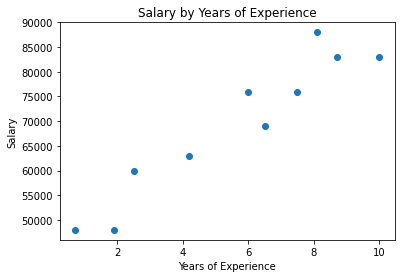

In [ ]:
import matplotlib.pyplot as plt

years_experience = [x[1] for x in salaries_and_tenures]
salaries = [x[0] for x in salaries_and_tenures]

plt.scatter(years_experience, salaries)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary by Years of Experience')

plt.show()

In [ ]:
# Keys are years, values are lists of the salaries for each tenure.
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

for tenure, salary in sorted(salary_by_tenure.items(), key=lambda item: item[0]):
  print(f"{tenure} :  {salary}")

0.7 :  [48000]
1.9 :  [48000]
2.5 :  [60000]
4.2 :  [63000]
6 :  [76000]
6.5 :  [69000]
7.5 :  [76000]
8.1 :  [88000]
8.7 :  [83000]
10 :  [83000]


In [ ]:
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
                              tenure: sum(salaries) / len(salaries)
                              for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [ ]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [ ]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)


In [ ]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
                              tenure_bucket: sum(salaries) / len(salaries)
                              for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


### **Paid Accounts**

In [ ]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

### **Topics of Interest**

In [ ]:
interests = [
            (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
            (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
            (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
            (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
            (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
            (3, "statistics"), (3, "regression"), (3, "probability"),
            (4, "machine learning"), (4, "regression"), (4, "decision trees"),
            (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
            (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
            (6, "probability"), (6, "mathematics"), (6, "theory"),
            (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
            (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
            (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
            (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [ ]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())


In [ ]:
print(words_and_counts)

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})


In [ ]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


# <center><b>Chapter 2. A Crash Course in Python</b></center>

## **The Zen of Python**

The Zen of Python is a guideline for writing computer programs in python language.

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## **Whitespace Formatting**

Python uses indentation

In [ ]:
# The pound sign marks the start of a comment. Python itself
# ignores the comments, but they're helpful for anyone reading the code.
for i in [1, 2, 3, 4, 5]:
  print(f"i = {i}")                           # first line in "for i" block
  for j in [1, 2, 3, 4, 5]:
    print(f"j = {j}")                         # first line in "for j" block
    print(f"-------i + j = {i+j}")            # last line in "for j" block
  print(f"----end of {i}----")                # last line in "for i" block
print("done looping")

i = 1
j = 1
-------i + j = 2
j = 2
-------i + j = 3
j = 3
-------i + j = 4
j = 4
-------i + j = 5
j = 5
-------i + j = 6
----end of 1----
i = 2
j = 1
-------i + j = 3
j = 2
-------i + j = 4
j = 3
-------i + j = 5
j = 4
-------i + j = 6
j = 5
-------i + j = 7
----end of 2----
i = 3
j = 1
-------i + j = 4
j = 2
-------i + j = 5
j = 3
-------i + j = 6
j = 4
-------i + j = 7
j = 5
-------i + j = 8
----end of 3----
i = 4
j = 1
-------i + j = 5
j = 2
-------i + j = 6
j = 3
-------i + j = 7
j = 4
-------i + j = 8
j = 5
-------i + j = 9
----end of 4----
i = 5
j = 1
-------i + j = 6
j = 2
-------i + j = 7
j = 3
-------i + j = 8
j = 4
-------i + j = 9
j = 5
-------i + j = 10
----end of 5----
done looping


In [ ]:
# Whitespace is ignored inside parentheses and brackets

long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 +
                           11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)

print(long_winded_computation)

210


In [ ]:
# Whitespace makes code easier to read

list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

easier_to_read_list_of_lists = [[1, 2, 3],
                                [4, 5, 6],
                                [7, 8, 9]]
                          
print(easier_to_read_list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [ ]:
# Using a backslash to indicate that a statement continues onto the next line

two_plus_three = 2 + \
                 3

print(two_plus_three)

5


In [ ]:
for i in [1, 2, 3, 4, 5]:


  # notice the blank line
  print(i)

1
2
3
4
5


In [ ]:
# for i in [1, 2, 3, 4, 5]:

# # notice the blank line
# print(i)                   # IndentationError: expected an indented block


## **Modules**

**Python doesn't load all its features automatically**, including both built-in and third-party features. To use these features, **you need to `import` the relevant modules that contain them.**

In [ ]:
import re

my_regex = re.compile("[0-9]+", re.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

In [6]:
import re as regex

my_regex = regex.compile("[0-9]+", regex.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

[]

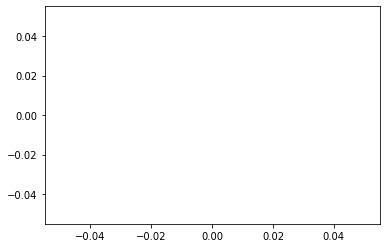

In [ ]:
import matplotlib.pyplot as plt

plt.plot()

In [ ]:
from collections import defaultdict, Counter

lookup = defaultdict(int)
my_counter = Counter()

In [ ]:
match = 10
print(match)

from re import *      # import the entire contents of a module
print(match)          # overwrite variables 

10
<function match at 0x7f6c84f00ca0>


## **Functions**

In Python, **a function is a set of instructions for taking input(s) and producing a corresponding output.** The function is typically defined using the keyword `def`, followed by the function name and its input parameters in parentheses.

In [ ]:
def double(x):
  """
  This is where you put an optional docstring that explains what the 
  function does. For example, this function multiplies its input by 2.
  """
  return x * 2



def apply_to_one(f):
  """Calls the function f with 1 as its argument"""
  return f(1)


my_double = double                   # refers to the previously defined function
x = apply_to_one(my_double)          # apply_to_one(double): f(1) = x*2 :  

print(x)

2


## **Lambda**

In Python, a lambda function (also known as an anonymous function) is **a small and concise function that is defined without a name.** It can take any number of arguments, but it can only have a single expression. The syntax for a lambda function is `lambda arguments: expression`.

In [ ]:
y = apply_to_one(lambda x: x + 4)     # f(1) = x + 4 

print(y)

5


In [ ]:
another_double = lambda x: 2 * x      # don't do this

def another_double(x):
  """Do this instead"""
  return 2 * x

In [ ]:
# fucntion parameters can also be given default arguments

def my_print(message = "my default message"):
  print(message)


my_print("hello")
my_print()

hello
my default message


In [ ]:
def full_name(first = "What's-his-name", last = "Something"):
  return first + " " + last

print(full_name("Joel", "Grus"))
print(full_name("Joel"))
print(full_name(last="Grus"))

Joel Grus
Joel Something
What's-his-name Grus


## **Strings**

A string is a data type that represents a sequence of characters. Use single quotes or double quotes to create a string in programming, but ensure that the quotes match to avoid errors.

In [ ]:
single_quoted_string = 'data science'  # single quotation marks
double_quoted_string = "data science"  # double quotation marks


if single_quoted_string == double_quoted_string:
  print("same")

same


In [ ]:
tab_string = "\t"   # represents the tab character 
len(tab_string)     # is 1

1

In [ ]:
not_tab_string = r"\t"  # represents the characters '\' and 't'
len(not_tab_string)

2

In [ ]:
multi_line_string = """This is the first line.
and this is the second line
and this is the third line"""

print(multi_line_string)                    

This is the first line.
and this is the second line
and this is the third line


In [ ]:
first_name = "Joel"
last_name = "Grus"

full_name1 = first_name + " " + last_name             # string addition
full_name2 = "{0} {1}".format(first_name, last_name)  # string.format 
full_name3 = f"{first_name} {last_name}"

print(full_name1)
print(full_name2)
print(full_name3)

Joel Grus
Joel Grus
Joel Grus


## **Exceptions**

An exception is an error that occurs during the execution of a program. When an exception occurs, it typically causes the program to stop running and can display an error message to the user.

In [ ]:
try:
  print(0/0)
except ZeroDivisionError:
  print("cannot divide by zero")

cannot divide by zero


## **Lists**

A list is a built-in data type that represents **a collection of elements** that can be of any data type. Lists are ordered, mutable, and can contain duplicate values.

In [7]:
integer_list = [1, 2, 3]
heterogeneous_list = ['string', 0.1, True]
list_of_list = [integer_list, heterogeneous_list, []]

list_length = len(integer_list)
list_sum = sum(integer_list)

print(list_length)
print(list_sum)

3
6


In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
zero = x[0]

print(zero)

0


In [ ]:
one = x[1]
nine = x[-1]        # Pythonic for last element
eight = x[-2]       # Pythonic for the next-to-last element 
x[0] = -1           # reassign the first element to -1



print(one)
print(nine)
print(eight)
print(x[0])

1
9
8
-1


In [ ]:
# use square brackets to slice lists.
# The slice i: j means all elements from i (inclusive) to j(not inclusive)

first_three = x[:3]
three_to_end = x[3:]
one_to_four = x[1:5]
last_three = x[-3:]
without_first_and_last = x[1:-1]
copy_of_x = x[:]

print(first_three)
print(three_to_end)
print(one_to_four)
print(last_three)
print(without_first_and_last)
print(copy_of_x)

[-1, 1, 2]
[3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4]
[7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8]
[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
every_third = x[::3]
five_to_three = x[5:2:-1]

print(every_third)
print(five_to_three)

[-1, 3, 6, 9]
[5, 4, 3]


In [ ]:
1 in [1, 2, 3]

True

In [ ]:
0 in [1, 2, 3]

False

In [ ]:
x = [1, 2, 3]
x.extend([4, 5, 6])   # extend to add items for another collection

print(x)

[1, 2, 3, 4, 5, 6]


In [ ]:
x = [1, 2, 3]
y = x + [4, 5, 6]     
y

[1, 2, 3, 4, 5, 6]

In [ ]:
x = [1, 2, 3]
x.append(0)
y = x[-1]
z = len(x)

print(x)
print(y)
print(z)

[1, 2, 3, 0]
0
4


In [ ]:
x, y = [1, 2]

print(x, type(x))
print(y, type(y))


1 <class 'int'>
2 <class 'int'>


In [ ]:
_, y = [1, 2]    # use an nderscore ofr a value you're goint to throw away

print(y)

2


## **Tuples**

a tuple is **a collection data type that is similar to a list**, but with some key differences. Tuples are an ordered sequence of elements, just like lists, but they are **immutable**, meaning that once you create a tuple, you **cannot modify its contents**.

In [ ]:
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4


print(my_list, type(my_list))
print(my_tuple, type(my_tuple))
print(other_tuple, type(other_tuple))

[1, 2] <class 'list'>
(1, 2) <class 'tuple'>
(3, 4) <class 'tuple'>


In [ ]:
my_list[1] = 3

print(my_list)

[1, 3]


In [ ]:
try: 
  my_tuple[1] = 3
except TypeError:
  print("cannot modify a tuple")

cannot modify a tuple


In [ ]:
def sum_and_product(x, y):
  return (x + y), (x * y)


sp = sum_and_product(2, 3)
s, p = sum_and_product(5, 10)

print(sp, type(sp))
print(s, type(s))
print(p, type(p))

(5, 6) <class 'tuple'>
15 <class 'int'>
50 <class 'int'>


In [ ]:
x, y = 1, 2
print(f"x = {x}, y = {y}")

# Pythonic way to swap variables:
x, y = y, x       
print(f"x = {x}, y = {y}")

x = 1, y = 2
x = 2, y = 1


## **Dictionaries**

a dictionary associates **values with keys** and allows you to quickly retrieve the value corresponding to a given key:

In [ ]:
empty_dict = {}                        # Pythonic        make empy dict
empty_dict2 = dict()                   # less Pythonic   make empty dict  
grades = {"Joel": 80, "Tim": 95}       

joels_grade = grades["Joel"]
print(joels_grade)

80


In [ ]:
try:
  kates_grade = grades["Kate"]
except KeyError:
  print("no grade for Kate!")

no grade for Kate!


In [ ]:
joel_has_grade = "Joel" in grades
kate_has_grade = "Kate" in grades

print(joel_has_grade)
print(kate_has_grade)

True
False


In [ ]:
# get method that returns a defualt value

joels_grade = grades.get("Joel", 0)   # if there are key in dict then give value 
kates_grade = grades.get("Kate", 0)   # else give define parameter
no_ones_grade = grades.get("No One")  # default is None

print(joels_grade)
print(kates_grade)
print(no_ones_grade)

80
0
None


In [ ]:
# assign key value pair

grades["Tim"]  = 99                # replaces the old value
grades["Kate"] = 100               # adds a third entry

num_students = len(grades)

print(num_students)

3


In [ ]:
tweet = {
          "user" : "joelgrus",
          "text" : "Data Science is Awesome",
          "retweet_count" : 100,
          "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

print(tweet, type(tweet))

{'user': 'joelgrus', 'text': 'Data Science is Awesome', 'retweet_count': 100, 'hashtags': ['#data', '#science', '#datascience', '#awesome', '#yolo']} <class 'dict'>


In [ ]:
tweet_keys = tweet.keys()        # iterable for the keys
tweet_values = tweet.values()    # iterable for the values
tweet_items = tweet.items()      # iterable for the (key, value) tuples

print(tweet_keys)
print(tweet_values)
print(tweet_items)

dict_keys(['user', 'text', 'retweet_count', 'hashtags'])
dict_values(['joelgrus', 'Data Science is Awesome', 100, ['#data', '#science', '#datascience', '#awesome', '#yolo']])
dict_items([('user', 'joelgrus'), ('text', 'Data Science is Awesome'), ('retweet_count', 100), ('hashtags', ['#data', '#science', '#datascience', '#awesome', '#yolo'])])


In [ ]:
"user" in  tweet_keys      # not Pythonic 

True

In [ ]:
"user" in tweet            # Pythonic way of checking for keys

True

In [ ]:
"joelgrus" in tweet_values # 

True

## **defaultdict**

A defaultdict is like a regular dictionary, **except that when you try to look up a key it doen't contain**, it first adds a value for it using a zero-argument function you provided when you created it

In [11]:
old_document = """O brawling love, O loving hate, 
O any thing of nothing first create! 
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!"""

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize
document = word_tokenize(old_document)

In [15]:
word_counts = {}
for word in document:
  if word in word_counts:
    word_counts[word] += 1
  else: 
    word_counts[word] = 1

print(word_counts)

{'O': 4, 'brawling': 1, 'love': 1, ',': 10, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, '!': 2, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanity': 1, 'Misshapen': 1, 'chaos': 1, 'well-seeming': 1, 'forms': 1, 'Feather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'health': 1, 'Still-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [16]:
word_counts = {}
for word in document:
  try:
    word_counts[word] += 1
  except KeyError:
    word_counts[word] = 1

print(word_counts)

{'O': 4, 'brawling': 1, 'love': 1, ',': 10, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, '!': 2, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanity': 1, 'Misshapen': 1, 'chaos': 1, 'well-seeming': 1, 'forms': 1, 'Feather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'health': 1, 'Still-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [17]:
word_counts = {}
for word in document:
  previous_count = word_counts.get(word, 0)
  word_counts[word] = previous_count + 1

print(word_counts)

{'O': 4, 'brawling': 1, 'love': 1, ',': 10, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, '!': 2, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanity': 1, 'Misshapen': 1, 'chaos': 1, 'well-seeming': 1, 'forms': 1, 'Feather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'health': 1, 'Still-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1}


In [18]:
from collections import defaultdict

word_counts = defaultdict(int)
for word in document:
  word_counts[word] +=1


print(word_counts)

defaultdict(<class 'int'>, {'O': 4, 'brawling': 1, 'love': 1, ',': 10, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'of': 3, 'nothing': 1, 'first': 1, 'create': 1, '!': 2, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanity': 1, 'Misshapen': 1, 'chaos': 1, 'well-seeming': 1, 'forms': 1, 'Feather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'health': 1, 'Still-waking': 1, 'sleep': 1, 'that': 1, 'is': 2, 'not': 1, 'what': 1, 'it': 1})


In [ ]:
dd_list = defaultdict(list)
dd_list[2].append(1)

print(dd_list)

defaultdict(<class 'list'>, {2: [1]})


In [ ]:
dd_dict = defaultdict(dict)
dd_dict["Joel"]["City"] = "Seattle"

print(dd_dict)

defaultdict(<class 'dict'>, {'Joel': {'City': 'Seattle'}})


In [ ]:
dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1

print(dd_pair)

defaultdict(<function <lambda> at 0x7f6c6cbc2e50>, {2: [0, 1]})


## **Counters**

A counter turns a sequence of values into a defaultdict(int)-like object **mapping keys to counts**

In [21]:
from collections import Counter

c = Counter([0, 1, 2, 0])
print(c)

Counter({0: 2, 1: 1, 2: 1})


In [22]:
word_counts = Counter(document)

print(word_counts)

Counter({',': 10, 'O': 4, 'of': 3, '!': 2, 'is': 2, 'brawling': 1, 'love': 1, 'loving': 1, 'hate': 1, 'any': 1, 'thing': 1, 'nothing': 1, 'first': 1, 'create': 1, 'heavy': 1, 'lightness': 1, 'serious': 1, 'vanity': 1, 'Misshapen': 1, 'chaos': 1, 'well-seeming': 1, 'forms': 1, 'Feather': 1, 'lead': 1, 'bright': 1, 'smoke': 1, 'cold': 1, 'fire': 1, 'sick': 1, 'health': 1, 'Still-waking': 1, 'sleep': 1, 'that': 1, 'not': 1, 'what': 1, 'it': 1})


In [23]:
for word, count in word_counts.most_common(10):
  print(word, count)

, 10
O 4
of 3
! 2
is 2
brawling 1
love 1
loving 1
hate 1
any 1


## **Sets**

Set is a collection of distinct elements

We' ll use sets fro two main reasons. 
* The first is that `in` **is a very fast** operation on sets.
* The second reason is to find the **distinct items** in a collection

In [ ]:
primes_below_10 = {2, 3, 5, 7}

In [ ]:
s = set()                # make empty set

s.add(1)
s.add(2)
s.add(2)
x = len(s)
y = 2 in s
z = 3 in s

print(x)
print(y)
print(z)

2
True
False


`in` **is a very fast** operation on sets

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
hundreads_of_other_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords_list = ["a", "an", "at"] + hundreads_of_other_words + ["yet", "you"]

In [ ]:
import timeit

In [ ]:
start = timeit.default_timer()

print("zip" in stopwords_list)

stop = timeit.default_timer()

print('Time: ', stop - start)

False
Time:  0.0031141949999948793


In [ ]:
stopwords_set = set(stopwords_list)

In [ ]:
start = timeit.default_timer()

print("zip" in stopwords_set)

stop = timeit.default_timer()

print('Time: ', stop - start)

False
Time:  0.0022341140000037285


find the **distinct items** in a collection

In [ ]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)

item_set = set(item_list)
num_distinct_items = len(item_set)
distinct_item_list = list(item_set)

print(num_items)
print(num_distinct_items)
print(distinct_item_list)

6
3
[1, 2, 3]


## **Control Flow**

In [ ]:
if 1 > 2:
  message = "if only 1 were grater than two..."
elif 1 > 3:
  message = "elif stands for 'else if'"
else:
  message = "when all else fails use else (if you want to)"

print(message)

when all else fails use else (if you want to)


In [ ]:
# ternary if-then-else on one line
x = 5
parity = "even" if x % 2 == 0 else "odd"

print(parity)

odd


In [ ]:
x = 0
while x < 10:
  print(f"{x} is less than 10")
  x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [ ]:
# range(10) is the number 0, 1, ..., 9
for x in range(10):
  print(f"{x} is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [ ]:
for x in range(10):
  if x == 3:
    continue                  # go immediately to the next iteration
  if x == 5:
    break
  print(x)

0
1
2
4


## **Truthiness**

**Booleans** in Python work as in most other languages, except that they'**re captitalized**

In [ ]:
falsy = [
        False,
        None,          
        [],                # an empty list
        {},                # an empty dict
        "",                # an empty string
        set()              # an empty set
        0,                 # zero int
        0.0                # zero float
]

In [ ]:
one_is_less_than_two = 1 < 2
true_equals_false = True == False

print(one_is_less_than_two)
print(true_equals_false)

True
False


In [ ]:
x = None
assert x == None, "this is the not the Pythonic way to chek for None"
assert x is None, "this is the Pythonic way to check for None"

In [ ]:
s = 'cat'
if s:
  first_char = s[0]
else:
  first_char = ""

print(first_char)

c


In [ ]:
first_char = s and s[0]

print(first_char)

c


In [ ]:
x = True #@param ["False", "True"] {type:"raw"}

safe_x = x or 0

print(safe_x)

True


In [ ]:
ex0 = all([True, 1, {3}])         # True, all are truthy
ex1 = all([True, 1, {}])          # False, {} is falsy
ex2 = any([True, 1, {}])          # True, True is truthy
ex3 = all([])                     # True!, no false element in the list
ex4 = any([])                     # False!, non trusty element in the list   




print(ex0, ex1, ex2, ex3, ex4)

True False True True False


## **Sorting**

In [ ]:
x = [4, 1, 2, 3]
y = sorted(x)                 # x is unchanged

print(y)
print(x)   

x.sort()                      # x is changed
print(x)

[1, 2, 3, 4]
[4, 1, 2, 3]
[1, 2, 3, 4]


In [ ]:
# sort the list by absolute value from largest to smallest
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)

print(x)

[-4, 3, -2, 1]


In [24]:
# sort the words and counts from highest count to lowest
wc = sorted(word_counts.items(),
            key=lambda word_and_count: word_and_count[1],
            reverse=True)

wc

[(',', 10),
 ('O', 4),
 ('of', 3),
 ('!', 2),
 ('is', 2),
 ('brawling', 1),
 ('love', 1),
 ('loving', 1),
 ('hate', 1),
 ('any', 1),
 ('thing', 1),
 ('nothing', 1),
 ('first', 1),
 ('create', 1),
 ('heavy', 1),
 ('lightness', 1),
 ('serious', 1),
 ('vanity', 1),
 ('Misshapen', 1),
 ('chaos', 1),
 ('well-seeming', 1),
 ('forms', 1),
 ('Feather', 1),
 ('lead', 1),
 ('bright', 1),
 ('smoke', 1),
 ('cold', 1),
 ('fire', 1),
 ('sick', 1),
 ('health', 1),
 ('Still-waking', 1),
 ('sleep', 1),
 ('that', 1),
 ('not', 1),
 ('what', 1),
 ('it', 1)]

## **List Comprehensions**

Transform a list into another list by choosing only certain elements, by transforming elements, or both.

In [ ]:
even_numbers = [x for x in range(5) if x % 2 == 0]
squares = [x * x for x in range(5)]
even_squares = [x * x for x in even_numbers]

print(even_numbers)
print(squares)
print(even_squares)

[0, 2, 4]
[0, 1, 4, 9, 16]
[0, 4, 16]


In [ ]:
square_dict = {x: x * x for x in range(5)}
square_set = {x * x for x in [1, 2, 3, 4, 5]}

print(square_dict)
print(square_set)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
{1, 4, 9, 16, 25}


In [ ]:
zeroes = [0 for _ in even_numbers]

print(zeroes)

[0, 0, 0]


In [ ]:
pair = [(x, y)
        for x in range(3)
        for y in range(3)]

print(pair)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [ ]:
increasing_pairs = [(x, y)
                    for x in range(3)
                    for y in range(x + 1, 10, 2)]

print(increasing_pairs)

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 2), (1, 4), (1, 6), (1, 8), (2, 3), (2, 5), (2, 7), (2, 9)]


## **Automated Testing and assert**

In [ ]:
assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didnt't"

In [ ]:
# more common using assert in this way

def smallest_item(xs):
  return min(xs)

assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

In [ ]:
# less common using assert to check inputs in functions

def smallest_item(xs):
  assert xs, "empty list has no smallest item"
  return min(xs)

## **Object-Oriented Programming**

Python allows you to define classes that encapsulate data and the functions that operate on them.

In [ ]:
class CountingClicker:
  """A class can/should have a docstring, 
  just like a function
  """
  def __init__(self, count = 0):   # __init__ take parameters to construct an instance of class
    self.count = count

  def __repr__(self):              # __repr__ produce the string representation of a class instance
    return f"CountingClicker(count={self.count})"
  
  def click(self, num_times = 1):
    """Click the clicker some number of times."""
    self.count += num_times
  
  def read(self):
    return self.count

  def reset(self):
    self.count = 0


# A subclass inherits all the behavior of its parent class.
class NoResetClicker(CountingClicker):
  # This class has all the same methods as CountingClicker
  # Except that it has a reset method that does nothing.
  def reset(self):
    pass

In [ ]:
# use assert to write some test cases for our clicker
clicker = CountingClicker()
assert clicker.read() == 0, "clicker should start with count 0"
clicker.click()
clicker.click()
assert clicker.read() == 2, "after two clicks, clicker should have count 2"
clicker.reset()
assert clicker.read() == 0, "after reset, clicker should be back to 0"

print(clicker)

CountingClicker(count=0)


In [ ]:
# construct instances of the clicker by using CountingClicker class name

clicker1 = CountingClicker()
clicker2 = CountingClicker(100)
clicker3 = CountingClicker(count=100)

print(clicker1)
print(clicker2)
print(clicker3)

CountingClicker(count=0)
CountingClicker(count=100)
CountingClicker(count=100)


In [ ]:
# construct instances of the clicker by using NoResetClicker class name

clicker2 = NoResetClicker()
assert clicker2.read() == 0

print(clicker2)

clicker2.click()
assert clicker2.read() == 1

print(clicker2)

clicker2.reset()             # reset function pass    
assert clicker2.read() == 1, "reset shouldn't do anything"

print(clicker2)

CountingClicker(count=0)
CountingClicker(count=1)
CountingClicker(count=1)


## **Iterables and Generators**

We can create generators, by using `for` and `in`, which can be **iterated over** just like list but generate their values **on demand**

In [ ]:
def generate_range(n):
  i = 0
  while i < n:
    yield i                   # every call to yield produces a value of the generator
    i += 1  

for i in generate_range(10):  # call function generate_range
  print(f"i : {i}")

i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9


In [ ]:
def natural_numbers():
  """returns 1, 2, 3, ..."""
  n = 1
  while True:
    yield n       # yield statement returns a generator object to the *one* who calls the function which contains yield
    n += 1
    if n == 100:
      break


In [ ]:
evens_below_20 = (i for i in generate_range(20) if i % 2 == 0)
list(evens_below_20)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
# None of these computations *does* anything until we iterate
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)    # x which is in data and x can divide by 2
even_squares = (x**2 for x in evens)       # x square, x which is in even 
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)  # x which is in even_squares and a reminder is 6

print(data)                                  # only this get yielded 
print(evens)                                 # empty
print(even_squares)                          # empty
print(even_squares_ending_in_six)            # empty

<generator object natural_numbers at 0x7fd608114ac0>
<generator object <genexpr> at 0x7fd6081143c0>
<generator object <genexpr> at 0x7fd608114430>
<generator object <genexpr> at 0x7fd608114c10>


In [ ]:
names = ["Alice", "Bob", "Charlie", "Debbie"]

In [ ]:
# not Pythonic
for i in range(len(names)):
  print(f"name {i} is {names[i]}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [ ]:
# also not Pythonic
i = 0
for name in names:
  print(f"name {i} is {names[i]}")
  i += 1

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [ ]:
# Pythonic                 
for i, name in enumerate(names):     # use enumerate: give an index and also return a value
  print(f"name {i} is {name}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


## **Randomness**

In [ ]:
import random

random.seed(10) # this ensures we get the dame results every time

# random.random() produces numbers uniformly betweeen 0 and 1
# it's the random function we'll use most often
four_uniform_randoms = [random.random() for _ in range(4)] # give a list that contain 4 random numbers 
four_uniform_randoms

[0.5714025946899135,
 0.4288890546751146,
 0.5780913011344704,
 0.20609823213950174]

In [ ]:
# random module actually produces **pseudo-random**
random.seed(10)                 # set the seed to 10
print(random.random())          
random.seed(10)                 # reset the seed to 10
print(random.random())

0.5714025946899135
0.5714025946899135


In [ ]:
# returns an element chosen randomly from the corresponding range
rr1 = random.randrange(10)
rr2 = random.randrange(13, 16)

print(rr1)
print(rr2)

3
14


In [ ]:
# randomly reorders the elements of a list
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(up_to_ten)
print(up_to_ten)

[2, 6, 7, 10, 4, 9, 1, 3, 5, 8]


In [ ]:
# randomly pick one element from a list
my_best_friend = random.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Bob'

In [ ]:
# randomly choose a sample of elements without replacement (i.e., with no duplicates)
lottery_numbers = range(10)
winning_numbers = random.sample(lottery_numbers, 9)
winning_numbers

[6, 4, 8, 3, 1, 2, 7, 0, 5]

In [ ]:
# choose a sample of elements with replacement (i.e., allowing duplicates)
four_with_replacement = [random.choice(range(10)) for _ in range(4)]
four_with_replacement

[3, 7, 9, 6]

## **Regular Expressions**

Regular expressions provide a way of searching text.

In [ ]:
import re

# re.match  : beginning of a string matches a regular expression
# re.search : any part of a string matches a regular expression

# list of boolean give all True
re_examples = [                             # All of these are True, because
    not re.match("a", "cat"),                   # 'cat' doesn't start with 'a'          
    re.search("a", "cat"),                      # 'cat' has an 'a' in it
    not re.search("c", "dog"),                  # 'dog' doesn't have a 'c' in it. 
    3 == len(re.split("[ab]", "carbs")),        # Split on a or b to ['c', 'r', 's']
    "R-D-" == re.sub("[0-9]", "-", "R2D2")      # Replace digits with dashes.  
]
assert all(re_examples), "all the regex examples should be True"

## **zip and Argument Unpacking**

In [ ]:
# zip two or more iterable together into a single iterable of tuples

list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

# zip is lazy, so you have to do something like the following
z = [pair for pair in zip(list1, list2)]
z

[('a', 1), ('b', 2), ('c', 3)]

In [ ]:
# unzip

pairs = [('a', 1), ('b', 2), ('c', 3)]  
letters, numbers = zip(*pairs)        # * performs argument unpacking

print(letters)
print(numbers)

('a', 'b', 'c')
(1, 2, 3)


In [ ]:
letters, numbers = zip(('a', 1), ('b', 2), ('c', 3))

print(letters)
print(numbers)

('a', 'b', 'c')
(1, 2, 3)


In [27]:
def add(a, b): return a + b

add(1, 2)                        # returns 3
try:
  add([1, 2])
except TypeError:
  print("add expects two inputs")

add(*[1, 2])                      # returns 3

add expects two inputs


3

## **args and kwargs**

In [ ]:
def doubler(f):
  # Here we define a new function that keeps a reference to f
  def g(x):
    return 2 * f(x)

  # And return the new fuction
  return g  


def f1(x):
  return x + 1


g = doubler(f1)          # function that takes as input some function 
assert g(3) == 8,  "(3 + 1) * 2 should equal 8"
assert g(-1) == 0, "(-1 + 1) * 2 should equal 0" 

In [ ]:
# doens't work with functions that take more than a single argument

def f2(x, y):
  return x + y

g = doubler(f2)
try:
  g(1, 2)
except TypeError:
  print("as defined, g only takes one argument") 

as defined, g only takes one argument


In [ ]:
def magic(*args, **kwargs):
  print("unnamed args:", args)    # args is a tuple of its unnamed arguments
  print("keyword args:", kwargs)  # kwargs is a dict of its named arguments 


magic(1, 2, key="word", key2="word2")

unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [ ]:
def other_way_magic(x, y, z):
  return x + y + z

x_y_list = [1 , 2]
z_dict = {"z": 3}
assert other_way_magic(*x_y_list, **z_dict) == 6, "1 + 2 + 3 should be 6"

In [ ]:
def doubler_correct(f):
  """works no matter what kind of inputs f expects"""
  def g(*args, **kwargs):
    """whatever arguments g is supplied, pass them through to f"""
    return 2 * f(*args, **kwargs)
  return g

g = doubler_correct(f2)
assert g(1, 2) == 6, "doubler should work now"

12


## **Type Annotations**

Python is a dynamicallly typed language. That menas that it in general it **doesn't care about the types of objects** we use

In [ ]:
def add(a, b):
  return a + b


assert add(10, 5) == 15,                        "+ is valid for number"
assert add([1, 2], [3]) == [1, 2, 3],           "+ is valid for list"
assert add("hi ", "there") == "hi there",       "+ is valid for string"   

In [ ]:
try:
  add(10, "five")
except TypeError:
  print("cannot add an int to a string")

cannot add an int to a string


In [ ]:
def add(a: int, b: int) -> int:   # type annotations but it doesn't do anyting
  return a + b                    # tell that we want int of a,b and function returns int 


add(10, 5)                       # you'd like this to be OK
add("hi ", "there")              # you'd like this to be not OK

'hi there'

In [ ]:
def dot_product(x, y):
  pass
 
Vector = '[[],[]]' 

# we have not yet defined Vector, but imagine we had
def dot_product(x: Vector, y: Vector):
  pass

In [ ]:
from typing import Union

def secretly_ugly_function(value, operation):
  pass

def uglyfunction(value: int,
                 operation: Union[str, int, float, bool]) -> int:
  pass

## **How to Write Type Annotations**

In [ ]:
# This isn't wrong, but the type is not specific enough. 
# It's clear we really want xs to be alist of floats, 
# not (say) a list of string.

def total(xs: list) -> float:     
  return sum(total)

In [ ]:
from typing import List   # note capital L

def total(xs: List[float]) -> float:
  return sum(total)

# this is how to type-annotate variable when you define them
# BUT this is unnecessary; it's "obvious" x is an int.
x: int = 5

In [ ]:
values = []              #  not obvious; what's my type?
est_so_far = None        #  not obvious; what's my type?

In [ ]:
# Use this to give type hints
from typing import Optional

values: List[int] = []
best_so_far : Optional[float] = None  # allowed to be either a float or None

In [ ]:
# the type annotations in this snippet are all unnecessary
from typing import Dict, Iterable, Tuple

# keys are strings, values are ints
Counts: Dict[str, int] = {'data': 1, 'science': 2}

lazy = False

# lists and generators are both iterable
if lazy:
  evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
  evens = [0, 2, 4, 6, 8]

# tuples specify a type for each element
triple: Tuple[int, float, int] = (10, 2.3, 5)

In [ ]:
from typing import Callable

# The type hint says that repeater is a funciton that takes
# two arguments, a string and an int, and returns a string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
  return repeater(s, 2)


def comma_repeater(s: str, n: int) -> str:
  n_copies = [s for _ in range(n)]
  return ', '.join(n_copies)

assert twice(comma_repeater, "type hints") == "type hints, type hints"

In [ ]:
Number = int
Numbers = List[Number]

def total(xs: Numbers) -> Number:
  return sum(xs)

# <center><b>Chapter 3. Visualizing Data</b></center>

A **fundamental part** of the data scientist's toolkit is **data visualization**. Althought it is very easy to create visualizations, it's much harder to produce good ones. 

There are two primary uses for data visualization:

* To **explore** data
* To **communicate** data

A wide variey of **tools** exist for **visualizing data**.

`matplotlib.pyplot` module. 

## **Graph**

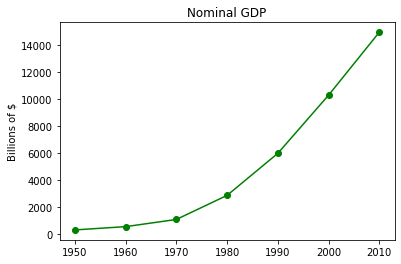

In [ ]:
import matplotlib.pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a lable to the y-axis
plt.ylabel("Billions of $")
plt.show()

## **Bar Charts**

A bar chart is a good choice when you want to show how some **quantity** varies among some **discrete set of items**.

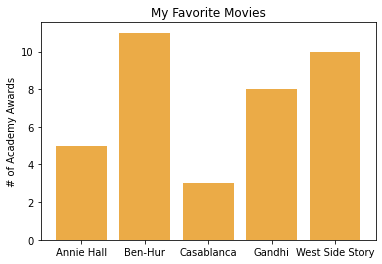

In [ ]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars, color="#EBAB47")  # Oscar Gold

plt.title("My Favorite Movies")   # add a title
plt.ylabel("# of Academy Awards") # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

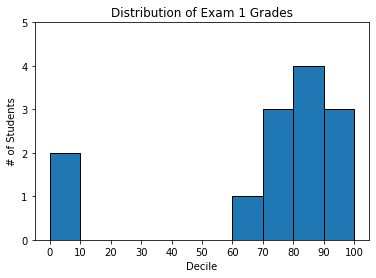

In [ ]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                   # x-axis from -5 to 105,
                                            # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])     # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

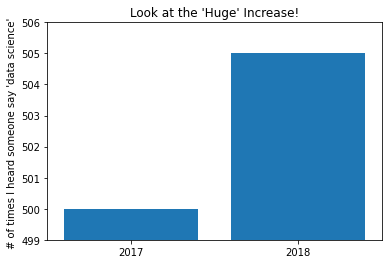

In [ ]:
# Especially BAD form 
# When "y-axis" not to start at 0, 
# it is easy to Mislead people

mentions =[500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science' ")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])         # y-axis range from 499 to 506
plt.title("Look at the 'Huge' Increase!")
plt.show()

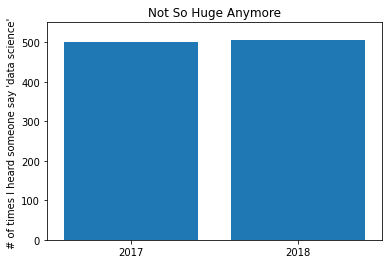

In [ ]:
# more sensible axes

mentions =[500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science' ")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 0, 550])         # y-axis range from 0 to 550
plt.title("Not So Huge Anymore")
plt.show()

## **Line Charts**

lines chart is used to show changing **trends**

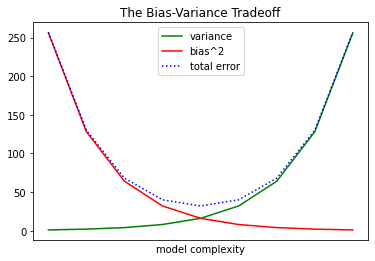

In [ ]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]


# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r',  label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:', label='total error') # blue dotted line

# Because we've assigned labels to each series,
# We can get a legend for free (loc=9 mens "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## **Scatterplots**

A scatterplot is the right choice for visualizing **the relationship between two paired sets of data**

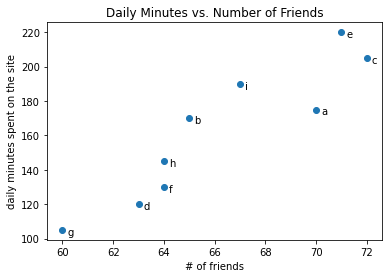

In [ ]:
# the relationship between the number of friends your users have 
# and the number of minute they spend on the site every day

friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)                                           # plot each dot

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): # put each in to zip
  plt.annotate(label,                                                   # plot each label one by one
      xy=(friend_count, minute_count),                                  # Put the label with its point
      xytext=(5, -5),                                                   # but slightly offset                     
      textcoords='offset points')
  
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

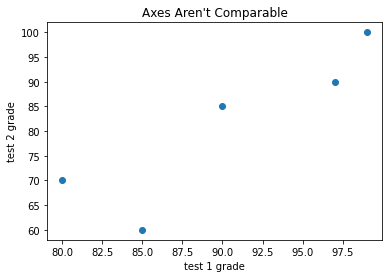

In [ ]:
# you might get a misleading picture
# if you let matplotlib choose the scale

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

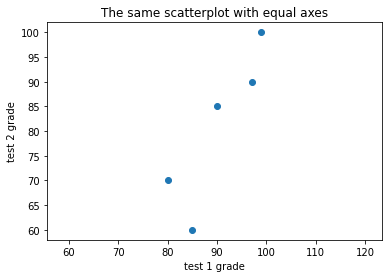

In [ ]:
# plt.axis("equl")
# to make the proportion x and y  equal
# the plot looks more accurate

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("The same scatterplot with equal axes")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

# <center><b>Chapter 4. Linear Algebra</b></center>

**Linear algebra** is the branch of mathematics that deals with **vector spaces**.

## **Vectors**

**Vectors** are **objects that can be added together** to form **new vectors** and that can be **multipled by scalars** (i.e., numbers), also to form **new vectors**.

Vectors are points in some **finite-dimensional** space.

**Ex.** 

* heights, weights, and ages of a large number of people
  * Treat data as three-dimensional vectors [height, weight, age]
* teaching a class with four exams
  * Treat student grades as four-dimensional vectors [exam1, exam2, exam3, exam4]


Using **lits** as vectors is great for **exposition** but **terrible for performance**.

In [ ]:
from typing import List

Vector = List[float]

# Python lists aren't vectors 

height_weight_age = [70,    # inches,
                     170,   # pounds,
                     40]    # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62]   # exam4

In [ ]:
# To begin with We'll frequently need to add two vectos. 
# Vectors add componentwise. If two vectors v and w are the same length
# their sum is just the vector whose first element is v[0] + w[0] (add by order) 
# if they are not the same length, then we're not allowed  to add them.   

def add(v: Vector, w: Vector) -> Vector:
  """Adds corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"

  return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]


def subtract(v: Vector, w: Vector) -> Vector:
  """Subtracts corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"

  return [v_i + w_i for v_i, w_i in zip(v, w)]   # 1 + (- 1)  plus opposite direction


def vector_sum(vectors: List[Vector]) -> Vector:
  """Sums all corresponding elements"""
  # Check that vectors in not empty
  assert vectors, "no vectors provided!"

  # Check the vectors are all the same size
  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different sizes!"

  # the i-th element of the result is the sum of every vector[i]
  return [sum(vector[i] for vector in vectors)
          for i in range(num_elements)]
  
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]  # 16; 1+3+5+7, 20; 2+4+6+8


def scalar_multiply(c: float, v: Vector) -> Vector:
  """Multiplies every element by c"""
  return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]


def vector_mean(vectors: List[Vector]) -> Vector:
  """Computes the element-wise average"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]    # 3; (1+3+5)/3, 4; (2+4+6)/3


def dot(v: Vector, w: Vector) -> float:
  """Computes v_1 * w_1 + ... + v_n * w_n"""
  assert len(v) == len(w), "vectors must be same length"

  return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32                    # 32; 1*4 + 2*5 + 3*6


In [ ]:
def sum_of_squares(v: Vector) -> float:
  """Returns v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14                    # 14; 1*1 + 2*2 + 3*3

In [ ]:
import math

def magnitude(v: Vector) -> float:
  """Returns the magnitude (or length) of v"""
  return math.sqrt(sum_of_squares(v))    # math.sqrt is square root function

assert magnitude([3, 4]) == 5             # 5; √(3*3 + 4*4)           

In [ ]:
def squared_distance(v: Vector, w: Vector) -> float:
  """Computes (v_1 - w_1)**2 + ... + (v_n - w_n)**2"""
  return sum_of_squares(subtract(v, w))


def distance(v: Vector, w: Vector) -> float:
  """Computes the distance between v and w"""
  return math.sqrt(squared_distance(v, w))


def distance(v: Vector, w: Vector) -> float:
  return magnitude(subtract(v, w))

## **Matrices**

A matrix is a **two-dimensional collection** of numbers. We will represent matrices as **lists of lists**, with each inner list having the same size and represeting a row of the matrix. If A is a matrix, then a[i][j] is the element in the ith row and the jth column. Per mathematical convention, we will frequently use capital letters to represent matrices.


Matrices will be **important to us** for several reasons.
* First, we can use a matrix to **represent a dataset consisting of multiple vectors**, simply by considering each vector as a row of the matrix.
* Second, we can use an **n X k matrix to represent a linear function** that maps k-dimensional vectors to n-dimensional vectors. 
* Third, matrices can be used to **represent binary relationships**.


In [ ]:
# Another type alias
Matrix = List[List[float]]

A = [[1, 2, 3],     # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],        # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

In [ ]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
  """Returns (# of rows of A, # of columns of A)"""
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0                        # number of elements in first row
  return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)            # 2 rows, 3 columns 

In [ ]:
def get_row(A: Matrix, i: int) -> Vector:
  """Returns the i-th row of A (as a Vector)"""
  return A[i]                                             # A[i] is already the ith row


def get_column(A: Matrix, j: int) -> Vector:
  """Returns the j-th column of A (as a Vector)"""
  return [A_i[j]                                          # jth element of row A_i  
          for A_i in A]                                   # for each row A_i

In [ ]:
from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Return a num_rows x num_cols matrix
    whose (i, j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)                               # given i, create a list     
            for j in range(num_cols)]                     # [entry_fn(i, 0),...]
            for i in range(num_rows)]                     # create one list for each i


def identity_matrix(n: int) -> Matrix:
  """Returns the n x n identity matrix"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

In [ ]:
# Matrices will be important to use for several reasons.

# represent a dataset consisting of multiple vectors, 
# each vector as row of the matrix

data = [[70, 170, 40],           # first  person has  70 kg, spent 170 for foods/week and, 40 for age
        [65, 120, 26],           # second person has  65 kg, spent 120 for foods/week and, 26 for age
        [77, 250, 19],]          # third  person has  77 kg, spent 250 for foods/week and, 19 for age


 # represent binary relationship by matrices

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]     


# We could also represent relationship as cross matrix:
# it is quicker to check two nodes are connected

#            user 0  1  2  3  4  5  6  7  8  9
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],   # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],   # user 1  
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],   # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],   # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],   # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],   # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],   # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],   # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],   # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]   # user 9


assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"     
           

In [ ]:
# only need to look at one row
friends_of_five = [i 
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]

friends_of_five        

[4, 6, 7]

# <center><b>Chapter 5. Statistics</b></center>

**Statistics** refers to **the mathematics** and **teachniques with** which we **understand data**.



## **Discriptive statistic: Describing a Single Set of Data**

In [ ]:
# For a small dataset, Print-out might be the best description

num_friends_small = [100, 49, 41, 40, 25]
num_friends_small

[100, 49, 41, 40, 25]

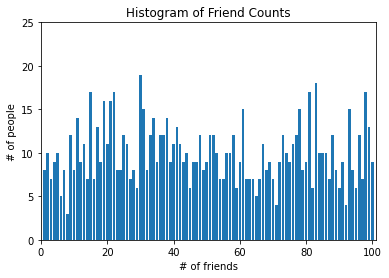

In [ ]:
# For a larget dataset, We use statistics(visualizing) to reveal our data

from collections import Counter
import matplotlib.pyplot as plt
import random

random.seed(24)
num_friends_large = [random.randint(1, 100) for i in range(999)]
num_friends_large.append(200)                     # outlier

friend_counts = Counter(num_friends_large)
xs = range(101)                                   # largest value is 100
ys = [friend_counts[x] for x in xs]               # height is just # of friends

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")                        # people who have just one friend; x = 1
plt.ylabel("# of people")                         # there are 8 people; y = 8
plt.show()

In [ ]:
# number of data points; show numbers of thigs that we studied
num_points = len(num_friends_large)            
num_points

1000

In [ ]:
largest_value = max(num_friends_large)
smallest_value = min(num_friends_large)

print("largest value : {}".format(largest_value))
print("smallest value : {}".format(smallest_value))

largest value : 200
smallest value : 1


In [ ]:
sorted_values = sorted(num_friends_large)  

smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-1]

print("smallest value : {}".format(smallest_value))
print("second smallest value : {}".format(second_smallest_value))
print("second largest value : {}".format(second_largest_value))

smallest value : 1
second smallest value : 1
second largest value : 200


### **Central Tendencies**

some notion of where our data is centered. 

#### **Mean (or average)**


average value

If we have **n data points** and one of them increases by some small amount e, then necessarily the mean will increase by e/n

In [ ]:
from typing import List

def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends_large) 

50.282

#### **Median**



middle position

In [ ]:
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.

def _median_odd(xs: List[float]) -> float:
  """If len(xs) is odd, the median is the middle element"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """If len(xs) is even, it's the average of the middle two elements"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2                    # e.g. length 4 => hi_midpoint 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Finds the 'middle-most' value of v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v) 


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [ ]:
print("median of large group : {}".format(median(num_friends_large)))

median of large group : 48.0


In [ ]:
list_15  = [random.randint(1, 10) for i in range(15)]
list_15_med = median(list_15)

print("list_15 : {}".format(sorted(list_15)))
print("A middle point : {}".format(len(list_15)//2))
print("median : {}".format(list_15_med))

list_15 : [1, 1, 1, 3, 3, 5, 5, 5, 5, 6, 7, 8, 9, 10, 10]
A middle point : 7
median : 5


A generalization of the median is the quantile, which **represent the value under which a certain percentile of the data lies** (the median represents the value under which 50% of the data lies)

In [ ]:
def quantile(xs: List[float], p: float) -> float:
  """Returns the pth-percentile value in x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

assert quantile(num_friends_large, 0.10) == 12
assert quantile(num_friends_large, 0.25) == 25
assert quantile(num_friends_large, 0.75) == 76
assert quantile(num_friends_large, 0.90) == 91

In [ ]:
quantile(num_friends_large, 0.10)

12

#### **Mode**

most frequently values

In [ ]:
def mode(x: List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]


assert set(mode(num_friends_large)) == {30}

### **Dispersion**

Dispersion refers to measures of how **spread out our data** is. Typically they're statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out. For instance, a very simple measure is the range, which is just the difference between the largest and smallest elements:

**range**

In [ ]:
# "range" already means something in Python, so we'll use a different name 

def data_range(xs: List[float]) -> float:
  return max(xs) - min(xs)


# assert data_range(num_friends_large) == 199

In [ ]:
assert data_range([10 for i in range(10)]) == 0  # zero when the min and max are equal

**variance**

In [ ]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
  """Translate xs by substracting its mean (so the result has mean 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean"""
  assert len(xs) >= 2, "variance requires at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

assert 826 < variance(num_friends_large) <  847

In [ ]:
sum([(i - mean(num_friends_large))**2 for i in num_friends_large])/999

846.3408168168162

**standard deviation**

In [ ]:
import math

def standard_deviation(xs: List[float]) -> float:
  """The standard deviation is the square root of the variance"""
  return math.sqrt(variance(xs))

assert 29 < standard_deviation(num_friends_large) < 30

In [ ]:
standard_deviation(num_friends_large)

29.09193731632213

**interquartile range**

In [ ]:
def interquartile_range(xs: List[float]) -> float:
  """Returns the difference between the 75%-ile and 25%-ile"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends_large)

### **Correlation**

$$r\:=\:\frac{\sum \left[\left(X-M_X\right)\left(Y-M_Y\right)\right]}{\sqrt{\left(SS_X\right)\left(SS_Y\right)}}$$

In [ ]:
from scratch.linear_algebra import dot

random.seed(24)

daily_minutes = [random.randint(60, 360) for i in range(1000)]
daily_hours = [m/60 for m in daily_minutes ]

def covariance(xs: List[float], ys: List[float]) -> float:                   # [(X - M_X)(Y - M_Y)]
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)                  


assert 32 < covariance(num_friends_large, daily_minutes) < 33
assert 32/60 < covariance(num_friends_large, daily_hours) < 33/60

In [ ]:
covariance(num_friends_large, daily_minutes)

32.52833433433435

In [ ]:
def correlation(xs: List[float], ys:List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x  / stdev_y
  else:
    return 0                       # if no variation , correlation is zero

assert 0.013 < correlation(num_friends_large, daily_minutes) < 0.014
assert 0.013 < correlation(num_friends_large, daily_hours) < 0.014

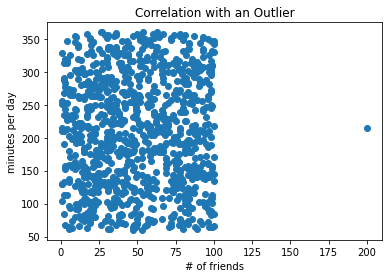

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_large, daily_minutes)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

In [ ]:
outlier = num_friends_large.index(200)

num_friends_good = [x 
                   for i, x in enumerate(num_friends_large)
                   if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]



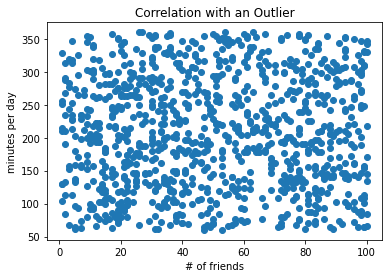

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

**Simpson's Paradox**

correlations can be misleading when confounding variables are ignored

The only real way to avoid this is by knowing your data and by doing what you can to make sure you've checked for possible confounding factors.

**Correlation and Causation**

correlation is not causation

If **x and y are strongly correlated**, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, o r nothing at all. 

# <center><b>Chapter 6. Probablility</b></center>

For our purposes you should think of **probability as a way of quantifying the uncertainty associated with events chosen from some universe of events.**

**The universe consists of all possible outcomes.**

Notationally, we write **P(E**) to mean "**the probability of the event E.**"

We'll use probability theory to build models. 

We'll use probability theory to evaluate models.

We'll use probability theory all over the place.

**Dependence and Independence**

Roughly speaking, we say that **two events E and F are dependent** if **knowing** something about whether **E** happens **gives us information about whether F happens** (and vice versa). Otherwise, they are independent.

For instance, if we **flip a fair coin twice**, knowing whether the **first flip is heads gives us no information about whether the second flip is heads**. **These events are independent**.

 On the other hand, knowing whether the **first flip is heads certainly gives us information about wheter both flips are tails**. (If the first flip is heads, then definitely it's not the case that both flips are tails.) **These two events are dependent**.

Mathematically, we say that **two events E and F are independent** if the probability that they both happen is the **product of the probabilities that each one happens**:

$$P\left(E,\:F\right)\:=\:P\left(E\right)P\left(F\right)$$


In the example, the probability of "first flip heads" is 1/2, and the probability of "both filips tails" is  1/4, but the probability of "first flip heads and both flips tails" is 0.


## **Conditional Probability**

When two events **E and F are independent**, then by definition we have:

$$P\left(E,\:F\right)\:=\:P\left(E\right)P\left(F\right)$$

If they are not necessarily independent (and if the probability of F is not zero), then we define the probability of E "conditional on F" as

$$P\left(E\:|\:F\right)\:=\:\:P\left(E,F\right)/\:P\left(F\right)$$

You should think of this as the probability that E happens, given that we know the F happens.

We often rewrite this as:

$$P\left(E,F\right)\:=\:P\left(E\:|\:F\right)\:P\left(F\right)$$

When E and F are independent, you can check that this gives:

$$\:P\left(E\:|\:F\right)\:=\:\:P\left(E\right)$$

Which is the mathematical way of expressing that knowing F occured gives un no additional information about whether E occurred.

**Ex. A family with two (unknown) children.**

* Each child is equally likely to be a boy or a girl. 
* The gender of the second child is independent of the gender of the first child.



In [ ]:
 #            b              g          <-------- older child
 #         /    \         /    \
 #        b      g       b      g       <-------- second child
 #        |      |       |      |
 #        bb     bg      gb     gg

Then the event "no girls" has probability 1/4, the event "one girl, one boy" has probability 1/2 ,and the evet "two girls" has probability 1/4.

Now we can ask what is the probability of the event "both children are girls" (B) conditional on the  event "the older child is a girl" (G) ? Using the definition of conditinal probability:

$$\:P\left(B\:|\:G\right)\:=\:\:P\left(B,G\right)/P\left(G\right)\:=\:P\left(B\right)/P\left(G\right)\:=\:1/2$$

> 1/4 / 1/2 = 1/2

Since the event B and G("both children are girls and the older child is a girl") is just the event B. (Once you know that both children are girls, it's necessarily true that the older child is a girl.)

Most likely this result accords with your intuition.

We could also ask about the probability of the event "both children are girls" conditional on the event "at least one of the children is a girl" (L). Surprisingly, the answer is different from before!

As before, the event B and L ("both children are girls and at least one of the children is a girl") is just the event B. This means we have

$$\:P\left(B\:|\:L\right)\:=\:\:P\left(B,L\right)\:/P\left(L\right)\:=\:P\left(B\right)/P\left(L\right)\:=\:1/3$$

> 1/4 / 3/4  = 3/4

How can this be the case? Well, if all you know is that at least one of the children is a girl, then it is twice as likely that the family has one boy and one girl than that it has both girls.

In [ ]:
import enum, random

# An Enum is atyped set of enumerated values, We can use them
# to make our code more descriptive and readable.

class Kid(enum.Enum):
  BOY = 0
  GIRL = 1


def random_kid() -> Kid:
  return random.choice([Kid.BOY, Kid.GIRL])


both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):            # in 10000 random families who have 2 children
  younger = random_kid()
  older = random_kid()
  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

# print(older_girl)
# print(both_girls)
# print(either_girl)

print("P(both | older):",both_girls/ older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## **Bayes's Theorem**

Bayes's theorem is a way of **"reversing"** conditional probabilities.

Let's ssay we need to know the probability of some event E conditional on some other event F occurring. But we only have information about the probability of F conditional on E occurring. Using the definition of conditional probability twice tells us that:

$$\:P\left(E\:|\:F\right)\:=\:\:P\left(E,F\right)\:/P\left(F\right)\:=\:P\left(F|\:E\right)P\left(E\right)/P\left(F\right)$$

The event F can be split into the two mutually exclusive events "F and E" and "F and not E." If we write ¬E for "not E" (i.e., "E doesn't happen"), then:

$$P\left(F\right)\:=\:P\left(F,E\right)+\:P\left(F,\neg E\right)$$

so that:

$$\:P\left(E\:|\:F\right)\:=\:P\left(F\:|\:E\right)P\left(E\right)/\left[P\left(F\:|\:E\right)P\left(E\right)\:+P\left(F\:\:|\:\neg E\right)P\left(\neg E\right)\right]$$

Which is how Bayes's theorem is often stated.

Imagine a certain disease that affects 1 in every 10,00 people. And imagine that there is a test for this disease that gives the correct result ("diseased" if you have the disease, "nondiseased" if you don't) 99% of the time.

What does a positive test mean? Let's use T for the event "your test is positive" and D for the event "you have the disease." Then Bayes's theorem says that the probability that you have the disease, conditional on testing positive, is:

$$\:P\left(D\:|\:T\right)\:=\:P\left(T|\:D\right)P\left(D\right)/\left[P\left(T|\:D\right)P\left(D\right)+P\left(T\:|\neg D\right)P\left(\neg D\right)\right]$$

Here we know hta P(T|D), the probanbility that someone with the disease tests positive, is 0.99. P(D), the probability that any given person has the disease, is 1/10,000 = 0.0001. P(T|¬D), the probability that osmeone without the disease tests positive, is 0.01. And P(¬D), the probability that any given person doesn't have the disease, is 0.9999. If you substitute these numbers into Bayes's theorem, you find:

$$\:P\left(D\:|\:T\right)\:=\:0.98\%$$

That is, less than 1% of the people who test positive actually have the disease.

A more intuitive way to see this is to imagine a population of 1 million people. You'd expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other hand, you'd epect 999,900 of them not ot have the disease, and 9,999 of those to test positive. That means you'd expect only 99 out of (99 + 9999) positive tester to actually have the disease.

**Random Variables**

A random variable is a **variable whose possible values have an associated probability distribution**. 
- A very simple random variable equals 1 if a coin flip turns up heas and 0 if the flip turns up tials. A more complicated one might measure the number of heads you observe when flipping a coin 10 times or a value picked from range(10) where each number is equally likely.

The associated distribution gives the **probabilities that the vaiable realizes each of its possible values**. 
  - The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5. The range(10) variable has a distribution that assigns probability 0.5. The range(10) variable has a distribution that assigns probability 0.1 to each of the numbers from 0 to 9.

We will sometimes talk about the **expected value of a random variable, which is the average of its values weighted by their probabilities**.
  - The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range (10) variable has an expected value of 4.5

Random variables can be conditioned on events just as other events can.
  - In two-child example, if X is the random variable representing the number of girls, X equals 0 (gg) with probability 1/4, 1 (g|b) with probability 1/2, and 2 (bb) with probability 1/4.
  - We can define a new random variable Y that gives the number of girls conditional on at least one of the children being a girl. Then Y eals 1 wiht probability 2/3 and 2 2ith probability 1/3. And a variable Z that's the number of girls conditional on the older child being a girl equals 1 with probability 1/2 and 2 with probability 1/2. 

For the most part, we will be using random variables implicitly in what we do without calling special attention to them. But if you look deeply you'll see them.

## **Continuous Distributions**

A coin flip corresponds to a **discrete distribution** -one that associates positive probability with **discrete outcomes**.  

Often we'll want to **model distributions across a continuum of outcomes**. (For our purposes, these outcomes will always be real numbers, although that's not always the case in real life.) For example, the uniform distribution puts equal weight on all the numbers between 0 and 1.

Because there are **infinitely many numbers between 0 and 1**, this means that the weight it assigns to individual points must necessarily be zero. For this reason, we represent **a continuous distributon with a probability density function** (PDF) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [ ]:
# The density function for the uniform distribution is

def uniform_pdf(x: float) -> float:
  return 1 if 0 <= x < 1 else 0                       # discrete outcomes  

In [ ]:
# Cumulative distribution function (CDF)
# gives the probability that a random variable is 
# less than or equal to a certain value.

def uniform_cdf(x: float) -> float:
  """Returns the probability that a uniform random vairable is <= x"""
  if x < 0 :   return 0   # uniform frandom is never less than 0
  elif x < 1 : return x   # e.g. P(X <= 0.4) = 0.4
  else:        return 1   # uniform random is always less than 1

## **The Normal Distribution**

The normal distribution is the classic **bell curve-shaped distribution** and is completely determined by two parameters: 
 - its **mean μ (mu)** and 
 - its **standard deviation σ (sigma)**. 
 
The **mean** indicates where the bell is **centered**, and the **standard deviation** how **"wide"** it is.

$$\:f\:\left(x|μ,\:σ\right)\:=\:\frac{1}{\sqrt{2\pi }σ}exp\left(−\frac{\left(x\:−\:μ\right)^2}{2σ^2}\:\right)$$

In [ ]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

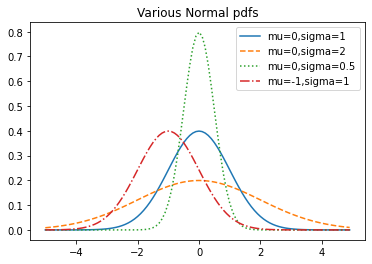

In [ ]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs],'-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],'--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs],'-.', label='mu=-1,sigma=1')

plt.legend()
plt.title("Various Normal pdfs")
plt.show()

When μ = 0 and σ = 1, it's called the **standard normal distribution**. If Z is a standard normal random variable, then it turns out that:

$$X\:=\:σZ\:+\:μ$$

is also normal but with mean μ and standard deviation σ. Conversely, if X is a normal random variable with mean μ and standard deviation σ is **a standard normal variable**. 

$$Z\:=\:\frac{\left(X\:−\:μ\right)}{σ}$$

In [ ]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

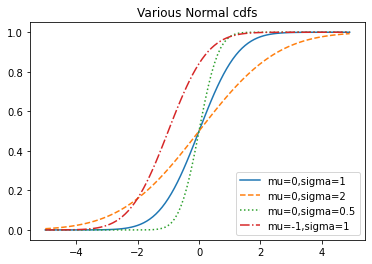

In [ ]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')

plt.legend(loc=4)             # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [ ]:
def inverse_normal_cdf(p: float, 
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
  """Find approximate inverse using binary search"""

  # if not standard, compute standard and rescale
  if mu != 0 or sigma != 1:
    return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
  
  low_z = -10.0       # normal_cdf(-10) is (very close to) 0
  hi_z = 10.0         # normal_cdf(10)  is (very close to) 1

  while hi_z - low_z > tolerance:
    mid_z = (low_z + hi_z) / 2       # Consider the midpoint
    mid_p = normal_cdf(mid_z)        # and the CDF's value there
    if mid_p < p:
      low_z = mid_z                  # Midpoint too low, search above it
    else: 
      hi_z = mid_z                   # MIdpoint too high, search below it
 
  return mid_z  

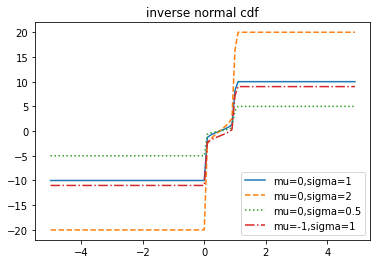

In [ ]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [inverse_normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [inverse_normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [inverse_normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')

plt.legend(loc=4)             # bottom right
plt.title("inverse normal cdf")
plt.show()

## **The Central Limit Theorem**

One reason the normal distribution is so useful is the **central limit theorem**, which says (in essence) that a random variable defined as **the average of large number of independent** and **identically distributed random variables** is itself approximately **normally distributed**

In particular, if x<sub>1</sub>,...,x<sub>n</sub> are random variables with mean μ and standard deviation σ, and if n is large, then:

$$\frac{1}{n}\left(x_1+...+x_n\right)$$

is approximately normally distributed with mean μ  and standard deviaton σ/√n. Equivalently (but often more usefully),

$$\frac{\left(x_1+...+x_n\right)\:-μn}{σ\sqrt{n}}$$

is approximately normally distributed with mean 0 and standard deviation 1.


An easy way to illustrate this is by looking at binomial random variables, which have two parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1-p:

In [ ]:
def bernoulli_trial(p: float) -> int:
  """Returns 1 with probability p and 0 with probability 1-p"""
  return 1 if random.random() < p else 0


def binomial(n: int, p: float) -> int:
  """Returns the sum of n bernoulli(p) trails"""
  return sum(bernoulli_trial(p) for _ in range(n))

In [ ]:
from collections import Counter

def binomal_histogram(p: float, n: int, num_points: int) -> None:
  """Picks points from a Binomial(n, p) and plots their histogram"""
  data = [binomial(n, p) for _ in range(num_points)]

  # use a bar chart to show the actual binomial samples
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
          [v / num_points for v in histogram.values()],
          0.8,
          color='0.75')
  
  mu = p * n
  sigma = math.sqrt(n * p * (1 - p))

  # use a line chart to show the normal approximation
  xs = range(min(data), max(data) + 1)
  ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
       for i in xs]
  plt.plot(xs, ys)
  plt.title("Binomial Distribution vs. Normal Approximation")
  plt.show()

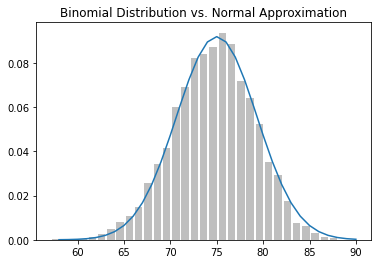

In [ ]:
binomal_histogram(0.75, 100, 10000)

# <center><b>Chapter 7. Hypothesis and Inference</b></center>

What will we do with all this statistics and probability theory?

* The science part of data science frequently involves **forming** and **testing hypotheses** about our data and the processes that generate it.

## **Statistical Hypothesis Testing**

Often, as data scientists, we'll **want to test whether a certain hypothesis is likely to be true**.

Under various assumptions, those statistics can be thought of as **observatins of random variables from known distributions**, which allows us to make statements about how likely those assumptions are to hold

In the classical setup, we have a null hypothesis, H<sub>0</sub>, that represents some default position, and some alternative hypothesis, H<sub>1</sub>, that we'd like to compare it with. We use statistics to decide whether we can reject H<sub>0</sub> as false or not. This will probably make some sense with an example.

## **Example: Flipping a Coin**

We have a coin and we want to test whether it's fair. We'll make the assumption that the coin has some probability p of landing heads, and so our null **hypothesis is that the coin is fair** -that is, that p = 0.5. We'll test this against the **alternative hypothesis p ≠ 0.5.**

In [ ]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
  """Returns mu and sigma corresponding to a Binomial(n, p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [ ]:
from scratch.probability import normal_cdf

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf


# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is greater than lo."""
  return 1 - normal_cdf(lo, mu, sigma)


# It's between if it's less than hi, but not less than lo
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is between lo and hi."""
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)


# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
  """The probability that  an N(mu, sigma) is not between lo and hi."""
  return 1 - normal_probability_between(lo, hi, mu, sigma)

In [ ]:
from scratch.probability import inverse_normal_cdf

def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
  """Returns the z for which P(Z <= z) = probability"""
  return inverse_normal_cdf(probability, mu, sigma)


def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
  """Returns the z for which P(Z >= z) = probability"""
  return inverse_normal_cdf(1 - probability, mu, sigma)


def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
  """
  Returns the symmetric (about the mean) bounds
  that contain the specified probability
  """
  tail_probability = (1 - probability) / 2

  # upper bound should have tail_probability above it
  upper_bound = normal_lower_bound(tail_probability, mu, sigma)

  # lower bound should have tial_probability below it
  lower_bound = normal_upper_bound(tail_probability, mu, sigma)

  return lower_bound, upper_bound

In [ ]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

print(mu_0)
print(sigma_0)

500.0
15.811388300841896


a type 1 error ("false positive") , in which we reject H<sub>0</sub> even though it's true.

In [ ]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

print(lower_bound)
print(upper_bound)

469.01026640487555
530.9897335951244


Assuming p really equals 0.5 (i.e., H<sub>0,</sub> is true), there is just a 5% chance we observe an X that lies outside this interval, which is the exact significance we wanted. Said differently, if H<sub>0</sub> is true, then, approximately 19 times out of 20, this test will give the correct result.

100 ----- 5, 95

20 ------ 1, 19

the power of a test, which is the probability of not making a type 2 error ("false negative"), in which we fail to reject H<sub>0</sub> even though it's false. 

In [ ]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis,
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability


print("lower bounds: {:.2f}, upper bounds: {:.2f}".format(lo, hi))
print("mean: {}, standard deviation: {:.2f}".format(mu_1, sigma_1))
print("type II error: {:.2f}".format(type_2_probability))
print("power: {:.2f}".format(power))

lower bounds: 469.01, upper bounds: 530.99
mean: 550.0, standard deviation: 15.73
type II error: 0.11
power: 0.89


Imagine instead that our null hypothesis was that the coin is not biased toward heads, or that p ≤ 0.5. In that case we want a one-side test that rejects the null hypothesis when X is much larger than 500 but not when X is smaller than 500. So, a 5% significance test involves using `normal_probability_below` to find the cutoff below which 95% of the probability lies:

In [ ]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability

print("upper bounds: {:.2f}".format(hi))
print("power: {:.2f}".format(power))

upper bounds: 526.01
power: 0.94


This is a more powerful test, since it no longer rejects H<sub>0</sub> when X is below 469 (which is very unlikely to happen if H<sub>1</sub> is true) and instead rejects H<sub>0</sub> when X is between 526 and 531 (which is somewhat likely to happen if H<sub>1</sub> is true).

## **p-Values**

An alternative way of thinking about the preding test involves p-values. Instead of choosing bounds based on some probability cutoff, we compute the probability-assuming H<sub>0</sub> is true-that we would see a value at least as extreme as the one we actually observed.



In [ ]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
  """
  How likely are we to see a value at least as extreme as x (in either
  direction) if our values are from an N(mu, sigma)?
  """
  if x >= mu:
    # x is greater than the mean, so the tail is everyting greater than x
    return 2 * normal_probability_above(x, mu, sigma)
  else:
    # x is less than the mean, so the tail is everything less than x 
    return 2 * normal_probability_below(x, mu, sigma)

In [ ]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [ ]:
import random

extreme_value_count = 0
for _ in range(1000):
  num_heads = sum(1 if random.random() < 0.5 else 0        # Count # of heads 
                  for _ in range(1000))                    # in 1000 flips,
  if num_heads >= 530 or num_heads <= 470:                 # and count how often
    extreme_value_count += 1                               # the X is 'extreme'

# p-value was 0.062 =>  ~62 extreme values out of 1000
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"


In [ ]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [ ]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [ ]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582072

In [ ]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

## **Confidence Intervals**

We've been testing hypotheses about the value of the heads probability p, which is a parameter of the unknown "heads" distribution. When this is the case, a third approach is to construct a confidence interval around the observed value of the parameter.

For example, we can estimate the probability of the unfair coin by looking at the average value of the Bernoulli variables corresponding to each flip - 1 if heads, 0 if tails. If we observe 525 heads out of 1,000 flips, then we estimate p equals 0.525.


In [ ]:
# math.sqrt(p * (1 - p) / 1000)

In [ ]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) 

print(sigma)

0.015791611697353755


In [ ]:
# 95% confident that the interval contains the parameter p

normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

if instead we' d seen 540 heads, then we'd have:

In [ ]:
p_hat = 540 / 1000 
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)

print(sigma)

0.015760710643876435


In [ ]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

## **p-Hacking**

A procedure that erroneously rejects the null hypothesis only 5% of the time will-by definition-5% of the time erroneously reject the null hypothesis:

In [ ]:
from typing import List

def run_experiment() -> List[bool]:
  """Flips a fair coin 1000 times, True = heads, False = tails"""
  return [random.random() < 0.5 for _ in range(1000)]


def reject_fairness(experiment: List[bool]) -> bool:
  """Using the 5% significance levels"""
  num_heads = len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads > 531


random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

assert num_rejections == 46

## **Example: Running an A/B Test**

One of your primary responsibilities at DataSciencester is **experience optimization**, which is a euphemism for trying to get people to click on advertisements. One of your advertisers has developed a new energy drink targeted at data scientists, and the VP of Advertisements wants your help choosing between advertisement A ("testes great!") and advertisement B ("less bias!")

Being a scientist, you decide to **run an experiment** by randomly showing site visitors one of the two advertisements and **tracking how many people click on each one**.

If 990 out of 1,000 A-viewers click their ad, while only 10 out of 1,000 B-viewers click their ad, you can be pretty confident that A is the better ad. But what if the differences are not so start? Here's where you'd use statistical inference.

Let's say that N<sub>A</sub> see ad A, and the n<sub>A</sub> of them click it. We can think of each ad view as a Bernoulli trial where p<sub>A</sub> is the probability that someone clicks ad A. Then (if N<sub>A</sub> is large, which it is here) we know that n<sub>A</sub>/N<sub>A</sub> is approximately a normal random variable with mean P<sub>A</sub> and standard deviation σ<sub>A</sub> =  √P<sub>A</sub> (1 − P<sub>A</sub>) / N<sub>A</sub>


Similarly, n<sub>B</sub>/N<sub>B</sub> is approximately a normal random variable with mean P<sub>B</sub> and standard deviation σ<sub>B</sub> =  √P<sub>B</sub> (1 − P<sub>B</sub>) / N<sub>B</sub>


In [ ]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
  p = n / N
  sigma = math.sqrt(p * (1 - p) / N)
  return p, sigma

In [ ]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
  p_A, sigma_A = estimated_parameters(N_A, n_A)
  p_B, sigma_B = estimated_parameters(N_B, n_B)
  return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [ ]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [ ]:
two_sided_p_value(z)

0.2541419765422359

In [ ]:
z = a_b_test_statistic(1000, 200, 1000, 150)
z

-2.948839123097944

In [ ]:
two_sided_p_value(z)

0.003189699706216853

## **Bayesian Inference**

The procedures we've looked at have involved making probability statements about our tests: e.g., "There's only a 3% chance you'd ovserve such an extreme statistic if our null hypothesis were true."

An alternative approach to inference involves treating the unknown parameters themselves as random variables. The analyst (that's you) starts with a prior distribution for the parameters and then uses the observed data and Bayes's theorem to get an updated posterior distribution for the parameters. Rather than making probability judgemnts about the tests, you make probability judgments about the parameters.

For example, when the unknown parameter is a probability (as in our coin-flipping example), we often use a prier from the Beta distribution, which puts all its probability between 0 and 1:

In [ ]:
def B(alpha: float, beta: float) -> float:
  """A normalizing constant so that the total probability is 1"""
  return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)


def beta_pdf(x: float, alpha: float, beta: float) -> float:
  if x <= 0 or x >= 1:
    return 0
  return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [ ]:
# this distribution centers its weight 

# alpha / (alpha + beta)

Using Bayesian inference to test hypotheses is **considered somewhat
controversial**-in part because the mathematics can get somewhat
complicated, and in part because of the subjective nature of choosing a
prior

# <center><b>Chapter 8. Gradient Descent</b></center>

Frequently when doing data science, we'll be tryng to the **find the best model for a certain situation**. And usually **"best"** will mean something like **"minimizes the error of its predictions"** or **"maximizes the likelihood of the data."** In other words, it will represent the solution to some sort of **optimization problem**.

This means we'll need to solve a number of optimization problems. And in particular, we'll need to solve them from scratch. Our approach will be a technique called **gradient descent**, which lends itself pretty well to a from scratch treatment. You might not find it super-exciting in and of itself, but it will enable us to do exciting things throughout the book, so bear with me.

## **The Idea Behind Gradient Descent**

In [ ]:
from scratch.linear_algebra import dot
from typing import List

Vector = List[float]

def sum_of_squares(v: Vector) -> float:
  """Computes the sum of squared elements in v"""
  return dot(v, v)

Acccordingly, one approach to **maximizing a function** is to:
* pick a random starting point
* compute the gradient
* take a small step in the direction of the gradient (i.e. the direction that causes the function to increase the most).
* repeat with the new starting point.

## **Estimating the Gradient**

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x. The derivative is defined as the limit of the difference quotients:

In [ ]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
  return (f(x + h) - f(x)) / h

The derivative is the slope of the tangent line at (x, f(x)), while the difference quotient is the slope of the not-quite-tangent line that runs through (x + h, f(x + h)). As h gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line

In [ ]:
def square(x: float) -> float:
  return x * x

In [ ]:
def derivative(x: float) -> float:
  return 2 * x

In [ ]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

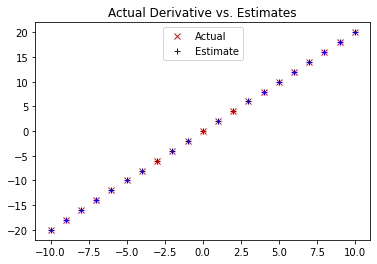

In [ ]:
# plot to show they're basically the same
import matplotlib.pyplot as plt

plt.title("Actual Derivative vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')         # red x
plt.plot(xs, estimates, 'b+', label='Estimate')     # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple **partial derivatives**, each indicatin **how f changes when we make small changes in just one of the input variables**.

We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed:

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
  """Returns the i-th partial difference quotient of f at v"""
  w = [v_j + (h if j == i else 0)           # add h to just the ith element of v
      for j, v_j in enumerate(v)]

  return (f(w) - f(v)) /h

In [ ]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
  return [partial_difference_quotient(f, v, i, h)
          for i in range(len(v))]

## **Using the Gradient**

It's easy to see that the sum_of_squares function is **smallest when tis input v is a vector of zeros**. But imagine we didn't know that. Let's use gradients to find the minimum among **all three-dimensional vectors**. We'll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [ ]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

In [ ]:
import random
from scratch.linear_algebra import distance, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
  """Move 'step_size' in the 'gradient' directon from v"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size, gradient)
  return add(v, step)


def sum_of_squares_gradient(v: Vector) -> Vector:
  return [2 * v_i for v_i in v]


v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
  grad = sum_of_squares_gradient(v)    # compute the gradient at v
  v = gradient_step(v, grad, -0.01)    # take a negative gradient step
  print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

0 [5.315074569682628, 8.836914824363369, -3.6360428437379047]
1 [5.208773078288976, 8.660176527876102, -3.5633219868631465]
2 [5.104597616723196, 8.48697299731858, -3.4920555471258834]
3 [5.002505664388732, 8.317233537372207, -3.4222144361833657]
4 [4.9024555511009575, 8.150888866624763, -3.3537701474596986]
5 [4.804406440078939, 7.987871089292268, -3.2866947445105046]
6 [4.70831831127736, 7.828113667506423, -3.2209608496202944]
7 [4.6141519450518125, 7.671551394156294, -3.1565416326278886]
8 [4.521868906150776, 7.518120366273169, -3.093410799975331]
9 [4.431431528027761, 7.367757958947705, -3.031542583975824]
10 [4.342802897467206, 7.220402799768752, -2.9709117322963077]
11 [4.255946839517862, 7.075994743773377, -2.9114934976503815]
12 [4.170827902727505, 6.934474848897909, -2.8532636276973737]
13 [4.087411344672955, 6.795785351919951, -2.796198355143426]
14 [4.005663117779497, 6.659869644881552, -2.740274388040558]
15 [3.9255498554239066, 6.526672251983921, -2.6854689002797465]
16 [3

## **Choosing the Right Step Size**

Althouh the rationale for moving against the gradient is clear, how far to move is not. Indeed, choosing the right step size is more of an art than a science. Popular options include:

* Using a fixed step size

* Gradually shrinking the step size over time

* At each step, choosing the step size that minimizes the value of the objective function



The last approach sounds greaat but is, in practice, a costly computation. To keep thinsg simple, we'lll mostly just use a fixed step size. The step size that "works" depends on the problem -too small, and your gradient descent will take forever; too big, and you'll take giant steps that might make the function you care about get larger or even be undefined. So we'll need to experiment.

## **Using Gradient Descent to Fit Models**

We'll using **gradient descent** to fit parameterized models to data. In the usual case, we'll have some dataset and some (hypothesized) model for the data that depends (in a differentiable way) on one or more parameters. We'll also have a **loss function that measures how well the model fits** our data. (Smallr is better.)

If we think of our data as being fixed, then our loss function tell us how good or bad any particular model parameters are. This means we can use gradient descent to find the model parameters that make the loss as small as possible. 

In [ ]:
# x range from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In this case we know the parameters of the linear relationship between x and y, but imagine we'd like to learn them from the data. We'll use gradient descent to find the slope and intercept that minimize the average squared error.

We'll start off with a function that determines the gradient based on the error from a single data point:

In [ ]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
  slope, intercept = theta
  predicted = slope * x + intercept      # The prediction of the model
  error = (predicted - y)                # error is (predicted - actual)
  squared_error = error ** 2             # We'll minimize squared error
  grad = [2 * error * x, 2 * error]      # using its gradient
  return grad

Now, that computation was for a single data point. For the **whole dataset** we'll look at the **means squared error.** And the gradient of the mean squared error is just the mean of the individual gradients.

So, here's what we're going to do:

1. Start with a random value for theta
2. Compute the mean of the gradients
3. Adjust theta in that direction.
4. Repeat

In [ ]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
  # Compute the mean of the gradients
  grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
  # Take a step in that direction
  theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)
  
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.937257522549054, -0.36641950615972635]
1 [11.36548281295363, -0.34274940962485784]
2 [25.753880214350303, -0.34069842799265443]
3 [16.15682119860035, -0.32426315092231883]
4 [22.558075997382645, -0.3174578034218739]
5 [18.288445851942356, -0.30426481181764753]
6 [21.136302351942632, -0.29536783634206987]
7 [19.23679096341792, -0.2836407983174431]
8 [20.50377678660193, -0.27383672575739026]
9 [19.658707046610758, -0.26278527551927355]
10 [20.222379614635106, -0.25260099792162427]
11 [19.846420196040462, -0.24187341631114595]
12 [20.0971958558247, -0.2315432492824832]
13 [19.92993882091564, -0.22098296692809355]
14 [20.04150982348234, -0.21061106217332173]
15 [19.967102336675108, -0.2001483302254927]
16 [20.016742593107477, -0.18978093122836662]
17 [19.983642909466084, -0.1793846267728024]
18 [20.005730794759348, -0.16904221460979066]
19 [19.991008517680903, -0.15869839938581168]
20 [20.00083862030745, -0.14838999406935918]
21 [19.99429225026086, -0.13809237546091302]
22 [19.998668

## **Minibatch and Stochastic Gradient Descent**

One **drawback** of the preceding approach is that we had to **evaluate the gradients on the entire dataset** before we could take a gradient step and update our parameters. In this case it was fine, because our dataset was only 100 pairs and the gradient computation was cheap.

Your models, however, will frequently have **large datasets and expensive gradient computations**. In that case you'll want to take gradient steps more often.

We can do this using a technique called **minibatch gradient descent**, in which we compute the gradient (and take a gradient step) based on a "minibatch" sampled from the large dataset:

In [ ]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # This allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
  """Generates 'batch_size'-sized minibatches from the dataset"""
  # start indexes 0, batch_size, 2 * batch_size, ...
  batch_starts = [start for start in range(0, len(dataset), batch_size)]

  if shuffle: random.shuffle(batch_starts) # shuffle the batches

  for start in batch_starts:
    end = start + batch_size
    yield dataset[start:end]

slove problem using minibatches:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
  for batch in minibatches(inputs, batch_size=20):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be aboout 5"

0 [17.340279634387, -0.30745885059929756]
1 [19.742200133239102, -0.44659829957399766]
2 [20.235071472430363, -0.4383491247210275]
3 [20.071798848154984, -0.40588923505542024]
4 [20.155858917692054, -0.36680334866747555]
5 [19.78334087562331, -0.12790504216793908]
6 [20.345128774012682, -0.10785708881881816]
7 [18.830496318141762, -0.030505881002161422]
8 [20.04962965468331, 0.09398446434462882]
9 [19.786941018003404, 0.31616767988211186]
10 [20.150944543183503, 0.34981095165320564]
11 [20.22772458246522, 0.37350212496371293]
12 [18.969487903132414, 0.43664586253811777]
13 [19.712331372100742, 0.5033954621851208]
14 [20.82305151712989, 0.5626949460602004]
15 [21.89895921304686, 0.7115743608389524]
16 [19.940542492753252, 0.06697221383433014]
17 [19.830645653539694, 0.11222226347237071]
18 [20.781985109199123, 0.1702144401730994]
19 [20.24974508295473, 0.0641975212444376]
20 [20.795184596211012, 0.18721876871738236]
21 [19.859969530170012, -0.01757926555512014]
22 [19.96890970755055, -0

Another variation is s**tochastic gradient descent**, in which you take gradient steps based on one training example at a time:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
  for x, y in inputs:
    grad = linear_gradient(x, y, theta)
    theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.104703147546488, -0.21129422600409986]
1 [20.100210308344685, 0.012289919270114786]
2 [20.095910910262486, 0.226281450070734]
3 [20.09179597133838, 0.43109193897683834]
4 [20.087857570565397, 0.6271152870534451]
5 [20.08408816098654, 0.8147284959724176]
6 [20.080480459359745, 0.9942923923844978]
7 [20.077027548843763, 1.166152321976797]
8 [20.073722772066148, 1.330638813884537]
9 [20.0705597896478, 1.4880682162742536]
10 [20.06753252827766, 1.6387433053165223]
11 [20.064635128561918, 1.7829538663955802]
12 [20.06186202437906, 1.9209772514368157]
13 [20.0592079111895, 2.0530789136258836]
14 [20.056667669345888, 2.179512917426878]
15 [20.05423641572709, 2.3005224267514395]
16 [20.051909457026476, 2.4163401725763287]
17 [20.049682349957298, 2.5271889011388593]
18 [20.047550788162035, 2.633281802167245]
19 [20.04551069212528, 2.7348229187163406]
20 [20.043558111717644, 2.832007539494826]
21 [20.04168928962151, 2.925022574011672]
22 [20.039900693512315, 3.0140469138849766]
23 [20.0381

On this problem, **stochastic gradient descent** finds the optimal parameters in **a much smaller number of epoch.** But there are always **tradeoffs**. Basing gradient steps on small minibatches (or on single data points) allows you to take more of them, but the gradient for a single point **might lie in a very different direction** from the gradient for the dataset as a whole.

In addition, if we weren't doing our linear algebra from scratch, there would be performance gains from "vectorizing" our computations across batches rather than computing the gradient one point at a time.


# <center><b>Chapter 9. Getting Data</b></center>

In order to be a data scientist **you need data.**

A data scientist will spend time:
* accquiring
* cleaning
* transforming data

## **stadin and stdout**

In [ ]:
# # egrap.py
# import sys, re

# # sys.argv is the list of command-line arguments
# # sys.argv[0] is the name of the program itself
# # sys.argv[1] will be the regex specified at the command line
# regex = sys.argv[1]

# # for every line passed into the script
# for line in sys.stdin:
#   # if it matches the regex, write it to stdout
#   if re.search(regex, line):
#     sys.stdout.write(line)

In [ ]:
# # line_count.py
# import sys

# count = 0
# for line in sys.stdin:
#   count += 1

# # print goes to sys.stdout
# print(count)

In [ ]:
# # most_common_words.py
# import sys
# from collections import Counter

# # pass in number of words as first argument
# try:
#   num_words = int(sys.argv[1])
# except:
#   print("usage: most_common_words.py num_words")
#   sys.exit(1) # nonzero exit code indicates error

# counter = Counter(word.lower()                      # lowercase words
#                   for line in sys.stdin             
#                   for word in line.strip().split()  # split on spaces
#                   if word)                          # skip empty 'words'

# for word, count in counter.most_common(num_words):
#   sys.stdout.write(str(count))
#   sys.stdout.write("\t")
#   sys.stdout.write(word)
#   sys.stdout.write("\n")

## **Reading Files**

**The basics of Text Files**

In [ ]:
from pathlib import Path

file_name = Path("reading_file.txt")

if not file_name.is_file():
  with open(file_name, "w") as f:
    f.write("""cat1
/kat/
noun
  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.
  2. INFORMAL•NORTH AMERICAN
(especially among jazz enthusiasts) a man.
"this West Coast cat had managed him since the early 80s" 
verb NAUTICAL
  raise (an anchor) from the surface of the water to the cathead.
  "I kept her off the wind and sailing free until I had the anchor catted""")

In [ ]:
# 'r' means read-only, it's assumed if you leave it out
file_for_reading  = open('reading_file.txt', 'r')
file_for_reading = open('reading_file.txt')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forgot to close your files when you're done
file_for_writing.close()

In [ ]:
with open('reading_file.txt') as f:
  # data = function_that_gets_data_from(f)
  data = f.read()

# at this point f has already been closed, so don't try to use it 
# process(data)
print(data)

cat1
/kat/
noun
  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.
  2. INFORMAL•NORTH AMERICAN
(especially among jazz enthusiasts) a man.
"this West Coast cat had managed him since the early 80s" 
verb NAUTICAL
  raise (an anchor) from the surface of the water to the cathead.
  "I kept her off the wind and sailing free until I had the anchor catted


In [ ]:
# read a whole text file, iterate over the lines of the file usng for

starts_with_hash = 0

with open('reading_file.txt') as f:
  for line in f:                # look at each line in the file
    print(line)
    if re.match("^#", line):    # use a regex to see if it starts ^ with '#'
      starts_with_hash += 1     # if it does, add 1 to the count


cat1

/kat/

noun

  1. a small domesticated carnivorous mammal with soft fur, a short snout, and retractable claws. It is widely kept as a pet or for catching mice, and many breeds have been developed.

  2. INFORMAL•NORTH AMERICAN

(especially among jazz enthusiasts) a man.

"this West Coast cat had managed him since the early 80s" 

verb NAUTICAL

  raise (an anchor) from the surface of the water to the cathead.

  "I kept her off the wind and sailing free until I had the anchor catted


In [ ]:
file_name = Path("email_addresses.txt")

if not file_name.is_file():        
  with open('email_addresses.txt', 'w') as f:
      f.write("nico@gmail.com\n")
      f.write("niklaust@hotmail.com\n")
      f.write("niklaust@gmail.com\n")

In [ ]:
def get_domain(email_address: str) -> str:
  """Split on '@' and return the last piece"""
  return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'

In [ ]:
from collections import Counter

with open('email_addresses.txt', 'r') as f:
  domain_counts = Counter(get_domain(line.strip())
                        for line in f
                        if "@" in line)

In [ ]:
print(domain_counts)

Counter({'gmail.com': 2, 'hotmail.com': 1})


**Delimited Files**

**files** with **lots of data on each line**.

* comma-separated 
* tab-separated

each line has several fields, with a comma or a tab indicatig where one field ends and the next field starts

you should never try to parse them yourself. Instead, you should use Python's csv module

tab_delimited_stock_prices.txt

In [ ]:
file_name = Path("tab_delimited_stock_prices.txt")

if not file_name.is_file():
  with open('tab_delimited_stock_prices.txt', 'w') as f:
      f.write("""6/20/2014\tAAPL\t90.91
6/20/2014\tMSFT\t41.68
6/20/2014\tFB\t64.5
6/19/2014\tAAPL\t91.86
6/19/2014\tMSFT\t41.51
6/19/2014\tFB\t64.34
""")

In [ ]:
def process(date: str, symbol: str, closing_price: float) -> None:
    # Imaginge that this function actually does something.
    assert closing_price > 0.0

In [ ]:
import csv

with open('tab_delimited_stock_prices.txt') as f:
  tab_reader = csv.reader(f, delimiter='\t')
  for row in tab_reader:
    date = row[0]
    symbol = row[1]
    closing_price = float(row[2])
    process(date, symbol, closing_price)
    print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34


colon_delimited_stock_prices.txt

In [ ]:
file_name = Path("colon_delimited_stock_prices.txt")

if not file_name.is_file():
  with open('colon_delimited_stock_prices.txt', 'w') as f:
      f.write("""date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.5
""")

In [ ]:
with open('colon_delimited_stock_prices.txt') as f:
  colon_reader = csv.DictReader(f, delimiter=':')  # skip the header row with csv.DictReader, read.next
  for dict_row in colon_reader:
    date = dict_row["date"]
    symbol = dict_row["symbol"]
    closing_price = float(dict_row["closing_price"])
    process(date, symbol, closing_price)
    print(date, symbol, closing_price)

6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5


comma_delimited_stock_prices.txt

In [ ]:
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}

with open('comma_delimited_stock_prices.txt', 'w') as f:
  csv_writer = csv.writer(f, delimiter=',')
  for stock, price in todays_prices.items():
    csv_writer.writerow([stock, price])

In [ ]:
with open('comma_delimited_stock_prices.txt') as f:
  data = f.read()


print(data)

AAPL,90.91
MSFT,41.68
FB,64.5



bad_csv.txt  **"do not do it"**

In [ ]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

In [ ]:
# dont do this!

with open('bad_csv.txt', 'w') as f:
  for row in results:
    f.write(",".join(map(str, row))) # might have too many commas in it!
    f.write("\n")                     # row might have newlines as well!

In [ ]:
with open('bad_csv.txt') as f:
  data = f.read()


print(data)

test1,success,Monday
test2,success, kind of,Tuesday
test3,failure, kind of,Wednesday
test4,failure, utter,Thursday



## **Scraping the Web**

**HTML and the Parsing Thereof**

    <html>
      <head>
        <title>A web page</title>
      </head>
      <body>
        <p id="author">Joel Grus</p>
        <p id="subject">Data Science</p>
      </body>
    </html>

to get data out of HTML, we will use the **Beautiful Soup library**

We'll also use the **Requests library**

In [ ]:
pip install beautifulsoup4 requests html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


    <!doctype html>
    <html lang="en-US">
    <head>
        <title>Getting Data</title>
        <meta charset="utf-8">
    </head>
    <body>
        <h1>Getting Data</h1>
        <div class="explanation">
            This is an explanation.
        </div>
        <div class="comment">
            This is a comment.
        </div>
        <div class="content">
            <p id="p1">This is the first paragraph.</p>
            <p class="important">This is the second paragraph.</p>
        </div>
        <div class="signature">
            <span id="name">Joel</span>
            <span id="twitter">@joelgrus</span>
            <span id="email">joelgrus-at-gmail</span>
        </div>
    </body>
    </html>

In [ ]:
%%html 
https://raw.githubusercontent.com/joelgrus/data/master/getting-data.html

In [ ]:
from bs4 import BeautifulSoup
import requests

# I put the relevent HTML file on GitHub. In order to fit
# the URL in the book i had to split it across two lines.
# Recall the whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
      "joelgrus/data/master/getting-data.html")

In [ ]:
html = requests.get(url).text
# html

In [ ]:
soup = BeautifulSoup(html, 'html5lib')
# soup

find the first \<p\> tag

In [ ]:
first_paragraph = soup.find('p')                     # or just soup.p
# first_paragraph

get the **text contensts** of a Tag

In [ ]:
first_paragraph_text = soup.p.text
first_paragraph_text

'This is the first paragraph.'

In [ ]:
first_paragraph_words = soup.p.text.split()
first_paragraph_words

['This', 'is', 'the', 'first', 'paragraph.']

extract a tag's attributes

In [ ]:
first_paragraph_id = soup.p['id']                  # raise KeyError if no 'id'
first_paragraph_id                               

'p1'

In [ ]:
first_paragraph_id2 = soup.p.get('id')             # returns None if no 'id'
first_paragraph_id2                                # id name

'p1'

get multiple tags

In [ ]:
all_paragraphs = soup.find_all('p')                 # or just soup('p')
# all_paragraphs

In [ ]:
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]
# paragraphs_with_ids

find tags with a specific class

In [ ]:
important_paragraphs = soup('p', {'class': 'important'})
# important_paragraphs

In [ ]:
important_paragraphs2 = soup('p', 'important')
# important_paragraphs2

In [ ]:
important_paragraphs3 = [p for p in soup('p')
                         if 'important' in p.get('class', [])]
# important_paragraphs3

combine these methods to implement more elaborate logic

In [ ]:
#  Warning: will return the same <span> multiple times
# if it sits inside multiple <div>s.
# Be more clever if that's the case.
spans_inside_divs = [span
                     for div in soup('div')         # for each div on the page
                     for span in div('span')]       # find each span inside it
spans_inside_divs

In [ ]:
# %%html
# https://www.house.gov/representatives

In [ ]:
from bs4 import BeautifulSoup
import requests

url = " https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")

all_urls = [a['href']                        # a: hyperlink
            for a in soup('a')
            if a.has_attr('href')]

print(len(all_urls))                # 965 for me, way too many

965


In [ ]:
import re


# Must start with http:// or https://
# Must end with .house.gov or .house.gov/
regex = r"^https?://.*\.house\.gov/?$"

# Let's write some tests!
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")

In [ ]:
# And now apply
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls[:5]

['https://carl.house.gov',
 'https://barrymoore.house.gov',
 'https://mikerogers.house.gov/',
 'https://aderholt.house.gov/',
 'https://brooks.house.gov/']

In [ ]:
print(len(good_urls))  

876


In [ ]:
good_urls = list(set(good_urls))

print(len(good_urls))

438


In [ ]:
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')

# Use a set because the links might appear multiple times.
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}

print(links)

{'https://jayapal.house.gov/category/press-releases/', 'https://jayapal.house.gov/category/news/'}


In [ ]:
from typing import Dict, Set


press_releases: Dict[str, Set[str]] = {}

for house_url in good_urls:
  html = requests.get(house_url).text
  soup = BeautifulSoup(html, 'html5lib')
  pr_links = {a['href'] for a in soup('a') if 'press releases'
                                            in a.text.lower()}
  print(f"{house_url}: {pr_links}")
  press_releases[house_url] = pr_links
  break

https://troycarter.house.gov: {'/media/press-releases'}


In [ ]:
def paragraph_mentions(text: str, keyword: str) -> bool:
  """
  Returns True if a <p> inside the text mentions {keyword}
  """
  soup = BeautifulSoup(text, 'html5lib')
  paragraphs = [p.get_text() for p in soup('p')]

  return any(keyword.lower() in paragraph.lower()
            for paragraph in paragraphs)
  
text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter")               # is inside a <p>
assert not paragraph_mentions(text, "facebook")          # not inside a <p>

In [ ]:
for house_url, pr_links in press_releases.items():
  for pr_link in pr_links:
    url = f"{house_url}/{pr_link}"
    text = requests.get(url).text

    if paragraph_mentions(text, 'data'):
      print(f"{house_url}")
      break                                           # done with this house_url

## **Using APIs**

Many websites and web services provide **application programming interfaces (APIs)**, wich allow you to explicitly **request data in a structured format**.

**JSON and XML**

Because HTTP is a protocal for transferring text, the data you request through a web API needs to be **serialized into a string format**. Often this serialization uses JavaSript Object Notation **(JSON)**, JavaScript objects look suite similar to Python dicts, which makes their string representations easy to interpret:



    { "title" : "Data Science Book",
    "author" : "Joel Grus",
    "publicationYear" : 2019,
    "topics" : ["data", "science", "data science"]}

In [ ]:
import json

serialized = """{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2019,
"topics" : ["data", "science", "data science"]}"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
assert deserialized["publicationYear"] == 2019
assert "data science" in deserialized["topics"]

Sometimes an API provides only responses in XML. You can use **Beautiful Soup to get data from XML.**

    <Book>
      <Title>Data Science Book</Title>
      <Author>Joel Grus</Author>
      <PublicationYear>2014</PublicationYear>
      <Topics>
        <Topic>data</Topic>
        <Topic>science</Topic>
        <Topic>data science</Topic>
      </Topics>
    </Book>

**Using an Unauthenticated API**


Most APIs these days require that you first **authenticate yourself before you can use them**. 

In [ ]:
# %%html
# https://api.github.com/users/joelgrus/repos

In [ ]:
import requests, json


github_user = "joelgrus"
endpoint = f"https://api.github.com/users/{github_user}/repos"

repos = json.loads(requests.get(endpoint).text)

In [ ]:
pip install python-dateutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


figure out which months and days of the week the repositories were likely created 

In [ ]:
# from collections import Counter
# from dateutil.parser import parse

# # dateutil.parser.parse
# dates = [parse(repo["created_at"]) for repo in repos]
# month_counts = Counter(date.month for date in dates)
# weekday_counts = Counter(date.weekday() for date in dates)

get the languages of the last five repositories:

In [ ]:
# last_5_repositories = sorted(repos,
#                              key=lambda r: r["pushed_at"],
#                              reverse=True)[:5]

# last_5_languages = [repo["language"]
#                     for repo in last_5_repositories]                            

## **Example: Using the Twitter APIs**

**Twitter** is a fantastic **source of data** to work with. You can use it to get **real-time news.** You can use it to measure reactions to current events. You can use it to find links related to specific topics. You can use it for pretty much anything you can imagine, just as long as you can get access to its data. and you can get access to its data through its APIs.



To interact with the Twitter APIs, we'll be using the **Twython library** 

In [ ]:
pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Getting Credentials**

In order  to use Twitter's APIs, you need to get some credentials (for which you need a Twitter account, which you should have anyway so that you can be part of the lively and friendly Twitter #datascience community).

In [ ]:
# import os

# # Feel free to plug your key and secret in directly
# CONSUMER_KEY = os.environ.get("TWITTER_CONSUMER_KEY")
# CONSUMER_SECRET = os.environ.get("TWITTER_CONSUMER_SECRET")

In [ ]:
# import webbrowser
# from twython import Twython

# # Get a temporary client to retrieve an authentication URL
# temp_client = Twython(CONSUMER_KEY, CONSUMER_SECRET)
# temp_creds = temp_client.get_authentication_tokens()
# url = temp_creds['auth_url']

# # Now visit that URL to authorize the application and get a PIN
# print(f"go visit {url} and get the PIN code and paste it below")
# webbrowser.open(url)
# PIN_CODE = input("please enter the PIN code: ")

# # Now we use that PIN_CODE to get the actual tokens
# auth_client = Twython(CONSUMER_KEY,
#                       CONSUMER_SECRET,
#                       temp_creds['oauth_token'],
#                       temp_creds['oauth_token_secret'])
# final_step = auth_client.get_authorized_tokens(PIN_CODE)
# ACCESS_TOKEN = final_step['oauth_token']
# ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

# # And get a new Twython instance using them.
# twitter = Twython(CONSUMER_KEY,
#                   CONSUMER_SECRET,
#                   ACCESS_TOKEN,
#                   ACCESS_TOKEN_SECRET)

In [ ]:
# # Search for tweets containing the phrase "data science"
# for status in twitter.search(q='"data science"')["statuses"]:
#   user = status["user"]["screen_name"]
#   text = status["text"]
#   print(f"{user}: {text}\n")

In [ ]:
# from twython import TwythonStreamer

# # Appending data to a global variable is pretty poor form
# # but it makes the example much simpler
# tweets = []

# class MySteamer(TwythonStreamer):
#   def on_success(self, data):
#     """
#     What do we do when Twitter sends us data?
#     Here data will be a Python dict representing a tweet.
#     """
#     # We only want to collect English-language tweets
#     if data.get('lang') == 'en':
#       tweets.append(data)
#       print(f"received tweet #{len(tweets)}")

#     # Stop when we've collected enough
#     if len(tweets) >= 100:
#       self.disconnect()

#   def on_error(self, status_code, data):
#     print(status_code, data)
#     self.disconnect()

In [ ]:
# stream = MySteamer(CONSUMER_KEY, CONSUMER_SECRET,
#                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# # starts consumng public statuses that contain the keyword 'data'
# stream.statuses.filter(track='data')

# # if instead we want to start consuming a sample of *all* public statuses
# # stream.statuses.sample()

In [ ]:
# top_hashtags = Counter(hashtag['text'].lower()
#                       for tweet in tweets
#                       for hashtag in tweet["entities"]["hastags"])

# print(top_hashtags.most_common(5))

# <center><b>Chapter 10. Working with Data</b></center>

## **Exploring Your Data**

Your first step should be to explore your data.

**Exploring One-Dimensional Data**

A one-dimensional dataset, which is just a **collection of numbers.**

For example:
* The daily average number of minutes each user spends on your site
* The number of times each of a collection of data science tutorial videos was watched
* The number of pages of each of the data science books in your data science library

First step is to compute a few summary **statistics** and a good next step is to crate a histogram, **(visualization)**.

In [ ]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
  """Floor the point to the next lowre multiple of bucket_size"""
  return bucket_size * math.floor(point / bucket_size)


def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
  """Buckets the points and counts how many in each bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size: float, title: str=""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
  plt.title(title)

In [ ]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)] # make random 10000 times

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

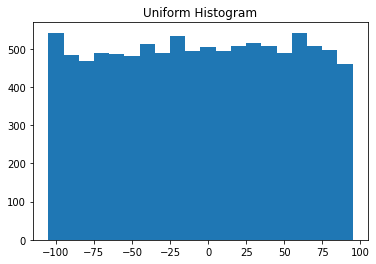

In [ ]:
plot_histogram(uniform, 10, "Uniform Histogram")

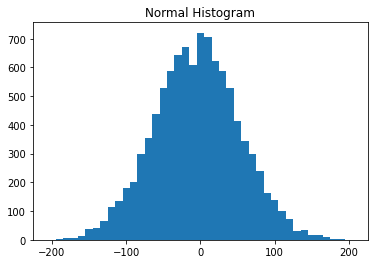

In [ ]:
plot_histogram(normal, 10, "Normal Histogram")

**Two Dimensions**

a dataset with **two dimensions.**

In [ ]:
def random_normal() -> float:
  """Returs a random draw from a standard normal distribution"""
  return inverse_normal_cdf(random.random())

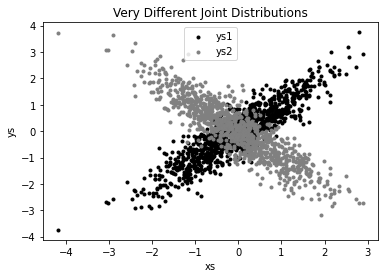

In [ ]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')  # positive correlation; x:positive, y:positve
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')  # negative correlation; x:positive, y:negative
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [ ]:
from scipy import stats

def correlation(X, y):
  cor, _ = stats.pearsonr(X, y)
  return cor

print(correlation(xs, ys1))  # about 0.9
print(correlation(xs, ys2))  # about -0.9

0.9010493686379651
-0.8920981526879997


**Many Diemsions**

With many diemsions, you'd like to know how all the dimensions relate to one another. A simple approach is to look at the **correlation matrix**, in which the entry in row i and column j is the correlation between the ith dimension and the jth dimension of the data

In [ ]:
from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
  """
  Returns the len(data) x len(data) matrix whose (i, j)-th entry
  is the correlation between data[i] and data[j]
  """
  def correlation_ij(i: int, j: int) -> float:
    return correlation(data[i], data[j])

  return make_matrix(len(data), len(data), correlation_ij)

In [ ]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

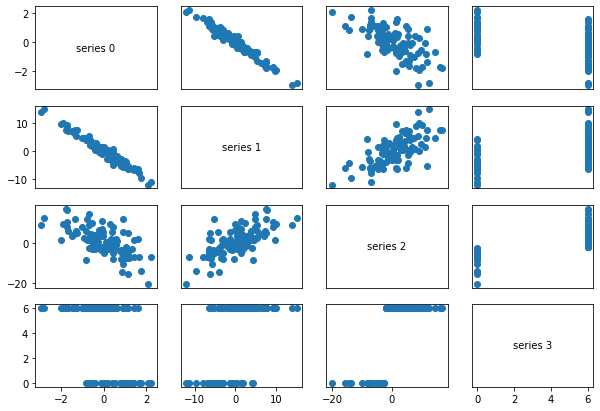

In [ ]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors, figsize=(10, 7))

for i in range(num_vectors):
  for j in range(num_vectors):

    # Scatter column_j on the x-axis vs. column_i on the y-axis
    if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

    # unless i == j, in which case show the series name
    else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                            xycoords='axes fraction',
                            ha="center", va="center")
    
    # Then hide axis labels except left and bottom charts
    if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
    if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

## **Using NamedTuples**

One common way of representing data is using dicts:

In [ ]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

There are several reasons why this is less than ideal, however. This is a slightly **inefficient representation** (a dict involves some overhead), so that if you have a lot of stock prices they'll take up more memory than they have to. For the most part, this is a minor consideration.

A larger issue is that accessing things by dict key is error-prone. The following code will run without error and just do the wrong thing:

In [ ]:
# oops, typo
stock_price['cosing_price'] = 103.06

In [ ]:
prices: Dict[datetime.date, float] = {}

there's no helpful way to annotate dictionaries-as-data that have lots of different value types. So we also lose the power of type hints.

As an alternative, Python includes a namedtuple class, which is like a tuple but with named slots:

In [ ]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

Like regular **tuples, namedtuples** are immutable, which means that you **can't modify their values once they're created**.

In [ ]:
from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    """It's a class, so we can add methods too"""
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)


assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

## **Dataclasses**

Dataclasses are (sort of) a **mutable version of `NamedTuple`.**("sort of" because `NamedTuples` represent their data compactly as tuples, whereas **dataclasses are regular Python classes** that simpy generate some methods for you automatically.)

In [ ]:
# The syntax is very similar to `NamedTuple`. 
# But instead of inheriting from a base class, we use a decorator:

from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    """It's a class, so we can add methods too"""
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

In [ ]:
# stock split
price2.closing_price /= 2                            # !not really safe this way
assert price2.closing_price == 53.015                # AttributeError

In [ ]:
# It's a regular class, so add new fields however you like!
price2.cosing_price = 75                               # oops

## **Cleaning and Munging**

We'll have to do some work on data before we use it. such as we have to **convert** strings to floats or ints before we can use them. We have to **check for missing values and outliers** and bad data.

In [ ]:
from typing import List
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
  symbol, date, closing_price = row
  return StockPrice(symbol=symbol,
                    date=parse(date).date(),
                    closing_price=float(closing_price))
  

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [ ]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
  symbol, date_, closing_price_ = row

  # Stock symbol should be all capital letters
  if not re.match(r"^[A-Z]+$", symbol):                # Start with capital letter more than one 
    return None

  try:
    date = parse(date_).date()
  except ValueError:
    return None

  try:
    closing_price = float(closing_price_)
  except ValueError:
    return None

  return StockPrice(symbol, date, closing_price) 

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None   # stock symbolend with int 
assert try_parse_row(["MSFT",  "2018-12--14", "106.03"]) is None  # date not in the right form
assert try_parse_row(["MSFT",  "2018-12-14", "x"]) is None        # clsing price is char

# But should return same as before if data is good
assert try_parse_row(["MSFT", "2018-12-14", "106.03"])  == stock

In [ ]:
from pathlib import Path

file_name = Path("comma_delimited_stock_prices.csv")

if not file_name.is_file():
  with open(file_name, "w") as f:
    f.write("""AAPL,6/20/2014,90.91
MSFT,6/20/2014,41.68
FB,6/20/3014,64.5
AAPL,6/19/2014,91.86
MSFT,6/19/2014,n/a
FB,6/19/2014,64.34""")

In [ ]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
  reader = csv.reader(f)
  for row in reader:
    maybe_stock = try_parse_row(row)
    if maybe_stock is None:
      print(f"skipping invalid row: {row}")
    else:
      data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [ ]:
data

[StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
 StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
 StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5),
 StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
 StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)]

A good next step is to check the outliers, using techniques from "Exploring Your Data" or by ad hoc investigating.

## **Manipulating Data**

In [ ]:
data = [
    StockPrice(symbol='MSFT',
               date=datetime.date(2018, 12, 24),
               closing_price=106.03),
    # ...
]

In [ ]:
data

[StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 24), closing_price=106.03)]

In [ ]:
max_aapl_price = max(stock_price.closing_price
                    for stock_price in data
                    if stock_price.symbol == "MSFT")


We might want to know the highest-ever closing price for each stock in our dataset. One way to do this is

1. Create a dict to keep track of highest prices (we'll use a `defaultdict` that returns minus infinity for missing values, since any price will be greater than that).
2. Iterate over our data, updating it.

In [ ]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
  symbol, closing_price = sp.symbol, sp.closing_price
  if closing_price > max_prices[symbol]:
    max_prices[symbol] = closing_price

max_prices

defaultdict(<function __main__.<lambda>()>, {'MSFT': 106.03})

Find what are The largest and smallest one-day percent changes in our dataset. The percent change is price_today / price_yesterday - 1, which means we need some way of associating today's price and yesterday's price.

One approach is to group the prices by symbol, and then, within each group:

1. Order the prices by date.
2. Use zip to get (previous, current) pairs
3. Turn the pairs into new "percent change" rows.

In [ ]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
  prices[sp.symbol].append(sp)

In [ ]:
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

prices

{'MSFT': [StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 24), closing_price=106.03)]}

In [ ]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
  return today.closing_price / yesterday.closing_price - 1


class DailyChange(NamedTuple):
  symbol: str
  date: datetime.date
  pct_change: float


def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
  """
  Assumes prices are for one stock and are in order
  """
  return [DailyChange(symbol=today.symbol,
                       date=today.date,
                       pct_change=pct_change(yesterday, today))
          for yesterday, today in zip(prices, prices[1:])]    

In [ ]:
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

all_changes

[]

In [ ]:
# max_change = max(all_changes, key=lambda change: change.pct_change)

In [ ]:
# min_change = min(all_changes, key=lambda change: change.pct_change)

In [ ]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}  # 12 months

for change in all_changes:
  changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) # / len(changes)   # the other lists doesn't have data
    for month, changes in changes_by_month.items()
} 

# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

In [ ]:
avg_daily_change

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

## **Rescaling**

Many techniques are sensitive to the scale of your data. 

For example:

the heighs and weights of hundreads of data scientists, and that you are trying to identify clusters of body sizes.

We'd like clusters to represent points near each other, which means that we need some notion of distance between points. 

<table>
  <tr>
    <th colspan="4"><h4>Heights and Weights</h4><th>
  </tr>
  <tr>
    <th>Person</th>
    <th>Height(inches)</th>
    <th>Height(centimeters)</th>
    <th>Weight(pounds)</th>
  </tr>
  <tr>
    <td>A</td>
    <td>63</td>
    <td>160</td>
    <td>150</td>
  </tr>
  <tr>
    <td>B</td>
    <td>67</td>
    <td>170.2</td>
    <td>160</td>
  </tr>
  <tr>
    <td>C</td>
    <td>70</td>
    <td>177.8</td>
    <td>171</td>
  </tr>
</table>

In [ ]:
from scratch.linear_algebra import distance

# Height(inches) and Weight(pounds)
a_to_b = distance([63, 150], [67, 160])
a_to_c = distance([63, 150], [70, 171])
b_to_c = distance([67, 160], [70, 171])

print(f"distance from a_to_b {a_to_b:.2f}")
print(f"distance from a_to_c {a_to_c:.2f}")
print(f"distance from b_to_c {b_to_c:.2f}")

distance from a_to_b 10.77
distance from a_to_c 22.14
distance from b_to_c 11.40


In [ ]:
# Height(cm) and Weight(pounds)
a_to_b = distance([160, 150], [170.2, 160])
a_to_c = distance([160, 150], [177.8, 171])
b_to_c = distance([170.2, 160], [177.8, 171])

print(f"distance from a_to_b {a_to_b:.2f}")
print(f"distance from a_to_c {a_to_c:.2f}")
print(f"distance from b_to_c {b_to_c:.2f}")

distance from a_to_b 14.28
distance from a_to_c 27.53
distance from b_to_c 13.37


When **dimension aren't comparable with one another**, we will sometimes **rescale our data** so that each dimension has **mean 0 and standard deviation 1.** This effcetively gets rid of the units, coverting each dimension to **"standard deviations from the mean."**

In [ ]:
from typing import Tuple, List
from scratch.linear_algebra import vector_mean
from scipy import stats

Vector = List[float]

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
  """returns the mean and standard deviation for each position"""
  dim = len(data[0])

  means = vector_mean(data)
  stdevs = [stats.tstd([vector[i] for vector in data])
            for i in range(dim)]

  return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [ ]:
means, stdevs

([-1.0, 0.0, 1.0], [2.0, 1.0, 0.0])

In [ ]:
def rescale(data: List[Vector]) -> List[Vector]:
  """
  Rescales the input data so that each position has
  mean 0 and standard deviation 1. (Leaves a position
  as is if its standard deviation is 0.)
  """
  dim = len(data[0])
  means, stdevs = scale(data)

  # Make a copy of each vector
  rescaled = [v[:] for v in data]

  for v in rescaled:
    for i in range(dim):
      if stdevs[i] > 0:
        v[i] = (v[i] - means[i]) / stdevs[i]

  return rescaled

In [ ]:
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [ ]:
means, stdevs

([0.0, 0.0, 1.0], [1.0, 1.0, 0.0])

## **An Aside: tqdm**

tqdm library generates custom progress bars.

In [ ]:
import tqdm
import random

for i in tqdm.tqdm(range(100)):
  # do something slow
  _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:18<00:00,  5.34it/s]


In [ ]:
from typing import List

def primes_up_to(n: int) -> List[int]:
  primes = [2]                                 # 2 is only a prime number that is even

  with tqdm.trange(3, n) as t:
    for i in t:
      # i is prime if no smaller primes divides it
      i_is_prime = not any(i % p == 0 for p in primes)
      if i_is_prime:
        primes.append(i)

      t.set_description(f"{len(primes)} primes")
  
  return primes

In [ ]:
my_primes = primes_up_to(100_000)

9592 primes: 100%|██████████| 99997/99997 [04:14<00:00, 392.88it/s]


## **Dimensionality Reduction**

we can use a technique called principal componenet analysis (PCA) to extract one or more dimensions that capture as much as the variation in the data as possible.

In [ ]:
from scratch.linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
  """Recenters the data to have mean 0 in every dimension"""
  mean = vector_mean(data)
  return [subtract(vector, mean) for vector in data]

In [ ]:
from scratch.linear_algebra import magnitude

def direction(w: Vector) -> Vector:
  mag = magnitude(w)
  return [w_i / mag for w_i in w]

In [ ]:
from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
  """
  Returns the variance of x in the direction of w
  """
  w_dir = direction(w)
  return sum(dot(v, w_dir) ** 2 for v in data)

In [ ]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
  """
  The gradient of directional variance with respect to w
  """
  w_dir = direction(w)
  return [sum(2 * dot(v, w_dir) * v[i] for v in data)
          for i in range(len(w))]

In [ ]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [ ]:
def first_principal_component(data: List[Vector],
                              n: int=100,
                              step_size: float = 0.1) -> Vector:
  # Start with a random quess
  guess = [1.0 for _ in data[0]]

  with tqdm.trange(n) as t:
    for _ in t:
      dv = directional_variance(data, guess)
      gradient = directional_variance_gradient(data, guess)
      guess = gradient_step(guess, gradient, step_size)
      t.set_description(f"dv: {dv:.3f}")

  return direction(guess)

In [ ]:
from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
  """return the projection of v onto the direction w"""
  projection_length = dot(v, w)
  return scalar_multiply(projection_length, w)

In [ ]:
from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
  """projects v onto w and subtracts the result from v"""
  return subtract(v, project(v, w))


def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
  return [remove_projection_from_vector(v, w) for v in data]

In [ ]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
  components: List[Vector] = []
  for _ in range(num_components):
    component = first_principal_component(data)
    components.append(component)
    data = remove_projection(data, component)
  return components

In [ ]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
  return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
  return [transform_vector(v, components) for v in data]

This technique in valuable for a couple of reasons. 

* First, it can help us clean our data by eliminating noise dimensions and consolidating highly correlated dimensions.
* Second, after extracting a low-dimensional representation of our data, we can use a variety of techniques that don't work as well on high-dimensional data. 

# <center><b>Chapter 11. Machine Learning</b></center>

Data science is mostly 

turning business **problems into data problems**

and **collecting data** and understanding data

and **cleaning data** 

after which **machine learning** is almost an afterthought.
 

## **Modeling**

A model is simply **a specification of a mathematical (or probabilistic) relationship** that exists between different variables.

The business model is probably based on simple mathematical relationships.

## **What is Machine Learning?**

We'll use machine learning to refer to **creating and using models that are learned from data.**

In other contexts this might be called predictive modeling or data mining.

Typically, our goal will be to use existing data to develop models that we can use to predict various outcomes for new data, such as:

* Whether an email message is spam or not
* whether a credit card transaction is fraudulent
* Which advertisement a shopper is most likely to click on 
* Which football team is going to win the Super Bowl

We'll look at both 
* **supervised models** (in which there is a set of data labeled with the correct answers to learn from) 
* **unsupervised models** (in which there are no such lables).

there are various other types, like
* semisupervised (in which only some of the data are labeled)
* online (in which the model needs to continuously adjust ot newly arriving data)
* reinforcement (in which, after making a series of predictions, the model gets a signal indicating how well it did) 

Now, in even the simplest situation there are entire universes of **models that might describe the relationship we're interested in.** In most cases we will ourselves **choose a parameterized family of models and then use data to learn parameters** that are in some way optimal 

## **Overfitting and Underfitting**

a common danger in machine learning is **overfitting** -producing a model that **performs well on the data you train** it on but **generalizes poorly to any new data**.  This could involve learning noise in the data. Or it could involve learning to identify specific inputs rather than whatever factors are actually predictive for the desired output.

The other side of this is **underfitting** -producing a model that **doesn't perform well even on the training data**, although typically when this happens you decide your model isn't good enough and keep looking for a better one.

In [ ]:
import random
from typing import TypeVar, List, Tuple

X = TypeVar('X') # generaic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
  """Split data into fractions [prob, 1 - prob]"""
  data = data[:]                  # Make a shallow copy
  random.shuffle(data)            # because shuffle modifies the list.
  cut = int(len(data) * prob)     # Use prob to find a cutoff
  return data[:cut], data[cut:]   # and split the shuffled list there.

data = [n for n in range(1000)]
train, test = split_data(data, 0.75)

# The proportions should be correct
assert len(train) == 750
assert len(test)  == 250

# And the original data should be preserved (in some order)
assert sorted(train + test) == data

In [ ]:
train[:5], test[:5]

([90, 55, 420, 677, 801], [888, 534, 777, 11, 255])

In [ ]:
Y = TypeVar('Y') # generic type to represent output variables

def train_test_split(xs: List[X],
                     ys: List[Y],
                     test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:

  # Generate the indices and split them
  idxs = [i for i in range(len(xs))]
  train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

  return ([xs[i] for i in train_idxs], # x_train
          [xs[i] for i in test_idxs],  # x_test
          [ys[i] for i in train_idxs], # y_train
          [ys[i] for i in test_idxs])  # y_test                  

In [ ]:
xs = [x for x in range(1000)]    # xs are 1 ... 1000
ys = [2 * x for x in xs]         # each y_i is twice x_i
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

# Check that the proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

# Check that the corresponding data points are paired correctly
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))

In [ ]:
xs[:5], ys[:5]

([0, 1, 2, 3, 4], [0, 2, 4, 6, 8])

In [ ]:
# model = SomeKindOfModel()
# x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
# model.train(x_train, y_train)
# Performance = model.test(x_test, y_test)

If the model was overfit to the training data, then 
it will hopefully perform really poorly on the (completely separate) test data. Said differently, if it performs well on the test data, then you can be more confident that it's fitting rather than overfitting.

There are a couple of ways this can **go wrong**.

The first is if there are common patterns in the test and training data that wouldn't generalize to a larger dataset.

* models might **learn to identify users** rather than discover relationship involving attributes.

* "choosing a model that performs **best on the test set**" is a meta training that makes **the test set function as a second training set**.

In such a situation, you should split the data into three parts:
* a training set for building models
* a validation set for choosing among trained models
* a test set for judging the final model

## **Correctness**

Imagine buiding a model to make a binary judgment. Is the email spam?

Given a set of labeled data and such a predictive model, every data point lies in one of four categories:


* **True positive**
  - "This message is spam, and we correctly predict spam.:
* **False positive (type 1 error)**
  - "This message is not spam, but we predicted spam."
* **False negative (Type 2 error)**
  - "This message is spam, but we predicted not spam."
* **True negative:**
  - "This message is not spam, and  we correctly predicted not spam."

<table>
  <tr>
    <th></th>
    <th>Spam</th>
    <th>Not spam</th>
  </tr>
  <tr>
    <th>Predict "spam"</th>
    <td>True positive</td>
    <td>False positve</td>
  </tr>
  <tr>
    <th>Predict "not spam"</th>
    <td>False negative</td>
    <td>True negative</td>
  </tr>
</tabel>  

5 babies out of 1,000 are named Luke. And the life time prevalence of leukemia is about 1.4% or 14 out of every 1,000 people.

If we believe these two factors are independent and apply my "Luke is for leukemia" test to 1 million people, we'd expect to see a confusion matrix like:

<table>
  <tr>
    <th></th>
    <th>Leukemia</th>
    <th>No leukema</th>
    <th>Total</th>
  </tr>
  <tr>
    <th>"Luke"</th>
    <td>70</td>
    <td>4,930</td>
    <td>5,000</td>
  </tr>
  <tr>
    <th>Not "Luke"</th>
    <td>1,3930</td>
    <td>981,070</td>
    <td>995,000</td>
  </tr>
  <tr>
    <th>Total</th>
    <td>14,000</td>
    <td>986,000</td>
    <td>1,000,000</td>
  </tr>
</tabel>  

In [ ]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
  correct = tp + tn
  total = tp + fp + fn + tn
  return correct / total

assert accuracy(70, 4930, 13930, 981070)

It's common to look at the combination of precision and recall. 

In [ ]:
# Precision measure how accurate our positive predictions were

def precision(tp: int, fp: int, fn: int, tn: int) -> float:
  return tp / (tp + fp)

assert precision(70, 4930, 13930, 981070)  == 0.014

In [ ]:
# Recall measure what fracton of the positives our model identified:

def recall(tp: int, fp: int, fn: int, tn: int) -> float:
  return tp / (tp + fn)

assert recall(70, 4930, 13930, 981070)  == 0.005

In [ ]:
# F1 score are the combination of precisonand recall

def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  
  return 2 * p * r / (p + r)

This is the **harmonic mean** of precision and recall and necessarily lies between them.

Usually the choice of a model involves a tradeoff between precision and recall. 

A model that predicts "yes" **when it's even a little bit confident** will probably have a high recall but a low precision

A model that predicts "yes" only **when it's extremely confident** is likely to have a low recall and a high precision.

## **The Bias-Variance Tradeoff**

Another way of thinking about the overfitting is as a tradeoff between **bias and variance**.

Both are measures of what would happen if you were to **retrain your model many times on different sets of training data** (from the same larger population).

If your model has high variance, you can similarly **remove features**. But another solution is to **obtain more data**(if you can).



## **Feature Extraction and Selection**

when your data **doens't have enough features**, your model is likely to **underfit**. 

And when your data has **too many features**, it's **easy to overfit**.

Features are whatever inputs we provide to our model



we'll instead look for ways to remove features

For example, you inputs might be vectors of several hundread numbers. Depending on the situation, it might be appropriate to distill these down to a handful of important dimensitons (as in "Dimensionality Reduction") and use only that small number of features. Or it might be appropriate to use a technique (like regularization, which we'll look at in "regularization") that penalizes models the more features they use.

How do we choose features?

that's where a **combination of experience and domain expertise** comes into play.

# <center><b>Chapter 12. k-Nearest</b></center>

## **The Model**

Nearest neighbors is one of the **simplest predictive models** there is. It makes no mathematical assumptions, and it doesn't require any sort of heavy machinery. The only things it requires are:

* Some noting of **distance**
* An assumption that **points that are close to one another** are similar

* neglects a lot of information
* not going to help understand the drivers of whatever phenomenon

In [ ]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
  votes = Counter(labels)
  winner, _ = votes.most_common(1)[0]
  return winner

assert raw_majority_vote(['a', 'b', 'c','b']) == 'b'

when we have ties.
* Pick one of the winners at random.
* Weight the votes by distance and pick the weighted winner.
* Reduce k until we find a unique winner

In [ ]:
def majority_vote(labels: List[str]) -> str:
  """Assumes that labels are ordered from nearest to farthest"""
  vote_counts  = Counter(labels)
  winner, winner_count = vote_counts.most_common(1)[0]
  num_winners = len([count
                     for count in vote_counts.values()
                     if count == winner_count])
  
  if num_winners == 1:
    return winner                       # unique winner, so return it
  else:
    return majority_vote(labels[:-1])   # try again without the farthest


# Tie, so look at first 4, then 'b'
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

This approach is sure to work eventually, since in the worst case we go all the way down to just one label, at which point that one label wins.

In [ ]:
from typing import NamedTuple
from scratch.linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
  point: Vector
  label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:
  # Order the labeled points from nearest to farthest.
  by_distance = sorted(labeled_points,
                       key=lambda lp: distance(lp.point, new_point))
  
  # Find the labels for the k closest
  k_nearest_labels = [lp.label for lp in by_distance[:k]]

  # and let them vote.
  return majority_vote(k_nearest_labels)

## **Example: The Iris Dataset**

In [ ]:
import requests

data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open('iris.dat', 'w') as f:
  f.write(data.text)                                # extra two white lines

In [ ]:
from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
  """
  sepal_length, sepal_width, petal_length, petal_width, class
  """
  measurements = [float(value) for value in row[:-1]]
  # class is e.g. "Iris-virginica"; we just want "virginica"
  label = row[-1].split("-")[-1]
  
  return LabeledPoint(measurements, label)

In [ ]:
with open('iris.dat') as f:
  reader = csv.reader(f)
  iris_data = [parse_iris_row(row) for row in reader]   # two white lines makes error

In [ ]:
# We'll also group just he point by species/label so we can plot them
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
  points_by_species[iris.label].append(iris.point)

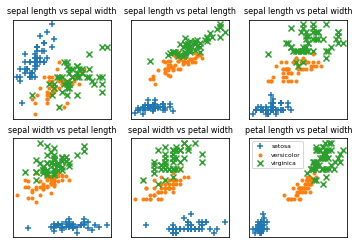

In [ ]:
from matplotlib import pyplot as plt

metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x'] # we have 3 classes, so 3 markers

fig, ax = plt.subplots(2, 3)

for row in range(2):
  for col in range(3):
    i, j = pairs[3 * row + col]
    ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
    ax[row][col].set_xticks([])
    ax[row][col].set_yticks([])

    for mark, (species, points) in zip(marks, points_by_species.items()):
      xs = [point[i] for point in points]
      ys = [point[j] for point in points]
      ax[row][col].scatter(xs, ys, marker=mark, label=species)

ax[-1][-1].legend(loc='best', prop={'size': 6})
plt.show();

In [ ]:
import random 
from scratch.machine_learning import split_data

random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)

assert len(iris_train) == 0.7 * 150
assert len(iris_test) == 0.3 * 150

In [ ]:
from typing import Tuple

# track how many times we see (predicted, actual)
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

for iris in iris_test:
  predicted = knn_classify(5, iris_train, iris.point)
  actual = iris.label

  if predicted == actual:
    num_correct += 1

  confusion_matrix[(predicted, actual)] += 1

pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)

0.9777777777777777 defaultdict(<class 'int'>, {('setosa', 'setosa'): 13, ('versicolor', 'versicolor'): 15, ('virginica', 'virginica'): 16, ('virginica', 'versicolor'): 1})


## **The Curse of Dimensionality**

The k-nearest neighbors algorithm runs into trouble in higher dimensions thaks to the "curse of **dimensionality**," which boils down to the fact that high-dimensional spaces are vast. Points in high-dimensional spaces tend not to be close to one another at all. One way to see this is by randomly generating pairs of points in the d-dimensional "unit cube" in a variety of dimensions, and calculating the distances between them.

In [ ]:
def random_point(dim: int) -> Vector:
  return [random.random() for _ in range(dim)]

In [ ]:
def random_distances(dim: int, num_pairs: int) -> List[float]:
  return [distance(random_point(dim), random_point(dim))
          for _ in range(num_pairs)]

In [ ]:
import tqdm

dimensions = range(1, 101)

avg_distances = []
min_distances = []

random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
  distances = random_distances(dim, 10000)           # 10,000 random pairs
  avg_distances.append(sum(distances) / 10000)        # track the average
  min_distances.append(min(distances))               # track the mininum


Curse of Dimensionality: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s]


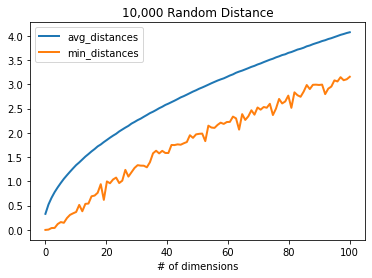

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 100, 100)

plt.plot(x, avg_distances, linewidth=2.0, label='avg_distances')
plt.plot(x, min_distances, linewidth=2.0, label='min_distances')

plt.legend(loc='best')
plt.title('10,000 Random Distance')
plt.xlabel('# of dimensions')

plt.show()

In [ ]:
min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

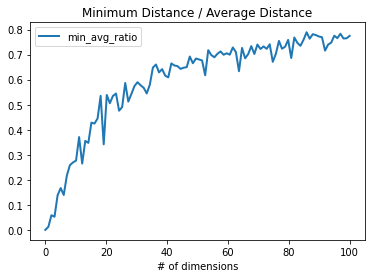

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 100, 100)

plt.plot(x, min_avg_ratio, linewidth=2.0, label='min_avg_ratio')

plt.legend(loc='best')
plt.title('Minimum Distance / Average Distance')
plt.xlabel('# of dimensions')

plt.show()

# <center><b>Chapter 13. Naive Bayes</b></center>

## **A Really Dumb Spam Filter**


* **S** be the event "the message is spam" 
* **B** be the event "the message is contains the word bitcoin.
* Bayes's theorem tells us that the probability that the message is spam conditional on containing the word bitcoin

$$P\left(\frac{S}{B}\right)\:=\:\frac{\left[P\left(\frac{B}{S}\right)P\left(S\right)\right]}{\left[P\left(\frac{B}{S}\right)P\left(S\right)\:+\:P\left(\frac{B}{\neg \:S}\right)P\left(\neg \:S\right)\right]}$$

The **numerator** is the probability that a message is **spam and contains bitcoin**
The **denominator** is just the probability that a **message contains bitcoin**.

If we have a large collection of messages we know are spam, and a large collection of messages we know are not spam, then we can easily estimate P(B|S) and P(B|¬S). If we further assume that any message is **equally likely to be spam or not spam** (so that P(S) = P(¬S) =0.5), then:


$$P\left(\frac{S}{B}\right)\:=\:\frac{P\left(\frac{B}{S}\right)}{P\left(\frac{B}{S}\right)+\:P\left(\frac{B}{\neg \:S}\right)}$$

For example, if 50% of spam messages have the word bitcoin, but only 1% of nonspam messages do, then the probability that any given bitcoin-containing email is spam is 

$$\frac{0.5}{0.5+\:0.01}\:=\:98\%$$



## **A More Sophisticated Spam Filter**

X<sub>i</sub> a message contains the word W<sub>i</sub>

P(X<sub>i</sub>|S) the probability that a spam message contains the *i*th word

P(X<sub>i</sub>|¬S)  the probability that a nonspam message contains the *i*th word

The key to Naive Bayes is making the (big) assumption that the presences (or absences) of **each word are independent of one another**, conditional on a message being spam or not. Intuitively, this assumption means that knowing whether a certain spam message contains the word bitcoin gives you no information about whether that same message contains the word rolex. In math terms, this means that:

$$P\:\left(X1\:=\:x1,\:.\:.\:.\:,\:Xn\:=\:xn|S\right)\:=\:P\:\left(X1\:=\:x1|S\right)\:×\:⋯\:×\:P\:\left(Xn\:=\:xn|S\right)$$

This is an extreme assumption. (There's a reason the technique has naive in its name.) Imagine that our vocabulary consists only of the words bitcoin and rolex, and that half of all spam messages are for "earn bitcoin" and that the other half are for "authentic rolex." In this case, the Naive Bayes estimate that a spam message contains both bitcoin and rolex is:

$$P\:\left(X1\:=\:1,\:X2\:=\:1|S\right)\:=\:P\:\left(X1\:=\:1|S\right)\:P\:\left(X2\:=\:1|S\right)\:=.\:5×.\:5\:=.\:25$$

Since we've assumed away the knowledge the bitcoin and rolex actually never occur together. Despite the unrealisticness of this assumption, this model often performs well and has historically been used in actual spam filters.

The same Bayes's theorem reasoning we used for our "bitcoin-only" spam filter tells us that we can calculate the probability a message is spam using the equation:

$$P\left(S|X\:=\:x\right)\:=\:P\left(X\:=\:x|S\right)/\left[P\left(X\:=\:x|S\right)\:+\:P\left(X\:=\:x|\neg S\right)\right]$$

The Naive Bayes assumption allows us to compute each of the probabilities on the right simply by multiply togehter the individual probability estimates for each vocabulary word.


In practice, you usually want to **avoid multiplying lots of probabilities together**, to prevent a problem called **underflow**, in which computers don't deal well with floating-point numbers that are too close to 0. recalling from algebra that log(ab) = log a + log b and that exp(log x) = x, we usually compute p<sub>1</sub> \* ... \* p<sub>n</sub> as the equivalent (but floating-point-friendlier):

$$exp\left(log\:\left(p1\right)\:+\:⋯\:+\:log\:\left(pn\right)\right)$$


The only challenge left is coming up with extimates for P(X<sub>i</sub>|S) and P(X<sub>i</sub>|¬S), the probabilities that a spam message (or nonspam message) contains the word w<sub>i</sub>. If we have a fair number of "training" messages labeled as spam and not spam, and obvious first try is to estimate P(X<sub>i</sub>|S) simply as the fraction of spam messages containing the word w<sub>i</sub>.

This cause a big problem, though. Imagine that in our training set the vocabulary word data only occurs in nonspam messages. Then we'd estimate P(data|S) = 0. The result is that our Naive Bayes classifier would always assign spam probabily 0 to any message containing the word data, even a message like "data on free bitcoin and authentic rolex watches." To avoid this problem, we usually use some kind of smoothing.

In particular, we'll choose a pseudocount -k- and estimate the probability of seeing the *i*th word in a spam message as:

$$P\:\left(X_i|S\right)\:=\:\frac{\left(k\:+\:number\:of\:spams\:containing\:w_i\right)}{\left(2k\:+\:number\:of\:spams\right)}$$

We do similarly for P(X<sub>i</sub>|¬S). This is, when computing the spam probabilities for *i*th word, we assume we also saw k additional nonspams containing the word and k additional nonspams not containing the word.

For example, if data occurs in 0/98 spam messags, and if k is 1, we estimate P(data|S) as 1/100 = 0.01, which allows our classifier to still assign some nonzero spam probability to messages that contain the word data.

## **Implementation**

In [ ]:
from typing import Set
import re

def tokenize(text: str) -> Set[str]:         
  text = text.lower()                               # Convert to lowercase,
  all_words = re.findall("[a-z0-9']+", text)        # extract the words, and
  return set(all_words)                             # remvoe duplicates.

assert tokenize("Data Science is science") == {"data", "science", "is"} 

In [ ]:
from typing import NamedTuple

class Message(NamedTuple):
  text: str
  is_spam: bool

In [ ]:
from typing import List, Tuple, Dict, Iterable
import math
from collections import defaultdict

class NaiveBayesClassifier:
  def __init__(self, k:float = 0.5) -> None:
    self.k = k                               # smoothing factor

    self.tokens: Set[str]  = set()
    self.token_spam_counts: Dict[str, int] = defaultdict(int)
    self.token_ham_counts: Dict[str, int] = defaultdict(int)
    self.spam_messages = self.ham_messages = 0
  

  def train(self, messages: Iterable[Message]) -> None:
    for message in messages:
      # Increment message counts
      if message.is_spam:
        self.spam_messages += 1
      else:
        self.ham_messages += 1

      # Increment word counts
      for token in tokenize(message.text):
        self.tokens.add(token)
        if message.is_spam:
          self.token_spam_counts[token] += 1
        else:
          self.token_ham_counts[token] += 1


  def _probabilities(self, token: str) -> Tuple[float, float]:
    """return P(token | spam) and P(token | ham)"""
    spam = self.token_spam_counts[token]
    ham = self.token_ham_counts[token]

    p_token_spam = (spam + self.k) / (self.spam_messages + 2 * self.k)
    p_token_ham = (ham + self.k) / (self.ham_messages + 2 * self.k)

    return p_token_spam, p_token_ham


  def predict(self, text: str) -> float:
    text_tokens = tokenize(text)
    log_prob_if_spam = log_prob_if_ham = 0.0

    # Iterate through each word in our vocabulary 
    for token in self.tokens:
      prob_if_spam, prob_if_ham = self._probabilities(token)

      # If *token* appears in the message,
      # add the log probability of seeing it
      if token in text_tokens:
        log_prob_if_spam += math.log(prob_if_spam)
        log_prob_if_ham += math.log(prob_if_ham)
      
      # Otherwise add the log probability of _not_ seeing it,
      # which is log(1 - probability of seeing it)
      else:
        log_prob_if_spam += math.log(1.0 - prob_if_spam)
        log_prob_if_ham += math.log(1.0 - prob_if_ham)

    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_ham = math.exp(log_prob_if_ham)
    return prob_if_spam / (prob_if_spam + prob_if_ham)

## **Testing Our Model**

In [ ]:
messages = [Message("spam rules", is_spam=True),
           Message("ham rules", is_spam=False),
           Message("hello ham", is_spam=False)]

model = NaiveBayesClassifier(k=0.5)
model.train(messages)

assert model.tokens == {"spam", "ham", "rules", "hello"}
assert model.spam_messages == 1
assert model.ham_messages == 2
assert model.token_spam_counts == {"spam": 1, "rules": 1}
assert model.token_ham_counts == {"ham": 2, "rules": 1, "hello": 1}

In [ ]:
text = "hello spam"

probs_if_spam = [
    (1 + 0.5) / (1 + 2 * 0.5),                   # "spam"  (present)
     1 - (0 + 0.5) / (1 + 2 * 0.5),              # "ham"   (not present)
     1 - (1 + 0.5) / (1 + 2 * 0.5),              # "rules" (not present)
     (0 + 0.5) / (1 + 2 * 0.5)                   # "hello" (present)
]

probs_if_ham = [
    (0 + 0.5) / (2 + 2 * 0.5),                   # "spam"  (present)
    1 - (2 + 0.5) / (2 + 2 * 0.5),               # "ham"   (not present)
    1 - (1 + 0.5) / (2 + 2 * 0.5),               # "rules" (not present)
    (1 + 0.5) / (2 + 2 * 0.5),                   # "hello" (present)
]

p_if_spam = math.exp(sum(math.log(p) for p in probs_if_spam))
p_if_ham = math.exp(sum(math.log(p) for p in probs_if_ham))

# should be about 0.83
assert model.predict(text) == p_if_spam / (p_if_spam + p_if_ham)

## **Using Our Model**

In [ ]:
from io import BytesIO                # So we can treat bytes as a file. 
import requests                       # To download the files, which
import tarfile                        #  are in .tar.bz format.

BASE_URL = "https://spamassassin.apache.org/old/publiccorpus"
FILES = ["20021010_easy_ham.tar.bz2",
         "20021010_hard_ham.tar.bz2",
         "20021010_spam.tar.bz2"]

# This is where the data will end up,
# in /spam, /easy_ham, and /hard_ham subdirectories.
# Change this to where you want the data.
OUTPUT_DIR = 'spam_data'

for filename in FILES:
  # Use requests to get the file contents and each URL.
  content = requests.get(f"{BASE_URL}/{filename}").content

  # Wrap the in-memory bytes so we can use them as a "file."
  fin = BytesIO(content)

  # And extract all the files to the specified output dir.
  with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
    tf.extractall(OUTPUT_DIR)

In [ ]:
import glob, re

# modify the path to wherever you've put the files
path = 'spam_data/*/*'

data: List[Message] = []

# glob.glob returns every filename that matches  the wildcarded path
for filename in glob.glob(path):
  is_spam = "ham" not in filename

  # There are some garbage characters in the emails; the errors='ignore'
  # skips them instead of raising an exception.
  with open(filename, errors='ignore') as email_file:
    for line in email_file:
      if line.startswith("Subject:"):
        subject = line.lstrip("Subject: ")
        data.append(Message(subject, is_spam))
        break # done with this file

In [ ]:
import random
from scratch.machine_learning import split_data

random.seed(0)                          # just so you get the same answers as me
train_messages, test_messages = split_data(data, 0.75)

model = NaiveBayesClassifier()
model.train(train_messages)

In [ ]:
from collections import Counter

predictions = [(message, model.predict(message.text))
              for message in test_messages]

# Assume that spam_probability > 0.5 corresponds to spam prediction
# and count the combinations of (actual is_spam, predicted is_spam)
confusion_matrix = Counter((message.is_spam, spam_probability > 0.5)
                            for message, spam_probability in predictions)

print(confusion_matrix)

Counter({(False, False): 673, (True, True): 83, (True, False): 46, (False, True): 23})


In [ ]:
def p_spam_given_token(token: str, model: NaiveBayesClassifier) -> float:
  # We probably shouldn't call private methods, but it's for a good cause.
  prob_if_spam, prob_if_ham = model._probabilities(token) 

  return prob_if_spam / (prob_if_spam + prob_if_ham)

words = sorted(model.tokens, key=lambda t: p_spam_given_token(t, model))

print("spammiest_words", words[-10:])
print("hammiest_words", words[:10])

spammiest_words ['attn', 'account', 'year', 'per', 'sale', 'zzzz', 'systemworks', 'money', 'rates', 'adv']
hammiest_words ['spambayes', 'users', 'sadev', 'razor', 'zzzzteana', 'ouch', 'apt', 'bliss', 'selling', 'wedded']


There are a number of ways to improve the model:

* Look at the message content, not just the subject line. You'll have to be careful how you deal with the message headers.
* Our classifier takes into account every word that appears in the training set, even words that appear only once. Modify the classifier to accept an optional `min_count` threshold and ignore tokens that don't appear at least that many times.
* The tokenizer has no notion of similar words (e.g., cheap and cheapest). Modify the classifier to take an optional stemmer function that converts words to **equivalence classes** of words. For example, a really simple stemmer function might be:

      def drop_final_s(word):
        return re.sub("s$", "", word)

      # Creating a good stemmer function is hard. People frequently use the **Porter stemmer.**

* Although our features are all of the form "message contains word w<sub>i</sub>," there's no reason why this has to be the case. In our implementation, we could add extra features like "message contains a number" by creating phony tokens like contains:number and modifying the tokenizer to emit them when appropriate.

# <center><b>Chapter 14. Simple Linear Regression</b></center>

## **The Model**

Recall that we were investigating the relationship between a DataSciencester user's number of friends and the amount of time the user spends on the site each day. Let's assume that you've convinced yourself that **having more friends causes people to spend more time on the site**

In particular, your hypothesize that there are constants α (alpha) and β (beta) such that:

$$y_i=\:βx_i+\:α\:+\:ε_i$$

where:
- y<sub>i</sub> is he number of minutes user i spends on the site daily
- x<sub>i</sub> is the number of friends user i has
- ε is a (hopefully small) error term representing the fact that there are other factors not accounted for by this simple model


In [ ]:
def predict(alpha: float, beta: float, x_i: float) -> float:
  return beta * x_i + alpha

In [ ]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
  """
  The error from predicting beta * x_i + alpha
  when the actual value is y_i
  """
  return predict(alpha, beta, x_i) - y_i          # error happens when prediction is not equal to input that we expected

In [ ]:
from scratch.linear_algebra import Vector

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
  return sum(error(alpha, beta, x_i, y_i) ** 2
             for x_i, y_i in zip(x, y))

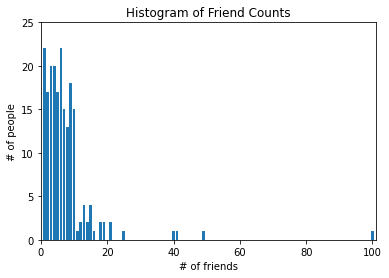

In [ ]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
  """
  Given two vectors x and y,
  find the least-squares values of alpha and beta
  """
  beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
  alpha = mean(y) - beta * mean(x)
  return alpha, beta

The choice of alpah simply says that when we see the average value of the independent variable x, we predict the average value of the dependent variable y.

The choice of beta means that when the input value increases by standard_deviation(x), the prediction then increases by correlation(x, y) * standard_deviation(y). In the cases where x and y are perfectly correlated, a one-standard-deviation increases in x results in a one-standard-deviation-of-y increase in the prediction.

When they're perfectly **anticorrelated**, the increase in x results in a decrease in the prediction. 

And when the **correlation is 0**, beta is 0 which means that **changes in x don't affect the prediction** at all

In [ ]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [ ]:
from scratch.statistics import num_friends_good, daily_minutes_good

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

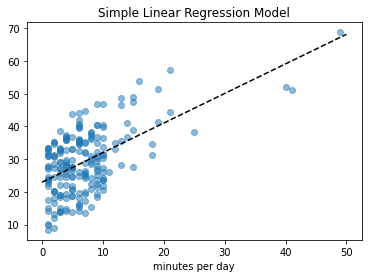

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 50, 100)
y = alpha + beta *x

plt.plot(x, y, '--k')
plt.scatter(num_friends_good, daily_minutes_good, alpha=0.5)


plt.title('Simple Linear Regression Model')
plt.xlabel('# of friends')
plt.xlabel('minutes per day')

plt.show()

Figure out how well we've fit the data than starting at the graph. A common measures is the coefficient of determination (or R-squared), which measures the fraction of the total variation in the dependent variable that is captured by the model

In [ ]:
from scratch.statistics import de_mean

def total_sum_of_squares(y: Vector) -> float:
  """the total squared variation of y_i's from their mean"""
  return sum(v ** 2 for v in de_mean(y))

def r_squared(alpah: float, beta: float, x: Vector, y: Vector) -> float:
  """
  the fraction of variation in y captured by the model, which equals
  1 - fraction of variation in y not captured by the model
  """
  return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / 
                total_sum_of_squares(y))
  
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

## **Using Gradient Descent**

In [ ]:
import random
import tqdm
from scratch.gradient_descent import gradient_step

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]  # choose random value to start

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
  for _ in t:
    alpha, beta = guess

    # Partial derivative of loss with respect to alpha
    grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                for x_i, y_i in zip(num_friends_good,
                                    daily_minutes_good))
    
    # Partial derivative of loss with respect to beta
    grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                 for x_i, y_i in zip(num_friends_good,
                                     daily_minutes_good))
    
    # Compute loss to stickin the tqdm description
    loss = sum_of_sqerrors(alpha, beta,
                           num_friends_good, daily_minutes_good)
    t.set_description(f"loss: {loss:.3f}")

    # Finally, update the guess
    guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha <23.0
assert 0.9 < beta < 0.905

loss: 13196.619: 100%|██████████| 10000/10000 [00:31<00:00, 316.32it/s]


## **Maximum Likelihood Estimation**


Why choose least squares? One justification involves maximum likelihood estimation. Imagine that we have a sample of data v<sub>1</sub>, ... , V<sub>n</sub> that comes from a distribution that depends on some unknown parameter θ (theta):

$$p\left(v_1,\:...,\:v_n|θ\right)$$

If we didn't know θ, we could turn around and think of this quantity as the likelihood of θ given the sample:

$$L\left(θ|v_1,\:...,\:v_n\right)$$

Under this approach, the most likely θ is the value that maximizes this likelihood function - this is, the value that makes the observed data the most probable. In the case of a continuous distribution, in which we have a probability distribution function rather than a probability mass function, we can do the same thing.

Back to regression. One assumption that's often made about the simple regression model is that the regression errors are normally distributed with mean 0 and some (known) standard deviation σ. if that's the case, then the likelihood based on seeing a pair (x_i, y_i) is:

$$L\left(α,\:β|x_i,\:y_i,\:σ\right)\:=\:\frac{1}{\sqrt{2\pi }σ}exp\:\left(−\left(y_i\:−\:α\:−\:βx_i\right)^2/2σ^2\right)$$

The likelihood based on the entire dataset is the product of the individual likelihoods, which is largest precisely when alpha and beta are chosen to minimize the sum of squared errors. That is, in this case (with these assumptions), minimizing the sum of squared error is equivalent ot maximizing the likelihood of the observed data.

# <center><b>Chapter 15. Multiple Regression</b></center>

You've collected additional data: you know how many hours each of your users works each day, and whether they have a PhD. You'd like to use this additional data to improve your model.

Accordingly, you hypothesize a linear model with more independent variables:

$$minutes\:=\:α\:+\:β_1friends\:+\:β_2work\:hours\:+\:β_3phd\:+\:ε$$



## **The Model**

in Chapter 14 we fit a model of the form:

$$y_i\:=\:α\:+\:βx_i\:+\:ε_i$$

Now imagine that each input x<sub>i</sub> is not a single number but rather a vector of k numbers, x<sub>i1</sub>,...,x<sub>ik</sub>. The multiple regression model assumes that:

$$y_i\:=\:α\:+\:β_1x_{i1}+.\:.\:.\:+β_kx_{ik}\:+\:ε_i$$

In multiple regression the **vector of parameters is usually called β.**  We'll want this to include the constant term as well, which we can achieve by adding a column of 1s to our data:

$$beta\:=\:\left[alpha,\:beta_1,\:...,\:beta_k\right]$$

and:

$$x_i\:=\:\left[1,\:x_{i1},\:...,\:x_{i_k}\right]$$

In [ ]:
from scratch.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
  """assumes that the first element of x is 1"""
  return dot(x, beta)

In [ ]:
# In this particular case, our independent variable x will be a list of vectors,
# each of which look like this;

[1,    # constant term
 49,   # number of friends
 4,    # work hours per day
 0]    # doesn't have PhD

## **Further Assumptions of the Least Squares Model**

There are a couple of **further assumptions that are required for this model** (and our solution) to make sense.

The **first** is that the columns of **x are linearly independent** -that there's no way to write any one as a weighted sum of some of the others. If this assumption fails, it's impossible to estimate `beta`. To see this in an extreme case, imagine we had an extra field `num_acquaintances` in our data that for every user was exactly equal to `num_friends`

Then, starting with any `beta`, if we add any amount to the `num_friends` coefficient and subtract that same amount from the `num_acquaintances` coefficient, the model's predictions will remain unchanged. This means that there's no way to find the coefficient for `num_friends`. (Usually violations of this assumption won't be so obvious.)

The **second** important assumption is that the columns of **x are all uncorrelated with the errors ε.** If this fails to be the case, our estimates of `beta` will be systematically wrong.

For instance, in Chapter 14, we built a model that predicted that each additional friends was associated with an extra 0.90 daily minutes on the site.

Imagine it's also the case that:
* People who work more hours spend less time on the site.
* People with more friends tend to work more hours.

That is, imagine that the "actual" model is:

$$minutes\:=\:α\:+\:β_1friends\:+\:β_2work\:hours\:+\:ε$$

Where β<sub>2</sub> is negative, and the work hours and friends are positively correlated. In that case, when we minimize the errors of the single-variable model:


$$minutes\:=\:α\:+\:β_1friends\:+\:ε$$

we will underestimate  β<sub>1</sub>

Think about what would happen if we made predictios using the single variable model wiht the "actual" value of β<sub>1</sub>. (That is, the value that arises from minimizing the errors of what we called the "actaul" model.) **The predictios would tend to be way too large for users who work many hours and a little too large for users who work few hours**, because β<sub>2</sub> < 0 and we "forgot" to include it. Because **work hours is possitively correlated with number of friends,** this means the predictions tend to be way too large for users with many friends, and only slightly too large for users with few friends. The result of this is that we can reduce the erros(in the single-variable model) by decreasing our estimate of β<sub>1</sub>, which means that the error-minimizing β<sub>1</sub> is smaller than "actual" value. That is, in this case the single-variable least squares solution is biased to underestimate β<sub>1</sub>. And, in general, whenever the independent variables are correlated with the errors like this, our least squares solution will give us a biased estimate of β<sub>1</sub>

## **Fitting the Model**

As we did in the simple linear model, we'll choose `beta` to minimize the sum of squared errors. Finding an exact solution is not simple to do by hand, which means we'll need to use gradient descent. Again we'll want to minimize the sum of the squared erros. The error function is almoest identical to the one we used in Chapter 14, except that instead of expecting parameters [alpha, beta] it will take a vector of arbitrary length:

In [ ]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
  return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
  return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4]  # so prediction = 4 + 8 + 12 = 24

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

In [ ]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
  err = error(x, y, beta)
  return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

In [ ]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
  """
  Find the beta that minimizes the sum of squared errors
  assuming the model y = dot(x, beta).
  """
  # Start with a random guess
  guess = [random.random() for _ in xs[0]]

  for _ in tqdm.trange(num_steps, desc="least squares fit"):
    for start in range(0, len(xs), batch_size):
      batch_xs = xs[start:start+batch_size]
      batch_ys = ys[start:start+batch_size]

      gradient = vector_mean([sqerror_gradient(x, y, guess)
                              for x, y in zip(batch_xs, batch_ys)])
      guess = gradient_step(guess, gradient, -learning_rate)

  return guess

In [ ]:
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],
                             [1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],
                             [1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],
                             [1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],
                             [1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],
                             [1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],
                             [1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],
                             [1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],
                             [1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],
                             [1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],
                             [1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],
                             [1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],
                             [1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],
                             [1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],
                             [1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],
                             [1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],
                             [1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],
                             [1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],
                             [1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],
                             [1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],
                             [1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],
                             [1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],
                             [1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],
                             [1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],
                             [1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],
                             [1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],
                             [1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],
                             [1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],
                             [1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],
                             [1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],
                             [1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],
                             [1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],
                             [1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],
                             [1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],
                             [1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],
                             [1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],
                             [1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],
                             [1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],
                             [1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],
                             [1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],
                             [1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],
                             [1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],
                             [1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],
                             [1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],
                             [1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],
                             [1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],
                             [1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],
                             [1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],
                             [1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],
                             [1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],
                             [1,1,1,1],[1,1,1,1],[1,1,5,1]]

In [ ]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

random.seed(0)
# I used trial and error to choose num_iters and step_size.
# This will run for a while.
learning_rate = 0.001
beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)

assert 30.50 < beta[0] < 30.70      # constant
assert  0.96 < beta[1] <  1.00      # numfrineds
assert -1.89 < beta[2] < -1.85      # work hours per day
assert  0.91 < beta[3] <  0.93      # has Phd

least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1001.43it/s]


In practice, **you wouldn't estimate a linear regression using gradient descent**; you'd get the exact coefficients using linear algebra technies

$$minutes\:=\:30.\:58\:+\:0.\:972\:friends\:−\:1.\:87\:work\:hours\:+\:0.\:923\:phd$$

## **Intrepreting the Model**

You should think of the coefficients of the model as representing all-else-being-equal estimates of the impacts of each factor. 
* All else being equal, each **additional friend corresponds to an extra minute spent on the site each day**. 
* All else being equal, each additional hour in a **user's workday corresponds to about two fewer minutes spent on the site each day**.
* All else being equal, **having a Phd is associated with spending an extra minute on the site each day.**

What this doesn't (directly) tell us is anything about the interactions among the variables. It's possible that the effect of work hours is different for people with many friends than it is for people with few friends. This model doesn't capture that. One way to handle this case is to introduce a new variable that is the product of "friends" and "work hours." This effectively allows the "work hours" coefficient to increase (or decrease) as the number of friends increass.

Or it's possible that the more friends you have, the more time you spend on the site up to a point, after which further firneds caus you to spend less time on the site. (Perhaps with too many friends the experience is just too overwhelming?) We could try to capture this in our model by adding another variable that's the square of the number of friends.
Once we start adding variables, we need to worry about whether their coefficients "matter." There are no limits to the numbers of products, logs, squares, and higher powers we would add.

## **Goodness of Fit**

In [ ]:
from scratch.simple_linear_regression import total_sum_of_squares

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
  sum_of_squared_errors = sum(error(x, y, beta) ** 2
                              for x, y in zip(xs, ys))
  return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68

Keep in mind, however, that **adding new variables to a regression will necessarily increase the R-squared.** After all, the simple regression model is just the special case of the multiple regression model where the coefficients on "work hours" and "PhD" both equal 0. The optimal multiple regression model will necessarily have an error at least as small as the one.

Because of this, in a multiple regression, we also need to look at the **standard errors of the coefficients, which measure how certain we are about our estimates of each β<sub>i</sub>**. The regression as a whole may fit our data very well, but if some of the indepent variables are correlated(or irrelevent), their coefficients might not mean much.

The typical approach to measuring these errors starts with another assumption -that the errors ε<sub>i</sub> are independent normal random variables with mean 0 and some shared(unknown) standard deviation σ. In that case, we (or, more likely, our statistical sofeware) can use some linear algebra to find the satnd dard error of each coefficient. The larger it is, the less usre our model is aobut that coefficient. Unfortunately, we're not set up to do that kind of linear algebra from scratch.



## **Digression: The Bootstrap**

Imagine that we have a sample of n data points, generated by some (unknown to use) distribution:

$$data\:=\:get_-sample\left(num_-points=n\right)$$

In Chapter 5, we wrote a funciton that could compare the `median` of sample, which we can use as an estimate of the median of the distribution itself.

But how confident can we be about our estimate? If all the data points in the sample are very close to 100, then it seems likely that the actual median is close to 100. If approximately half the data points in the sample are close to 0 and the other half are close to 200, then we can't be nearly as certain about the median

If we could repeatedly get new samples, we could compute the medians of many samples and look at the distribution of those medians. Often we can't. In the case we can bootstrap new datasets by choosing n data points with replacement from our data. And then we can compute the medians of those synthetic datasets:

In [ ]:
from typing import TypeVar, Callable

X = TypeVar('X')            # Generic type for data
Stat = TypeVar('Stat')      # Generic type for "statistic" 

def bootstrap_sample(data: List[X]) -> List[X]:
  """randomly samples len(data) elements with replacement"""
  return [random.choice(data) for _ in data]


def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
  """evaluates stats_fn on num_samples bootstrap sample from data"""
  return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [ ]:
# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.4 + random.random()] +
                [random.random() for _ in range(50)] + 
                [200 + random.random() for _ in range(50)])

In [ ]:
from scratch.statistics import median, standard_deviation

medians_close = bootstrap_statistic(close_to_100, median, 100)
medians_far = bootstrap_statistic(far_from_100, median, 100)

assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90

## **Standard Errors of Regression Coefficients**

We can take the same approach to estimating the standard errors of our regression coefficients. We repeatedly take a `bootstrap_sample` of our data and estimate `beta` based on that sample. If the coefficient correspoding to one of the independent variables `(say, num_friends)` doesn't vary much across samples, then we can be confident the our estimate is relatively tight. If the coefficient varies greatly across samples, then we can't be at all confident in our estimate.

The only subtlety is that, before sampling, we'll need to `zip` our x data and y data to make sure that corresponding values of the independent and dependent variables are sampled together. This means that `bootstrap_sample` will return a list of pairs `(x_i, y_i)`, which we'll need to reassemble into an `x_sample` and `y_sample`:

In [ ]:
from typing import Tuple
import datetime

def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
  x_sample = [x for x, _ in pairs]
  y_sample = [y for _, y in pairs]
  beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
  print("bootstrap sample", beta) 
  return beta

random.seed(0)       # so that you get the same results as me

# This will take a coupe of minutes!
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)),
                                      estimate_sample_beta,
                                      100)

least squares fit: 100%|██████████| 5000/5000 [00:07<00:00, 631.01it/s]


bootstrap sample [30.49402029547432, 1.0393791030498776, -1.9516851948558502, 0.7483721251697333]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1158.40it/s]


bootstrap sample [30.149963287526045, 1.0005300432763113, -2.0650380122822543, 3.177179854834797]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1607.57it/s]


bootstrap sample [29.202826897693722, 1.0017089956376213, -1.5294248424787367, 0.9528580285760854]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1552.94it/s]


bootstrap sample [31.29481217471851, 0.959264729494101, -1.9120875473727545, 0.039471107599519425]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1578.20it/s]


bootstrap sample [32.124144227949955, 0.8569794405277468, -1.9936770520754086, 1.0416943131373024]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1587.29it/s]


bootstrap sample [31.8691994453096, 0.7748022870492418, -2.0087625702876446, -1.2407036547656678]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1605.09it/s]


bootstrap sample [31.08119759650208, 0.998386254386918, -1.9833984114987815, 0.9567646217580389]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1595.32it/s]


bootstrap sample [29.254530450577782, 0.9763387220017684, -1.7430339427043595, 1.9944240584590935]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.07it/s]


bootstrap sample [31.649174199331632, 0.9389340937491032, -1.9733848473304205, -0.15249287969349437]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1167.60it/s]


bootstrap sample [30.040109260720964, 1.0531247386421572, -1.7694878560354388, 1.302971911084249]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1595.28it/s]


bootstrap sample [29.066927054721297, 1.2792640005590372, -1.937339904947856, 0.9183668519320846]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1612.70it/s]


bootstrap sample [31.740476303331718, 0.9538879291586574, -2.0689725879612477, 1.4785830120835612]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1604.96it/s]


bootstrap sample [29.46654084062671, 0.9837739845117637, -1.9915052407093472, 3.150029950640157]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1592.48it/s]


bootstrap sample [30.97515705531374, 0.9420086669374396, -2.0367671746636065, 0.6323599067111714]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.76it/s]


bootstrap sample [31.478778128163995, 0.8623617407485805, -1.8798782324632368, -0.11949170941208796]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1603.29it/s]


bootstrap sample [33.87286992682308, 0.8824018752321863, -1.8978803929581156, -1.0333647107478692]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1609.80it/s]


bootstrap sample [29.272206898314987, 1.0899411603739348, -1.8911943299601002, 3.162677841885805]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1447.84it/s]


bootstrap sample [30.83577809561691, 1.0242186355671827, -1.9209251081222494, 1.3383795133620962]


least squares fit: 100%|██████████| 5000/5000 [00:06<00:00, 830.98it/s] 


bootstrap sample [28.211162672015906, 1.458352440392638, -1.70241171517105, 0.94520401518726]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1027.55it/s]


bootstrap sample [29.93552336056075, 0.9470529669956465, -1.8491245571618218, 0.8573641103651921]


least squares fit: 100%|██████████| 5000/5000 [00:06<00:00, 755.55it/s]


bootstrap sample [30.636052325886002, 0.9966176913889679, -1.8308401560119625, 0.13862673979220685]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 864.84it/s] 


bootstrap sample [30.855945311129382, 0.9925731301194982, -1.834813509355548, 1.9711641797749935]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 837.38it/s]


bootstrap sample [29.77226728370608, 1.0493381798575807, -1.6999309651266667, 0.9221651877575128]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1016.92it/s]


bootstrap sample [28.78470035821775, 0.9629668755117143, -1.7818333154132011, 1.905170320676074]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1020.33it/s]


bootstrap sample [31.769457992268443, 0.9040180814550004, -1.867677593282121, -0.7957987643064021]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1144.62it/s]


bootstrap sample [30.06836087625883, 0.9237365767889174, -1.7326788050658604, 1.9044381512517516]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1041.01it/s]


bootstrap sample [29.248924522774857, 1.0251706036709467, -1.6396068581125103, 1.7875039505127974]


least squares fit: 100%|██████████| 5000/5000 [00:07<00:00, 645.92it/s]


bootstrap sample [26.160390418551746, 1.3566609275406472, -1.880731098382104, 3.884946816272215]


least squares fit: 100%|██████████| 5000/5000 [00:07<00:00, 635.26it/s] 


bootstrap sample [31.9708823034869, 0.8717159490168253, -1.8037586194211703, -0.23788897755135452]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 905.06it/s]


bootstrap sample [30.580903591168788, 0.9610711598856186, -1.8984859248085817, -0.0023187395782722853]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 903.23it/s]


bootstrap sample [31.433330253362577, 0.8768141821390377, -1.7328584033279486, -0.10210988051437449]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 986.38it/s]


bootstrap sample [30.984236860566945, 1.036149466142919, -2.2200016449095226, 1.0886749895563579]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 888.21it/s]


bootstrap sample [29.28237674477942, 1.0858388836439414, -1.74280602847473, 1.4397328297413239]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 897.16it/s] 


bootstrap sample [30.65460047430859, 0.9454408039075628, -1.7320071301269266, -0.1485862182089119]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 932.00it/s] 


bootstrap sample [29.118139496835955, 0.893808801696634, -1.9153563192896768, 2.0598345811489462]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 931.83it/s] 


bootstrap sample [29.95488463195938, 0.9940567914003665, -1.7605085370056377, 1.6096257131696945]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 991.60it/s] 


bootstrap sample [31.000164842544855, 0.962368315956188, -1.9115208623969564, 0.7473190835230143]


least squares fit: 100%|██████████| 5000/5000 [00:08<00:00, 607.18it/s]


bootstrap sample [30.825204744897878, 0.8912590208026672, -1.770469093607492, 0.7459655949536621]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1145.54it/s]


bootstrap sample [29.366136812382027, 1.012558241060829, -1.6182773155952548, 1.017025703754098]


least squares fit: 100%|██████████| 5000/5000 [00:07<00:00, 660.00it/s]


bootstrap sample [29.94295970143512, 1.0167217566773747, -1.5621167917565122, -0.1030904763985423]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1243.70it/s]


bootstrap sample [29.962898858207343, 1.0652251821283687, -1.926924147663584, 2.0385736378519947]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1627.55it/s]


bootstrap sample [30.525302041791818, 0.9658944102293198, -1.8870631894489638, 0.5367690208128764]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.44it/s]


bootstrap sample [30.6785320563259, 1.0139828545599132, -1.7817299670979692, 1.6026393229652947]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1604.78it/s]


bootstrap sample [30.09073747870904, 1.0047123547747132, -1.9560265455918162, 2.75259429615735]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1599.56it/s]


bootstrap sample [30.937038893678913, 0.9670590611928079, -2.1124811600264293, 0.3258045605146989]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1613.03it/s]


bootstrap sample [28.78930855900356, 1.1730115746597942, -1.7835138640623003, 3.2623158308236095]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1612.62it/s]


bootstrap sample [31.14754912309552, 0.9326436111603991, -1.7707952504307622, -1.099359064604309]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.46it/s]


bootstrap sample [31.813727613195653, 0.9683784085384612, -2.019078886892217, 0.7501206686148623]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1594.76it/s]


bootstrap sample [30.223398353230184, 0.9373764744862103, -1.5323607166675373, -0.01469994075209993]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1570.85it/s]


bootstrap sample [28.01777500444891, 1.091598878794665, -1.6190191022832499, 2.397154344588124]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1596.72it/s]


bootstrap sample [29.342668886496593, 0.9815156932180105, -1.9184777914462317, 1.5482939749639446]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1593.39it/s]


bootstrap sample [32.53937166649288, 1.060883971208886, -2.2704689582768722, 0.3681597653761555]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1588.62it/s]


bootstrap sample [30.106198499206915, 0.9657134612613777, -1.7191529436530641, -0.6267619207221298]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1595.34it/s]


bootstrap sample [29.993282359977137, 0.9757399392816419, -1.9767875486880904, 2.048669364846268]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1479.17it/s]


bootstrap sample [30.571136409586924, 1.066488813531558, -1.6618835177744289, -0.19985556821698586]


least squares fit: 100%|██████████| 5000/5000 [00:06<00:00, 716.47it/s]


bootstrap sample [30.9490097252882, 0.9597396222139453, -1.9214823753987709, 1.25885503487694]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 969.24it/s] 


bootstrap sample [31.887007554673076, 0.9506671496957437, -2.152653973374404, 1.6869486505999165]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1601.88it/s]


bootstrap sample [29.081704350215187, 1.0495038787355986, -1.6920009023683746, 3.609080049949202]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.67it/s]


bootstrap sample [31.479546830562978, 1.1296437640969312, -1.8930013630375897, 0.2328971438009536]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1547.22it/s]


bootstrap sample [30.610973912805395, 1.0065894319911013, -1.836243246680104, 0.4499397217455247]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1590.10it/s]


bootstrap sample [31.80927695488258, 0.9821469730488941, -2.007959621103926, -0.2411398745050231]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.83it/s]


bootstrap sample [31.024210851804416, 0.9515774062029452, -1.9408222914617927, 0.6442854716394794]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1602.20it/s]


bootstrap sample [28.908141235990033, 1.0556273838810308, -1.7935754991375803, 2.082266951237433]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1598.23it/s]


bootstrap sample [30.025383087071763, 0.9490311032868943, -1.8905462953821093, 1.614968102502849]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1601.32it/s]


bootstrap sample [31.344911606937217, 0.9596230552550087, -2.084944019182774, 1.0635864768954955]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1594.31it/s]


bootstrap sample [30.88785665879763, 0.9739691303740718, -1.750496781109518, -2.0086684580110616]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1612.36it/s]


bootstrap sample [30.524172097277887, 0.9468432200060536, -1.7489583214704674, -0.42947540813439916]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1595.33it/s]


bootstrap sample [33.73887281461898, 0.8342998931764716, -2.0056583070815233, -1.0048943591784738]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1604.33it/s]


bootstrap sample [29.04731144829789, 0.9737448743420717, -1.7622553843049413, 0.9744871197165679]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1602.26it/s]


bootstrap sample [30.849086975523765, 1.1142041012783979, -2.055393538038613, 1.8606960468590918]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1602.53it/s]


bootstrap sample [31.20227902410509, 1.0148203879553739, -1.831139817867853, -0.12803605188562736]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1611.10it/s]


bootstrap sample [30.44951242588852, 0.9188875408835141, -1.6623667661150159, 0.41561209518705605]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1604.69it/s]


bootstrap sample [30.93743647937649, 0.9178249912706591, -1.91788395405578, 0.8027340312172657]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1575.50it/s]


bootstrap sample [33.07304817934109, 0.7669188362229076, -1.8621104803815107, -0.5344373694611129]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1609.99it/s]


bootstrap sample [30.98035452936738, 0.9608047189289309, -1.8571138381579286, 1.2456516010877]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1596.76it/s]


bootstrap sample [29.890049201061156, 0.9320508621300003, -1.815157140889288, 1.6197634219660293]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1602.79it/s]


bootstrap sample [32.7497073906742, 0.8163410438179741, -1.6727937223778233, -1.627203273138944]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1582.46it/s]


bootstrap sample [32.23550207094589, 0.9915112587422378, -2.201685593411146, 0.659721525694611]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1595.52it/s]


bootstrap sample [30.238346353105722, 0.9812068545490507, -1.9183149068660714, 2.4252389104819785]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1590.25it/s]


bootstrap sample [30.574120085079127, 0.9174840515163696, -1.791824539551342, 0.9221993996446399]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1577.55it/s]


bootstrap sample [30.200588272490595, 0.9290781608340558, -1.5128386060160508, -0.27164281164191667]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1611.72it/s]


bootstrap sample [30.568001921567824, 1.0423323558239714, -2.0539328282484295, 2.070512986336468]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1598.07it/s]


bootstrap sample [32.24170594033224, 0.928943846288939, -1.9597146432475416, -0.3283270089441192]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1566.75it/s]


bootstrap sample [32.867472630955, 1.0159010210188608, -2.0279568468137548, -0.5177147877542921]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1600.13it/s]


bootstrap sample [29.215869116992934, 1.0071212080144287, -1.9567505776484149, 3.7248516336467894]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1581.47it/s]


bootstrap sample [29.731620363957564, 1.0022351904608418, -1.6056750069107464, 0.38365805637548667]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1593.15it/s]


bootstrap sample [32.67347841435598, 0.8824434637692973, -1.9909101579029314, 0.04871947146702888]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1568.63it/s]


bootstrap sample [29.15775553756214, 1.0683351454601346, -1.7096121511993116, 3.2616854857255317]


least squares fit: 100%|██████████| 5000/5000 [00:04<00:00, 1064.91it/s]


bootstrap sample [30.488240564960755, 1.0353317712496077, -1.9149562223503453, 2.595089595245561]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1558.44it/s]


bootstrap sample [31.498485256154574, 0.865173722648589, -1.9003285713857743, -0.4448014961070426]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1597.93it/s]


bootstrap sample [28.568637146495437, 0.9377084816305519, -1.6697079214548882, 2.0378528186926]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1576.54it/s]


bootstrap sample [30.8880890003392, 0.9480046573855904, -1.9409732963472783, -0.38053847722698325]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1582.99it/s]


bootstrap sample [30.449302174408764, 1.121851483678596, -1.9621516796699556, 2.244341597832513]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1579.43it/s]


bootstrap sample [30.266204204539516, 1.006867325680496, -2.1198992898486466, 0.5362851256019128]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1575.50it/s]


bootstrap sample [29.33031812613639, 1.0424517245684064, -1.8849226826885934, 2.2650387817258566]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1571.99it/s]


bootstrap sample [31.777389538816966, 0.8928310423632744, -1.9269578522157438, 0.048635890062917325]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1296.74it/s]


bootstrap sample [28.291072745509133, 1.1873361941623277, -1.8546687169062575, 2.6390276558088757]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1570.30it/s]


bootstrap sample [31.725525991297584, 0.8939775539447468, -1.843559060469148, -0.6224324630864045]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1577.74it/s]


bootstrap sample [30.2731194689144, 0.8005769229528958, -1.6991234036996576, 0.9748341305369917]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1560.64it/s]

bootstrap sample [31.75696506368952, 1.0790800487199688, -2.0880894078200054, 1.6420943383461737]


In [ ]:
bootstrap_standard_errors = [
    standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(4)]
  
print(bootstrap_standard_errors)

[1.2715078186272781, 0.10318410116073963, 0.15510591689663628, 1.2490975248051257]


(We would likely get better estimates if we collected more than 100 samples and used more than 5,000 iterations to estimate each beta, but we don't have all day.)

We can use these to test hypotheses such as "does β<sub>i</sub> equal 0?" under the null hypothesis β<sub>i</sub> = 0 (and with our other assumptions about the distribution of ε<sub>i</sub>, the statistic:

$$tj\:=\:ˆβj/ˆσj$$

Which is our estimate of β<sub>j</sub> divided by our estimate of its standard error, follows a Student's t-distribution with "n − kdegress of freedom."

If we had a `students_t_cdf` function, we could compute p-values for each least-squares coefficient to indicate how likely we would be to observe such a value if the actual coefficient were 0. Unfortunately, we don't have such a function. (Although we would if we weren't working from scratch.)

However, as the degrees of freedom get large, the t-distribution gets closer and closer to a standard normal. In a situation like this, where n is much larget than k, we can use `normal_cdf` and still feel good about ourselves:

In [ ]:
from scratch.probability import normal_cdf

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
  if beta_hat_j > 0:
    # if the coefficient is positive, we need to compute twice the 
    # probability of seeing an even *larger* value
    return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
  else:
    # otherwise twice the probability of seeing a **samller* value
    return 2 * normal_cdf(beta_hat_j / sigma_hat_j)


assert p_value(30.58, 1.27)     <  0.001     # constant term
assert p_value(0.972, 0.103)    <  0.001     # num_friends
assert p_value(-1.865, 0.155)   <  0.001     # work_hours
assert p_value(0.923, 1.249)    >  0.4       # phd

(In a situation not like this, we would probably be using statistical software that knows how to compute the t-distribution, as well as how to compute the exact standard errors.)

While most of the coefficients have very small p-values (suggesting that they are indeed nonzero), the coefficient for "PhD" is not "significantly" different from 0, which makes it likely that the coefficient for "PhD" is random rather than meaningful.

In more elaborate regression scenarios, you sometimes want to test more elaborate hypotheses about the data, such as "at least one of the β<sub>j</sub> is nonzero" or "β<sub>1</sub> equals β<sub>2</sub> and β<sub>3</sub> equals β<sub>4</sub>. "You can do this with an F-test, (and alas). 

## **Regularization**

In practice, you'd often like to apply linear regression to datasets with large numbers of variables. This creates a couple of extra wrinkles. First, the more variables you use, the more likely you are to overfit your model to the training set. And second, the more nonzero coefficients you have, the harder it is to make sense of them. If the goal is to explain some phenonmenon, a sparse model with three factors might be more useful than a slightly better model with hundreds.

Regularization is an approach in which we add to the error term a penalty that gets larger as beta gets larger. We then minimize the combined error and penalty. The more importance we place on the penalty term, the more we discourage large coefficients.

For example, in ridge regression, we add a penalty proportional to the sum of the squares of the beta_i (except that typically we don't penalize beta_0, the constant term):

In [ ]:
# alpha is a *hyperoaraneter* controlling how harsh the penalty is 
# Sometimes it's called "lambda" but that already means something in Python.

def ridge_penalty(beta: Vector, alpha: float) -> float:
  return alpha * dot(beta[1:], beta[1:])


def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
  """estimate error plus ridge penalty on beta"""
  return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

In [ ]:
from scratch.linear_algebra import add

def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
  """gradient of just hte ridge penalty"""
  return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]


def sqerror_ridge_gradient(x: Vector, 
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:

  """
  the gradient corresponding to the ith squared error term
  including the ridge penalty
  """
  return add(sqerror_gradient(x, y, beta),
             ridge_penalty_gradient(beta, alpha))

In [ ]:
def least_squares_fit_ridge(xs: List[Vector],
                            ys: List[float],
                            alpha: float,
                            learning_rate: float,
                            num_steps: int,
                            batch_size: int = 1) -> Vector:
    # Start guess with mean
    guess = [random.random() for _ in xs[0]]

    for i in range(num_steps):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_ridge_gradient(x, y, guess, alpha)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess


In [ ]:
random.seed(0)
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.0,  # alpha
                                learning_rate, 5000, 25)

# [30.51, 0.97, -1.85, 0.91]
assert 5 < dot(beta_0[1: ], beta_0[1: ]) < 6
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0) < 0.69

In [ ]:
beta_0_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.1, # alpha
                                   learning_rate, 5000, 25)

# [30.8, 0.95, -1.83, 0.54]
assert 4 < dot(beta_0_1[1: ], beta_0_1[1: ]) < 5
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0_1) < 0.69

In [ ]:
beta_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 1, # alpha
                                 learning_rate, 5000, 25)

# [30.6, 0.90, -1.68, 0.10]
assert 3 < dot(beta_1[1: ], beta_1[1: ]) < 4
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_1) < 0.69

In [ ]:
beta_10 = least_squares_fit_ridge(inputs, daily_minutes_good, 10, # alpha
                                  learning_rate, 5000, 25)

# [28.3, 0.67, -0.90, -0.01]
assert 1 < dot(beta_10[1: ], beta_10[1: ]) < 2
assert 0.5 < multiple_r_squared(inputs, daily_minutes_good, beta_10) < 0.6

Another approach is **lasso regression**, which uses the penalty:

In [ ]:
def lasso_penalty(beta, alpha):
  return alpha * sum(abs(beta_i) for beta_i in beta[1: ])

# <center><b>Chapter 16. Logistic Regression</b></center>

## **The Problem**

We have  an anonymized dataset of about 200 users, containing each user's salary, her years of experience as a data scientist, and whether she paird for premium account. As is typical with categorical variables, we represent the dependent variable as either 0 (no preminum account) or 1 (premium account).



In [ ]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),
          (6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),
          (0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),
          (9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),
          (4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),
          (5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),
          (9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),
          (0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),
          (7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),
          (4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),
          (2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),
          (2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),
          (7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),
          (2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),
          (8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),
          (7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),
          (2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),
          (5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),
          (8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),
          (1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),
          (9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),
          (2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),
          (7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),
          (6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),
          (0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),
          (9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),
          (2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),
          (6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),
          (4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),
          (4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),
          (9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),
          (2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),
          (4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),
          (7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),
          (6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),
          (9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),
          (6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),
          (0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),
          (2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),
          (6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

In [ ]:
# our data is a list of rows [experience, salary, paid_account]

xs = [[1.0] + row[:2] for row in data]    # [1, experience, salary]
ys = [row[2] for row in data]             # paid_account     

In [ ]:
xs[:5], ys[:5]

([[1.0, 0.7, 48000],
  [1.0, 1.9, 48000],
  [1.0, 2.5, 60000],
  [1.0, 4.2, 63000],
  [1.0, 6, 76000]],
 [1, 0, 1, 0, 0])

An obvious first attempt is to use linear regression and find the best model:

$$paid\:account\:=\:β_0\:+\:β_{_1}experience\:+\:β_2salary\:+\:ε$$

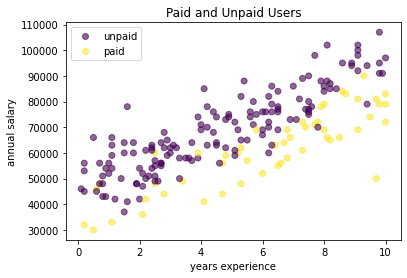

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

experience = [x[1] for x in xs]
salary = [x[2] for x in xs]

scatter = plt.scatter(experience, salary, c=ys, alpha=0.6)

label = {0:'unpaid', 1:'paid'}
colors = [label[item] for item in ys]
plt.legend(handles = scatter.legend_elements()[0], labels = label.values())

plt.title('Paid and Unpaid Users')
plt.xlabel('years experience')
plt.ylabel('annual salary')

plt.show()

least squares fit: 100%|██████████| 1000/1000 [00:02<00:00, 370.89it/s]


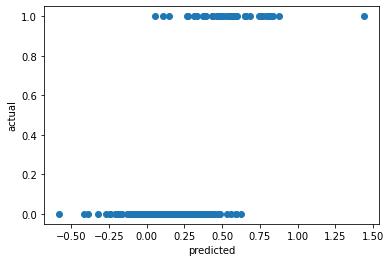

In [ ]:
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step

learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)

predictions = [predict(x_i, beta) for x_i in rescaled_xs]
plt.scatter(predictions, ys)

plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

But this approach leads to a couple of immediate problems:

* We'd like for our predicted outputs to be 0 or 1, to indicate class membership. it's fine if they're between 0 and 1, since we can interpret these as probabilities -an output of 0.25 could mean 25% chance of being a paid member. But the **outputs of the linear model can be huge positive numbers of even negative numbers**, which it's **not clear how to interpret**. Indeed, here a lot of our predictions were negative.

* The linear regression model assumed that the errors were uncorrelated with the columns of x. But here, the regression coefficient for experience is 0.43, indicating the more experience leads to a greater likelihood of a premium account. This mean that our model outputs very large values for people with lots of experience. But we know that the actual values must be at most 1, which means that necessarily very large outputs (and therefore very larg values of experience) correspond to very large negative values of the error term. Because this is the case, our estimate of beta is biased.

What we'd like instead is for large positive values of `dot(x_i, beta)` to correspond to probabilities close to 1, and for large negative values to correspond to probabilities close to 0. We can accomplish this by applying another funciton to the result.

## **The Logistic Function**

In the case of logistic regression, we use the logistic function

In [ ]:
import math

def logistic(x: float) -> float:
  return 1.0 / (1 + math.exp(-x))

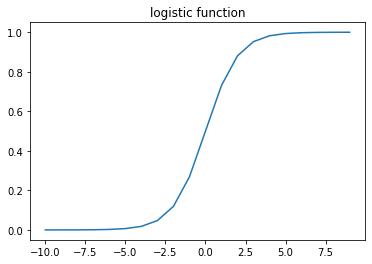

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [i for i in range(-10, 10)]
y = [logistic(x_i) for x_i in x]

plt.plot(x, y)

plt.title('logistic function')

plt.show()

As its input gets large and positive, it gets closre and closer to 1. As its input get large and negative, it gets closer and closer to 0. Additionally, it has the convenient property that its derivative is given by:

In [ ]:
def logistic_prime(x: float) -> float:
  y = logistic(x)
  return y * (1 - y)

which we'll make use of in a bit. We'll use this to fit a model:

$$y_i\:=\:f\:\left(x_iβ\right)\:+\:ε_i$$

Where f is the `logistic` function.

Recall that for linear regression we **fit the model by minimizing the sum of squared errors**, which ended up choosing the β that maximized the likelihood of the data.

Here the two aren't equivalent, so we'll **use gradient descent to maximize the likelihood directly.** This means we need to calculate the likelihood function and its gradient.


Given some β, our model says that each y<sub>i</sub> should equal 1 with probability f(x<sub>i</sub>β) and 0 with probability 1 - f(x<sub>i</sub>β).

In particular, the PDF for y<sub>i</sub> can be written as:

$$p\:\left(y_i|x_i,\:β\right)\:=\:f\left(x_iβ\right)^{y_i}\left(1\:−\:f\:\left(x_iβ\right)\right)^{1-y_i}$$

since if y<sub>i</sub> is 0, this equals:

$$1\:−\:f\left(x_iβ\right)$$

and if y<sub>i</sub> is 1 it equals:

$$f\left(x_iβ\right)$$

It turns out that it's actually simpler to maximize the log likelihood:

$$logL\left(β|x_i,\:y_i\right)\:=\:y_i\:log\:f\:\left(x_iβ\right)\:+\:\left(1\:−\:y_i\right)log\:\left(1\:−\:f\:\left(x_iβ\right)\right)$$

Because log is a strictly increasing function, any **`beta` that maximizes the log likelihood also maximizes the likelihood**, and vice versa. Because gradient descent minimizes things, we'll actually work with the negative log likelihood, since maximizing the likelihood is the same as minimizing its negative:


In [ ]:
import math
from scratch.linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
  """The negative log likelihood for one data point"""
  if y == 1:
    return -math.log(logistic(dot(x, beta)))
  else:
    return -math.log(1 - logistic(dot(x, beta)))

If we assume different data points are independent from one another, the overall likelihood is just the product of the individual likelihoods. That means the overall log likelihood is the sum of the individual log likelihoods:

In [ ]:
from typing import List

def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
  return sum(_negative_log_likelihood(x, y, beta)
              for x, y in zip(xs, ys))

In [ ]:
from scratch.linear_algebra import vector_sum

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
  """
  The jth partial derivative for one data point.
  Here i is  the index of the data point.
  """
  return -(y -logistic(dot(x, beta))) * x[j]


def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
  """
  The gradient for one data point.
  """
  return [_negative_log_partial_j(x, y, beta, j)
          for j in range(len(beta))]


def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
  return vector_sum([_negative_log_gradient(x, y, beta)
                    for x, y in zip(xs, ys)])

## **Applying the Model**

In [ ]:
from scratch.machine_learning import train_test_split
import random
import tqdm

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)

learning_rate = 0.01

# pick a random starting point
beta = [random.random() for _ in range(3)]

with tqdm.trange(5000) as t:
  for epoch in t:
    gradient = negative_log_gradient(x_train, y_train, beta)
    beta = gradient_step(beta, gradient, -learning_rate)
    loss = negative_log_likelihood(x_train, y_train, beta)
    t.set_description(f"loss: {loss:.3f} beta: {beta}")

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]: 100%|██████████| 5000/5000 [00:47<00:00, 105.95it/s]


In [ ]:
from scratch.working_with_data import scale

means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
                  - beta[1] * means[1] / stdevs[1]
                  - beta[2] * means[2] / stdevs[2],
                  beta[1] / stdevs[1],
                  beta[2] / stdevs[2])]

In [ ]:
beta_unscaled

[(8.927236932527311, 1.6482026277676038, -0.00028768900920142336)]

Unfortunately, these are not as easy to interpret as linear regression coefficients. All else being equal, an extra year of experience adds 1.6 to the input of `logistic` All else being equal, an extra $10,000 of salary subtracts 2.88 from the input of `logistic`.

The impact on the output, however, depends on the other inputs as well. If `dot(beta, x_i)` is already large (corresponding to a probability close to 1), increasing it even by a lot cannot affect the probability very much. If it's close to 0, increasing it just a little might increase the probability quite a bit.

What we can say is that -all else being equal-people with more experience are more likely to pay for accounts. And that -all else being equal-people with higher salaries are less likely to pay for accounts. (This was also somewhat apparent when we plotted the data.)

## **Goodness of Fit**

We haven't yet used the test data held out. Let's see what happens if we predict paid account whenever the probability exceeds 0.5:


In [ ]:
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(x_test, y_test):
  prediction = logistic(dot(beta, x_i))

  if y_i == 1 and prediction >= 0.5:         # TP: paid and we predict paid
    true_positives += 1
  elif y_i == 1:                             # FN: paid and we predict unpaid
    false_negatives += 1
  elif prediction >= 0.5:                    # FP: unpaid and we predict paid
    false_positives += 1
  else:                                      # TN: unpaid and we predict unpaid
    true_negatives +=1      


precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

In [ ]:
precision, recall

(0.75, 0.8)

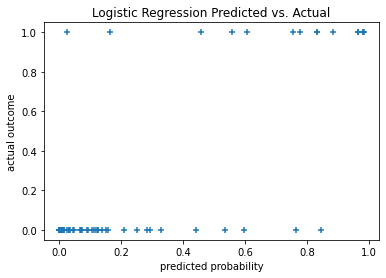

In [ ]:
predictios  = [logistic(dot(beta, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

## **Support Vector Machines**

The set of points where dot(beta, x_i) equal 0 is the boundary between our classes. We can plot this to see exactly what our model is doing

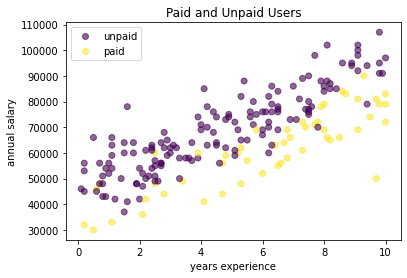

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

scatter = plt.scatter(experience, salary, c=ys, alpha=0.6)

label = {0:'unpaid', 1:'paid'}
colors = [label[item] for item in ys]
plt.legend(handles = scatter.legend_elements()[0], labels = label.values())

plt.title('Paid and Unpaid Users')
plt.xlabel('years experience')
plt.ylabel('annual salary')

plt.show()

This boundary is a hyperplance that splits the parameter space into two halfspace corresponding to predict paid and predict unpaid. We found it as a side effect of finding the most likely logistic model.

An alternative approach to classification  is to just look for the hyperplane that "best" separates the classes in the training data. This is the idea behind the **support vector machine**, which finds the hyperplane that maximizes the destance to the nearest point in each class

Finding such a hyperplane is an optimization problem that involves techniques that are too advanced for us. A different problem is that a separating hyperplane might not exist at all. In our "who pays?" dataset there simply is no line that perfectly separates the paid user from the unpaid users.

# <center><b>Chapter 17. Decision Trees</b></center>

## **What is a Decision Tree?**

A decision tree uses a tree structure to represent a number of possible **decision paths** and an outcome for each path.

If you have ever played the game **Twenty Questions,** then you are familiar with decision trees. 

For example:

* "I am thinking of an animal"
* "Does it have more than five legs?"
* "No."
* "Is it delicious?"
* "No."
* "Does it appear on the back of the Australian five-cent coin?"
* "yes."
* "Is it an echidna?"
* "Yes, it is!"

This corresponds to the path:

"Not more than 5 legs" -> "Not delicious" -> "On the 5-cent coin" -> "Echidna!"


Decision trees have a lot to recommend them. They're very **easy to understand and interpret**, and the process by which they reach a prediction is completely transparent. Unlike the other models we've looked at so far, decision trees can easily handle a mix of numeric (e.g., number of legs) and categorial (e.g., delicious/not delicious) attributes and can even classify data for which attributes are missing.

At the same time, finding an "optimal" decision tree for a set of training data is computationally a very hard problem. (We will get around this by trying to build a good-enough tree rather than an optimal one, although for large datasets this can still be a lot of work.) MOre important, it is very easy (and very bad) to build decision trees that are **overfitted** to the training data, and that don't generalize well to unseen data. We'll look at ways to address this.

Most people divide decision trees into **classification trees** (which produce categorical outputs) and **regression trees** (which produce numeric outputs). 

we'll focus on classification tress, we'll work through the ID3 algorithm for learning a decision tree from a set of labeled data which should help us understand how decision trees actually work. To make things simple, we'll restrict ourselves to problems with binary output like "Should I hire this candidate?" or "Should I show this website visitor advertisement A or advertisement B?" or "Will eating this food I found in the office fridge make me sick?"

**Entropy**

In order to build a decision tree, **we will need to decide what question to ask and in what order.** At each stage of the tree there are some possibilities we've eliminated and some that we haven't. After learning that an animal doesn't have more than five legs, we've eliminatedthe possibility that it's a grasshopper. We haven't eliminated the possibility that it's a duck. Each possible question partitions the remaining possibilities according to its answer.

Ideally, we'd like to **choose questions whose answers give a lot of information about what our tree should predict**. If there's a single yes/no question for which "yes" answers always correspond to `True` outputs and "no" answers to `False` outputs (or vice versa), this would be an awesome question to pic. Conversely, a yes/no question for which neither answer gives you much new information about what the prediction should be is probably not a good choice.

We capture this notion of "how much information" with entropy. You have probably heard this term used to mean disorder. We use it to represnt the uncertainty associated with data.

Imagine that we have a set S of data, each member of which is labeled as belonging to one of a finite number of classes C<sub>1</sub>,...,C<sub>n</sub>. If all the data points belong to a single class, then there is no real undertainty, which means we'd like there to be low entropy. If there data points are evenly spread across the classes, there is a lot of uncertainty and we'd like there to be high entropy.

In math terms, if p<sub>i</sub> is the proportion of data labeled as class c<sub>i</sub>, we define the entropy as:

$$H\:\left(S\right)\:=\:−p_1log_2\:p_2\:−\:...\:−\:p_n\:log_2p_n$$


with the (standard) convention that 0log0 = 0


Without worrying too much about the grisly details, each term -p<sub>i</sub>log<sub>2</sub>p</sub><sub>i</sub> is non-negative and is close to 0 precisely when p<sub>i</sub> is either close to 0 or close to 1.

This means the entropy will be small when every p</sub><sub>i</sub> is close to 0 or 1 (i.e., when most of data is in a single class), and it will be larger when many of the p</sub><sub>i</sub>'s are not close to 0 (i.e., when the data is spread across multiple classes). This is exactly the behavior we desire.


In [ ]:
from typing import List
import math

def entropy(class_probabilities: List[float]) -> float:
  """Given a list of class probabilities, compute the entropy"""
  return sum(-p * math.log(p, 2)
            for p in class_probabilities
             if p > 0)                              # ignore zero probabilities

assert entropy([1.0])  == 0
assert entropy([0.5, 0.5])  == 1
assert 0.81 < entropy([0.25, 0.75]) < 0.82

Our data will consist of pairs `(input, label)`, which means that we'll need to compute the class probabilities ourselves. Notice that we don't actually care which label is associated with each probability, only what the probabilities are:

In [ ]:
from typing import Any
from collections import Counter

def class_probabilities(labels: List[Any]) -> List[float]:
  total_count = len(labels)
  return [count / total_count
          for count in Counter(labels).values()]


def data_entropy(labels: List[Any]) -> float:
  return entropy(class_probabilities(labels))


assert data_entropy(['a']) == 0
assert data_entropy([True, False]) == 1
assert data_entropy([3, 4, 4, 4]) == entropy([0.25, 0.75])

**The Entropy of a Partition**

What we've done so far is **compute the entropy** (think "uncertainty") of a **single set of labeled data**. Now, each stage of a decision tree involves asking a question whose answer **partitions data into one or (hopefully) more subsets**. 

For instance, our "does it have more than five legs?" question partitions animals into those that have more than five legs(e.g. spiders) and those that don't (e.g., echidnas).

Correspondingly, we'd like some notion of the entropy that results from partitioning a set of data in a certain way. We want a partition to have low entropy if it splits the data into subsets that themselves have low entropy (i.e., are highly certain), and high entropy if it contains subsets that (are large and) have high entropy (i.e., are highly undertain).

For example, my "Australian five-cent coin) question was pretty dumb (albeit pretty lucky!), as it partitioned the remaining animals at the point into S<sub>1</sub> = {echidna} and S<sub>2</sub> = {everything else}, where S<sub>2</sub> is both large and high-entropy. (S<sub>1</sub> has no entropy, but it represents a small fraction of the remaining "classes.")

Mathematically, if we partition our data S into subsets S<sub>1</sub>,...,S<sub>m</sub> containing proportions q<sub>1</sub>,...,q<sub>m</sub> of the data, then we compute the entropy of the partiton as a weighted sum:

$$H\:=\:q_1H\:\left(S_1\right)\:+\:...\:+\:q_mH\:\left(S_m\right)$$

In [ ]:
def partition_entropy(subsets: List[List[Any]]) -> float:
  """Returns the entropy from this partition of data into subsets"""
  total_count = sum(len(subset) for subset in subsets)

  return sum(data_entropy(subset) * len(subset) / total_count
             for subset in subsets)

## **Creating a Decision Tree**

The VP provides you with the interviewee data, consisting of (per your specification) a `namedTuple` of the relevant attributes for each candidate-herlevel, her preferred language, whether she is active on Twitter, whether she ahs a PhD, and whether she interviewed well:

In [ ]:
from typing import NamedTuple, Optional

class Candidate(NamedTuple):
  level: str
  lang: str
  tweets: bool
  phd: bool
  did_well: Optional[bool] = None                   # allow unlabeled data

                    # level    lang     tweets  phd   did_well
inputs = [Candidate('Senior', 'Java',   False, False, False),
          Candidate('Senior', 'Java',   False, True,  False),
          Candidate('Mid', '   Python', False, False, True),
          Candidate('Junior', 'Python', False, False, True),
          Candidate('Junior', 'R',      True,  False, True),
          Candidate('Junior', 'R',      True,  True,  False),
          Candidate('Mid',    'R',      True,  True,  True),
          Candidate('Senior', 'Python', False, False, False),
          Candidate('Senior', 'R',      True,  False, True),
          Candidate('Junior', 'Python', True,  False, True),
          Candidate('Senior', 'Python', True,  True,  True),
          Candidate('Mid', '   Python', False, True,  True),
          Candidate('Mid',     'Java',  True,  False, True),
          Candidate('Junior', 'Python', False, True,  False)
]  

Our tree will consist of **decision nodes** (which ask a question and direct us differently depending on the answer) and leaf nodes (which give us a prediction). We will build it using the relatively simple ID3 algorithm, which operates in the following manner. Let's say we're given some labeled data, and a list of attributes to consider branching on:

* If the data all have the same label, create a leaf node that predicts that label and then stop.
* If the lsit of attributes is empty (i.e., there are no more possible questions to ask), create a leaf node that predicts the most common label and then stop.
* Otherwise, try partitioning the data by each of the attributes.
* Choose the partition with the lowest partition entropy
* Add a decision node based on the chosen attribute
* Recur on each partitioned subset using the remainig attributes.

This is what's known as a "greedy" algorithm because, at each step, it chooses the most immediately best option. Given a dataset, there may be a better tree with a worse-looking first move. If so, this algorithm won't find it. Nonetheless, it is relatively easy to understand and implement, which makes it a good place to begin exploring decision trees.

Let's manually go through these steps on the interviewee dataset. the dataset has both `True` and `False` labels, and we have four attribures we can split on. So our first step will be to find the partition with the least entropy. We'll start by writing a function that does the partitioning.

In [ ]:
from typing import Dict, TypeVar
from collections import defaultdict

T = TypeVar('T') # generic type for inputs

def partition_by(inputs: List[T], attribute: str) -> Dict[Any, List[T]]:
  """Partition the inputs into lists based on the specified attribute."""
  partitions: Dict[Any, List[T]] = defaultdict(list)
  for input in inputs: 
    key = getattr(input, attribute)       # value of the specified attribute
    partitions[key].append(input)         # add input to the correct partition
  return partitions

In [ ]:
def partition_entropy_by(inputs: List[Any],
                         attribute: str,
                         label_attribute: str) -> float:
  """Compute the entropy corresponding to the given partiion"""
  # partitions consist of our inputs
  partitions = partition_by(inputs, attribute)

  # but partition_entropy needs just the class labels
  labels = [[getattr(input, label_attribute) for input in partition]
            for partition in partitions.values()]

  return partition_entropy(labels)

In [ ]:
for key in ['level', 'lang', 'tweets', 'phd']:
  print(key, partition_entropy_by(inputs, key, 'did_well'))

assert 0.69 < partition_entropy_by(inputs, 'level', 'did_well')  < 0.70
assert 0.68 < partition_entropy_by(inputs, 'lang', 'did_well')   < 0.87
assert 0.78 < partition_entropy_by(inputs, 'tweets', 'did_well') < 0.79
assert 0.89 < partition_entropy_by(inputs, 'phd', 'did_well')    < 0.90

level 0.6935361388961919
lang 0.7753394980195245
tweets 0.7884504573082896
phd 0.8921589282623617


The lowest entropy comes from splitting on `level`, so we'll need to make a subtree for each possible `level` value. Every `Mid` candidate is labeled `True`, which means that `Mid` substree is simply a leaf node predictig `True`. For Senior candidates, we have a mix of `Trues` and `Falses`, so we need to split again:

In [ ]:
senior_inputs = [input for input in inputs if input.level == 'Senior']

assert 0.4 == partition_entropy_by(senior_inputs, 'lang', 'did_well')
assert 0.0 == partition_entropy_by(senior_inputs, 'tweets', 'did_well')
assert 0.95 < partition_entropy_by(senior_inputs, 'phd', 'did_well') < 0.96

This shows us that our next split should be on tweets, which results in a zero-entropy partition. For these Senior-level candidates, "yes" tweets always result in True while "no" tweets always result in `False`.

Finally, if we do the same thing for the Junior candidates, we end up splitting on phd, after which we find that no PhD always results in True and PhD always results in `False`.

## **Putting It All Together**

Now that we've seen how the algorithm works, we would like to implement it more generally. This means we need to decide how we want to represent trees. We'll use pretty much the most lightweight representation possible. We define a tree to be either:

* a `leaf (that predicts a single value), or
* a `Split` (containing an attribute to split on, subtrees for specific values of the attribute, and possibly a default value to use if we see an unknown value).

In [ ]:
from typing import NamedTuple, Union, Any

class Leaf(NamedTuple):
  value: Any  


class Split(NamedTuple):
  attribute: str
  subtrees: dict
  default_value: Any = None


DecisionTree = Union[Leaf, Split]

hiring_tree = Split('level', {        # First, consider "level"
    'Junior' : Split('phd', {         # if level is "Junior", next look at "phd"
        False: Leaf(True),            #     if "phd" is False, predict True  
        True: Leaf(False)             #     if "phd" is True, predict False
    }),
    'Mid': Leaf(True),                # if level is "Mid", Just predict True
    'Senior': Split('tweets',{        # if level is "Senior", look at "tweets"
     False: Leaf(False),              #     if "tweets" is False, predict False
     True:Leaf(True)                  #     if "tweets" is True, predict True
    })
})

There's still the question of what to do if we encounter an unexpected (or missing) attribute value. What should our hiring tree do if it encounters a candidate whose level is Intern? We'll handle this case by populating the `default_value` attribute with the most common label.

Given such a representation, we can classify an input with:

In [ ]:
def classify(tree: DecisionTree, input: Any) -> Any:
  """classify the input using the given decision tree"""

  # If this is a leaf node, return its value
  if isinstance(tree, Leaf):
    return tree.value

  # otherwise this tree consists of an attribute to split on
  # and a dictionary whose keys are values of that attribute
  # and whose values are subtrees to consider next
  subtree_key = getattr(input, tree.attribute)

  if subtree_key not in tree.subtrees:   # if no subtree for key,
    return tree.default_value            # return the default value.

  subtree = tree.subtrees[subtree_key]   # Choose the appropriate subtree
  return classify(subtree, input)        # and use it to classify the input.

In [ ]:
def build_tree_id3(inputs: List[Any],
                   split_attributes: List[str],
                   target_attribute: str) -> DecisionTree:
  # Count target labels
  label_counts = Counter(getattr(input, target_attribute)
                          for input in inputs)
  most_common_label = label_counts.most_common(1)[0][0]

  # if there's a unique label, predict it
  if len(label_counts) == 1:
    return Leaf(most_common_label)

  # if no split attributes left, return the majority label
  if not split_attributes:
    return Leaf(most_common_label)

  # Otherwise split by the best attribute

  def split_entropy(attribute: str) -> float:
    """Helper function for finding the best attribute"""
    return partition_entropy_by(inputs, attribute, target_attribute)
  
  best_attribute = min(split_attributes, key=split_entropy)

  partitions = partition_by(inputs, best_attribute)
  new_attributes = [a for a in split_attributes if a != best_attribute]

  # Recursively build the subtrees
  subtrees = {attribute_value : build_tree_id3(subset,
                                               new_attributes,
                                               target_attribute)
              for attribute_value, subset in partitions.items()}
  return Split(best_attribute, subtrees, default_value=most_common_label)

dataset. But we can also apply it to new data that wasn't in the training set

In [ ]:
tree = build_tree_id3(inputs, 
                      ['level', 'lang', 'tweets', 'phd'],
                      'did_well')

# Should predict True
assert classify(tree, Candidate("Junior", "Java", True, False))

# should predict False
assert not classify(tree, Candidate("Junior", "Java", True, True))

# Should predict True
assert classify(tree, Candidate("Intern", "Java", True, True))

## **Random Forests**

Given how closely decision trees can fit themselves to their training data, it's not surprising that they have a tendency to overfit. One way of avoiding this is a technique called **random forests**, in which we build multiple decision trees and combine their outputs. If they're classification trees, we might let them vote; if they're regression trees, we might average their predictions.

Our tree-building process was deterministic, so how do we get random trees?

One piece involves bootstrapping data (recall "Digression: The Bootstrap") Rather than training each tree on all the `inputs` in the training set, we train each tree on the result of `bootstrap_sample(inputs)`. Since each tree is built using different data, each tree will be different from every other tree. (A side benefit is that it's totally fair to use the nonsampled data to test each tree, which means you can get away with using all of your data as the training set if you are clever in how you measure performance.) This technique is known as **bootstrap aggregating** or **bagging**.

A second source of randomness involves changing the way we choose the `best_attribute` to split on. Rather than looking at all the remaining attributes, we first choose a random subset of them and then split on whichever of those is best:

In [ ]:
# # if there are already few enough split candidates, look at all of them
# if len(split_candidates) <= self.num_split_candidates:
#   sampled_split_candidates = split_candidates
# # otherwise pick a random sample
# else: 
#   sampled_split_candidates = random.sample(split_candidates,
#                                            self.num_split_candidates)
  
# # now chooose the best attribute only from those candidates
# best_attribute = min(sampled_split_candidates, key=split_entropy)

# partitions = partition_by(inputs, best_attribute)

This is an example of a broader technique called **ensemble learning** in which we combine several **weak learners** (typically high-bias, low-variance models) in order to produce an overall strong model.

# <center><b>Chapter 18. Neural Networks</b></center>

An **artificial neural network** (or neural network for short) is a predictive model motivated by the way the **brain operates.** Think of the brain as a collection of neurons wired together. Each neuron looks at the outputs of the other neurons that feed into it, does a calculation, and then either fires (if the calculation exceeds some threshold) or doesn't (if it doesn't). 



Accordingly, artificial neural networks consist of artificial neurons, which perform similar calculations over their inputs. 

**Neural networks** can **solve** a wide variety of problems like **handwriting recognition** and **face detection**, and they are used heavily in **deep learning**, one of the trendiest subfields of data science. However, most neural networks are "black boxes" - inspecting their details **doesn't give you much understanding of how they're solving a problem.** And large neural networks can be difficult ot train. For most problems you'll encounter as a budding data scientist, they're probably not the right choice. Someday, when you're trying to build an artificial intelligence to bring about the Singularity, they very well might be.

## **Perceptrons**

Pretty much the simplest neural network is the **perceptron,** which approximates a single neuron with n binary inputs. It computes a weighted sum of its inputs and "fires" if that weighted sum is 0 or greater:

In [ ]:
from scratch.linear_algebra import Vector, dot

def step_function(x: float) -> float:
  return 1.0 if x >= 0 else 0.0


def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
  """Returns 1 if the perceptron 'fires', 0 if not"""
  calculation = dot(weights, x) + bias
  return step_function(calculation)

The perceptron is simply distinguishing between the half-spaces separated by the hyperplane of points x for which:


    dot(weights, x) + bias == 0

With properly chosen weights, perceptrons can solve a number of simple problems. For example, we can create an **AND gate** (which returns 1 if both its inputs are 1 but returns 0 if one of tis input is 0) with:

In [ ]:
and_weights = [2, 2]
and_bias = -3

assert perceptron_output(and_weights, and_bias, [1, 1]) == 1
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

If both inputs are 1, the calculation equal 2 + 2 - 3 = 1, and the output is 1. if only one of the inputs is 1, the calculation equals 2 + 0 - 3 = -1, and the output is 0. And if both of the inputs are 0, the calculation equals -3, and the output is 0.

Using similar reasoning, we could build an **OR gate** with:

In [ ]:
or_weights = [2, 2]
or_bias = -1

assert perceptron_output(or_weights, or_bias, [1, 1]) == 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

We could also build a **NOT gate** (which has one input and converts 1 to 0 and 0 to 1) with:

In [ ]:
not_weights = [-2.]
not_bias = 1

assert perceptron_output(not_weights, not_bias, [0]) == 1
assert perceptron_output(not_weights, not_bias, [1]) == 0

However, there ae some problems that simply can't be solved by a single perceptron. For example, no matter how hard you try, you cannot use a perceptron to build an **XOR gate** that outputs 1 if exactly one of its inputs is 1 and 0 otherwise. This is wehre we start needing more complicated neural networks.

Of course, you don't need to approximate a neuron in order  to build a logic gate:

In [ ]:
and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x == y else 1

Like real neurons, artificial neurons start getting more interesting when you start connecting them together.

## **Feed-Forward Neural Networks**

The topology of the brain is enormously complicated, so it's common to approximate it with **an idealized feed-forward neural network that ocnsists of discrete layers of neurons,** each connected to the next. this typically entails an input layer (which receives inputs and feeds them forward unchanged), one or more "hidden layers" (each of which consists of neurons that take the outputs of the previous layer, performs some calculation, and passes the result to the next layer), and an output layer (which produces the final outputs).

Just like in the perceptron, each (noninput) neuron has a weight corresponding to each of its inputs and a bias. To make our representation simpler, we'll add the bias t othe end of our weights vector and give each neuron a bias input that always equal 1.

As with the perceptron, for each neuron we'll sum up the products of its inputs and it weights. But here rather than outputting the `step_function` applied to that product, we'll output a smooth approximation of it. Here we'll use the `sigmoid` function

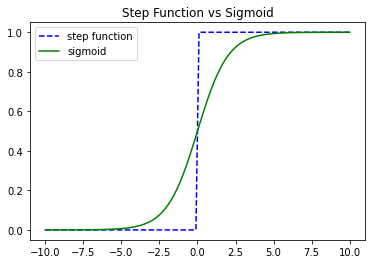

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# step function
def step_function(x):
  return np.where(x >= 0, 1, 0)
  
# sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x)
y_step = step_function(x)

plt.plot(x, y_step, 'b--', label='step function')
plt.plot(x, y_sigmoid, 'g', label='sigmoid')
plt.legend()
plt.title('Step Function vs Sigmoid')
plt.show()

In [ ]:
import math  

def sigmoid(t: float) -> float:
  return 1 / (1 + math.exp(-t))

Why use `sigmoid` instead of the simpler `step_function`? In order to train a neural network, we need  to use calculus, and in order to use calculus, we need smooth functions. `step_function` isn't even continuous, and `sigmoid` is a good smooth approximation of it.

In [ ]:
def neuron_output(weights: Vector, inputs: Vector) -> float:
  # weights includes the bias term, input includes a 1 
  return sigmoid(dot(weights, inputs))

Given this function, we can represent a neuron simply as a vector of weights whose length is one more than the number of inputs to the neuron (because of the bias weight). Then we can represent a neural network as a list of (noninput) layers, where each layer is just a list of the neurons in that layer.

That is, we'll represent a neural network as a list (layers) of lists (neurons) of vectors (weights).

Given such a representation, using the neural network is quite simple:

In [ ]:
from typing import List

def feed_forward(neural_network: List[List[Vector]],
                 input_vector: Vector) -> List[Vector]:
  """
  Feeds the input vector through the neural network.
  Return the outputs of all layers (not just the last one).
  """
  outputs: list[Vector] = []

  for layer in neural_network: 
    input_with_bias = input_vector + [1]                # Add a constant
    output = [neuron_output(neuron, input_with_bias)    # Compute the output
             for neuron in layer]                       # for each neuron.   
    outputs.append(output)                              # Add to results.
  
    # Then the input to the next layer is the output of  this one
    input_vector = output

  return outputs

Now it's eay to build the **XOR gate that we couldn't build with a single perceptron. We just need to scale the weights up so that the `neuron_outputs` are either really close to 0 or really close to 1:

In [ ]:
xor_network = [# hidden layer
              [[20., 20, -30],         # 'and' neuron
               [20., 20, -10]],        # 'or' neuron
              # output layer
              [[-60., 60, -30]]]        # '2nd input but not 1st input' neuron

# feed_forward returns the outputs of all layers,so the [-1] gets the 
# final output, and the [0] gets the value out of the resulting vector

assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0]  < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0]  < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0]  < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0]  < 0.001

For a given input (which is a two-dimensional vector), the hidden layer produces a two-dimensional vector consisting of the "and" of the two input values and the "or" of the two input values.

And the output layer takes a two-dimensional vector and computes "second element but not first element." The result is a network that performs "or, but not and," which is percisely XOR

One suggestive way of thinking about this is that the hidden layer is computing **features** of the input data (in this case "and" and "or") and the output layer is combining those features in a way that generates the desired output.

## **Backpropagation**

Usually **we don't build neural networks by hand.** This is in part because we use them to solve much bigger problems -an imagine recognition problem might involve hundreds or thousands of neurons. And it's in part because we usually won't be abel to "reason out" what the neurons should be.

Instead (as usual) we use data to train neural networks. The typicall approach is an algorithm called backpropagation, which uses gradient descent or one of its variants.

Imagine we have a training set that consists of input vectors and corresponding target output vectors. For example, in out previous `xor_network` example, the input vector [1, 0] corresponded to the target output [1]. Imagine that our network has some set of weights. We then adjust the weights using the following algorithm:

1. Run `feed_forward` on an input vector to produce the outputs of all the neurons in the network.
2. We know the target output, so we can compute a loss that's the sum of the squared errors.
3. Compute the gradient of this loss as a function of the output neuron's weights.
4. "Propagate" the gradients and errors backward to compute the gradients with respect to the hidden neurons' weights.
5. Take a gradient descent step.

Typically we run this algorithm many times for our entire training set until the network converges.

To start with, let's write the function to compute the gradients:

In [ ]:
def sqerror_gradients(network: List[List[Vector]],
                      input_vector: Vector,
                      target_vector: Vector) -> List[List[Vector]]:
  """
  Given a neural network, an input vector, and a target vector,
  make a prediction and compute the gradient of the squared error
  loss with respect to the neuron weights.
  """
  # forward pass
  hidden_outputs, outputs = feed_forward(network, input_vector)

  # gradients with respect to output neuron pre-activation outputs
  output_deltas = [output * (1 - output) * (output - target)
                  for output, target  in zip(outputs, target_vector)]
  
  # gradients with respect to output neuron weights
  output_grads = [[output_deltas[i] * hidden_output
                   for hidden_output in hidden_outputs + [1]]
                  for i, output_neuron in enumerate(network[-1])]
  
  # gradients with respect to hidden neuron pre-activation outputs
  hidden_deltas = [hidden_output * (1 - hidden_output) * 
                   dot(output_deltas, [n[i] for n in network[-1]])
                   for i, hidden_output in enumerate(hidden_outputs)]

  # gradients with respect to hidden neuron weights
  hidden_grads = [[hidden_deltas[i] * input for input in input_vector + [1]]
                  for i, hidden_neuron in enumerate(network[0])]

  return [hidden_grads, output_grads]

The math behid the preceding calculations is not terribly difficult, but it involves some tedious calculus and careul attention to detail.

Armed iwth the ability to compute gradients, we can now train neural networks. Let's try to learn the XOR network we previously designed by hand.

We'll start by generating the training data and initializing our neural network with random weights:

In [ ]:
import random

random.seed(0)

# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

# start with random weights
network = [# hidden layer: 2 inputs -> 2 outputs
           [[random.random() for _ in range(2 + 1)],       # 1st hidden neuron
            [random.random() for _ in range(2 + 1)]],      # 2nd hidden neuron
           # output layer: 2 inputs -> 1 outputs
           [[random.random() for _ in range(2 + 1)]]       # 1st output neuron
           ]

As usual, we can train it using gradient descent. One difference from our previous examples is that here we have several parameter vectors, each with its own gradient, which means we'll have to call `gradient_step` for each of  them. 

In [ ]:
from scratch.gradient_descent import gradient_step
import tqdm

learning_rate = 1.0

for epoch in tqdm.trange(20000, desc="neural net for xor"):
  for x, y in zip(xs, ys):
    gradients = sqerror_gradients(network, x, y)

    # Take a gradient step for each neuron in each layer
    network = [[gradient_step(neuron, grad, -learning_rate)
                for neuron, grad in zip(layer, layer_grad)]
               for layer, layer_grad in zip(network, gradients)]

# check that it learned XOR
assert feed_forward(network, [0, 0])[-1][0] < 0.01
assert feed_forward(network, [0, 1])[-1][0] > 0.99
assert feed_forward(network, [1, 0])[-1][0] > 0.99
assert feed_forward(network, [1, 1])[-1][0] < 0.01

neural net for xor: 100%|██████████| 20000/20000 [00:01<00:00, 11061.39it/s]


In [ ]:
# # the resulting network has weights that look like:

# [ # hidden layer
#   [[7, 7, -3],            # computes OR
#    [5, 5, -8]],           # computes AND
#  #  output layer  
#  [[11, -12, -5]]          # computes "first but not second"
# ]  

# which is conceptually pretty similar to our previous bespoke network

## **Example: Fizz Buzz**

The VP of Engineering wants to interview technical candidates by making them solve "Fizz Buzz" the following well-trod programming challenge:

    Print the numbers 1 to 100, except that if the number is divisible by 3, print "fizz"; 
    if the number is divisible by  5, print "buzz"; and if the number is divisible by 15, 
    print "fizzbuzz".

He thinks the ability to solve this demonstrates extreme programming skill. You think that this problem is so simple that a neural network could solve it.

Neural networks take vectors as inputs and produce vectors as outputs. As stated, the programming problem is to turn an integer into a string. So the first challenge is to come up with a way to recast it as a vector problem.

For the outputs it's not tough: there are basically four classes of outputs, so we can encode the output as a vector of four 0s and 1s:

In [ ]:
def fizz_buzz_encode(x: int) -> Vector:
  if x % 15 == 0:
    return [0, 0, 0, 1]
  elif x % 5 == 0:
    return [0, 0, 1, 0]
  elif x % 3 == 0:
    return [0, 1, 0, 0]
  else: 
    return [1, 0, 0, 0]

assert fizz_buzz_encode(2) == [1, 0, 0, 0]
assert fizz_buzz_encode(6) == [0, 1, 0, 0]
assert fizz_buzz_encode(10) == [0, 0, 1, 0]
assert fizz_buzz_encode(30) == [0, 0, 0, 1]

We' ll use this to generate our target vectors. The input vectors are less obvious. You don't want to just use a one-dimensional vector containing the input number, for a couple of reasons. A single input captures an "intensity," but the fact that 2 is twice as much as 1, and that 4 is twice as much again, doesn't feel relevant to this problem. Additionally, with just one input the hidden layer wouldn't be albe to compute very interesting features, which means it probably wouldn't be able to solve the problem.

It turns out that one thing that works reasonably well is to convert each number to its binary representation of 1s and 0s.

In [ ]:
def binary_encode(x: int) -> Vector:
  binary: List[float] = []

  for i in range(10):
    binary.append(x % 2)
    x = x // 2
  
  return binary
#                             1  2  4  8 16 32 64 128 256 512
assert binary_encode(0)   == [0, 0, 0, 0, 0, 0, 0,  0,  0,  0]
assert binary_encode(1)   == [1, 0, 0, 0, 0, 0, 0,  0,  0,  0]
assert binary_encode(10)  == [0, 1, 0, 1, 0, 0, 0,  0,  0,  0]
assert binary_encode(101) == [1, 0, 1, 0, 0, 1, 1,  0,  0,  0]
assert binary_encode(999) == [1, 1, 1, 0, 0, 1, 1,  1,  1,  1]

As the goal is to construct the outputs for the numbers 1 to 100, it would be cheating to train on those numbers. Therefore, we'll train on the numbers 101 to 1,023 (which is the largest number we can represent with 10 binary digits):

In [ ]:
xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]

Next, let's create a neural network with random initial weights. It will have 10 input neurons (since we're representing our inputs as 10-dimensional vectors) and 4 output neurons (since we're representing our targets as 4-dimensional vectors). We'll give it 25 hidden units, but we'll use a variable for that so it's easy to change:

In [ ]:
NUM_HIDDEN = 25

network = [
    # hidden layer: 10 inputs -> NUM_HIDDEN outputs
    [[random.random() for _ in range(10 + 1)] for _ in range(NUM_HIDDEN)],

    # output layer: NUM_HIDDEN inputs -> 4 outputs
    [[random.random() for _ in range(NUM_HIDDEN + 1)] for _ in range(4)]
]

That's it. Now we're ready to train. Because this is a more involved problem (and there are a lot more thing to mess up), we'd like to closely monitor the training process. In particular, for each epoch we'll track the sum of squared errors and print them out. We want to make sure they decrease:

In [ ]:
from scratch.linear_algebra import squared_distance

learning_rate = 1.0

with tqdm.trange(500) as t:
  for epoch in t:
    epoch_loss = 0.0

    for x, y in zip(xs, ys):
      predicted = feed_forward(network, x)[-1]
      epoch_loss += squared_distance(predicted, y)
      gradients = sqerror_gradients(network, x, y)

      # Take a gradient step for each neuron in each layer
      network = [[gradient_step(neuron, grad, -learning_rate)
                 for neuron, grad in zip(layer, layer_grad)]
                 for layer, layer_grad in zip(network, gradients)]
    
    t.set_description(f"fizz buzz(loss: {epoch_loss:.2f})")

fizz buzz(loss: 29.68): 100%|██████████| 500/500 [03:30<00:00,  2.38it/s]


This will take a while to train, but eventually the loss should start to botom out. 

At last we're ready to solve our original problem. We have one remaining issue. Our network will produce a four-dimensional vector of numbers, but we want a single prediction. We'll do that by taking the `argmax`, which is the index of the largest values:

In [ ]:
def argmax(xs: list) -> int:
  """Returns the index of the largest values"""
  return max(range(len(xs)), key=lambda i: xs[i])

assert argmax([0, -1]) == 0                    # items[0] is largest
assert argmax([-1, 0]) == 1                    # items[1] is largest
assert argmax([-1, 10, 5, 20, -3]) == 3        # items[3] is largest

In [ ]:
num_correct = 0

for n in range(1, 101):
  x = binary_encode(n)
  predicted = argmax(feed_forward(network, x)[-1])
  actual = argmax(fizz_buzz_encode(n))
  labels = [str(n), "fizz", "buzz", "fizzbuzz"]
  print(n, labels[predicted], labels[actual])

  if predicted == actual:
    num_correct += 1

print(num_correct, "/", 100)

1 1 1
2 2 2
3 fizz fizz
4 4 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 20 buzz
21 fizz fizz
22 22 22
23 23 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 64 64
65 buzz buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 80 buzz
81 fizz fizz
82 82 82
83 83 83
84 fizz fizz
85 fizz buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz fizzbu

The trained network gets 96/100 correct, wich is well above the VP of Engineering's hiring threshold. Faced with the evidence, he relents and changes the interview challenge to "Invert a Binary Tree."

# <center><b>Chapter 19. Deep Learning</b></center>

Deep learning originally referred to the application of **"deep" neural networks** (that is, **networks with more than one hidden layer**), although in practice the term now encompasses a wide variety of neural architectures

In this chapter we'l build on our previous work and look at a wider variety of neural networks. To do so, we'll introduce **a number of abstractions** that allow us to think about neural networks in a more general way.


## **The Tensor**

Previously, we made a distinction between
*  **vectors** (one-dimension arrays and 
* **matrices** (two-dimension arrays). 

When we start working with more complicated neural networks, we'll need to use higher-dimensional arrays as well.

In many neural network libraries, **n-dimensional arrays** are referred to **tensors**, which is what we'll call them too. (There are pedantic mathematical resons not to refer to n-dimensional arrays as tensors; if you are such a pedant, your objection is noted)



Here we'll **cheat and say that a Tensor is just a list.** This is true in one direction -all of our vectors and matrices and higher-dimensional analogues are lists. It is certainly not true in the other direction -most Python lists are not n-dimensional arrays in our sense.

We'll just cheat:

    Tensor = list

In [ ]:
Tensor = list

In [ ]:
from typing import List  

def shape(tensor: Tensor) -> List[int]:
  sizes: List[int] = []
  while isinstance(tensor, list):
    sizes.append(len(tensor))
    tensor = tensor[0]
  return sizes


assert shape([1, 2, 3]) == [3]
assert shape([[1, 2], [3, 4], [5, 6]]) == [3, 2]

Because tensors can have any number of dimensions, we'll typically need  to work with them recursively. We'll do one thing in the one-dimensional case and recurse in the higher-dimensional case:

In [ ]:
def is_1d(tensor: Tensor) -> bool:
  """
  If tensor[0] is a list, it's a higher-order  tensor.
  Otherwise, tensor is 1-dimensional (that is, a vector).
  """
  return not isinstance(tensor[0], list)


assert is_1d([1, 2, 3])
assert not is_1d([[1, 2], [3, 4]])

In [ ]:
def tensor_sum(tensor: Tensor) -> float:
  """Sums up all the values in the tensor"""
  if is_1d(tensor):
    return sum(tensor)                  # just a list of floats, use Python sum 
  else:
    return sum(tensor_sum(tensor_i)     # Call tensor_sum on each row
              for tensor_i in tensor)   # and sum up those results.

assert tensor_sum([1, 2, 3]) == 6
assert tensor_sum([[1, 2,], [3, 4]])  == 10

If you're not used to thinking recursively, you should ponder this until it makes sense, because we'll use the same logic throughout this chapter. However, we'll create a couple of helper functions so that we don't have to rewrite the logic every where. The first applies a function elementwise to a single tensor:

In [ ]:
from typing import Callable  

def tensor_apply(f: Callable[[float], float], tensor: Tensor) -> Tensor:
  """Applies f elementwise"""
  if is_1d(tensor):
    return [f(x) for x in tensor]
  else:
    return [tensor_apply(f, tensor_i) for tensor_i in tensor]


assert tensor_apply(lambda x: x + 1, [1, 2, 3]) == [2, 3, 4]
assert tensor_apply(lambda x: 2 * x, [[1, 2], [3, 4]]) == [[2, 4], [6, 8]]

We can use this to write a function that creates a zero tensor with the same shape as a given tensor:

In [ ]:
def zeros_like(tensor: Tensor) -> Tensor:
  return tensor_apply(lambda _ : 0.0, tensor)


assert zeros_like([1, 2, 3]) == [0, 0, 0]
assert zeros_like([[1, 2], [3, 4]]) == [[0, 0], [0, 0]]

We'll also need to appy a function to corresponding elements from two tensors (which had better be the exact same shape, although we won't check that):

In [ ]:
def tensor_combine(f: Callable[[float, float], float],
                   t1: Tensor,
                   t2: Tensor) -> Tensor:
  """Applies f to corresponding elements of t1 and t2"""
  if is_1d(t1):
    return [f(x, y) for x, y in zip(t1 ,t2)]
  else:
    return [tensor_combine(f, t1_i, t2_i)
            for t1_i, t2_i in zip(t1, t2)]

import operator
assert tensor_combine(operator.add, [1, 2, 3], [4, 5, 6]) == [5, 7, 9]
assert tensor_combine(operator.mul, [1, 2, 3], [4, 5, 6]) == [4, 10, 18]

## **The Layer Abstraction**

In the previous chapter we built a simple neural net that allowed us to stack two layers of neurons, each of which computed `sigmoid(dot(weights, inputs))`.

Although that's perhaps an idealized representation of what an actual neuron does, in practice we'd like to allow a wider variety of things. Perhaps we'd like the neurons to remember something about their previous inputs. Perhaps we'd like to use a different activation function than `sigmoid`. And frequently we'd like to use more than two layers. (Our `feed_forward` function actually handled any number of layers, but our gradient computations did not.)

In this chapter we'll build machinery for implementing such a **variety of neural networks**. Our fundamental abstraction will be the `Layer`, something that knows how to apply some function to its inputs and that knows how to backpropagate gradients.

One way of thinking about the neural networks we built in Chapter 18 is as a "linear" layer, followed by a "sigmoid" layer, then another linear layer and another sigmoid layer. We didn't distinguish them in these terms, but doing so will allow us to experiment with much more general structures:

In [ ]:
from typing import Iterable, Tuple

class Layer:
  """
  Our neural networks will be composed of Layers, each of which 
  knows how to do some computation on its inputs in the "forward"
  direction and propagate gradients in the "backward" direction.
  """

  def forward(self, input):
    """
    Note that lack of types. We're not going to be prescriptive
    about what kinds of inputs layers can take and what kinds 
    of outputs they can return.
    """
    raise NotImplementedError

  def backward(self, gradient):
    """
    Similary, we're not going to be prescriptive about what the
    gradient looks like. It's up to you the user to make sure
    that you're doing things sensibly.
    """
    raise NotImplementedError

  def params(self) -> Iterable[Tensor]:
    """
    Returns the parameters of this layer. The default implementation
    returns noting, so that if you have a layer with no parameters
    you don't have to implement this.
    """
    return ()

  def grads(self) -> Iterable[Tensor]:
    """
    Returns the gradients, in the same or der as params().
    """
    return ()

There are a couple of things to notice here. One is that during the forward pass we saved the computed sigmoids so that we could use them later in the backward pass. Our layers will typically need to do this sort of thing.

Second, you may be wondering where the `sig * (1 - sig) * grad` comes from. This is just the chain rule from calculus and corresponds to the `output * (1 - output) * (output - target)` term in our previous neural networks.

Finally, you can see how we were able to make use of the `tensor_apply` and the `tensor_combine` functions. Most of our layers will use these functions similarly.

## **The Linear Layer**

The other piece we'll need to duplicate the neural networks from chapter 18 is a "linear" layer that represents the `dot(weights, inputs)` part of the neurons.

This layer will have parameters, which we'd like to initialize with random values.

It turns out that the initial parameter values can make a huge difference in how quickly (and sometimes wheter) the network trains. If weights are too big, they may produce large outputs in a range where the activation function has near-zero gradients. And parts of the network that have zero gradients necessarily can't learn anyting via gradient descent.

Accordingly, we'll implement three different schemes for randomly generating our weight tensors. The first is to choose each value from the random uniform distribution on [0, 1] - that is, as a `random.random()`. The second (and default) is to choose each value randomly from a standard normal distribution. And the thrid is to use Xavier initialization, where each weight is initialized with a random draw from a normal distribution with mean 0 and variance 2 / (num_inputs + num_outputs). It turns out this often works nicely for neural network weights. We'll implement these with `random_uniform` function and a `random_normal` function:

In [ ]:
import random  
from scratch.probability import inverse_normal_cdf  

def random_uniform(*dims: int) -> Tensor:  
  if len(dims) == 1:
    return [random.random() for _ in range(dims[0])]
  else:
    return [random_uniform(*dims[1:]) for _ in range(dims[0])]

def random_normal(*dims: int,
                  mean: float = 0.0,
                  variance: float = 1.0) -> Tensor:
  if len(dims) == 1:
    return [mean + variance * inverse_normal_cdf(random.random())
            for _ in range(dims[0])]
  else:
    return [random_normal(*dims[1:], mean=mean, variance=variance)
            for _ in range(dims[0])]

assert shape(random_uniform(2, 3, 4)) == [2, 3, 4]
assert shape(random_normal(5, 6,  mean=10)) == [5, 6]

And then wrap them all in a `random_tensor` function:

In [ ]:
def random_tensor(*dims: int, init: str = 'normal') -> Tensor:
  if init == 'normal':
    return random_normal(*dims)
  elif init == 'uniform':
    return random_uniform(*dims)
  elif init == 'xavier':
    variance = len(dims) / sum(dims)
    return random_normal(*dims, variance=variance)
  else:
    raise ValueError(f"unknown init: {init}")

Now we can fefine our linear layer. We need to initialize it with the dimension of the inputs (which tells us how many weights each neuron needs), the dimension of the outputs (which tells us how many neurons we should have), and the initialization scheme we want:

In [ ]:
from scratch.linear_algebra import dot   

class Linear(Layer):
  def __init__(self, 
               input_dim: int,
               output_dim: int,
               init: str = 'xavier') -> None:
    """
    A layer of output_dim neuons, each with input_dim weights
    (and a bias).
    """
    self.input_dim = input_dim
    self.output_dim = output_dim

    # self.w[0] is the weights for the oth neuron
    self.w = random_tensor(output_dim, input_dim, init=init)

    # self.b[0] is the bias fo the oth neuron 
    self.b = random_tensor(output_dim, init=init)

The **forward** method is easy to implement. We'll get one output per neuron, which we stick in a vector. And each neuron's output is just the dot of its weights with the input, plus its bias:

In [ ]:
def forward(self, input: Tensor) -> Tensor:
  # Savethe input to use in the backward pass.
  self.input = input

  # Return the vector of neuron outputs.
  return [dot(input, self.w[o]) + self.b[o]
          for o in range(self.output_dim)]

The backward method is more involved, bu if you know calculus it's not difficult:

In [ ]:
def backward(self, gradient: Tensor) -> Tensor:
  # Each b[o] gets added to output[o], which means
  # the gradient of b is the same as the output gradient.
  self.b_grad = gradient  

  # Each w[o][i] muliples input[i] and gets added to output[o].
  # So its gradient is input[i] * gradient[o]
  self.w_grad = [[self.input[i] * gradient[o]
                  for i in range(self.input_dim)]
                 for o in range(self.output_dim)]

  # Each input[i] multiplies every w[o][i] and gets added to every 
  # output[o]. So its gradient is the sum of w[o][i] * gradient[o]
  # across all the outputs.
  return [sum(self.w[o][i] * gradient[o] for o in
              range(self.output_dim))
              for i in  range(self.input_dim)]

Finally, here we do need to implement `params` and `grads`. We have two parameters and two corresponding gradients:



In [ ]:
def params(self) -> Iterable[Tensor]:
  return [self.w, self.w]


def grad(self) -> Iterable[Tensor]:
  return [self.w_grad, self.b_grad]

put it together

In [ ]:
class Linear(Layer):
  def __init__(self, input_dim: int, output_dim: int, init: str = 'xavier') -> None:
    """
    A layer of output_dim neurons, each with input_dim weights
    (and a bias).
    """
    self.input_dim = input_dim
    self.output_dim = output_dim

    # self.w[o] is the weights for the o-th neuron
    self.w = random_tensor(output_dim, input_dim, init=init)

    # self.b[o] is the bias term for the o-th neuron
    self.b = random_tensor(output_dim, init=init)

  def forward(self, input: Tensor) -> Tensor:
    # Save the input to use in the backward pass.
    self.input = input

    # Return the vector of neuron outputs.
    return [dot(input, self.w[o]) + self.b[o]
            for o in range(self.output_dim)]

  def backward(self, gradient: Tensor) -> Tensor:
    # Each b[o] gets added to output[o], which means
    # the gradient of b is the same as the output gradient.
    self.b_grad = gradient

    # Each w[o][i] multiplies input[i] and gets added to output[o].
    # So its gradient is input[i] * gradient[o].
    self.w_grad = [[self.input[i] * gradient[o]
                    for i in range(self.input_dim)]
                    for o in range(self.output_dim)]

    # Each input[i] multiplies every w[o][i] and gets added to every
    # output[o]. So its gradient is the sum of w[o][i] * gradient[o]
    # across all the outputs.
    return [sum(self.w[o][i] * gradient[o] for o in range(self.output_dim))
            for i in range(self.input_dim)]

  def params(self) -> Iterable[Tensor]:
    return [self.w, self.b]

  def grads(self) -> Iterable[Tensor]:
    return [self.w_grad, self.b_grad]

## **Neural Networks as a Sequence of Layers**

We'd like to think of neural networks as sequences of layers, so let's come up with a way to combine multiple layers into one. The resulting neural network is itself a layer, and it implements the Layer methods in the obvious ways:

In [ ]:
from typing import List   

class Sequential(Layer):
  """
  A layer consisting of a sequence of other layers.
  It's up to you to make sure that the output of each layer
  makes sense as the input to the next layer.
  """
  def __init__(self, layers: List[Layer]) -> None:
    self.layers = layers

  def forward(self, input):
    """Just forward the input through the layers in order."""
    for layer in self.layers:
      input = layer.forward(input)
    return input

  def backward(self, gradient):
    """Just backpropagate the gradient through the layers in reverse."""
    for layer in reversed(self.layers):
      gradient = layer.backward(gradient)
    return gradient

  def params(self) -> Iterable[Tensor]:
    """Just return the params from each layer."""
    return (param for layer in self.layers for param in layer.params())

  def grads(self) -> Iterable[Tensor]:
    """Just return the grads from each layer."""
    return (grad for layer in self.layers for grad in layer.grads())

So we could represent the neural network we used for XOR as:


In [ ]:
xor_net = Sequential([
                  Linear(input_dim=2, output_dim=2),
                  Sigmoid(),
                  Linear(input_dim=2, output_dim=1),
                  Sigmoid(),
])

But we still need a little more machinery to train it.

## **Loss and Optimization**

Previously we wrote out individual loss functions and gradient functions for our models. Here we'll want to experiment with different loss functions, so (as usual) we'll introduce a new Loss abstraction that encapsulates both the loss computation and the gradient computation:

In [ ]:
class Loss:
  def loss(self, predicted: Tensor, actual: Tensor) -> float:
    """How good are our predictions? (Larger numbers are worse.)"""
    raise NotImplementedError

  def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
    """How does the loss changes as the predictions change?"""
    raise NotImplementedError   

We've already worked many times with the loss that's the sum of the squared errors, so we should have an easy time implementing that. The only trick is that we'll need to use `tensor_combine`:

In [ ]:
class SEE(Loss):
  """Loss function that computes the sum of the squared errors."""
  def loss(self, predicted: Tensor, actual: Tensor) -> float:
    # Compute the tensor of squared differences
    squared_errors = tensor_combine(
                            lambda predicted, actual: (predicted - actual) ** 2,
                            predicted,
                            actual)
    
    # And just add them up
    return tensor_sum(squared_errors)
  
  def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
    return tensor_combine(
                          lambda predicted, actual: 2 * (predicted - actual),
                          predicted,
                          actual)

(We'll look at a different loss function in a bit.)

The last piece to figure out is gradient descent. Throughout the book we've done all of our gradient descent manually by having a training look that involves someting like:

    theta = gradient_step(theta, grad, -learning_rate)

Here that won't quite work for us, for a couple reasons. The first is that our neural nets will have many parameters, and we'll need to update all of them. The second is that we'd like to be able to use more clever variants of gradient descent, and we don't want to have to rewrite them each time.

Accordingly, we'll introduce a (you guessed it) `Optimizer` abstraction, of which gradient descent will be a specific instance:

In [ ]:
class Optimizer:
  """
  An optimizer updates the weights of a layer (in place) using information
  known by either the layer or the optimizer (or by both).
  """
  def step(self, layer: Layer) -> None:
    raise NotImplementedError

Afther that it's easy to implement gradient descent, again using `tensor_combine`"


In [ ]:
class GradientDescent(Optimizer):
  def __init__(self, learning_rate: float = 0.1) -> None:
    self.lr = learning_rate  

  def step(self, layer: Layer) -> None:
    for param, grad in zip(layer.params(), layer.grads()):
      # Update param using a gradient step 
      param[:] = tensor_combine(
                                lambda param, grad: param - grad * self.lr,
                                param,
                                grad)

The only thing that 's maybe surprising is the "slice assignment," which is a reflection of the fact that reassigning a list doesn't change its original value. That is, if you just did `param = tensor_combine(...)`, you would be redefining the local variable `param`, but you would not be affectng the original parameter tensor stored in the layer. If you assign to the slice [:], however, it actually changes the values inside the list.

Here 's a simple example to demonstrate:

In [ ]:
tensor = [[1, 2], [3, 4]]

for row in tensor:
  row = [0, 0]

assert tensor == [[1, 2], [3, 4]], "assignment doesn't update a list"

In [ ]:
for row in tensor:
  row[:] = [0, 0]

assert tensor == [[0, 0], [0, 0]], "but slice assignment does"

If you are somewhat inexperienced in Python, this behavior may be surprising, os mediate on it and try examples yourself until it makes sense.

To demonstrate the value of this abstraction, let's implement another optimizer that uses `momentum`. The idea is that we don't want to overreact to each new gradient, and so we maintain a running average of the gradients we've seen updating it with each new gradient and taking a step in the direction of the average:

In [ ]:
class Momentum(Optimizer):
  def __init__(self, 
               learning_rate: float, 
               momentum: float = 0.9) -> None:
    self.lr = learning_rate
    self.mo = momentum
    self.updates: List[Tensor] = [] # running average

  def step(self, layer: Layer) -> None:
    # If we have no previous updates, start with all zeros
    if not self.updates:
      self.updates = [zeros_like(grad) for grad in layer.grads()]

    for update, param, grad in zip(self.updates,
                                   layer.params(),
                                   layer.grads()):
      
      # Apply momentum
      update[:] = tensor_combine(
                                  lambda u, g: self.mo * u + (1 - self.mo) * g,
                                 update,
                                 grad)
      
      # Then take a gradient step
      param[:] = tensor_combine(
                                lambda p, u: p - self.lr* u,
                                param, 
                                update)

Becaue we used an `Optimizer` abstraction, we can easily switch between our different optimizers.

## **Example: XOR Revisited**

Let's see how easy it is to use our new framework to train a network that can compute XOR. We start by re-creating the training data:

In [ ]:
# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]

and then we define the network, although now we can leave off the last sigmoid layer:



In [ ]:
from scratch.deep_learning import Sigmoid

random.seed(0)

net = Sequential([
                  Linear(input_dim=2, output_dim=2),
                  Sigmoid(),
                  Linear(input_dim=2, output_dim=1)])

We can now write a simple training loop, except that now we can use the abstractions of `Optimizer` and `Loss`. This allows us to easily try different ones:

In [ ]:
import tqdm

optimizer = GradientDescent(learning_rate=0.1)
loss = SSE()

with tqdm.trange(3000) as t:
  for epoch in t:
    epoch_loss = 0.0

    for x, y in zip(xs, ys):
      predicted = net.forward(x)
      epoch_loss += loss.loss(predicted, y)
      gradient = loss.gradient(predicted, y)
      net.backward(gradient)
      optimizer.step(net)
  
  t.set_description(f"xor loss {epoch_loss:.3f}")

100%|██████████| 3000/3000 [00:00<00:00, 6686.67it/s]


This should train quickly, and you should see the loss go down. And now we can inspect the weights:

In [ ]:
for param in net.params():
  print(param)

[[-1.6425160695224101, -1.4948117798303153], [-4.567646572029667, -3.3649176350731924]]
[1.7673716823255166, 0.38727014379473046]
[[3.198620479170406, -3.5018030621426175]]
[-0.6462765963362207]


For my network i find roughly:

    hidden1 = -2.6 * x1 + -2.7 * x2 + 0.2 # NOR
    hidden2 =  2.1 * x1 +  2.1 * x2 - 3.4 # AND
    output =  -3.1 * h1 + -2.6 * h2 + 1.8 # NOR 

So `hidden1` activates if neither input is 1. `hidden2` activates if both inputs are 1. An `output` activates if neither hidden output is 1 -this is, if it's not the case that neither input is 1 and it's also not the case the both inputs are 1. Indeed, this is exactly the logic of XOR

Notice that this network learned different features that the one we trained in Chapter 18, but it still manages to do the same thing.

## **Other Activation Functions**

The `sigmoid` function has fallen out of favor for a couple of reasons. One reason is the `sigmoid(0)` equals 1/2, which means that a neuron whose inputs sum to 0 has a positive output. Anothe ris that its gradient is very close to 0 for very large and very small inputs, which means that its gradients can get "saturated" and its weights can get stuck.

One popular replace ment is `tanh` ("hyperbolic tangent"), which is different sigmoid-shaped function that ranges from -1 to 1 and outputs 0 if its input is 0. The derivative of tanh(x) is just 1 - tanh(x) \*\* 2, which makes the layer easy to write:

In [ ]:
import math   

def tanh(x: float) -> float:
  # If x is very large or very small, tanh is (essentially) 1 or -1.
  # We check for this because, e.g., math.exp(1000) raise an error.
  if x < -100: return -1
  elif x > 100: return 1

  em2x = math.exp(-2 * x)
  return (1 - em2x) / (1 + em2x)


class Tanh(Layer):
  def forward(self, input: Tensor) -> Tensor:
    # Save tanh output to use in backward pass.
    self.tanh = tensor_apply(tanh, input)
    return self.tanh

  def backward(self, gradient: Tensor) -> Tensor:
    return tensor_combine(
                        lambda tanh, grad: (1 - tanh ** 2) * grad,
                        self.tanh,
                         gradient)

In larger networks another popular replacement is `Relu`, which is 0 for negative inputs and the identity for positive inputs:

In [ ]:
class Relu(Layer):
  def forward(self, input: Tensor) -> Tensor:
    self.input = input
    return tensor_apply(lambda x: max(x, 0), input)

  def backward(self, gradient: Tensor) -> Tensor:
    return tensor_combine(lambda x, grad: grad if x > 0 else 0,
                          self.input,
                          gradient)

## **Example: FizzBuzz Revisited**

We can now use our "deep learning" framework to reproduce our solution from "Example: Fizz Buzz". Let's set up the data:

In [ ]:
from scratch.neural_networks import binary_encode, fizz_buzz_encode, argmax 

xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]


NUM_HIDDEN = 25

random.seed(0)

net = Sequential([
                  Linear(input_dim=10, output_dim=NUM_HIDDEN, init='uniform'),
                  Tanh(),
                  Linear(input_dim=NUM_HIDDEN, output_dim=4, init='uniform'),
                  Sigmoid()
])

In [ ]:
def fizzbuzz_accuracy(low: int, hi: int, net: Layer) -> float:
  num_correct = 0
  for n in range(low, hi):
    x = binary_encode(n)
    predicted = argmax(net.forward(x))
    actual = argmax(fizz_buzz_encode(n))
    if predicted == actual:
      num_correct += 1

  return num_correct / (hi - low)

In [ ]:
optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SSE()

with tqdm.trange(1000) as t:
  for epoch in t:
    epoch_loss = 0.0

    for x, y in zip(xs, ys):
      predicted = net.forward(x)
      epoch_loss += loss.loss(predicted, y)
      gradient = loss.gradient(predicted, y)
      net.backward(gradient)

      optimizer.step(net)

  accuracy = fizzbuzz_accuracy(101, 1024, net)
  t.set_description(f"fb loss: {epoch_loss:.2f} acc: {accuracy:.2f}")

# Now check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))

100%|██████████| 1000/1000 [14:37<00:00,  1.14it/s]

test results 0.9


After 1,000 training iterations, the model gets 90% accuracy on the test set; if you keep training it longer, it should do even better. (I don't think it's possible to train to 100% accuracy with only 25 hidden units, but it's definitely possible if you go up to 50 hidden units.)

## **Softmaxes and Cross-Entropy**

The neural net we used in the previous section ended in `Sigmoid` layer, which means that its output was a vector of numbers between 0 and 1. In particular, it could output a vector that was entirely 0s, or it could output a vector that was entirely 1s. Yet when we're doing classification problems, we'd like to output a 1 for the correct class and a 0 for all the incorrect classes. Generally our predictions will not be so perfect, but we'd at least like to predict an actual probability distribution over the classes.

For example, if we have two classes, and our model outputs [0, 0], it's hard to make much sense of that. It doesn't think the output belongs i neither class

But if our model outputs [0.4, 0.6], we can interpret it as a prediction that there's a probability of 0.4 that our input belongs to the first class and 0.6 that our input belongs to the second class.

In order to accomplish this, we typically forgo the final `Sigmoid` layer and instead use the `softmax` function, which converts a vector of real numbers to a vector of probabilities. We conpute `exp(x)` for each number in the vector, which results in a vector of positive numbers. After that, we just divide each of those positive numbers by the sum, which gives us a bunch of positive numbers that add up to 1 -this is, a vector of probabilities.

If we ever end up trying to compute, say, `exp(1000)` we will get a Python error, so before taking the exp we subtract off the largest value. This turns out to result in the same probabilities; it's just safer to compute in Python:

In [ ]:
def softmax(tensor: Tensor) -> Tensor:
  """Softmax along the last dimension"""
  if is_1d(tensor):
    # Subtract largest value for numerical stability
    largest = max(tensor)
    exps = [math.exp(x - largest) for x in tensor]

    sum_of_exps = sum(exps)                       # This is the total "weight". 
    return [exp_i / sum_of_exps                   # Probability is the fraction
            for exp_i in exps]                    # of the total weight.
  else:
    return [softmax(tensor_i) for tensor_i in tensor]

Once our network produces probabilities, we often use a different loss function called **cross-entropy** (or sometimes "negative log likelihood")

You may recall that in "Maximum Likelihood Estimation", we justified the use of least squares in linear regression by appealing to the fact that (under certain assumptions) the least squares coefficients maximized the likelihood of the observed data.

Here we can do something similar: if our network outputs are probabilities, the cross-entropy loss represents the negative log likelihood of the observed data, which means that minimizing that loss is the same as maximizing the log likelihood (and hence the likelihood) of the training data.

Typically we won't include the `softmax` function as part of the neural network itself. This is because it turns out that if `softmax` is part of your loss function but not part of the network itself, the gradients of the loss with respect to the network outputs are very easy to compute.

In [ ]:
class SoftmaxCrossEntropy(Loss):
  """
  This is the negative-log-likelihood of the observed values, given the
  neural net model. So if we choose weights to minimize it, our model will
  be maximizing the likelihood of the observed data.
  """
  def loss(self, predicted: Tensor, actual: Tensor) -> float:
    # Apply softmax to get probabilities
    probabilities = softmax(predicted)

    # This will be log p_i for the actual class i and 0 for the other
    # classes. We add a tiny amount to p to avoid taking log(0).
    likelihoods = tensor_combine(lambda p, act: math.log(p + 1e-30) * act,
                                 probabilities,
                                 actual)
    
    # And then we just sum up the negatives.
    return -tensor_sum(likelihoods)

  def gradient(self, predicted: Tensor, actual: Tensor) -> Tensor:
    probabilities = softmax(predicted)

    # Isn't this a pleasant equation?
    return tensor_combine(lambda p, actual: p - actual,
                          probabilities,
                          actual)

If I now trian the same Fizz Buzz network using `SoftmaxCrossEntropy` loss, I find that it typically trains much faster (that is, in many fewer epochs). Presumably this is because it is much easier to find weights that `softmax` to a given distribution that it is to find weights that `sigmoid` to a given distribution.

That is, if I need to predict class 0 (a vector with a 1 in the first position and 0s in the remaining positions), in the linear + sigmoid case I need the first output to be a large positive number and the remaining outputs to be large negative numbers. In the `softmax` case, however, I just need the first output to be larger than the remaining outputs. Clearly there are a lot more ways for the second case to happen, which suggests that it should be easier to find weights that make it so:

In [ ]:
random.seed(0)

net = Sequential([
                  Linear(input_dim=10, output_dim=NUM_HIDDEN, init='uniform'),
                  Tanh(),
                  Linear(input_dim=NUM_HIDDEN, output_dim=4, init='uniform')
                  # No final sigmoid layer now
])


In [ ]:
optimizer = Momentum(learning_rate=0.1, momentum=0.9)
loss = SoftmaxCrossEntropy()

with tqdm.trange(100) as t:
  for epoch in t:
    epoch_loss = 0.0

    for x, y in zip(xs, ys):
      predicted = net.forward(x)
      epoch_loss += loss.loss(predicted, y)
      gradient = loss.gradient(predicted, y)
      net.backward(gradient)

      optimizer.step(net)
    
    accuracy = fizzbuzz_accuracy(101, 1024, net)
    t.set_description(f"fb loss: {epoch_loss:.3f} acc: {accuracy:.2f}")

# Again check results on the test set
print("test results", fizzbuzz_accuracy(1, 101, net))

fb loss: 6.116 acc: 1.00: 100%|██████████| 100/100 [01:02<00:00,  1.59it/s]

test results 0.97


## **Dropout**

Like most machine learning models, neural networks are prone to overfitting to their training data. We've previously seen ways to ameliorate this; for example, in "Regularization" we penalized large weights and that helped prevent overfitting.

A common way of regularizing neural networks is using dropout. At training time, we randomly turn off each neuron (that is, replace its output with 0) with some fixed probability. This means that the network can't learn to depend on any individual neuron, which seems to help with overfitting. At evaluation time, we don't want to dropout any neurons, so a `Dropout` layer will need to know whether it's training or not. In addition, at training time a `Dropout` layer only passes on some random fraction of its input. To make its output comparable during evaluation, we'll scale down the outputs (uniformly) using that same fraction:

In [ ]:
class Dropout(Layer):
  def __init__(self, p: float) -> None:
    self.p = p
    self.train = True  

  def forward(self, input: Tensor) -> Tensor:
    if self.train:
      # Crate a mask of 0s and 1s shaped like the input
      # using the specified probability.
      self.mask = tensor_apply(
                                lambda _: 0 if random.random() < self.p else 1,
                               input)
      # Multiply by the mask to dropout inputs.
      return tensor_combine(operator.mul, input, self.mask)
    else:
      # During evaluation just scale down the outputs uniformly
      return tensor_apply(lambda x: x * (1 - self.p), input)

  def backward(self, gradient: Tensor) -> Tensor:
    if self.train:
      # Only progagate the gradients where mask == 1.
      return tensor_combine(operator.mul, gradient, self.mask)
    else:
      raise RuntimeError("don't call backward when not in train mode")

We'll use this to help prevent our deep learning models from overfitting.

## **Example: MNIST**

**MNIST** is a dataset of handwritten digits that everyone uses to learn deep learning.

It is available in a somewhat tricky binary format, so we'll install the `mnist` library to work with it.



In [ ]:
pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mnist

# This will download the data; change this to where you want it.
# (Yes, it's a 0-argument function, that's what the library expects.)
# (Yes, I'm assigning a lambda to a variable, like I said never to do.)

mnist.temporary_dir = lambda: '/tmp'

# Each of these functions first downloads the data and returns a numpy array.
# We call .tolist() because our "tensors" are just lists

train_images = mnist.train_images().tolist()
train_labels = mnist.train_labels().tolist()

assert shape(train_images) == [60000, 28, 28]
assert shape(train_labels) == [60000]

Let's plot the first 100 training images to see what they look like

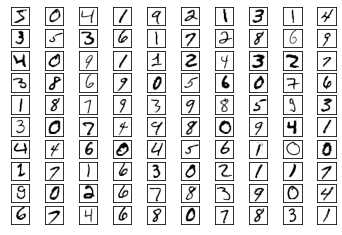

In [ ]:
import matplotlib.pyplot as plt  

fig, ax = plt.subplots(10, 10)

for i in range(10):
  for j in range(10):
    # Plot each image in black and white and hide the axes.
    ax[i][j].imshow(train_images[10 * i + j], cmap='Greys')
    ax[i][j].xaxis.set_visible(False)
    ax[i][j].yaxis.set_visible(False)

plt.show()

In [ ]:
test_images = mnist.test_images().tolist()
test_labels = mnist.test_labels().tolist()

assert shape(test_images) == [10000, 28, 28]
assert shape(test_labels) == [10000]

Each image is 28 X 28 pixels, but our linear layers can only deal with one-dimensional inputs, so we'll just flatten them (and also divide by 256 to get them between 0 and 1). In addition, our neural net will train better if our inputs are 0 on average, so we'll substract out the average value:

In [ ]:
# Compute the average pixel value
avg = tensor_sum(train_images) / 60000 / 28 / 28

# Recenter, rescale, and flatten
train_images = [[(pixel - avg) / 256 for row in image for pixel in row]
                for image in train_images]

test_images = [[(pixel - avg) / 256 for row in image for pixel in row]
               for image in test_images]

assert shape(train_images) == [60000, 784], "images should be flattened"
assert shape(test_images) == [10000, 784], "images should be flattened"

# After centering, average pixel should be very close to 0
assert -0.0001 < tensor_sum(train_images) < 0.0001

We also want to one-hot-encode the targets, since we have 10 outputs. First let's write a `one_hot_encode` function:

In [ ]:
def one_hot_encode(i: int, num_labels: int = 10) -> List[float]:
  return [1.0 if j == i else 0.0 for j in range(num_labels)]

assert one_hot_encode(3) == [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
assert one_hot_encode(2, num_labels=5) == [0, 0, 1, 0, 0]

and then apply it to our data:

In [ ]:
train_labels = [one_hot_encode(label) for label in train_labels]
test_labels = [one_hot_encode(label) for label in test_labels]

assert shape(train_labels) == [60000, 10]
assert shape(test_labels) == [10000, 10]

It will make a pass through our data, track performance, and (if we passed in an optimizer) update our parameters:

In [ ]:
import tqdm  

def loop(model: Layer, 
         images: List[Tensor],
         labels: List[Tensor],
         loss: Loss, 
         optimizer: Optimizer = None) -> None:
  correct = 0                              # Track number of correct predictions
  total_loss = 0.0                         # Track total loss.

  with tqdm.trange(len(images)) as t:
    for i in t:
      predicted = model.forward(images[i])                  # Predict.
      if argmax(predicted) == argmax(labels[i]):            # Check for
        correct += 1                                        # correctness
      total_loss += loss.loss(predicted, labels[i])         # Compute loss.

      # If we're training, backpropagate gradient and update weights.
      if optimizer is not None:
        gradient = loss.gradient(predicted, labels[i])
        model.backward(gradient)
        optimizer.step(model)

      # And update our metrics in the progress bar.
      avg_loss = total_loss / (i + 1)
      acc = correct / (i + 1)
      t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

As a baseline, we ca nuse our deep learning library to train a (multiclass) logistic regression model, which is just a single linear layer followed by a softmax. This model (in essence) just looks for 10 linear functions such that if the input represents, say, a 5, then the 5th linear function produces the largest output.

One pass through our 60,000 training examples should be enough to learn the model:

In [ ]:
random.seed(0)

# Logistic regression is just a linear layer followed by softmax
model = Linear(784, 10)
loss = SoftmaxCrossEntropy()

# This optimizer seems to work
optimizer = Momentum(learning_rate=0.01, momentum=0.99)

# Train on the training data
loop(model, train_images, train_labels, loss, optimizer) 

# Test on the test data (no optimizer means just evaluate)
loop(model, test_images, test_labels, loss)

mnist loss: 0.361 acc: 0.891: 100%|██████████| 10000/10000 [00:54<00:00, 184.40it/s]


This gets about 89% accuracy. Let's see if we can do better with a deep neural network. We'll use two hidden layers, the first with 30 neurons, and the second with 10 neurons. And we'll use our `Tanh` activation:

In [ ]:
random.seed(0)

# Name them so we can turn train on and off 
dropout1 = Dropout(0.1)
dropout2 = Dropout(0.1)

model = Sequential([
                    Linear(784, 30),    # Hidden layer 1: size 30
                    dropout1,
                    Tanh(),
                    Linear(30, 10),     # Hidden layer 2: size 10
                    dropout2,
                    Tanh(),
                    Linear(10, 10)      # Output layer: size 10
])

And we can just use the same training loop!

In [ ]:
optimizer = Momentum(learning_rate=0.01, momentum=0.99)
loss = SoftmaxCrossEntropy() 

# Enable dropout and train (takes > 20 minutes)
dropout1.train = dropout2.train = True
loop(model, train_images, train_labels, loss, optimizer)

# Disable dropout and evaluate
dropout1.train = dropout2.train = False
loop(model, test_images, test_labels, loss)

mnist loss: 0.313 acc: 0.908: 100%|██████████| 10000/10000 [01:12<00:00, 138.16it/s]


Our deep model gets better than 92% accuracy on the test set, which is a nice improvemetn from the simple logistic model.

The **MNIST website** describes a variety of models that outperform these. Many of them could be implemented using the machinery we've developed so far but would take an extremely long time to train in our lists-as-tensors framework. Some of the bast models involve convolutional layers.

## **Saving and Loading Models**

These models take a long time to train, so it would be nice if we could save them so that we don't have to train them every time. Luckily, we can use the json module to easily serialize model weights to a file.

For saving, we can use `Layer.params` to collect the weights, stick them in a list, and use `json.dump` to save that list to a file:

In [ ]:
import json

def save_weights(model: Layer, filename: str) -> None:
  weights = list(model.params())
  with open(filename, 'w') as f:
    json.dump(weights, f)

Loading the weights back is only a little more work. We just use `json.load` to get the list of weights back from the file and slice assignment to set the weights of our model.

(In particular, this means that we have to instantiate the model ourselves and then load the weights. An alternative approach would be to also save some representation of the model architecture and use that to instantiate the model. That's not a terrible idea, but it would require a lot more code and changes to all our `Layers`, so we'll stick with the simply way.)

Before we load the weights, we'd like to check that they have the same shapes as the model params we're loading them into. (This is a safeguard against, for example, trying to load the weights for a saved deep network into a shallow network, or similar issues.)

In [ ]:
def load_weights(model: Layer, filename: str) -> None:
  with open(filename) as f:
    weights = json.load(f)

  # Check for consistency
  assert all(shape(param) == shape(weight)
            for param, weight in zip(model.params(), weights))
  
  # Then load using slice assignment
  for param, weight in zip(model.params(), weights):
    param[:] = weight

# <center><b>Chapter 20. Clustering</b></center>

**Clustering** is an example of **unsupervised learning**, in which we work with **completely unlabeled data** (or in which our data has labels but we ignore them).

## **The Idea**

Whenever you look at some source of data, it's likely that **the data will somehow form clusters**.
*  A dataset showing **where millionaires live probably has clusters in places** like Beverly Hills and Manhattan. 
* A dataset showing **how many hours people work each week probably has a cluster around 40** (and if it's taken from a state with laws mandating special benerits for people who work at least 20 hours a week, it probably has another cluster right around 19). 
* A dataset of demographics of registered **voters likely forms a variety of clusters** (e.g., "soccer moms," "bored retirees," "unemployed millennials") that pollsters and political consultants consider relevant.

Unlike some of the problems we've looked at, there is generally no "correct" clustering. An alternative clustering scheme might group some of the "unemplyed millennials" with "grad students," and others with "parents' basement dwellers." Neither scheme is necessarily more correct -instead, each is likely more optimal with respect to its own "how good are the clusters?" metric.

Furthermore, the clusters won't label themselves. You'll have to do that by looking at the daa underlying each one.

## **The Model**

For us, each `input` will be a vector in d-dimensional space, which, as usual, we will represent as a list of numbers. Our goal will be to identify cluster of similar inputs and (sometimes) to find a representative value for each cluster.

For example, each input could be a numeric vector that represents the title of a blog post, in which case the goal might be to find clusters of similar posts, perhaps in order to understand what our users are blogging about. Or imagine that we have a picture containing thousands of (red, geen, blue) colors and that we need to screen-print a 10-color version of it. Clustering can help us choose 10 colors that will minimize the total "color error."

One of the simplest clustering methods is k-means, in which the number of clusters k is chosen in advance, after which the goal is to partition the inputs into sets S<sub>1</sub>,...,S<sub>k</sub> in a way the minimizes the total sum of squared distances from each point to the mean of its assigned cluster.

There are a lot of ways to assign n points to k clusters, which means that finding an optimal clustering is a very hard problem. We'll settle for an iterative algorithm that usually finds a good clustering:

1. Start with a set of k-means, which are points in d-dimensional space.
2. Assign each point to the mean to which it is closets.
3. If no point's assignment has changed, sstop and keep the clusters.
4. If some point's assignment has changed, recompute the means and return to step 2.

Using the `vector_mean` function from Chapter 4, it's pretty simple to create a class  the does this.

To start with, we'll create a helper function that measures how many coordinates two vectors differ in. We'll use this to track our training progress:

In [ ]:
from scratch.linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
  assert len(v1) == len(v2)
  return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

We also need a function that, given some vectors and their assigments to clusters, computes the means of the clusters. It may be the ase that some cluster has no points assigned to it. We can't take the mean of an empty collection, so in that case we'll just randomly pick one of the points to serve as the "mean" of that cluster:

In [ ]:
from typing import List
from scratch.linear_algebra import vector_mean  

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
  # clusters[i] contains the inputs whose assignment is i 
  clusters = [[] for i in range(k)]
  for input, assignment in zip(inputs, assignments):
    clusters[assignment].append(input)

  # if a cluster is empty, just use a random point
  return [vector_mean(cluster) if cluster else random.choice(inputs)
          for cluster in clusters]

And now we're ready to code up our clusterer. As usual, we'll use `tadm` to trak our progress, but here we don't known how many iterations it will take, so we then use `itertools.count`, which creates an infinite iterable, and we'll `return` out of it when we're done:

In [ ]:
import itertools  
import random
import tqdm 
from scratch.linear_algebra import squared_distance  

class KMeans:
  def __init__(self, k: int) -> None:
    self.k = k                                  # number of clusters
    self.means = None    

  def classify(self, input: Vector) -> int:
    """return the index of the cluster closest to the input"""
    return min(range(self.k),
               key=lambda i: squared_distance(input, self.means[i]))
    
  def train(self, inputs: List[Vector]) -> None:
    # Start with random assignments
    assignments = [random.randrange(self.k) for _ in inputs]

    with tqdm.tqdm(itertools.count()) as t:
      for _ in t:
        # Compute means and find new assignments
        self.means = cluster_means(self.k, inputs, assignments)
        new_assignments = [self.classify(input) for input in inputs]

        # Check how many assignments changed and if we're done
        num_changed = num_differences(assignments, new_assignments)
        if num_changed == 0:
          return 

        # Otherwise keep the new assignments, and compute new means
        assignments = new_assignments  
        self.means = cluster_means(self.k, inputs, assignments)
        t.set_description(f"changed: {num_changed} / {len(inputs)}")

## **Example: Meetups**

To celebrate DataSciencester's growth, your VP of User Rewards wants to organize several in-person meetups for your hometown users, complete with beer, pizza, and DataSciencester t-shirts. You know the locations of all your local users, and she'd like you to choose meetup locations that make it convenient for everyone to attend.

Depending on how you look at it, you probably see two or three clusters. (It's easy to do visually because the data is only two-dimensional. With more dimensions, it would be a lot harder to eyeball.)

Imagine first that she has enough budget for three meetups. You go to your computer and try this:

In [ ]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],
                             [-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],
                             [-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],
                             [-11,-6],[-25,-9],[-18,-3]]
    

In [ ]:
random.seed(12)                             # so you get the same results 
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)             # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 5 / 20: : 1it [00:00, 194.84it/s]


In [ ]:
means

[[-43.800000000000004, 5.4],
 [-15.888888888888888, -10.333333333333332],
 [18.333333333333332, 19.833333333333332]]

You find three clusters centered at [-44, 5], [-16, -10], and [18, 20], and you look for meetup venues near those locations

You show your results to VP, who informs you that now she only has enough budgeted for two meetups.

"No problems," you say:

In [ ]:
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

changed: 4 / 20: : 2it [00:00, 255.74it/s]


In [ ]:
means

[[-25.857142857142854, -4.714285714285714],
 [18.333333333333332, 19.833333333333332]]

one meetup should still be near[18, 20], but now the other should be near[-26, -5]

## **Choosing k**

In the previous example, the choice of k was driven by factors outside of our control. In general, this won't be the case. There are various ways to choose a k. One that's reasonably easy to understand involves plotting the sum of squared errors (between each point and point and the mean of its cluster) as a function of k and looking at where the graph "bends":

In [ ]:
from matplotlib import pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
  """finds the total squared error from k-means clustering the inputs"""
  clusterer = KMeans(k)
  clusterer.train(inputs)
  means = clusterer.means 
  assignments = [clusterer.classify(input) for input in inputs]

  return sum(squared_distance(input, means[cluster])
            for input, cluster in zip(inputs, assignments))

Which we can apply to our previous example:


0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 201.03it/s]
changed: 2 / 20: : 2it [00:00, 346.89it/s]
changed: 2 / 20: : 2it [00:00, 153.46it/s]
changed: 2 / 20: : 4it [00:00, 365.34it/s]
changed: 1 / 20: : 3it [00:00, 231.87it/s]
changed: 1 / 20: : 5it [00:00, 378.01it/s]
changed: 4 / 20: : 2it [00:00, 158.74it/s]
changed: 2 / 20: : 3it [00:00, 241.98it/s]
changed: 4 / 20: : 3it [00:00, 118.85it/s]
changed: 1 / 20: : 3it [00:00, 102.55it/s]
changed: 1 / 20: : 3it [00:00, 173.88it/s]
changed: 1 / 20: : 3it [00:00, 229.11it/s]
changed: 1 / 20: : 3it [00:00, 187.47it/s]
changed: 1 / 20: : 4it [00:00, 122.79it/s]
changed: 3 / 20: : 3it [00:00, 111.47it/s]
changed: 1 / 20: : 4it [00:00, 224.89it/s]
changed: 3 / 20: : 3it [00:00, 171.03it/s]
changed: 3 / 20: : 3it [00:00, 251.76it/s]
changed: 1 / 20: : 5it [00:00, 255.00it/s]


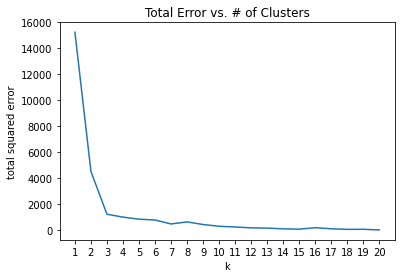

In [ ]:
# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

this method agrees with our original eyeballing that three is the "right" number of clusters.

## **Example: Clustering Colors**

The VP of Swag has designed attractive DataSciencester stickers that he'd like you  to hand out at meetups. Unfortunately, your sticker printer can print at most five colors per sticker. And since the VP of Art is on sabbatical, the VP of Swag asks if there's some way you can take his design and modify it so that it contains only five colors.

Computer images can be represented as two-dimensional arrays of pixels, where each pixel is itself a three-dimensional vector (red, green, blue) indicating its color.

Creating a five-color version of the image, then, entails:

1. Choosing five colors.
2. Assigning one of those colors to each pixel.

It turns out this is a great task for k-means clustering, which can partition the pixels into five clusters in red-green-blue space. If we then recolor the pixels in each cluster to the mean color, we're done.

To start with, we'll need a way to load an image into Python. We can do this with matplotlib, if we first install the pillow library:

In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from pathlib import Path

data_path = Path("girl_with_book.jpg")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://media.istockphoto.com/id/1315140942/photo/happy-black-girl-reading-book.jpg?s=170667a&w=0&k=20&c=3DGxCITyFnAkednM0vyROs5L8aCIQWs8FFGUdNqQBeM=")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

In [ ]:
image_path = r'girl_with_book.jpg'                # wherever your image is
import matplotlib.image as mpimg

img = mpimg.imread(image_path) / 256              # rescale to between 0 and 1

Behind the scenes `img` is a NumPy array, but for our purposes, we can treat it as a list of lists of lists.

img[i][j] is the pixel in the ith row and jth column, and each pixel is a list [red, green, blue] of numbers between 0 and 1 indicating the color of that pixel:

In [ ]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In particular, we can get a flattened list of all the pixels as:

In [ ]:
# .tolist() converts a NumPy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

and then feed them to our clusterer:

In [ ]:
clusterer = KMeans(5)
clusterer.train(pixels)           # this might take a while

changed: 2 / 172551: : 30it [02:12,  4.40s/it]


Once it finished, we just construct a new image with the same format:

In [ ]:
def recolor(pixel: Vector) -> Vector:
  cluster = clusterer.classify(pixel)             # index of the closest cluster
  return clusterer.means[cluster]                 # mean of the closest cluster   

new_img = [[recolor(pixel) for pixel in row]      # recolor this row of pixels
           for row in img]                        # for each row in the image

and display it, using `plt.imshow`:

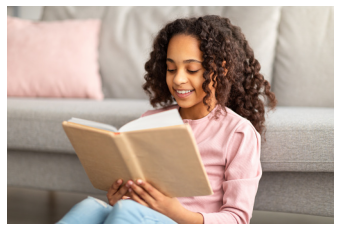

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

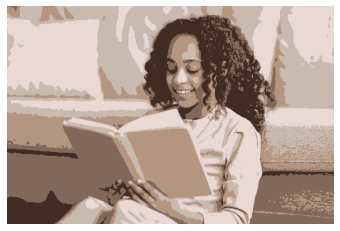

In [ ]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

it is difficult to show color results in a black-and-white book, but Figure shows grayscale versions of a full-color picture and the output of using this process to reduce it to five colors.

## **Bottom-Up Hierarchical Clustering**

An alternative approah to clustering is to "grow" clusters from the bottom up. We can do this in the following way:

1. Make each input its own cluster of one.
2. As long as there are multiple clusters remaining, find the two closest clusters and merge them.


At the end, we'll have one giant cluster containing all the inputs. If we keep track of the merge order, we can re-create any number of clusters by unmerging. For example, if we want three clusters, we can just undo the last two merges.

We'll use a really simple representation of clusters. Our values will live in leaf clusters, which we will represent as `NamedTuples`:

In [ ]:
from typing import NamedTuple, Union  

class Leaf(NamedTuple):
  value: Vector    

leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

We'll use these to grow merged clusters, which we will also represent as `NamedTuples`:

In [ ]:
class Merged(NamedTuple):
  children: tuple 
  order: int  

merged = Merged((leaf1, leaf2), order=1)
Cluster = Union[Leaf, Merged]

We'll talk about merge order in a bit, but first let's create a helper function that recursively returns all the values contained in a (possibly merged) cluster:

In [ ]:
def get_values(cluster: Cluster) -> List[Vector]:
  if isinstance(cluster, Leaf):
    return [cluster.value]
  else:
    return [value
            for child in cluster.children
            for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

In order to merge the closest clusters, we need some notion of the distance between clusters. We'll use the minimum distance between elements of the two clusters, which merges the two clusters that are closest to touching (but will sometimes produce large chain-like clusters that aren't very tight). If we wanted tight spherical clusters, we might use the maximum distance instead, as it merges the two clusters that fit in the smallest ball. Both are common choices, as is the average distance:

In [ ]:
from typing import Callable
from scratch.linear_algebra import distance

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
  """
  compute all the pairwise distances between cluster1 and cluster2
  and apply the aggregation function _distance_agg_ to the resulting list
  """
  return distance_agg([distance(v1, v1)
                      for v1 in get_values(cluster1)
                      for v2 in get_values(cluster2)])

We'll use the merge order slot to track the order in which we did the merging. Smaller numbers will represent later merges. This means when we want to unmerge clusters, we do so from lowest merge order to highest. Since `Leaf` clusters were never merged, we'll assign them infinity, the highest possible value. And since they don't have an `.order` property, we'll create a helper function:

In [ ]:
def get_merge_order(cluster: Cluster) -> float:
  if isinstance(cluster, Leaf):
    return float('inf')      # was never merged
  else:
    return cluster.order

Similarly, since `Leaf` clusters don't have children, we'll create and add a helper function for that:

In [ ]:
from typing import Tuple 

def get_children(cluster: Cluster):
  if isinstance(cluster, Leaf):
    raise TypeError("Leaf has no children")
  else:
    return cluster.children

Now we're ready to create the clustering algorithm:

In [ ]:
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
  # Start with all leaves
  clusters: List[Cluster] = [Leaf(input) for input in inputs]

  def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
    return cluster_distance(pair[0], pair[1], distance_agg)

  # as long as we have more than one cluster left....
  while len(clusters) > 1: 
    # find the two closest clusters 
    c1, c2 = min(((cluster1, cluster2)
                  for i, cluster1 in enumerate(clusters)
                  for cluster2 in clusters[:i]),
                 key=pair_distance)  
    
    # remove them from the list of clusters
    clusters = [c for c in clusters if c != c1 and c != c2]

    # merge them, using merge_order = # of clusters left
    merged_cluster = Merged((c1, c2), order=len(clusters))

    # and add their merge
    clusters.append(merged_cluster) 

  # when there's only one cluster left, return it
  return clusters[0] 

its use is very simple:

In [ ]:
base_cluster = bottom_up_cluster(inputs)

In [ ]:
import pprint  

pprint.pprint(base_cluster)

Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[26, 13]), Leaf(value=[-49, 15])), order=15), Merged(children=(Leaf(value=[21, 27]), Leaf(value=[-9, -16])), order=16)), order=7), Merged(children=(Merged(children=(Leaf(value=[-19, -11]), Leaf(value=[20, 23])), order=17), Merged(children=(Leaf(value=[13, 13]), Leaf(value=[-14, -5])), order=18)), order=8)), order=3), Merged(children=(Merged(children=(Leaf(value=[-18, -3]), Leaf(value=[-25, -9])), order=9), Merged(children=(Leaf(value=[-11, -6]), Leaf(value=[-41, 8])), order=10)), order=4)), order=1), Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-13, -19]), Leaf(value=[-12, -8])), order=11), Merged(children=(Leaf(value=[19, 28]), Leaf(value=[-22, -16])), order=12)), order=5), Merged(children=(Merged(children=(Leaf(value=[-49, 0]), Leaf(value=[11, 15])), order=13), Merged(children=(Leaf(value=[-34, -1]), Leaf(value=[-46, 5])), order=14)), order=6)), order=2)), order=0)


The numbers at hte top indicate "merge order." Since we have 20 inputs, it took 19 merges to get to this one cluster. The first merge created cluster 18 by combining the leaves [19, 28] and [21, 27]. And the last merge create cluster 0. 

If you wanted only two clusters, you'd split at the first fork ("0"), creating one cluster with six points and a second with the rest. For three clusters, you'd continue to the second fork ("1"), which indicates to split that first cluster into the cluster with ([19, 28], [21, 27], [20, 23], [26, 13]) and the cluster with ([11, 15], [13, 13]). And so on.

Generally, though, we don't want to be squinting at nasty text representations like this. Instead, let's write a function that generates any number of clusters by performing the appropriate number of unmerges:

In [ ]:
def generate_clusters(base_cluster: Cluster, 
                      num_clusters: int) -> List[Cluster]:
  # start with a list with just the base cluster 
  clusters = [base_cluster]

  # as long as we don't have enough clusters yet...
  while len(clusters)  < num_clusters: 
    # choose the last-merged of our clusters 
    next_cluster = min(clusters, key=get_merge_order)
    # remove it from the list 
    clusters = [c for c in clusters if c != next_cluster] 

    # and add its children to the list (i.e., unmerge it)
    clusters.extend(get_children(next_cluster))

  # once we have enough clusters...
  return clusters

So, for example, if we want to generate three clusters, we can just do:


In [ ]:
three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]

which we can easily plot:

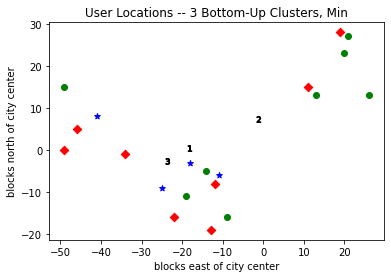

In [ ]:
for i, cluster, marker, color in zip([1, 2, 3],
                                     three_clusters, 
                                     ['D', 'o', '*'],
                                     ['r', 'g', 'b']):
  xs, ys = zip(*cluster)                                # magic unzipping trick
  plt.scatter(xs, ys, color=color, marker=marker)

  # put a number at the mean of the cluster 
  x, y = vector_mean(cluster)
  plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

# <center><b>Chapter 21. Natural Language Processing</b></center>

Natural language processing (NLP) refers to **computational techniques involving language.** It's a broad field, but we'll look at a few techniques, both simple and not simple.

## **Word Clouds**

In Chapter 1, we computed word counts of users' interests. One approach to **visualizing words** and **counts is word clouds,** which artistically depict the words at sizes proportional to their counts.

Generally, though, **data scientists don't think much of word clouds**, in large part because the placement of the words doesn't mean anything other than "here's some space where i was able to fit a word."

If you ever are forced to create a word cloud, think about whether you can make the axes convey somthing. For example, imagine that, for each of some collection of data science -related buzzwords, you have two numbers between 0 and 100 - the first representing how frequently it appears in job postings, and the second how frequently it appears on resumes:

In [ ]:
data = [("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
        ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
        ("data science", 60, 70), ("analytics", 90, 3),
        ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
        ("actionable insights", 40, 30), ("think out of the box", 45, 10),
        ("self-starter", 30, 50), ("customer focus", 65, 15),
        ("thought leadership", 35, 35)]

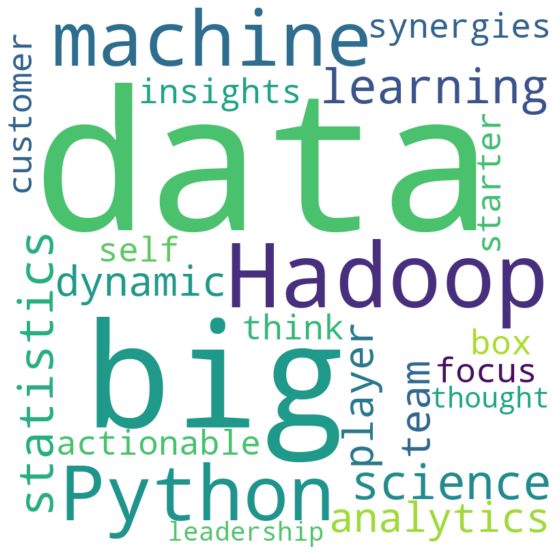

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt  
import pandas as pd

df = pd.DataFrame(data, columns = ['word', 'job_popularity', 'resume_popularity'])

words = df['word']
text = ' '.join(words)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 1.5)

plt.show()

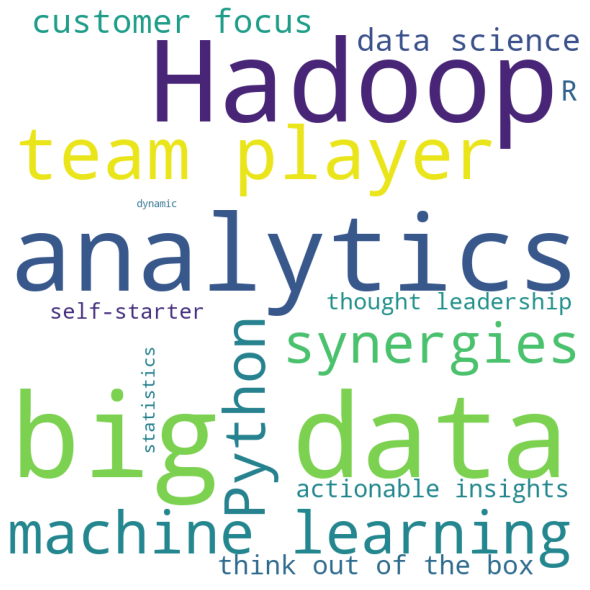

In [ ]:
job_popularity = dict(zip(df.word, df.job_popularity))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate_from_frequencies(job_popularity)


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

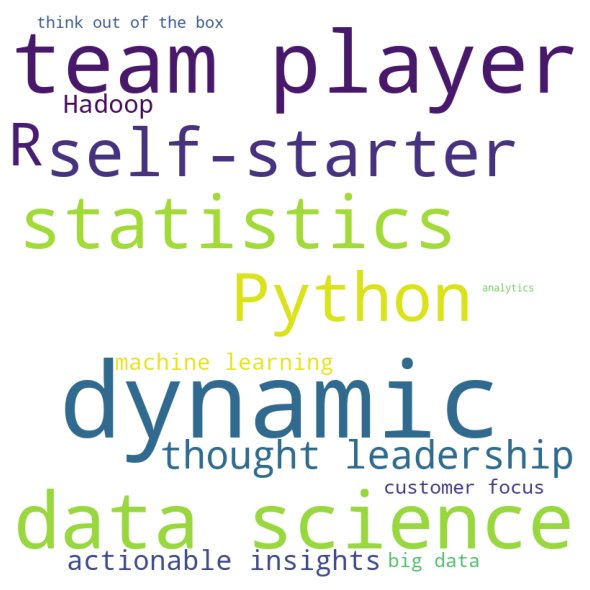

In [ ]:
resume_popularity = dict(zip(df.word, df.resume_popularity))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate_from_frequencies(resume_popularity)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

The **word cloud approach** is just to **arrange the words** on a page in a cool-looking font

This look neat but **doesn't really tell us anything**. A more interesting approach might be to scatter them so that horizontal position indicates posting popularity and vertical position indicates resume populartiy, which produces a visualization that converys a few insights

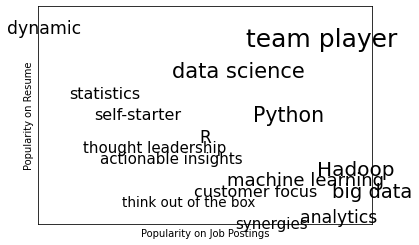

In [ ]:
from matplotlib import pyplot as plt

def text_size(total: int) -> float:
  """equals 8 if total is 0, 28 if total is 200"""
  return 8 + total / 200 * 20 


for word, job_popularity, resume_popularity in data:
  plt.text(job_popularity, resume_popularity, word,
           ha='center', va='center',
           size=text_size(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resume")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

## **n-Gram Language Models**

The DataSciencester VP of Search Engine Marketing wants to **create thousands of web pages** about data science so that **your site will rank higher in search results** for data science-related terms. (You attempt to explain to her that search engine algorithms are clever enough that this won't actually work, but she refuses to listen.)

Of course, she doesn't want to write thousands of web pages, nor does she want to pay a horde of "content strategists" to do so. Instead, she asks you whether you can somehow programmatically generate these web pages. To do this, we'll need some way of modeling language.

One approach is to **start with a corpus of documents** and **learn a statistical model of language.**  



we'll use the Requests and Beautiful Soup libraries to retrieve the data. There are **a couple of issue **worth calling attention to.

**The first is that the apostrophes** in the text are actually the Unicode character "`u\u2019`". We'll create a helper function to repalce them with normal apostrophes:

In [ ]:
def fix_unicode(text: str) -> str:
  return text.replace(u"\u2019", "'")

T**he second issue** is that once we **get the text of the web page**, we'll want to **split it into a sequence of words and periods** (so that we can tell where sentences end). We can do this using `re.findall`

In [ ]:
import re
from bs4 import BeautifulSoup  
import requests

url = "https://www.oreilly.com/radar/what-is-data-science/"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "post-radar-content")  # find post-radar-content div
soup = BeautifulSoup(html, 'html5lib')            # matches a word or a period
regex = r"[\w']+|[\.]"

document = []

for paragraph in content("p"):
  words = re.findall(regex, fix_unicode(paragraph.text))
  document.extend(words)

In [ ]:
print(document[:20])

['Weâ', 've', 'all', 'heard', 'it', 'according', 'to', 'Hal', 'Varian', 'statistics', 'is', 'the', 'next', 'sexy', 'job', '.', 'Five', 'years', 'ago', 'in']


We certainly could (and likely should) **clean this data** further. There is still some amount of extraneous text in the document (for example, the first word is Section), and we've split on midsentence periods (for example, in Web 2.0), and there are a handful of captions and lists sprinkled throughout. Having said that, we'll work with the document as it is.


Now, that **we have the text as a sequence of words**, we can **model language** in the following way: given some starting word (say, book) we look at all the words that follow it in the source document. We randomly choose one of these to be the next word, and we repeat the process until we get to a period, which signifies the end of the sentence. We call this **a bigram model**, as it is determined completely by the frequencies of the bigrams(word pairs) in the original data.

What about a starting word? We can just pick randomly from words that follow a period. To start, let's precompute the possible word transitions. Recall that `zip` stops when any of its inputs in done, so that `zip(document, document[1:])` gives us precisely the pais of consecutive elements of document:

In [ ]:
from collections import defaultdict 
import random

transitions = defaultdict(list)
for prev, current in zip(document, document[1:]):
  transitions[prev].append(current)

generate sentences:

In [ ]:
def generate_using_bigrams() -> str:
  current = '.'                # this means the next word will start a sentence
  result = []
  while True:
    next_word_candidates = transitions[current]     # bigrams (current, _)
    current = random.choice(next_word_candidates)   # choose one at random
    result.append(current)                          # append it to results
    if current == ".": return " ".join(result)      # if "." we're done

In [ ]:
generate_using_bigrams()

'At some hints at roughly 0 and newer technologies provide data problem that MapReduce implementation of Walmart over time plus thousands of the point itâ s the 70s were insufficient computing time they generate a picture the exact length in speed has proven to break large number of every startup every time .'

The sentences it produces are gibberish, but they're the kind of gibberish you might put on your website if you were trying to sound data-sciencey. For example:

      If you may know which are you want ot data sort the data feeds web
      friend someone on trending topics as the data in Hadoop is the data 
      science requires a book demonstrates why visualizations are but we do 
      massive correlations across many commercial dist drives in Python 
      language and creates more tractable form making connections then use 
      and uses it to solve a data.
                                                -Bigram Model

We can **make the sentences less gibberishy by looking at trigrams**, triplets of consecutive words. (More generally, you might look at `n-grams` consisting of n consecutive words, but there will be plenty of us.) Now the transitions will depend on the previous two words:

In [ ]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):

  if prev == ".":                 # if the previous "word" was a period
    starts.append(current)       # then this is a start word 

  trigram_transitions[(prev, current)].append(next)

Notice that  now we have to track the starting words separately. We can generate sentences in pretty much the same way:

In [ ]:
def generate_using_trigrams() -> str:
  current = random.choice(starts)                # choose a random starting word
  prev = "."                                     # and precede it with a '.'
  result = [current]
  while True: 
    next_word_candidates = trigram_transitions[(prev, current)]
    next_word = random.choice(next_word_candidates)

    prev, current = current, next_word 
    result.append(current) 
    
    if current == ".":
      return " ".join(result)

In [ ]:
generate_using_trigrams()

'Her job as scientist at bit .'

This produces better sentences like:

    In hindsight MapReduce seems like an epidemic and if so does that give
    us new insights into how economies work That's not a question we could
    even have asked a few years there has been instrumented.

                                              -Trigram Model

Of course, they sound better because at each step the generation process has fewer choices, and at many steps only a single choice. This means that we frequently generate sentences (or at least long phrases) that were seen verbatim in the original data. Having more data would help; it would also work better if we collected n-grams from multiple essays about data science.

## **Grammars**

**A different approach to modeling language is with grammars**, rules for generating acceptable sentences. In elementry school, you probably learned about parts of speech and how to combine them. For example, if you had a really bad English teacher, you might say that a sentence necessarily consists of a noun followed by a verb. If you then have a list of nouns and verbs, you can generate sentences according to the rule.

We'll define a slightly more complicated grammar:

In [ ]:
from typing import List, Dict 

# Type alias to refer to grammars later
Grammar = Dict[str, List[str]]

grammar = {
    "_S"   : ["_NP _VP"],
    "_NP"  : ["_N", 
              "_A _NP _P _A _N"],
    "_VP"  : ["_V",
              "_V _NP"],
    "_N"   : ["data science", "Python", "regression"],
    "_A"   : ["big", "linear", "logistic"],
    "_P"   : ["about", "near"],
    "_V"   : ["learns", "trains", "tests", "is"]
}

I made up the convention that means starting with underscores refer to rules that need further expanding, and that other names are terminals that don't need further processing.

So, for example, "_S" is the "sentence" rule, which produces an "_NP" ("noun phrase") rule followed by a "_VP" ("verb phrase") rule.

The verb phrase rule can produce either the "_V" ("verb") rule, or the verb rule followed by the noun phrase rule.

Notice that the "_NP" rule contains itself in one of its productions. Grammars can be recursive, which allows even finite grammars like this to generate infinitely many different sentences.

How do we generate sentences from this grammar? We'll start with a list containing the sentence rule ["_S"]. And then we'll repeatedly expand each rule by replacing it with a randomly chosen one of its productions. We stop when we have a list consisting solely of terminals.



we'll createe a simple helper funciton to identify termianls:

In [ ]:
def is_terminal(token: str) -> bool:
  return token[0] != "_"

Next we need to **write a function to turn a list of tokens into a sentence.** We'll look for the first nonterminal token. If we can't find one, that means we have a completed sentence and we're done.

If we do find a nonterminal, then we randomly choose one of its productions. If that production is a terminal (i.e., a word), we simply replace the token with it. Otherwise, it's a sequence of space-separated nonterminal tokens that we need to `split` and then splice into the current tokens. Either way, we repeat the process on the new set of tokens.

Putting it all together, we get:

In [ ]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
  for i, token in enumerate(tokens):
    # If this is a terminal token, skip it.
    if is_terminal(token): continue 

    # Otherwise, it's a nonterminal token,
    # so we need to choose a replacement at random.
    replacement = random.choice(grammar[token])

    if is_terminal(replacement):
      tokens[i] = replacement
    else:
      # Replacement could be, e.g., "_NP _VP", so we need to 
      # split it on spaces and splice it in.
      tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

    # Now call expand on the new list of tokens.
    return expand(grammar, tokens)
  
  # if we get here, we had all terminals and are done.
  return tokens 

And now we can start generating sentences:

In [ ]:
def generate_sentence(grammar: Grammar) -> List[str]:
  return expand(grammar, ["_S"])

In [ ]:
generate_sentence(grammar)

['logistic',
 'logistic',
 'big',
 'Python',
 'about',
 'logistic',
 'data science',
 'about',
 'big',
 'data science',
 'about',
 'big',
 'Python',
 'is',
 'Python']

Try chaning the grammar-add more words, add more rules, add your own parts of speech -until you're ready to generate as many web pages as your company needs.

Grammars are actually more interesting when they're used in the other direction. Given a sentence, we can use a grammar to parse the sentence. This then allows us to identify subjects and verbs and helps us make sense of the sentence.

Using data science to generate text is a neat tric; using it ot understand text is more magical.

## **An Aside: Gibbs Sampling**

Generating samples from some distributions is easy. We can get uniform random variables with:

    random.random()

and normal random variables with:

    inverse_normal_cdf(random.random())

But some distributions are harder to sample from. **Gibbs sampling** is a technique for **generating samples from multidimensional distributions** when we only know some of the **conditional distributiosn.**

For example, imagine rolling two dice. Let x be the value of the first die and y be the sum of the dice, and imagine you wanted to generate lots of (x, y) pairs. In this case it's easy to generate the samples directly:

In [ ]:
from typing import Tuple
import random

def roll_a_die() -> int:
  return random.choice([1, 2, 3, 4, 5, 6])


def direct_sample() -> Tuple[int, int]:
  d1 = roll_a_die()
  d2 = roll_a_die() 
  return d1, d1 + d2

But imagine that you only knew that conditional distributions. The distribution of y conditional on x is easy -if you known the value of x, y is equally likely to be x + 1, x + 2, x + 3, x + 4, x + 5, or x + 6:



In [ ]:
def random_y_given_x(x: int) -> int:
  """eqaully likely to be x + 1, x + 2, ..., x + 6"""
  return x + roll_a_die()

The other direction is more complicated. For example, if you know that y is 2, then necessarily x is 1 (since the only way two dice can sum to 2 is if both of them are 1). If you know y is 3, then x is equally likely to be 1 or 2. Similarly, if y is 11, then x has to be either 5 or 6:

In [ ]:
def random_x_given_y(y: int) -> int:
  if y <= 7:
    # if the total is 7 or less, the first die is equally likely to be 
    # 1, 2, ..., (total - 5), ..., 6
    return random.randrange(y - 6, 7)

The way Gibbs sampling works is that we start with any (valid) values for x and y and then repeatedly alternate replacing x with a random value picked conditional on y and replacing y with a random value picked conditional on x. **After a number of iterations, the resulting values of x and y will represent a sample from the unconditonal joint distribution:**

In [ ]:
def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
  x, y = 1, 2                                            # doesn't really matter
  for _ in range(num_iters):
    x = random_x_given_y(y)
    y = random_y_given_x(x) 
  return x, y

You can check that this gives similar results to the direct sample:


In [ ]:
def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
  counts = defaultdict(lambda: [0, 0])
  for _ in range(num_samples):
    counts[gibbs_sample()][0] += 1
    counts[direct_sample()][1] += 1
  return counts

## **Topic Modeling**

When we built our "Data Scientists You May Know" recommender in Chapter 1, we simply looked for exact matches in people's stated interests.

A more sophisticated approach to **understanding our users' interests might try to identify the topics** that underlie those interests. A technique called **latent Dirichlet allocation (LDA)** is commonly used to identify common topics in a set of documents. We'll apply it to documents that consist of each user's interests.

LDA has some similarities to the Naive Bayes classifier we built in Chapter 13, in that it assumes a probabilistic model for documents. We'll gloss over the hairier mathematical details, but for our purposes the model assumes that:

* There is some **fixed number K** of topics.
* There is a **random variable that assigns each topic an associated probability distribution over words.** You should think of this distribution as the probability of seeing **word w given topic k.**
* There is another random variable that assigns each document a probability distribution over topics. You should think of this distribution as the mixture of topics in document d.
* Each word in a document was generated by first randomly picking a topic (from the document's distribution of topics) and then randomly picking a word (from the topic's distribution of words).

In particular, we have a collection of `documents`, each of which is a list of words. And we have a corresponding collection of `documents_topics` that assigns a topic (here a number between 0 and K-1) to each word in each document.

So, the fifth word in the fourth document is 

    documents[3][4]

and the topic from which that word was chosen is:

    document_topics[3][4]

This very explicitly defines each document's distribution over topics, and it implicitly defines each topic's distribution over words.

We can estimate the likelihood that topic 1 produces a certain word by **comparing** how may times topic 1 produces **the word** wiht how many times topic 1 produces **any words**. (Similarly, when we built a spam filter in Chapter 13, we compared how many times each word appeared in spams with the total number of words appearing in spams).

Although these topics are just numbers, we can **give them descriptive names by looking at the words** on which they put the heaviest weight. We just have to somehow generate the `document_topics`. This is where Gibbs sampling comes into play.

We start by **assigning every word in every document a topic completely at random.** Now we go through each document one word at a time. For that word and document, we **construct weights for each topic** that depend on the (current) distribution of topics in the document and the (current) distribution of words for the topic. We then **use those weights to sample a new topic for that word.** If we iterate this process many times, we will end up with a joint sample from the topic-word distribution and the document topic distribution.

To start with, we'll need a function to randomly choose an index based on an arbitrary set of weights:

In [ ]:
def sample_from(weights: List[float]) -> int:
  """returns i with probability weights[i] / sum(weights)"""
  total = sum(weights)
  rnd = total * random.random()              # uniform between 0 and total
  for i, w in enumerate(weights):
    rnd -= w                                 # return the smallest i such that
    if rnd <= 0: return i                    # weights[0]+...+weights[i] >= rnd

For instance, if you give it weights [1, 1, 3], then one-fifth of the time it will return 0, one-fifth of the time it will return 1, and three-fifths of the time it will return 2. Let's write a test:

In [ ]:
from collections import Counter 

# Draw 1000 times and count
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))
assert  10  < draws[0] < 190       # should be ~10%, this is a really loose test
assert  10  < draws[1] < 190       # should be ~10%, this is a really loose test
assert 650  < draws[2] < 950       # should be ~80%, this is a really loose test
assert draws[0] + draws[1] + draws[2]  == 1000

Our documents are our users' interests, which look like:

In [ ]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

And we'll try to find:

In [ ]:
K = 4

topics. In order to calculate the sampling weights, we'll need to keep track of several counts. Let's first create the data structures for them.

* How many times each topic is assigned to each document:

In [ ]:
# a list of Counters, one for each document 
document_topic_counts = [Counter() for _ in documents]
document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

* How many times each word is assigned to each topic:

In [ ]:
# a list of Counters, one for each topic
topic_word_counts = [Counter() for _ in range(K)]
topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

* The total number of words assigned to each topic:

In [ ]:
# a list of numbers, one for each topic 
topic_counts = [0 for _ in range(K)]
topic_counts

[0, 0, 0, 0]

* The total number of words contained in each document:

In [ ]:
# a list of numbers, one for each document 
document_lengths = [len(document) for document in documents]
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

* The number of distrinct words:

In [ ]:
distinct_words = set(word for document in documents for word in document)
w = len(distinct_words)
w

36

* And the number of documents:

In [ ]:
D = len(documents)
D

15

Once we populate these, we can find, for example, the number of words in `documents[3]` associated with topic 1 as follows:

In [ ]:
document_topic_counts[3][1]

0

And we can find the number of times nlp is associated with topic 2 as follows:

In [ ]:
topic_word_counts[2]["nlp"]

0

Now we're ready to define our conditional probability functions. As in Chapter 13, each has a smoothing term that ensures every topic has a nonzero chance of being chosen in any document and that every word has a nonzero chance of being chosen for any topic:

In [ ]:
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
  """
  The fraction of words in document 'd'
  that are assigned to 'topic' (plus some smoothing)
  """
  return ((document_topic_counts[d][topic] + alpha) /
          (document_lengths[d] + K * alpha))
  
def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
  """
  The fraction of words assigned to 'topic'
  that equal 'word' (plus some smoothing)
  """
  return ((topic_word_counts[topic][word] + beta) / 
          (topic_counts[topic] + w * beta))

We'll use these to create the weights for updating topics:

In [ ]:
def topic_weight(d: int, word: str, k: int) -> float:
  """
  Given a document and a word in that document,
  return the weight for the kth topic
  """
  return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
  return sample_from([topic_weight(d, word, k)
                      for k in range(K)])

There are solid mathematical reasons why `topic_weight` is defined the way it is, but their details would lead us too far afield. Hopefully it makes at least intuitive sense that -given a word and its document -the likelihood of any topic choice depends on both how likely that topic is for the document and how likely that word is for the topic.

This is all the machinery we need. We start by assigning every word to a random topic and populating our counters appropriately:

In [ ]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                  for document in documents]

for d in range(D):
  for word, topic in zip(documents[d], document_topics[d]):
    document_topic_counts[d][topic] += 1
    topic_word_counts[topic][word] += 1
    topic_counts[topic] += 1

Our goal is to get a joint sample of the topics -word distribution and the documents -topic distribution. We do this using a form of Gibbs sampling that uses the conditional probabilities defined previously:

In [ ]:
import tqdm

for iter in tqdm.trange(1000):
  for d in range(D):
    for i, (word, topic) in enumerate(zip(documents[d],
                                          document_topics[d])):
      
      # remove this word / topic from the counts
      # so that it doesn't influence the weights
      document_topic_counts[d][topic] -= 1
      topic_word_counts[topic][word] -= 1
      topic_counts[topic] -= 1
      document_lengths[d] -= 1

      # choose a new topic based on the weights
      new_topic = choose_new_topic(d, word)
      document_topics[d][i] = new_topic

      # and now add it back to the counts
      document_topic_counts[d][new_topic] += 1
      topic_word_counts[new_topic][word] += 1
      topic_counts[new_topic] += 1
      document_lengths[d] += 1

100%|██████████| 1000/1000 [00:00<00:00, 1993.12it/s]


What are the topics? They're just numbers 0, 1, 2, and 3. If we want names for them, we have to do that ourselves. Let's look at the five mostly heavily weighted words for each:

In [ ]:
for k, word_counts in enumerate(topic_word_counts):
  for word, count in word_counts.most_common(): 
    if count > 0:
      print(k, word, count)

0 Java 3
0 Big Data 3
0 Hadoop 2
0 HBase 1
0 C++ 1
0 Spark 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Cassandra 1
0 deep learning 1
1 HBase 2
1 neural networks 2
1 Postgres 2
1 MongoDB 2
1 machine learning 2
1 Cassandra 1
1 numpy 1
1 decision trees 1
1 deep learning 1
1 databases 1
1 MySQL 1
1 NoSQL 1
1 artificial intelligence 1
1 scipy 1
2 regression 3
2 Python 2
2 R 2
2 libsvm 2
2 scikit-learn 2
2 mathematics 1
2 support vector machines 1
2 Haskell 1
2 Mahout 1
3 statistics 3
3 probability 3
3 Python 2
3 R 2
3 pandas 2
3 statsmodels 2
3 C++ 1
3 artificial intelligence 1
3 theory 1


<table>
  <tr>
    <th colspan="4">Most common words per topic</th>
  </tr>
  <tr>
    <th>Topic 0</th>
    <th>Topic 1</th>
    <th>Topic 2</th>
    <th>Topic 3</th>
  </tr>
  <tr>
    <td>Java</td>
    <td>R</td>
    <td>HBase</td>
    <td>regression</td>
  </tr>
  <tr>
    <td>Big Data</td>
    <td>statistics</td>
    <td>Postgres</td>
    <td>libsvm</td>
  </tr>
  <tr>
    <td>Hadoop</td>
    <td>Python</td>
    <td>MongoDB</td>
    <td>scikit-learn</td>
  </tr>
  <tr>
    <td>deep learning</td>
    <td>probability</td>
    <td>Cassandra</td>
    <td>machine learning</td>
  </tr>
  <tr>
    <td>artificial intelligence</td>
    <td>pandas</td>
    <td>NoSQL</td>
    <td>neural networks</td>
  </tr>
</table>

Based on these I'd probably assign topic names:

In [ ]:
topic_names = ["Big Data and programming languages",
               "Python and statistics",
               "databases",
               "machine learning"]

at which point we can see how the model assigns topics to each user's interests:

In [ ]:
for document, topic_counts in zip(documents, document_topic_counts):
  print(document)
  for topic, count in topic_counts.most_common():
    if count > 0:
      print(topic_names[topic], count)
  print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
Python and statistics 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 2
databases 2
machine learning 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 3
databases 2

['machine learning', 'regression', 'decision trees', 'libsvm']
databases 2
Python and statistics 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
databases 3
Big Data and programming languages 3

['statistics', 'probability', 'mathematics', 'theory']
machine learning 3
databases 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
databases 2
Python and statistics 2

['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Python and statistics 3
Big Data and programming languages 1

['Hadoop', 'Java', 'MapReduce', 'Big Data']
Big D

and so on. Given the "ands" we needed in some of our topic names, it's possible we should use more topics, although most likely we don't have  enough data to successfully learn them.

## **Word Vectors**

A lot of recent advances in **NLP involve deep learning**. In the rest of this chapter we'll look at a couple of them using the machinery we developedin Chapter 19.

One important innovation involves **representing words as low-dimensional vectors.** These vectors can be compared, added together, fed into machine learning models, or anything else you want to do with them. They usually have nice properties; for example, similar words tend to have similar vectors. That is, typically the word vector for bigis pretty close to the word vector for large, so that a model operating on word vectors can (to some degree) handle things like synonymy for free.

**Frequently the vectors will exhibit delightful arithmetic properties as well.** For instance, in some such models if you take the vector for king, subtract the vector for man, and add the vector for woman, you will end up wiht a vector that's very close to the vector for queen. It can be interesting to ponder what this means about what the word vectors actually "learn," although we won't spend time on that here.

Coming up wiht such vectors for a large vocabulary of words is a difficult undertaking, so typically we'll learn them from a corpus of text. There are a couple of different schemes, but at a high level the task typically looks something like this:

1. Get a **bunch of text**.
2. **Create a dataset** where the goal is to predict a word given nearby words (or alternatively, to predict nearby words given a word).
3. **Train a neural net** to do well on this task.
4. Take the **internal states** of the trained neural net as the word vectors.

In particular, because the task is to predict a word given nearby words, words that occur in similar contexts (and hence have similar nearby words) should have similar internal states and therefore similar word vectors.

Here we'll measure "similarity" using cosine similarity, which is a number between -1 and 1 that measures the degree to which two vectors point in the same direction:

In [ ]:
from scratch.linear_algebra import dot, Vector  
import math 

def cosine_similarity(v1: Vector, v2: Vector) -> float:
  return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))


assert cosine_similarity([1., 1, 1], [2., 2, 2]) == 1,   "same direction"
assert cosine_similarity([-1., -1], [2., 2]) == -1,      "opposite direction"
assert cosine_similarity([1., 0], [0., 1]) == 0,         "orthogonal"

Let's learn some word vectors to see how this works.

To start with, we'll need a toy dataset. The commonly used word vectors are typically derived from training on millions or even billions of words. As our toy library can't cope with that much data, we'll create an artificial dataset with some structure to it:

In [ ]:
colors = ["red", "green", "blue", "yellow", "black", ""]
nouns = ["bed", "car", "boat", "cat"]
verbs = ["is", "was", "seems"]
adverbs = ["very", "quite", "extremely", ""]
adjectives = ["slow", "fast", "soft", "hard"]

def make_sentence() -> str: 
  return " ".join([
      "The",
      random.choice(colors),
      random.choice(nouns),
      random.choice(verbs),
      random.choice(adverbs),
      random.choice(adjectives),
      "."
  ])

NUM_SENTENCES = 50

random.seed(0)
sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

In [ ]:
sentences[:20]

['The yellow cat is extremely hard .',
 'The yellow boat was extremely fast .',
 'The black car was quite slow .',
 'The black boat seems quite soft .',
 'The red bed seems extremely hard .',
 'The black bed was  soft .',
 'The black car seems  hard .',
 'The black boat is very slow .',
 'The  cat seems very hard .',
 'The blue car seems extremely slow .',
 'The green car is quite hard .',
 'The red bed was  slow .',
 'The blue boat seems very soft .',
 'The black car seems extremely hard .',
 'The red cat was quite soft .',
 'The green car is very soft .',
 'The yellow bed is quite fast .',
 'The red bed seems  soft .',
 'The black car is  soft .',
 'The yellow cat seems extremely slow .']

This will generate lots of sentences with similar structure but different words; for example, "The green boat seems quite slow." Given this setup, the colors will mostly appear in "similar" contexts, as will the nouns, and so on. So if we do a good job of assigning word vectors, the colors should get similar vectors, and so on.

As mentioned earlier, we'll want to one-hot-encode our words, which means we'll need to convert them to IDs. We'll introduce a `Vocabulary` clas to keep track of this mapping:

In [ ]:
from scratch.deep_learning import Tensor 

class Vocabulary: 
  def __init__(self, words: List[str] = None) -> None: 
    self.w2i: Dict[str, int] = {}       # mapping word -> word_id
    self.i2w: Dict[int, str] = {}       # mapping word_id -> word 

    for word in (words or []):          # If words were provided,
      self.add(word)                    # add them.

  @property
  def size(self) -> int:
    """how many words are in the vocabulary"""
    return len(self.w2i) 

  def add(self, word: str) -> None:
    if word not in self.w2i:            # If the word is new to us:
      word_id = len(self.w2i)           # Find the next id.
      self.w2i[word] = word_id          # Add to the word -> word_id map.
      self.i2w[word_id] = word          # Add to the word_id -> word map.

  def get_id(self, word: str) -> int:
    """return the id of the word (or None)"""
    return self.w2i.get(word)

  def get_word(self, word_id: int) -> str:
    """return the word with the given id (or None)"""
    return self.i2w.get(word_id)

  def one_hot_encode(self, word: str) -> Tensor:
    word_id = self.get_id(word) 
    assert word_id is not  None, f"unknown word {word}"

    return [1.0 if i == word_id else 0.0 for i in range(self.size)]

<Figure size 432x288 with 0 Axes>

These are all thing we could do manually, but it's handy to have it in a class. We should probably test it:

In [ ]:
vocab = Vocabulary(["a", "b", "c"])

assert vocab.size == 3,                    "there are 3 words in the vocab"
assert vocab.get_id("b") == 1,             "b should have word_id 1"
assert vocab.one_hot_encode("b") == [0, 1, 0]
assert vocab.get_id("z") is None,           "z is not in the vocab"
assert vocab.get_word(2) == "c",            "word_id 2 should be c"
vocab.add("z")
assert vocab.size == 4,                      "now there are 4 words in the vocab"
assert vocab.get_id("z") == 3,               "now z should have id 3"
assert vocab.one_hot_encode("z") == [0, 0, 0, 1]

We should also write simple helper functions to save and load a vocabulary, just as we have for our deep learning modesl:

In [ ]:
import json   

def save_vocab(vocab: Vocabulary, filename: str) -> None:
  with open(filename, 'w') as f:
    json.dump(vocab.w2i, f)                    # Only need to save w2i 

def load_vocab(filename: str) -> Vocabulary:
  vocab = Vocabulary() 
  with open(filename) as f: 
    # Load w2i and generate i2w from it 
    vocab.w2i = json.load(f)  
    vocab.i2w = {id: word for word, id in vocab.w2i.items()}
  return vocab

We'll be using a word vector model called `skip-gram` that takes as input a word and generates probabilities for what words are likely to be seen near it. We will feed it training pairs `(word, nearby_word)` and try to minimize the `SoftmaxCrossEntropy` loss.

Let's design our neural network. At its heart wll be an **embedding layer** that takes as input a word ID and return a word vector. Under the covers we canjust use a lookup table for this.

We'll then pass the word vector to a `Linear` layer with the same number of outputs as we have words in our vocabulary. As before, we'll use `softmax` to convert these outputs to probabilities over nearby words. As we use gradient descent to train the model, we will be updating the vectors in the lookup table. Once we've finished training, the lookup table gives us our word vectors.

Let's create that embedding layer. In practice we might want to embed things other than words, so we'll construct a more general `Embedding` layer. (Later we'll write a `TextEmbedding` subclass that's specifically for word vectors.)

In its constructor we'll provide the number and dimension of our embedding vectors, so it can create the embeddings (which will be standard random normals, initially):

In [ ]:
from typing import Iterable 
from scratch.deep_learning import Layer, Tensor, random_tensor, zeros_like  

class Embedding(Layer):
  def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
    self.num_embeddings = num_embeddings
    self.embedding_dim = embedding_dim  

    # One vector of size embedding_dim for each desired embedding 
    self.embeddings = random_tensor(num_embeddings, embedding_dim)
    self.grad = zeros_like(self.embeddings)

    # Save last input id 
    self.last_input_id = None 

In our case we'll only be embedding one word at a time. However, in other models we might want to embed a sequence of words and get back a sequence of word vectors. (For example, if we wanted to train the CBOW model described earlier.) So an alternative design would take sequences of word IDs. We'll stick with one at a time, to make things simpler.

In [ ]:
def forward(self, input_id: int) -> Tensor:
  """Just select the embedding vector corresponding to the input id"""
  self.input_id = input_id                 # remember for use it backpropagation
  return self.embeddings[input_id]

For the backward pass we'll get a gradient corresponding to the chosen embedding vector, and we'll need to construct the corresponding gradient for `self.embeddings`, which is zero for every embedding other than the chosen one:

In [ ]:
def backward(self, gradient: Tensor) -> None:
  # Zero out the gradient corresponding to the last input.
  # This is way cheaper than creating a new all-zero tensor each time.
  if self.last_input_id is not None: 
    zero_row = [0 for _ in range(self.embedding_dim)]
    self.grad[self.last_input_id] = zero_row  
  self.last_input_id = self.input_id 
  self.grad[self.input_id] = gradient 

Because we have parameters and gradients, we need to override those methods:

In [ ]:
def params(self) -> Iterable[Tensor]:
  return [self.embeddings] 

def grads(self) -> Iterable[Tensor]:
  return [self.grad]

put it together 

In [ ]:
from typing import Iterable 
from scratch.deep_learning import Layer, Tensor, random_tensor, zeros_like  

class Embedding(Layer):
  def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
    self.num_embeddings = num_embeddings
    self.embedding_dim = embedding_dim  

    # One vector of size embedding_dim for each desired embedding 
    self.embeddings = random_tensor(num_embeddings, embedding_dim)
    self.grad = zeros_like(self.embeddings)

    # Save last input id 
    self.last_input_id = None 
  
  def forward(self, input_id: int) -> Tensor:
    """Just select the embedding vector corresponding to the input id"""
    self.input_id = input_id                 # remember for use it backpropagation
    return self.embeddings[input_id]

  def backward(self, gradient: Tensor) -> None:
    # Zero out the gradient corresponding to the last input.
    # This is way cheaper than creating a new all-zero tensor each time.
    if self.last_input_id is not None: 
      zero_row = [0 for _ in range(self.embedding_dim)]
      self.grad[self.last_input_id] = zero_row  
    self.last_input_id = self.input_id 
    self.grad[self.input_id] = gradient 

  def params(self) -> Iterable[Tensor]:
    return [self.embeddings] 

  def grads(self) -> Iterable[Tensor]:
    return [self.grad]

As mentioned earlier, we'll want a subclass specifically for word vectors. In that case our number of embeddings is determined by our vocabulary, so let's just pass that in instead:

In [ ]:
class TextEmbedding(Embedding):
  def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
    # Call the superclass constructor
    super().__init__(vocab.size, embedding_dim)

    # And hang onto the vocab
    self.vocab = vocab

The other built-in methods will all work as is, but we'll add a couple more methods specific to working with text. For example, we'd like to be able to retrieve the vector for a given word. (This is not part of the Layer interface, but we are always free to add extra methods to specific layers as we like.)

In [ ]:
def __getitem__(self, word: str) -> Tensor:
  word_id = self.vocab.get_id(word)
  if word_id is not None:
    return self.embeddings[word_id]
  else:
    return None

This dunder method will allows us to retrieve word vectors using indexing:

    word_vector = embedding["black"]

And we'd also like the embedding layer to tell us the closest words to a given word:

In [ ]:
def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
  """Returns the n closest words based on cosine similarity"""
  vector = self[word]

  # Compute pairs (similarity, other_word), and sort most similar first
  scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
            for other_word, i in self.vocab.w2i.items()]
  scores.sort(reverse=True)

  return scores[:n]

put it to together

In [ ]:
class TextEmbedding(Embedding):
  def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
    # Call the superclass constructor
    super().__init__(vocab.size, embedding_dim)

    # And hang onto the vocab
    self.vocab = vocab

  def __getitem__(self, word: str) -> Tensor:
    word_id = self.vocab.get_id(word)
    if word_id is not None:
      return self.embeddings[word_id]
    else:
      return None

  def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
    """Returns the n closest words based on cosine similarity"""
    vector = self[word]

    # Compute pairs (similarity, other_word), and sort most similar first
    scores = [(cosine_similarity(vector, self.embeddings[i]), other_word)
              for other_word, i in self.vocab.w2i.items()]
    scores.sort(reverse=True)

    return scores[:n]

Our embedding layer just outputs vectors, which we can feed into a `Linear` layer.

Now we're ready to assemble our training data. For each input word, we'll choose as target words the two words to its left and the two words to its right.



Let's start by lowercasing the sentences and splitting them into words:

In [ ]:
import re

# This is not a great regex, but it works on our data.
tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower())
                      for sentence in sentences]

at which point we can construct a vocabulary:

In [ ]:
# Create a vocabulary (that is, a mapping word -> word_id) based on our text.
vocab = Vocabulary(word
                  for sentence_words in tokenized_sentences
                  for word in sentence_words)

And now we can create training data:

In [ ]:
from scratch.deep_learning import Tensor, one_hot_encode 

inputs: List[int] = []
targets: List[Tensor] = []

for sentence in tokenized_sentences: 
  for i, word in enumerate(sentence):                 # For each word
    for j in [i - 2, i - 1, i + 1, i + 2]:            # take the nearby locations 
      if 0 <= j < len(sentence):                      # that aren't out of bounds
        nearby_word = sentence[j]                     # and get those words.

        # And an input that's the original word_id 
        inputs.append(vocab.get_id(word))

        # Add a target that's the one-hot-encoded nearby word
        targets.append(vocab.one_hot_encode(nearby_word))

With the machinery we've built up, it's now easy to create our model:

In [ ]:
from scratch.deep_learning import Sequential, Linear 

random.seed(0)
EMBEDDING_DIM = 5         # seems like a good size

# Define the embedding layer separately, so we can reference it. 
embedding = TextEmbedding(vocab=vocab, embedding_dim=EMBEDDING_DIM) 

model = Sequential([
    # Give a word (as a vector of word_ids), look up its embedding.
    embedding, 
    # Anduse a linear layer to compute scores for "nearby words."
    Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
])

Using the machiney from Chapter 19, it's easy to train our model:

In [ ]:
from scratch.deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent

loss = SoftmaxCrossEntropy() 
optimizer = GradientDescent(learning_rate=0.01)

for epoch in range(100):
  epoch_loss = 0.0 
  for input, target in zip(inputs, targets):
    predicted = model.forward(input)
    epoch_loss += loss.loss(predicted, target)
    gradient = loss.gradient(predicted, target)
    model.backward(gradient)
    optimizer.step(model)

  print(epoch, epoch_loss)                   # Print the loss
  print(embedding.closest("black"))          # and also a few nearest words
  print(embedding.closest("slow"))           # so we can see what's being
  print(embedding.closest("car"))            # learned.

0 2970.156429387063
[(1.0, 'black'), (0.7927247753692507, 'blue'), (0.5911733314896048, 'cat'), (0.5716654981660781, 'the'), (0.3026892975059721, 'car')]
[(1.0, 'slow'), (0.8936272640937163, 'green'), (0.5272141409772461, '.'), (0.356013304388346, 'yellow'), (0.29982973123116025, 'blue')]
[(1.0, 'car'), (0.7030889033452818, 'cat'), (0.519105254858335, 'fast'), (0.4236692673437953, 'very'), (0.3848186865089063, 'quite')]
1 2865.855510833289
[(1.0, 'black'), (0.8076054877794636, 'blue'), (0.6112459000264461, 'cat'), (0.5676562111596322, 'the'), (0.3273307461476133, 'car')]
[(1.0, 'slow'), (0.8795208130766505, 'green'), (0.5675261127213351, '.'), (0.3624106663078739, 'yellow'), (0.3593451263736934, 'boat')]
[(1.0, 'car'), (0.7121322616680856, 'cat'), (0.49717481866583696, 'fast'), (0.4099921723101964, 'very'), (0.3655326707405854, 'quite')]
2 2815.035526656466
[(1.0, 'black'), (0.8240340241906855, 'blue'), (0.6310891601317347, 'cat'), (0.5448895203899405, 'the'), (0.3541498544488745, 'car

As you watch this train, you can see the colors getting closer to each other, the adjectives getting closer to each other, and the nouns getting closer to each other.

Once the model is trained, it's fun to explore the most similar words:

In [ ]:
pairs = [(cosine_similarity(embedding[w1], embedding[w2]), w1, w2)
        for w1 in vocab.w2i
        for w2 in vocab.w2i
        if w1 < w2]

pairs.sort(reverse=True)
print(pairs[:5])

[(0.9948304450324577, 'bed', 'cat'), (0.9920899253848237, 'seems', 'was'), (0.9883988811665566, 'bed', 'boat'), (0.9821293900663808, 'black', 'blue'), (0.9709525703302305, 'green', 'red')]


(obviously bed and cat are not really similar, but in our training sentences they appear to be, and that's what the model is capturing.)

We can also extract the first two principal components and plot them:

dv: 43.206: 100%|██████████| 100/100 [00:00<00:00, 588.88it/s]


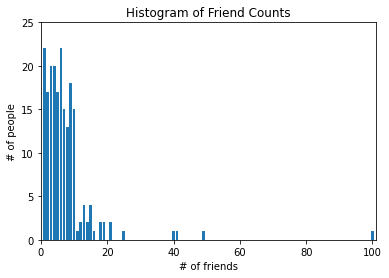

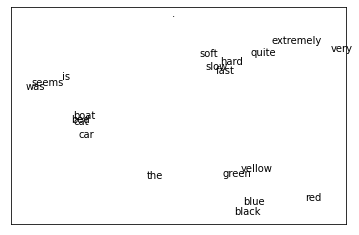

In [ ]:
from scratch.working_with_data import pca, transform   
import matplotlib.pyplot as plt  

# Extract the first two principal components and transform the word vectors 
components = pca(embedding.embeddings, 2)
transformed = transform(embedding.embeddings, components)

# Scatter the points (and make them white so they're "invisible")
fig, ax = plt.subplots()
ax.scatter(*zip(*transformed), marker='.', color='w')

# Add annotations for each word at its transformed location
for word, idx in vocab.w2i.items():
  ax.annotate(word, transformed[idx])

# And hide the axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

If you're interested, it's not hard to train CBOW word vectors. You'll have to do a little work. First, you'll need to modify the `Embedding` layer so that it takes as input a list of IDs and outputs a list of embedding vectors. Then you'll have to create a new layer (Sum?) that takes a list of vectors and returns their sum.

Each word represents a training example where the input is the word IDs for the surrounding words, and the target is the one-hot encoding of the word itself.

The modified `Embedding` layer turns the surrounding words into a list of vectors, the new `Sum` layer collapses the list of vectors down to a single vector, and then a `Linear` layer can produce scores that can be `softmaxed` to get a distribution representing "most likely words, given this context."

The CBOW model harder to train than the skip-gram one.

## **Recurrent Neural Networks**

The word vectors we developed in the previous section are often used as the inputs to neural networks. One challenge to doing this is that **sentences have varying lengths:** you could think of a 3-word sentence as a `[3, embedding_dim]` tensor and a 10-word sentence as a `[10, embedding_dim]` tensor. In order to, say, pass them to a `Linear` layer, we need to do something about the first variable-length dimension.

One option is to use a **Sum layer** (or a variant that takes the average); however, the **order** of the words in a sentence is usually **important to its meaning.** To take a common example, "dog bites man" and "man bites dog" are two very different stories!

Another way of handling this is using **recurrent neural networks (RNNs),** which have **a hidden state they maintain between inputs.** In the simplest case, each input in combined with the current hidden state to produce an output, which is then used as the new hidden state. This allows such networks to "remember" (in a sense) the inputs they've seen, and to build up to a final output that depends on all the inputs and their order.

We'll create pretty much the simplest possible RNN layer, which will accept a single input (corresponding to, e.g., a single word in a sentence, or a single character in a word), and which will maintain its hidden state beteen calls.

Recall the our `Linear` layer had some weights, w, and a bias, b. It took a vector `input` and produced a different vector as `output` using the logic:

    output[o] = dot(w[o], input) + b[o]

Here we'll want to incorporate our hidden state, so we'll have two sets of weights -one to apply to the `input` and one to apply to the previous `hidden` state:

    output[o] = dot(w[o], input) + dot(u[o], hidden) + b[o]

Next, we'll use the `output` vector as the new value of `hidden`. This isn't a huge change, but it will allowour networks to do wonderful things.

In [ ]:
from scratch.deep_learning import tensor_apply, tanh  

class SimpleRnn(Layer):
  """Just about the simplest possible recurrent layer."""
  def __init__(self, input_dim: int, hidden_dim: int) -> None:
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim  

    self.w = random_tensor(hidden_dim, input_dim, init='xavier')
    self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
    self.b = random_tensor(hidden_dim)

    self.reset_hidden_state()

  def reset_hidden_state(self) -> None:
    self.hidden = [0 for _ in range(self.hidden_dim)]

You can see that we start out the hidden state as a vector of 0s, and we provide a function that people using the network can call to reset the hidden state. 

Given this setup, the `forward` function is reasonably straightforward(at least, it is if you remember and understand how our `Linear` layer worked):

In [ ]:
def forward(self, input: Tensor) -> Tensor:
  self.input = input                         # Save both input and previous
  self.prev_hidden = self.hidden             # hidden state to use in backprop.

  a = [(dot(self.w[h], input) +              # weights @ input
        dot(self.u[h], self.hidden) +        # wegihts @ hidden
         self.b[h])                          # bias
        for h in range(self.hidden_dim)]

  self.hidden = tensor_apply(tanh, a)         # Apply tanh activation
  return self.hidden                          # and return the result.

The `backward` pass is similar to the one in our `Linear` layer, except that it needs to compute an additional set of gradients for the u weights:

In [ ]:
def backward(self, gradient: Tensor):
  # Backpropagate through the tanh
  a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
            for h in range(self.hidden_dim)]

  # b has the same gradient as a 
  self.b_grad = a_grad 

  # Each w[h][i] is multiplied by input[i] and added to a[h],
  # so each w_grad[h][i] = a_grad[h] * input[i]
  self.w_grad = [[a_grad[h] * self.input[i]
                  for i in range(self.input_dim)]
                 for h in range(self.hidden_dim)]

  # Each w[h][h2] is multiplied by input[h2] and added to a[h],
  # so each w_grad[h][h2] = a_grad[h] * prev_hidden[h2]
  self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                  for h2 in range(self.hidden_dim)]
                 for h in range(self.hidden_dim)]

  # Each input[i] is multiplied by every w[h][i] and added to a[h],
  # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
  return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
          for i in range(self.input_dim)]

And finally we need to override the `params` and `grads` methods:

In [ ]:
def params(self) -> Iterable[Tensor]:
  return [self.w, self.u, self.b]

def grads(self) -> Iterable[Tensor]:
  return [self.w_grad, self.u_grad, self.b_grad]

put it together

In [ ]:
from scratch.deep_learning import tensor_apply, tanh  

class SimpleRnn(Layer):
  """Just about the simplest possible recurrent layer."""
  def __init__(self, input_dim: int, hidden_dim: int) -> None:
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim  

    self.w = random_tensor(hidden_dim, input_dim, init='xavier')
    self.u = random_tensor(hidden_dim, hidden_dim, init='xavier')
    self.b = random_tensor(hidden_dim)

    self.reset_hidden_state()

  def reset_hidden_state(self) -> None:
    self.hidden = [0 for _ in range(self.hidden_dim)]

  def forward(self, input: Tensor) -> Tensor:
    self.input = input                         # Save both input and previous
    self.prev_hidden = self.hidden             # hidden state to use in backprop.

    a = [(dot(self.w[h], input) +              # weights @ input
          dot(self.u[h], self.hidden) +        # wegihts @ hidden
          self.b[h])                          # bias
          for h in range(self.hidden_dim)]

    self.hidden = tensor_apply(tanh, a)         # Apply tanh activation
    return self.hidden                          # and return the result.

  def backward(self, gradient: Tensor):
    # Backpropagate through the tanh
    a_grad = [gradient[h] * (1 - self.hidden[h] ** 2)
              for h in range(self.hidden_dim)]

    # b has the same gradient as a 
    self.b_grad = a_grad 

    # Each w[h][i] is multiplied by input[i] and added to a[h],
    # so each w_grad[h][i] = a_grad[h] * input[i]
    self.w_grad = [[a_grad[h] * self.input[i]
                    for i in range(self.input_dim)]
                  for h in range(self.hidden_dim)]

    # Each w[h][h2] is multiplied by input[h2] and added to a[h],
    # so each w_grad[h][h2] = a_grad[h] * prev_hidden[h2]
    self.u_grad = [[a_grad[h] * self.prev_hidden[h2]
                    for h2 in range(self.hidden_dim)]
                  for h in range(self.hidden_dim)]

    # Each input[i] is multiplied by every w[h][i] and added to a[h],
    # so each input_grad[i] = sum(a_grad[h] * w[h][i] for h in ...)
    return [sum(a_grad[h] * self.w[h][i] for h in range(self.hidden_dim))
            for i in range(self.input_dim)]

  def params(self) -> Iterable[Tensor]:
    return [self.w, self.u, self.b]

  def grads(self) -> Iterable[Tensor]:
    return [self.w_grad, self.u_grad, self.b_grad]

Our **`SimpleRnn` has a couple of undesirable features.** One is that its entire **hidden state** is used to **update the input every time you call it.** the other is that the **entire hidden state is overwritten** every time you call it. Both of these make it difficult to train; in particular, they make it difficult for the model to learn long-range dependencies.

For this reason, almost **no one uses this kind of simple RNN**. Instead, they use **more complicated variants** like the **LSTM** ("long short-term memory") or the **GRU** ("gated recurrent unit"), which have many more parameters and use parametrized "gates" that allow only some of the state to be updated (and only some of the stae to be used) at each timestep.

There is nothing particularly difficult about these variants; however, they involve a great deal more code.

One other quirk of our implementation is that is **takes only one "step" at a time and requires us to manually reset the hidden state.** A more practical RNN implementation might accept sequences of inputs, set its hidden state to 0s at the begining of each sequence, and produce sequences of outputs. Ours could certainly be modified to behave this way; again, this would require more code and complexity for little gain in understanding.

## **Example: Using a Character-Level RNN**

The newly hired VP of Branding did not come up with the name DataSciencester himself, and (accordingly) he suspects that a better name might lead to more success for the company. He asks you to use data science to suggest candidates for replacement.

One "cute" application of RNNs involves using characters (rather than words) as their inputs, training them to learn the subtle language patterns in some dataset, and then using them to generate fictional instances from that dataset.

For example, you could train an RNN on the names of alternative bands, use the trained model to generate new names for fake alternative bands, and then hand-select the funniest ones and share them on Twitter. Hilarity!

Having seen this trick enough times to no longer consider it clever, you decide to give it a shot.

After some digging, you find that the startup accelerator Y Combinator has published **a list of most successful startups,** which seems like a good starting point. Checking the page, you find that the company names all live inside \<b class="company-name"\> tags, which means it's easy to use your web scraping skills to retrieve them:

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://www.ycombinator.com/topcompanies/"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# We get the companies twice, so use a set comprehension to deduplicate.

In [ ]:
companies = list(set([a.text for a in soup.find_all('a', {'class': 'company-name'})]))

len(companies)

314

In [ ]:
list(companies)[:20]

['LAIKA',
 'Embrace',
 'Endpoint Health',
 'Frubana Inc',
 'PostHog',
 'Drip Capital',
 'Aspire',
 'Eden',
 'Substack',
 'Clever',
 'Instabug',
 'Rainbow',
 'SFOX',
 'Whatnot',
 'Alpaca',
 'PlanGrid',
 'Goldbelly',
 'Culdesac',
 'STARK BANK',
 'Boom']

As always, the page may change (or vanish), in which case this code won't work. If so, you can use your newly learned data science skills to fix it or just get the list  from the book's GitHub site.

So what is our plan? We'll train a model to predict the next character of a name, given the current character and a hidden state representing all the characters we've seen so far.

As usual, we'll actually predict a probability distribution over characters and train our model to minimize the `SoftmaxCrossEntropy` loss.

Once our model is trained, we can use it to generate some probabilities, randomly sample a character according to those probabilities, and then feed that character as its next input. This will allow us to generate company names using the learned weights.

To start with, we should build a Vocabulary from the chracters in the names:



In [ ]:
vocab = Vocabulary([c for company in companies for c in company])

In addition, we'll use special tokens to signify the start and end of a company name. This allows the model to learn which characters should begin a company name and also to learn when a company names is finished.


We'll just use the regex characters for start and end, which (luckily) don't appear in our list of companies:

In [ ]:
START = "^"
STOP = "$"

# We need to add them to the vocabulary too.
vocab.add(START)
vocab.add(STOP)

For our model, we'll one-hot-encode each chracter, pass it through two `SimpleRnns`, and then use a `Linear` layer to generate the scores for each possible next character:

In [ ]:
HIDDEN_DIM = 32  # You should experiment with different sizes!

rnn1 = SimpleRnn(input_dim=vocab.size, hidden_dim=HIDDEN_DIM)
rnn2 = SimpleRnn(input_dim=HIDDEN_DIM, hidden_dim=HIDDEN_DIM)
linear = Linear(input_dim=HIDDEN_DIM, output_dim=vocab.size)

model = Sequential([
    rnn1,
    rnn2,
    linear
])

Imagine for the moment that we've trained this model. Let's write the function that uses it to generate new company names, using the `sample_from` function from **"Topic Modeling"**:

In [ ]:
from scratch.deep_learning import softmax

def generate(seed: str= START, max_len: int = 50) -> str:
  rnn1.reset_hidden_state()               # Reset both hidden states 
  rnn2.reset_hidden_state()
  output = [seed]                         # Start the output with the specified seed

  # Keep going until we produce the STOP character or reach the max length
  while output[-1] != STOP and len(output) < max_len:
    # Use the last character as the input
    input = vocab.one_hot_encode(output[-1])

    # Generate scores using the model
    predicted = model.forward(input)

    # Convert then to probabilities and draw a random char_id
    probabilities = softmax(predicted)
    next_char_id = sample_from(probabilities)

    # Add the corresponding char to our output
    output.append(vocab.get_word(next_char_id))   

  # Get rid of START and END characters and return the word
  return ''.join(output[1:-1])

At long last, we're ready to train our character-level RNN. It will take a while!

In [ ]:
import random 

loss = SoftmaxCrossEntropy()
optimizer = Momentum(learning_rate=0.01, momentum=0.9)

for epoch in range(300):
  random.shuffle(companies)              # Train in a different order each epoch
  epoch_loss = 0                         # Track the loss
  for company in tqdm.tqdm(companies):
    rnn1.reset_hidden_state()            # Reset both hidden states.
    rnn2.reset_hidden_state() 
    company = START + company + STOP     # Add START and STOP characters.

    # The rest is just our usual training loop, except that the inputs
    # and target are the one-hot-encoded previous and next characters.
    for prev, next in zip(company, company[1:]):
      input = vocab.one_hot_encode(prev) 
      target = vocab.one_hot_encode(next)
      predicted = model.forward(input)
      epoch_loss += loss.loss(predicted, target)
      gradient = loss.gradient(predicted, target)
      model.backward(gradient)
      optimizer.step(model)

  # Each epoch, print the loss and also generate a name.
  print(epoch, epoch_loss, generate())

  # Turn down the learning rate for the last 100 epochs.
  # There's no principled reason for this, but it seems to work.
  if epoch == 200:
    optimizer.lr *= 0.1

100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


0 10210.82825642245 'Rgrunmr H


100%|██████████| 314/314 [00:22<00:00, 14.18it/s]


1 9660.090311162961 tas


100%|██████████| 314/314 [00:23<00:00, 13.28it/s]


2 9399.031338056951 Kdsii'arBy


100%|██████████| 314/314 [00:22<00:00, 14.11it/s]


3 9188.542791141883 Amtrirc


100%|██████████| 314/314 [00:22<00:00, 14.23it/s]


4 9063.076223017413 Aaailbo


100%|██████████| 314/314 [00:22<00:00, 14.17it/s]


5 8985.576861031548 Euta


100%|██████████| 314/314 [00:22<00:00, 14.20it/s]


6 8903.71742161395 Blaoce


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


7 8845.906899378017 MaheB.h


100%|██████████| 314/314 [00:22<00:00, 14.27it/s]


8 8783.243212243155 CpuwggoSrec


100%|██████████| 314/314 [00:22<00:00, 14.12it/s]


9 8713.440724603523 HeyleceAanhe


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


10 8656.02260695791 Goriauho


100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


11 8584.808010135243 SobproSW


100%|██████████| 314/314 [00:23<00:00, 13.30it/s]


12 8526.261253710592 Gesd


100%|██████████| 314/314 [00:22<00:00, 14.27it/s]


13 8478.700241735001 YepeoE


100%|██████████| 314/314 [00:22<00:00, 14.22it/s]


14 8432.192962463514 Davueche


100%|██████████| 314/314 [00:22<00:00, 14.24it/s]


15 8395.232701170358 ARrela Scgh


100%|██████████| 314/314 [00:22<00:00, 14.23it/s]


16 8361.895649463037 Docerotasrkec


100%|██████████| 314/314 [00:22<00:00, 14.22it/s]


17 8308.39870510194 Ianvanacosaikkols


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


18 8273.760101424059 Hilgura


100%|██████████| 314/314 [00:22<00:00, 14.10it/s]


19 8212.987390879714 Canf


100%|██████████| 314/314 [00:22<00:00, 14.17it/s]


20 8179.902446312356 Sleipzer


100%|██████████| 314/314 [00:22<00:00, 14.22it/s]


21 8148.940266115423 Calty Naty


100%|██████████| 314/314 [00:23<00:00, 13.32it/s]


22 8087.542354534798 Rein3


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


23 8051.616376412238 Qile Imoseege


100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


24 7989.096830347122 Anoly


100%|██████████| 314/314 [00:22<00:00, 14.24it/s]


25 7971.737918672035 Dregerbatis


100%|██████████| 314/314 [00:22<00:00, 14.18it/s]


26 7936.026654411265 GroBacvoX


100%|██████████| 314/314 [00:21<00:00, 14.29it/s]


27 7875.871266524331 Rarexentviln


100%|██████████| 314/314 [00:22<00:00, 14.23it/s]


28 7841.656962207007 Rangre Beshs


100%|██████████| 314/314 [00:22<00:00, 14.20it/s]


29 7816.12810329825 Rhlapaos


100%|██████████| 314/314 [00:22<00:00, 14.21it/s]


30 7756.567005821704 Risunrioms Snh


100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


31 7709.26640612561 Beachtaby dlenkhux


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


32 7689.678646935419 Sdeabilesoiit


100%|██████████| 314/314 [00:23<00:00, 13.23it/s]


33 7662.855619828525 SDakWer


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


34 7600.798833469398 Worlences


100%|██████████| 314/314 [00:22<00:00, 14.22it/s]


35 7573.112570370035 Meliedle.


100%|██████████| 314/314 [00:22<00:00, 14.19it/s]


36 7531.427155809989 Rhirpar


100%|██████████| 314/314 [00:22<00:00, 14.18it/s]


37 7505.74482852944 Gegder


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


38 7447.983754462247 Papdictontoaith


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


39 7441.715888312697 RenubitanD


100%|██████████| 314/314 [00:22<00:00, 14.11it/s]


40 7407.627977527771 Belune


100%|██████████| 314/314 [00:22<00:00, 13.98it/s]


41 7333.630571209836 RAGeleos


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


42 7298.887686931888 Xerolalyhar


100%|██████████| 314/314 [00:23<00:00, 13.25it/s]


43 7303.906249098092 Hre.o


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


44 7218.29228732052 Zapamp


100%|██████████| 314/314 [00:22<00:00, 14.12it/s]


45 7222.842687158949 Weblel


100%|██████████| 314/314 [00:22<00:00, 14.01it/s]


46 7196.428607651469 Plexivy


100%|██████████| 314/314 [00:22<00:00, 14.20it/s]


47 7154.9830164316745 Smep Ceemlos


100%|██████████| 314/314 [00:22<00:00, 14.24it/s]


48 7121.459151195466 VercoS


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


49 7111.457900446902 Veud


100%|██████████| 314/314 [00:22<00:00, 14.21it/s]


50 7066.324411974514 Visntore


100%|██████████| 314/314 [00:22<00:00, 14.16it/s]


51 7069.454042584747 NliirtAs


100%|██████████| 314/314 [00:22<00:00, 14.11it/s]


52 7004.681632709169 Garea AEA


100%|██████████| 314/314 [00:23<00:00, 13.17it/s]


53 6974.7517700427325 Jer3o


100%|██████████| 314/314 [00:22<00:00, 14.18it/s]


54 6943.005374044111 Nas3He.af


100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


55 6912.09791808126 Prokdin


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


56 6876.57371041765 Ajemuex


100%|██████████| 314/314 [00:22<00:00, 14.13it/s]


57 6904.551109443142 AmoskoS


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


58 6856.531342005183 Bishtod


100%|██████████| 314/314 [00:22<00:00, 14.08it/s]


59 6780.640918235634 HeoPisevogirdn


100%|██████████| 314/314 [00:22<00:00, 14.05it/s]


60 6758.306858826916 Dimpix


100%|██████████| 314/314 [00:22<00:00, 14.12it/s]


61 6780.351185495235 InstDrw


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


62 6743.373407307296 Roren


100%|██████████| 314/314 [00:23<00:00, 13.20it/s]


63 6714.00284961345 FroRAs


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


64 6688.4900938996225 Tkappo


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


65 6659.172135486772 Convoy


100%|██████████| 314/314 [00:22<00:00, 14.02it/s]


66 6645.3824788920865 Oshi 


100%|██████████| 314/314 [00:22<00:00, 14.06it/s]


67 6617.829302569043 Herko


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


68 6609.4254705637195 Cochess


100%|██████████| 314/314 [00:22<00:00, 14.11it/s]


69 6571.838628612287 Rordimaty


100%|██████████| 314/314 [00:22<00:00, 14.05it/s]


70 6515.709034228585 Kirenoichif


100%|██████████| 314/314 [00:22<00:00, 14.00it/s]


71 6548.31503655549 Suxno


100%|██████████| 314/314 [00:22<00:00, 13.98it/s]


72 6488.56095134796 Cepuerteve


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


73 6522.480695340497 Thefpent


100%|██████████| 314/314 [00:23<00:00, 13.22it/s]


74 6464.91652668544 tloDoteCietacatest


100%|██████████| 314/314 [00:22<00:00, 14.02it/s]


75 6487.308825070067 Dergesdeattes


100%|██████████| 314/314 [00:22<00:00, 13.94it/s]


76 6427.147004372659 Jantu


100%|██████████| 314/314 [00:22<00:00, 13.95it/s]


77 6461.479298875226 Purit


100%|██████████| 314/314 [00:22<00:00, 14.05it/s]


78 6429.286284514526 Yiperele


100%|██████████| 314/314 [00:22<00:00, 14.06it/s]


79 6347.684387623502 FiGwAs


100%|██████████| 314/314 [00:22<00:00, 14.02it/s]


80 6400.177189812057 Scacher


100%|██████████| 314/314 [00:22<00:00, 13.99it/s]


81 6371.879095005037 SmlicDk


100%|██████████| 314/314 [00:22<00:00, 13.91it/s]


82 6359.557143326086 Anbi


100%|██████████| 314/314 [00:22<00:00, 13.93it/s]


83 6388.031325590286 Pastiv


100%|██████████| 314/314 [00:23<00:00, 13.17it/s]


84 6337.8317741739975 Cagnancol


100%|██████████| 314/314 [00:22<00:00, 13.95it/s]


85 6305.543940189739 Mebfi


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


86 6354.0041925465175 Slbling


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


87 6357.288742515458 Cocacky


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


88 6336.24270408187 DowtASooight


100%|██████████| 314/314 [00:22<00:00, 13.96it/s]


89 6313.198487310262 Esmia


100%|██████████| 314/314 [00:22<00:00, 13.91it/s]


90 6283.150096351104 Remp


100%|██████████| 314/314 [00:22<00:00, 14.16it/s]


91 6316.326202476219 Hugmet


100%|██████████| 314/314 [00:22<00:00, 14.16it/s]


92 6303.740360782982 Rekga


100%|██████████| 314/314 [00:22<00:00, 14.15it/s]


93 6355.516637424363 Cackit


100%|██████████| 314/314 [00:23<00:00, 13.25it/s]


94 6335.377777885842 E4pely


100%|██████████| 314/314 [00:22<00:00, 14.18it/s]


95 6228.33918555413 Newfrand


100%|██████████| 314/314 [00:22<00:00, 14.11it/s]


96 6243.972667949549 Muve Cayaouv


100%|██████████| 314/314 [00:22<00:00, 14.03it/s]


97 6270.178104472347 Osunbr.,is


100%|██████████| 314/314 [00:22<00:00, 13.95it/s]


98 6310.063259156769 Tovero


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


99 6330.019588454069 Helelice


100%|██████████| 314/314 [00:22<00:00, 14.05it/s]


100 6316.557026246123 Beet


100%|██████████| 314/314 [00:22<00:00, 13.97it/s]


101 6242.287616028062 RAIRDombe


100%|██████████| 314/314 [00:22<00:00, 14.06it/s]


102 6159.457494307309 Stry


100%|██████████| 314/314 [00:22<00:00, 14.14it/s]


103 6127.142781559171 Hog


100%|██████████| 314/314 [00:23<00:00, 13.20it/s]


104 6219.987363660349 Mointycenperelics


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


105 6259.485618697911 Fellramg


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


106 6233.564253850572 Qtovanc


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


107 6156.4085844244055 Opire Biomcer


100%|██████████| 314/314 [00:22<00:00, 13.96it/s]


108 6215.46321839302 Gale


100%|██████████| 314/314 [00:22<00:00, 13.99it/s]


109 6162.090640448936 Spalb


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


110 6138.551223017062 Scacty


100%|██████████| 314/314 [00:22<00:00, 13.85it/s]


111 6172.832680535075 Croise


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


112 6070.7317700873145 Metor


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


113 6110.210978673334 Clasy


100%|██████████| 314/314 [00:24<00:00, 12.96it/s]


114 6156.722429556071 Gasiin


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


115 6068.239680886663 Hemread


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


116 6002.035810313145 Meestare


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


117 6093.3318818248545 Gitly


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


118 6114.433209930082 Place


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


119 6065.872398233801 Cochonegl


100%|██████████| 314/314 [00:22<00:00, 13.91it/s]


120 6153.458388398946 CilrCrim


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


121 6068.774339771808 Grode Lrode


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


122 6050.977244006047 Luroerio


100%|██████████| 314/314 [00:22<00:00, 14.03it/s]


123 6152.200249474821 Astid BueEty


100%|██████████| 314/314 [00:23<00:00, 13.14it/s]


124 6103.500327213641 Qitbar


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


125 6070.204411355347 Fezf Eealthe Serd


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


126 6040.8970515938845 Sippleb


100%|██████████| 314/314 [00:22<00:00, 13.66it/s]


127 6050.346646644611 Buvuby


100%|██████████| 314/314 [00:22<00:00, 13.77it/s]


128 6113.163727359019 Open Sabo


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


129 5966.694702891433 Relaren


100%|██████████| 314/314 [00:22<00:00, 13.94it/s]


130 6094.7518143236875 Atow S


100%|██████████| 314/314 [00:22<00:00, 13.83it/s]


131 6019.264182921794 DePity


100%|██████████| 314/314 [00:22<00:00, 13.99it/s]


132 6000.3870712914495 Clicd  Hact


100%|██████████| 314/314 [00:22<00:00, 14.07it/s]


133 6001.073589997978 Opmicebydadg


100%|██████████| 314/314 [00:24<00:00, 13.08it/s]


134 6027.767737752079 Loep


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


135 6091.800427372082 Bapler Hechen Bife3t


100%|██████████| 314/314 [00:22<00:00, 13.68it/s]


136 6084.924629590808 Remboowolig


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


137 6054.476689528387 Maseai


100%|██████████| 314/314 [00:22<00:00, 13.85it/s]


138 5973.0724753282275 Sighest


100%|██████████| 314/314 [00:22<00:00, 13.94it/s]


139 6004.380356333066 Cover


100%|██████████| 314/314 [00:22<00:00, 13.99it/s]


140 6027.211245055295 Govall


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


141 6057.155763298769 Corea


100%|██████████| 314/314 [00:22<00:00, 13.85it/s]


142 5998.546775310736 Subpovabigdealth


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


143 6019.011205933668 Kolle


100%|██████████| 314/314 [00:24<00:00, 13.04it/s]


144 5922.896931135877 Qistank


100%|██████████| 314/314 [00:22<00:00, 13.94it/s]


145 5782.5142693200605 Reddeck


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


146 5959.196670173616 Atltenp


100%|██████████| 314/314 [00:22<00:00, 13.97it/s]


147 5862.668776806517 Lnirgeantur


100%|██████████| 314/314 [00:22<00:00, 13.96it/s]


148 6031.226134463918 Kobuc. Znvaing


100%|██████████| 314/314 [00:22<00:00, 14.05it/s]


149 6024.5562624694785 Coog


100%|██████████| 314/314 [00:22<00:00, 14.02it/s]


150 6016.833579026176 Mainmack


100%|██████████| 314/314 [00:22<00:00, 14.04it/s]


151 5931.29290466259 Fard


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


152 5839.106013354365 Smerer


100%|██████████| 314/314 [00:22<00:00, 14.03it/s]


153 6044.983912356318 niversstetuce oos


100%|██████████| 314/314 [00:23<00:00, 13.09it/s]


154 5867.692843912386 Outshfise


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


155 5919.73338934339 Omgass


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


156 5899.255702294701 Ellaba Rry


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


157 5876.120248367031 Apontor


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


158 5932.133889193224 Pep


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


159 5853.466409220876 Fronerde LhalleaythasA


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


160 5851.232238593111 SRAZisptisewonc


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


161 5857.49177009703 Noldaud


100%|██████████| 314/314 [00:22<00:00, 13.77it/s]


162 5880.086934280093 Tbycite


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


163 5804.129210452217 BeGomble.arts


100%|██████████| 314/314 [00:23<00:00, 13.09it/s]


164 5896.109944986478 KamEip


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


165 5865.836689738854 Oreippo.


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


166 5854.887430427925 Qisrrabas


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


167 5818.718938774116 Jervo.neal


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


168 5813.057824268033 Hode


100%|██████████| 314/314 [00:22<00:00, 14.00it/s]


169 5823.482777842427 Vop


100%|██████████| 314/314 [00:22<00:00, 13.93it/s]


170 5806.24318174861 Joudbo


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


171 5876.042899393691 SFrincam


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


172 5884.342366866358 Plistian


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


173 5826.591095620154 Houve


100%|██████████| 314/314 [00:24<00:00, 13.08it/s]


174 5803.28799349602 Compa


100%|██████████| 314/314 [00:22<00:00, 13.86it/s]


175 5842.200380529349 Bithty


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


176 5955.157669478349 Woca CayTecs


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


177 5953.960310520689 Duily


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


178 5850.244422238067 Kom


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


179 5917.360006831113 Meverit


100%|██████████| 314/314 [00:22<00:00, 13.72it/s]


180 5952.142489211545 Sundby


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


181 5814.915076880893 Baureie


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


182 5774.127975105498 Coopen


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


183 5797.876580089217 Aon Lhang


100%|██████████| 314/314 [00:22<00:00, 13.89it/s]


184 5839.118468151832 Pivelia


100%|██████████| 314/314 [00:23<00:00, 13.10it/s]


185 5833.20912525831 Linsay


100%|██████████| 314/314 [00:22<00:00, 13.99it/s]


186 5820.442655793192 IronceStialth


100%|██████████| 314/314 [00:22<00:00, 13.87it/s]


187 5782.630170920092 Cefca


100%|██████████| 314/314 [00:22<00:00, 13.69it/s]


188 5722.732539081616 Veeves


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


189 5812.93763272764 Gordodl


100%|██████████| 314/314 [00:22<00:00, 13.80it/s]


190 5799.317962855919 Pnonstit


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


191 5821.433547061402 Clish


100%|██████████| 314/314 [00:22<00:00, 13.77it/s]


192 5778.58651766405 SnapNA


100%|██████████| 314/314 [00:23<00:00, 13.56it/s]


193 5803.5990469890585 Phics


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


194 5795.966935102947 Mriben


100%|██████████| 314/314 [00:24<00:00, 12.92it/s]


195 5827.505862582513 Kamelily


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


196 5845.279367167592 LeveNolyMenm


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


197 5769.408975726782 Sepcri


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


198 5806.997610175356 Vux


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


199 5781.655429244995 Cux


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


200 5805.531021018276 Odeno


100%|██████████| 314/314 [00:22<00:00, 13.94it/s]


201 5188.435208287883 Rikife


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


202 4944.6919918462545 Tighty Goeuty


100%|██████████| 314/314 [00:22<00:00, 13.88it/s]


203 4836.774498846076 Hacmeonowss A


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


204 4784.80824733156 Yob


100%|██████████| 314/314 [00:24<00:00, 12.89it/s]


205 4728.871622030495 Landeddeac


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


206 4704.811765050026 Canpomealth


100%|██████████| 314/314 [00:22<00:00, 13.73it/s]


207 4670.987741143158 Ashby


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


208 4655.455183211646 Rubuty


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


209 4627.382179851707 Jellork


100%|██████████| 314/314 [00:23<00:00, 13.57it/s]


210 4603.207816572114 Buenmof


100%|██████████| 314/314 [00:23<00:00, 13.56it/s]


211 4581.2169287763345 Ox


100%|██████████| 314/314 [00:23<00:00, 13.61it/s]


212 4569.656651933374 Haler


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


213 4547.915364860962 Nopicrer


100%|██████████| 314/314 [00:22<00:00, 13.71it/s]


214 4558.28156400172 Clexm oloCrems


100%|██████████| 314/314 [00:24<00:00, 12.92it/s]


215 4541.955932908973 Toner


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


216 4534.4825091814155 Slapale


100%|██████████| 314/314 [00:22<00:00, 13.84it/s]


217 4519.29171274348 Sogm


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


218 4521.436724256968 Convlite


100%|██████████| 314/314 [00:22<00:00, 13.65it/s]


219 4490.072502935308 TrucA


100%|██████████| 314/314 [00:22<00:00, 13.67it/s]


220 4476.0520854296965 Pash


100%|██████████| 314/314 [00:22<00:00, 13.67it/s]


221 4476.443570714274 Pass


100%|██████████| 314/314 [00:22<00:00, 13.72it/s]


222 4464.701772649532 Endgntank


100%|██████████| 314/314 [00:22<00:00, 13.68it/s]


223 4446.053071229392 Memord


100%|██████████| 314/314 [00:22<00:00, 13.73it/s]


224 4426.404171139966 Zasherlabsave


100%|██████████| 314/314 [00:24<00:00, 12.90it/s]


225 4425.288783880206 Jattecaestaings


100%|██████████| 314/314 [00:22<00:00, 13.73it/s]


226 4420.817781928128 Submer


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


227 4420.197781058102 KalshirT


100%|██████████| 314/314 [00:22<00:00, 13.75it/s]


228 4401.651979916433 Assevler


100%|██████████| 314/314 [00:22<00:00, 13.72it/s]


229 4406.383783611869 Mrabpe.


100%|██████████| 314/314 [00:22<00:00, 13.68it/s]


230 4386.128106941943 ANperty


100%|██████████| 314/314 [00:23<00:00, 13.61it/s]


231 4401.122983394965 Oump


100%|██████████| 314/314 [00:22<00:00, 13.71it/s]


232 4380.810902883335 Instays In Bo


100%|██████████| 314/314 [00:22<00:00, 13.72it/s]


233 4374.181530482887 ConGCayme


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


234 4374.687446602202 Ambittz


100%|██████████| 314/314 [00:24<00:00, 12.90it/s]


235 4366.875154031983 TAAKhle


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


236 4371.300814306204 Mash


100%|██████████| 314/314 [00:22<00:00, 13.85it/s]


237 4352.978328040662 Coisire


100%|██████████| 314/314 [00:22<00:00, 13.90it/s]


238 4357.717934285143 Institix


100%|██████████| 314/314 [00:22<00:00, 13.75it/s]


239 4355.893844733898 Routabl


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


240 4343.4680192875485 RePaculic


100%|██████████| 314/314 [00:22<00:00, 13.81it/s]


241 4342.459426959147 Buaghlacetyto


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


242 4344.188676525011 Fitn Incrijk


100%|██████████| 314/314 [00:22<00:00, 13.75it/s]


243 4325.38756566883 SunclSycorii


100%|██████████| 314/314 [00:22<00:00, 13.73it/s]


244 4333.070646906774 Sendwave


100%|██████████| 314/314 [00:24<00:00, 12.94it/s]


245 4320.225476607725 Asser Cartare


100%|██████████| 314/314 [00:23<00:00, 13.61it/s]


246 4322.1159199549475 Nomponvuksa Hoy


100%|██████████| 314/314 [00:23<00:00, 13.60it/s]


247 4317.820005647686 Shefpo Mend Caysins


100%|██████████| 314/314 [00:22<00:00, 13.69it/s]


248 4318.414340420776 Heabhire


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]


249 4308.436875050452 Dandea


100%|██████████| 314/314 [00:22<00:00, 13.68it/s]


250 4319.546530421044 Gem


100%|██████████| 314/314 [00:22<00:00, 13.72it/s]


251 4308.974008174141 Neven


100%|██████████| 314/314 [00:22<00:00, 13.67it/s]


252 4290.115990187994 Cockanort


100%|██████████| 314/314 [00:23<00:00, 13.58it/s]


253 4303.172257705221 Mepno


100%|██████████| 314/314 [00:23<00:00, 13.59it/s]


254 4282.774782835077 Bivmo


100%|██████████| 314/314 [00:24<00:00, 12.74it/s]


255 4291.522885685464 TrocMackes


100%|██████████| 314/314 [00:22<00:00, 13.67it/s]


256 4301.0620697111735 Dutinon Hend


100%|██████████| 314/314 [00:23<00:00, 13.62it/s]


257 4274.083475984527 SeCEGo


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


258 4267.514001868014 Dro


100%|██████████| 314/314 [00:23<00:00, 13.65it/s]


259 4269.096268925901 Notablean


100%|██████████| 314/314 [00:23<00:00, 13.63it/s]


260 4267.383478571105 Albrio


100%|██████████| 314/314 [00:23<00:00, 13.52it/s]


261 4286.580473155958 Vero3 Anuns


100%|██████████| 314/314 [00:23<00:00, 13.43it/s]


262 4273.164198662373 Fozire IQ Healtringhes


100%|██████████| 314/314 [00:23<00:00, 13.58it/s]


263 4255.4119695761365 Superd


100%|██████████| 314/314 [00:22<00:00, 13.68it/s]


264 4258.402059910827 Wezcllemis


100%|██████████| 314/314 [00:24<00:00, 12.85it/s]


265 4267.191968467832 Galpa


100%|██████████| 314/314 [00:23<00:00, 13.60it/s]


266 4249.265462266275 tloC Futuchni


100%|██████████| 314/314 [00:23<00:00, 13.60it/s]


267 4240.232076781649 Cocu


100%|██████████| 314/314 [00:23<00:00, 13.48it/s]


268 4240.090491629761 Ironclo.


100%|██████████| 314/314 [00:23<00:00, 13.45it/s]


269 4241.622458662053 Supabs, Faure


100%|██████████| 314/314 [00:22<00:00, 13.70it/s]


270 4247.832227928636 Lareechy


100%|██████████| 314/314 [00:23<00:00, 13.57it/s]


271 4235.986479561233 Instaboozs


100%|██████████| 314/314 [00:23<00:00, 13.59it/s]


272 4228.831908927125 Modern Heercrave


100%|██████████| 314/314 [00:22<00:00, 13.70it/s]


273 4228.069222311182 Sipetasare


100%|██████████| 314/314 [00:24<00:00, 12.91it/s]


274 4223.927770619687 Kostare


100%|██████████| 314/314 [00:22<00:00, 13.71it/s]


275 4221.7185826176465 Unbabivit


100%|██████████| 314/314 [00:23<00:00, 13.64it/s]


276 4203.475609993077 HeafGrit


100%|██████████| 314/314 [00:22<00:00, 13.66it/s]


277 4203.60529114375 Outlek Bualss


100%|██████████| 314/314 [00:23<00:00, 13.50it/s]


278 4199.599226971655 OpenSars,0


100%|██████████| 314/314 [00:23<00:00, 13.38it/s]


279 4213.485647480764 Qvishe


100%|██████████| 314/314 [00:23<00:00, 13.32it/s]


280 4205.8347217872315 Unsco


100%|██████████| 314/314 [00:23<00:00, 13.32it/s]


281 4205.304730889892 Tocavite Ino Gench


100%|██████████| 314/314 [00:23<00:00, 13.32it/s]


282 4183.945912837028 Penpaily


100%|██████████| 314/314 [00:23<00:00, 13.16it/s]


283 4186.745497355705 Brubre


100%|██████████| 314/314 [00:24<00:00, 12.77it/s]


284 4192.861854442911 Haye


100%|██████████| 314/314 [00:22<00:00, 13.79it/s]


285 4180.15084742406 Blatnoesky


100%|██████████| 314/314 [00:22<00:00, 13.71it/s]


286 4189.958964516296 Livbavely


100%|██████████| 314/314 [00:22<00:00, 13.80it/s]


287 4181.268541621036 Fleam Balth.iciver


100%|██████████| 314/314 [00:22<00:00, 13.82it/s]


288 4204.693168514095 Futow


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


289 4182.0465561798965 Bloot


100%|██████████| 314/314 [00:22<00:00, 13.78it/s]


290 4190.293358450037 Nelch


100%|██████████| 314/314 [00:22<00:00, 13.70it/s]


291 4195.175654757367 Opmict


100%|██████████| 314/314 [00:23<00:00, 13.60it/s]


292 4196.499940175966 Duru


100%|██████████| 314/314 [00:23<00:00, 13.57it/s]


293 4193.698365428663 Fronme


100%|██████████| 314/314 [00:24<00:00, 12.82it/s]


294 4177.172294188853 Clipp


100%|██████████| 314/314 [00:23<00:00, 13.57it/s]


295 4205.700127953922 FlexpoonTertece


100%|██████████| 314/314 [00:23<00:00, 13.33it/s]


296 4205.010548183261 Platy


100%|██████████| 314/314 [00:23<00:00, 13.45it/s]


297 4199.798281240016 Shipper EOA


100%|██████████| 314/314 [00:23<00:00, 13.61it/s]


298 4204.177041076776 Featatewith


100%|██████████| 314/314 [00:22<00:00, 13.76it/s]

299 4201.462155199047 WituctiatellacOH


After training, the model generates some actual names for the list (which isn't surprising, since the model has a fair amount of capacity and not a lot of training data), as well as names that are only slightly different from training names (Scripe, Loinbare, Pozium), names that seem genuinely creative (Benuus, Cletpo, Equite, Vivest), and names that are garbage-y but still sort of word-like (SFitreasy, Sint ocanelp, GliyOx, Doorboronelyhav).

Unfortunately, like most character-level-RNN outputs, these are only mildly clever, and the VP of Brading ends up unable to use them.

If I up the hidden dimension to 64, I get a lot more names verbatim for the list; if I drop it to 8, I get mostly garbage. 

# <center><b>Chapter 22. Network Analysis</b></center>

Many interesting **data problems** can be fruitfully **thought of in terms of networks,** consisting of **nodes** of some type and the **edges** that join them.

* direct edges      o <--- o, or o ---> o
* undirected edges  o <---> o

## **Betweenness Centrality**

In Chapter 1, we computed the key connectors in the DataSciencester network by counting the number of friends each user had. Now we have enough machinery to take a look at other approaches. We will use the same network, but now we'll use `NamedTuples` for the data.

Recall that the network (Figure 22-1) comprised user:

In [ ]:
from typing import NamedTuple

class User(NamedTuple):
  id: int
  name: str 


users = [User(0, "Hero"), User(1, "Dunn"), User(2, "Sue"),
        User(3, "Chi"), User(4, "Thor"), User(5, "Clive"),
        User(6, "Hicks"), User(7, "Devin"), User(8, "Kate"),
        User(9, "Klein")]

friend_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [ ]:
from typing import Dict, List 

# type alias for keeping track of Friendships
Friendships = Dict[int, List[int]]

friendships: Friendships = {user.id: [] for user in users} 

for i, j in friend_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

assert friendships[4] == [3, 5]
assert friendships[8] == [6, 7, 9]

In [ ]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

When we left off we were dissatisfiend with our notion of degree centrality, which didn't really agree with our intuition about who the key connectors of the network were.

An alternative metric is betweenness centrality, which identifies people who frequently are on the shortest paths between pairs of other people. In particular, the betweenness centrality of node i is computed by adding up, for every other pair of nodes j and k, the proportion of shortest paths between node j and node k that pass through i. 

That is, to figure out Thor's betweenness centrality, we'll need to compute all the shortest paths between all pairs of people who aren't Thor, And then we'll need to count how many of those shortest paths pass through Thor. For instance, the only shortest path between Chi(id 3 and Clive(id 5) passes through Thor, while neither of the two shortest paths between Hero(id 0) and Chi (id 3) does.

So, as a first step, we'll need to figure out the shortest paths between all pairs of people. There are some pretty sophisticated algorithms for doing so efficiently, but (as is almost always the case) we will use a less efficient, easier-to-understand algorithm.

This algorithm (an implementation of breadth-first search) is one of the more complicated ones in the book, so let's talk through it carefully:

1. Our goal is a function take takes a `from_user` and finds all shortest paths to every other user.
2. We'll represent a path as a `list` of user IDs. Since every path starts at `from_user`, we won't include her ID in the list. This means that the length of the list representing the path will be the length of the path itself.
3. We'll maintain a dictionary called `shortest_paths_to` where the keys are user IDs and the values are lists of paths that end at the user with the specified ID. If there is a unique shortest path, the list will just contain the one path. If there are multiple shortest paths, the list will contain all of them.
4. We'll also maintain a queue called `frontier`  that contains the users we want to explore in the order we want to explore them. We'll store them as pairs `(prev_user, user)` so that we know how we got to each one. We initialize the queue with all the neighbors of `from_user`. (We haven't talked about queues, which are data structures optimized for "add to the end" and "remove from the fron" operations. In Python, they are implemented as `collections.deque`, which is actually a double-ended queue.)
5. As we explore the graph, whenever we find new neighbors that we dont' already know the shortest paths to, we add them to the end of the queue to explore later, with the current user as `prev_user`.
6. When we take a user of the queue, and we've never encountered that user before, we've definitely found one or more shortest paths to him -each of the shortest path to `prev_user` with one extra step added.
7. When we take a user off the queue and we have encountered that user before, then either we've found another shortest path (in which case we should add it) or we've found a longer path (in which case we shouldn't).
8. When no more users are left on the queue, we've explored the whole graph (or, at least, the parths of it that are reachable from the starting user) and we're done.



We can put this all together into a (large) function:

In [ ]:
from collections import deque 

Path = List[int]

def shortest_paths_from(from_user_id: int,
                        friendships: Friendships) -> Dict[int, List[Path]]: 

  # A dictionary from user_id to *all* shortest paths to that user.
  shortest_paths_to: Dict[int, List[Path]] = {from_user_id: [[]]}

  # A queue of (previous user, next user)  that we need to check.
  # Starts out with all pairs (from_user, friend_of_from_user).
  frontier = deque((from_user_id, friend_id)
                    for friend_id in friendships[from_user_id])
  
  # Keep going until we empty the queue.
  while frontier:
    # Remove the pair that's next in the queue.
    prev_user_id, user_id = frontier.popleft() 

    # Because of the way we're adding to the queue,
    # necessarily we already know some shortest paths to prev_user.
    paths_to_prev_user = shortest_paths_to[prev_user_id]
    new_paths_to_user = [path + [user_id] for path in paths_to_prev_user]

    # It's possible we already know a shortest path to user_id.
    old_paths_to_user = shortest_paths_to.get(user_id, [])

    # What's the shortest path to here that we've seen so far?
    if old_paths_to_user:
      min_path_length = len(old_paths_to_user[0])
    else:
      min_path_length = float('inf')

    # Only keep paths that aren't too long aand are actually new 
    new_paths_to_user = [path 
                         for path in new_paths_to_user
                         if len(path) <= min_path_length
                         and path not in old_paths_to_user]

    shortest_paths_to[user_id] = old_paths_to_user + new_paths_to_user  

    # Add never-seen neighbors  to the frontier. 
    frontier.extend((user_id, friend_id)
                    for friend_id in friendships[user_id]
                    if friend_id not in shortest_paths_to)
    
  return shortest_paths_to

In [ ]:
# For each from_user, for each to_user, a list of shortest paths.
shortest_paths = {user.id: shortest_paths_from(user.id, friendships)
                  for user in users}

In [ ]:
shortest_paths

{0: {0: [[]],
  1: [[1]],
  2: [[2]],
  3: [[1, 3], [2, 3]],
  4: [[1, 3, 4], [2, 3, 4]],
  5: [[1, 3, 4, 5], [2, 3, 4, 5]],
  6: [[1, 3, 4, 5, 6], [2, 3, 4, 5, 6]],
  7: [[1, 3, 4, 5, 7], [2, 3, 4, 5, 7]],
  8: [[1, 3, 4, 5, 6, 8],
   [2, 3, 4, 5, 6, 8],
   [1, 3, 4, 5, 7, 8],
   [2, 3, 4, 5, 7, 8]],
  9: [[1, 3, 4, 5, 6, 8, 9],
   [2, 3, 4, 5, 6, 8, 9],
   [1, 3, 4, 5, 7, 8, 9],
   [2, 3, 4, 5, 7, 8, 9]]},
 1: {1: [[]],
  0: [[0]],
  2: [[2]],
  3: [[3]],
  4: [[3, 4]],
  5: [[3, 4, 5]],
  6: [[3, 4, 5, 6]],
  7: [[3, 4, 5, 7]],
  8: [[3, 4, 5, 6, 8], [3, 4, 5, 7, 8]],
  9: [[3, 4, 5, 6, 8, 9], [3, 4, 5, 7, 8, 9]]},
 2: {2: [[]],
  0: [[0]],
  1: [[1]],
  3: [[3]],
  4: [[3, 4]],
  5: [[3, 4, 5]],
  6: [[3, 4, 5, 6]],
  7: [[3, 4, 5, 7]],
  8: [[3, 4, 5, 6, 8], [3, 4, 5, 7, 8]],
  9: [[3, 4, 5, 6, 8, 9], [3, 4, 5, 7, 8, 9]]},
 3: {3: [[]],
  1: [[1]],
  2: [[2]],
  4: [[4]],
  0: [[1, 0], [2, 0]],
  5: [[4, 5]],
  6: [[4, 5, 6]],
  7: [[4, 5, 7]],
  8: [[4, 5, 6, 8], [4, 5, 7, 8]],
 

And we're finally ready to compute betweenness centrality. For every pair of nodes i and j, we know the n shortest paths from i to j. Then, for each of those paths, we jsut add 1/n to the centrality of each node on that path:

In [ ]:
betweenness_centrality = {user.id: 0.0 for user in users}  

for source in users:   
  for target_id, paths in shortest_paths[source.id].items():
    if source.id < target_id:                         # don't double count
      num_paths = len(paths)                          # how many shortest paths?
      contrib = 1 / num_paths                         # contribution to centrality
      for path in paths:
        for between_id in path:
          if between_id not in [source.id, target_id]:
            betweenness_centrality[between_id] += contrib

In [ ]:
betweenness_centrality

{0: 0.0,
 1: 3.5,
 2: 3.5,
 3: 18.0,
 4: 20.0,
 5: 20.5,
 6: 6.0,
 7: 6.0,
 8: 8.5,
 9: 0.0}

user 0 and 9 have centrality 0 (as neither is on any shortest path between other users), whereas 3, 4 and 5 all have high centralities (as all three lie on many shortest paths).

Another measure we can look at is **closeness centrality.** First, for each user we compute har **farness,** which is the sum of the lengths of her shortest paths to each other user. Since we've already computed the shortest paths between each pair of nodes, it's easy to add their lengths. (If there are multiple shortest paths, they all have the same length, so we can just look at the first one.)

In [ ]:
def farness(user_id: int) -> float:
  """the sum of the lengths of the shortest paths to each other user"""
  return sum(len(paths[0])
            for paths in shortest_paths[user_id].values())

after which it's very little work to compute closeness centrality

In [ ]:
closeness_centrality = {user.id: 1 / farness(user.id) for user in users}

In [ ]:
closeness_centrality

{0: 0.029411764705882353,
 1: 0.037037037037037035,
 2: 0.037037037037037035,
 3: 0.045454545454545456,
 4: 0.05,
 5: 0.05,
 6: 0.041666666666666664,
 7: 0.041666666666666664,
 8: 0.03571428571428571,
 9: 0.027777777777777776}

There is much less variation here -even the very central nodes are stil pretty far from the nodes out on the periphery.

As we saw, computing shortest paths is kind of a pain. For this reason, betweenness and closeness centrality aren't ofthen used on large networks. The less intuitive (but generally easier to compute) eigenvector centrality is more frequently used.

## **Eigenvector Centrality**

In order to talk about eigenvector centrality, we have to talk about eigenvectors, and in order to talk about eigenvectors, we have to talk about matrix multiplication.

**Matrix Multiplication**

If A is an n x m matrix and B is an m x k matrix (notice that the second dimension of A is same as the first dimension of B), then their product AB is the n x k matrix whose (i, j) the entry is:

$$A_{i1}B_{1j}\:+\:A_{i2}B_{2j}\:+\:⋯\:+\:A_{im}B_{mj}$$

which is just the dot product of the ith row of A (thought of as a vector) with the jth column of B (also thought of as a vector).

We can implement this using the `make_matrix`

In [ ]:
from scratch.linear_algebra import Matrix, make_matrix, shape 

def matrix_times_matrix(m1: Matrix, m2: Matrix) -> Matrix:
  nr1, nc1 = shape(m1) 
  nr2, nc2 = shape(m2)
  assert nc1 == nr2, "must have (# of columns in m1) == (# of rows in m2)"

  def entry_fn(i: int, j: int) -> float: 
    """dont product of i-th row of m1 with j-th column of m2"""
    return sum(m1[i][k] * m2[k][j] for k in range(nc1)) 

  return make_matrix(nr1, nc2, entry_fn)

If we think of an m-dimensional vector as an `(m, 1)` matrix, we can multiply it by an `(n, m)` matrix to get an `(n, 1)` matrix, which we can then think of as an n-dimensional vector.

This means another way to think about an `(n, m)` matrix is as a linear mapping that transforms m-dimensional vectors into n-dimensional vectors:

In [ ]:
from scratch.linear_algebra import Vector, dot 

def matrix_times_vector(m: Matrix, v: Vector) -> Vector:
  nr, nc = shape(m) 
  n = len(v)
  assert  nc == n, "must have (# of cols in m) == (# of elements in v)"

  return [dot(row, v) for row in m] # output has length nr

When A is a square matrix, this operation maps n-dimensional vectors  to other n-dimensional vectors. It's possible that, for some matrix A and vector v, when A operates on v we get back a scalar multiple of v -that is, that the result is a vector that points in the same direction as v. When this happens (and when, in addition, v is not a vector of all zeros), we call v an eignvector of A. And we call the multiplier an eigenvalue.

One possible way to find an eigenvector of A is by picking a starting vector v, applying `matrix_times_vector`, rescaling the result to have magnitude 1, and repeating until the process converges:

In [ ]:
from typing import Tuple  
import random  
from scratch.linear_algebra import magnitude, distance  

def find_eigenvector(m: Matrix, 
                     tolerance: float = 0.00001) -> Tuple[Vector, float]:
  guess = [random.random() for _ in m]

  while True: 
    result = matrix_times_vector(m, guess)              # transform guess
    norm = magnitude(result)                            # compute norm
    next_guess = [x / norm for x in result]             # rescale 

    if distance(guess, next_guess) < tolerance:
      # convergence so return (eigenvector, eigenvalue)
      return next_guess, norm  
    
    guess = next_guess

By construction, the returned guess is a vector such that, when you apply `matrix_times_vector` to it and rescale it to have length 1, you get back a vector very close to itself - which means it's an eigenvector.

Not all matrices of real numbers have eigenvectors and eigenvalues. For example, the matrix:

    rotate = [[0, 1],
              [-1, 0]]

rotates vectors 90 degrees clockwise, which means that the only vector it maps to a scalar multiple of itself is a vector of zeros. If you tried `find_eigenvector(rotate)` it would run forever. Even matrices that have eigenvectors can sometimes get stuck in cycles. Consider the matrix:

    flip = [[0, 1], 
            [1, 0]]

This matrix maps any vector [x, y] to [y, x]. This means that, for example, [1, 1] is an eigenvector with eigenvalue 1. However, if you start with a random vector with unequal coordinates, `find_eigenvector` will just repeatedly swap the coordinates forver. (Not-from-scratch libraries like NumPy use fifferent methods that would work in this case.)
Nonetheless, when `find_eigenvector` does return a result, that result is indeed an eigenvector.

**Centrality**

How does this help us understand the DataSciencester network? To start, we'll need to represent the connections in our network as an `adjacency_matrix`, whose (i,j) the entry is either 1 (if user i and user j are friends) or 0 (if they're not):



In [ ]:
def entry_fn(i: int, j: int):
  return 1 if (i, j) in friend_pairs or (j, i) in friend_pairs else 0

n = len(users)
adjacency_matrix = make_matrix(n, n, entry_fn)

The eigenvector centrality for each user is then the entry corresponding to that user in the eigenvector return by `find_eigenvector`

In [ ]:
eigenvector_centralities, _  = find_eigenvector(adjacency_matrix)

In [ ]:
eigenvector_centralities

[0.38578030952910686,
 0.5147905543952065,
 0.5147905543952065,
 0.4733122375342306,
 0.23361001335361856,
 0.1501447319595053,
 0.08355487915370727,
 0.08355487915370727,
 0.07283924919223876,
 0.02729428572025227]

Users with high eigenvector centrality should be those who have a lot of connections, and connections to people who themselves have high centrality.

Here users 1 and 2 are the most central, as they both have three connections to people who are themselves highly central. As we move away from them people's centralities steadily drop off.

On a network this small, eigenvector entrality behaves somewhat erratically. If you try adding or subtracting links, you'll find that small changes in the network can dramatically change the centrality numbers. In a much larger network, this would not particularly be the case.

We still haven't motivated why an eigenvector might lead to a reasonable notion of centrality. Being an eigenvector means that if you compute:

In [ ]:
matrix_times_vector(adjacency_matrix, eigenvector_centralities)

[1.029581108790413,
 1.373883101458544,
 1.373883101458544,
 1.2631911221440315,
 0.6234569694937359,
 0.4007197716610331,
 0.22298398115174406,
 0.22298398115174406,
 0.1944040440276668,
 0.07283924919223876]

the result is a scalar multiple of `eigenvector_centralities`. 

If you look at how matrix multiplication works, `matrix_times_vector` produces a vector whose ith element is:

In [ ]:
dot(adjacency_matrix[i], eigenvector_centralities)

0.1944040440276668

Which is precisely the sum of the eigenvector centralities of the users connected to user i.

In other words, eigenvector centralities are numbers, one per user, such that each user's value is a constant multiple of the sum of his neighbors' values. In this case centrality means being connected to people who themselves are central. The most centrality you are directly connected to, the more central you are. this is of course a circular definition -eigenvectors are the way of breaking out of the circularity.

Another way of understanding this is by thinking about what `find_eigenvector` is doing here. It starts by assigning each node a random centrality. It then repeats the following two steps until the process coverges:

1. Give each node a new centrality score that equals the sum of its neighbors' (old) centrality scores.
2. Rescale the vector of centralities to have magnitude 1.

Although the mathematics behind it may seem somewhat opaque at first, the calculation itself is relatively straightforward (unline, say, betweenness centrality) and is pretty easy to perform on even very large graphs. (At least, if you use a real linear algebra library it's easy to perform on large graphs. If you used our matrices-as-lists implementation you'd struggle.)

## **Directed Graphs and PageRank**

DataSciencester isn't getting much traction, so the VP of Revenue considers pivoting from a friendship model to an endorsement model. It turns out that no one particularly cares which data scientists are friends with one another, but tech recruitiers care very much which data scientists are respected by other data scientists.

In this new model, we'll track endorsements `(source, target)` that no longer represent a reciprocal relationship, but rather that `source` endorses `target` as an awesome data scientist

We'll need to account for this asymmetry:

In [ ]:
endorsements = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

after which we can easily find the `most_endorsed` data scientists and sell that information to recruiters:

In [ ]:
from collections import Counter

endorsement_counts = Counter(target for source, target in endorsements)

In [ ]:
endorsement_counts

Counter({1: 2, 0: 2, 2: 2, 3: 2, 4: 2, 6: 1, 5: 1, 8: 1, 7: 1, 9: 1})

However, "number of endorsements" is an easy metric to game. All you need to do is create phony accounts and have them endorse you. Or arrange with your fiends to endorse each other. (As users 0, 1, and 2 seem to have done.)

A better metric would take into account who endorse you. Endorsements from people who have a lot of endorsements should somehow count more than endorsements from people with few endorsements. This is the essence of the PageRank algorithm, used by Google to rank websites based on which other websites link to them, which other websites link to those, and so on.

(If this sort of reminds you of the idea behind eigenvector centrality, it should.)

A simplified version looks like this:

1. There is a total of 1.0 (or 100%) PageRank in the network.
2. Initially this PageRank is equally distributed among nodes.
3. At each step, a large fraction of eah node's PageRank is distributed evenly among its outgoing links.
4. At each step, the remainder of each node's PageRank is distributed evenly among all nodes.

In [ ]:
import tqdm 

def page_rank(users: List[User], 
              endorsements: List[Tuple[int, int]],
              damping: float = 0.85,
              num_iters: int = 100) -> Dict[int, float]:
  # Compute how many people each person endorses
  outgoing_counts = Counter(target for source, target in endorsements) 

  # Initially distribute PageRank evenly 
  num_users = len(users)  
  pr = {user.id : 1 / num_users for user in users}   

  # Small fraction of PageRank that each node gets each iteration   
  base_pr = (1 - damping) / num_users  

  for iter in tqdm.trange(num_iters):
    next_pr = {user.id: base_pr for user in users} # start with base_pr 

    for source, target in endorsements:
      # Add damped fraction of source pr to target 
      next_pr[target] += damping * pr[source] / outgoing_counts[source]
    
    pr = next_pr

  return pr

If we compute page ranks:

In [ ]:
pr = page_rank(users, endorsements)

# Thor (user_id 4) has higher page rank than anyone else 
assert pr[4] > max(page_rank
                   for user_id, page_rank in pr.items()
                   if user_id != 4)

100%|██████████| 100/100 [00:00<00:00, 93455.97it/s]


In [ ]:
pr

{0: 0.1,
 1: 0.1,
 2: 0.1,
 3: 0.1,
 4: 0.14250000000000002,
 5: 0.1,
 6: 0.1,
 7: 0.1,
 8: 0.1,
 9: 0.1}

Even though Thor has fewer endorsements (two) than users 0, 1, and 2, his endorsements carry with them rank from their endorsements. Additionally, both of his endorsers endorsed only him, which means that he doesn't have to divide their rank with anyone else.

# <center><b>Chapter 23. Recommender Systems</b></center>

Another common data problem is producing **recommendations of some sort. Netflix recommends movies you might want to watch. Amazon recommends products you might want to buy. Twitter recommends users you might want to follow. In This chapter, we'll look at several ways to use data to make recommendations.

In particular, we'll look at the dataset of `users_interests` that we've used before:

In [ ]:
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

And we'll think about the problem of recommending new interests to a user based on her currently specified interests

## **Manual Curation**

Before the internet, when you needed book recommendations you would go to the library, where a librarian was available to suggest books that were relevant to your interests or similar to books you liked.

Given DataSciencester's limited number of users and interests, it would be easy for you to spend an afternoon manually recommending interests for each user. But this method doesn't scale particularly well, and it's limited by your personal knowledge and imagination. (Not that I'm suggesting that your personal knowledge and imagination are limited.) So let's think about what we can do with data.

## **Recommending What's Popular**

One easy approach is to simply recommend what's popular:

In [ ]:
from collections import Counter

popular_interests = Counter(interest
                            for user_interests in users_interests
                            for interest in user_interests)

In [ ]:
print(popular_interests.most_common(5))

[('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3)]


Having computed this, we can just suggest to a user the most popular interests that he's not already interested in:

In [ ]:
from typing import List, Tuple 

def most_popular_new_interests(
                                user_interests: List[str],
                                max_results: int = 5) -> List[Tuple[str, int]]:

  suggestions = [(interest, frequency)
                for interest, frequency in popular_interests.most_common()
                if interest not in user_interests]
  return suggestions[:max_results]

So, if you are user 1, which interests:

    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"]

then we'd recommend you:

In [ ]:
most_popular_new_interests(["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"])

[('Python', 4), ('R', 4), ('Big Data', 3), ('Java', 3), ('statistics', 3)]

If you are user 3, who's already interested in may of those things, you'd instead get:

    (3, "R"), (3, "Python"),(3, "statistics"), (3, "regression"), (3, "probability")

In [ ]:
most_popular_new_interests(["R", "Python", "statistics", "regression", "probability"])

[('Big Data', 3), ('HBase', 3), ('Java', 3), ('Hadoop', 2), ('Cassandra', 2)]

Of course, "lots of people are interested in Python, so maybe you should be too" is not the most compelling sales pitch. If someone is brand new to our site and we don't know anything about them, that's possibly the best we can do. Let's see how we can do better by basing each user's recommendations on her existing interests.

for myself

In [ ]:
most_popular_new_interests(["NLP", "machine Learning", "deep Learning"])

[('Python', 4), ('R', 4), ('Big Data', 3), ('HBase', 3), ('Java', 3)]

## **User-Based Collaborative Filtering**

One way of taking a user's interests into acount is to look for users who are somehow similar to her, and then suggest the things that those users are interested in.

In order to do that, we'll need a way to measure how similar two users are. Here we'll use cosine similarity, which we used in Chapter 21 to measure how similar two word vectors were.

We'll apply this to vectors of 0s and 1s, each vector v representing one user's interests. v[i] will be 1 if the user specified the ith interest, and 0 otherwise. Accordingly, "similar users" will mean "users whose interest vectors most nearly point in the same direction." Users with identical interests will have similarity 1. Users with no identical interests will have similarity 0. Otherwise, the similarity will fall in between, with numbers closer to 1 indicating "very similar" and numbers closer to 0 indicating "not very similar."

A good place to start is collecting the known interests and (implicitly) assigning indices to them. We can do this by using a set comprehension to find the unique interests, and then sorting them into a list. The first interest in the resulting list will be interest 0, and so on:

In [ ]:
unique_interests = sorted({interest
                           for user_interests in users_interests
                           for interest in user_interests})

assert unique_interests[:6] == [
                                'Big Data',
                                'C++',
                                'Cassandra',
                                'HBase',
                                'Hadoop',
                                'Haskell'
]

In [ ]:
unique_interests

['Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory']

Next we want to produce an "interest" vector of 0s and 1s for each user. We just need to iterate over the `unique_interests` list, substituting a 1 if user has each interest, and a 0 if not:

In [ ]:
def make_user_interest_vector(user_interests: List[str]) -> List[int]:
  """
  Given a list of interests, produce a vector whose ith element is 1
  if unique_interests[i] is in the list, 0 otherwise
  """
  return [1 if interest in user_interests else 0
          for interest in unique_interests]

And now we can make a list of user interest vectors:

In [ ]:
user_interest_vectors = [make_user_interest_vector(user_interests)
                        for user_interests in users_interests]

Now `user_interest_vectors[i][j]` equals 1 if user i specified interest j, and 0 otherwise.

Bacause we have a small dataset, it's no problem to compute the pairwise similarities between all of our users:

In [ ]:
from scratch.linear_algebra import dot, Vector
import math

def cosine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

In [ ]:
user_similarities = [[cosine_similarity(interest_vector_i, interest_vector_j)
                      for interest_vector_j in user_interest_vectors]
                      for interest_vector_i in user_interest_vectors]

after which `user_similarities[i][j]` gives us the similarity between users i and j:

In [ ]:
user_similarities[0][9]

0.5669467095138409

In [ ]:
# Users 0 and 9 share interests in Handoop, Java, and Big Data
assert 0.56 < user_similarities[0][9] < 0.58, "several shared interests"

In [ ]:
user_similarities[0][8]

0.1889822365046136

In [ ]:
# Users 0 and 8 share only one interest: Big Data
assert 0.18 < user_similarities[0][8] < 0.20, "only one shared interest"

In particular, `user_similarities[i]` is the vector of user i's similarities to every other user. We can use this to write a function that finds the most similar users to a given user. We'll make sure not to include the user herself, nor any users with zero similarity. And we'll sort the results from most similar to least similar:

In [ ]:
def most_similar_users_to(user_id: int) -> List[Tuple[int, float]]:
  pairs = [(other_user_id, similarity)                           # Find other
            for other_user_id, similarity in                     # user with 
           enumerate(user_similarities[user_id])                 # nonzero
           if user_id != other_user_id and similarity > 0]       # similarity.
           
  return sorted(pairs,                                           # Sort them 
                key=lambda pair: pair[-1],                       # most similar
                reverse=True)                                    # first.

For instance, if we call `most_similar_users_to(0)` we get:

In [ ]:
most_similar_users_to(0)

[(9, 0.5669467095138409),
 (1, 0.3380617018914066),
 (8, 0.1889822365046136),
 (13, 0.1690308509457033),
 (5, 0.1543033499620919)]

How do we  use this to suggest new interests to a users For each interest, we can just add up the user similarities of the other users interested in it:

In [ ]:
from collections import defaultdict 

def user_based_suggestions(user_id: int, 
                           include_current_interests: bool = False):
  # Sum up the similarities
  suggestions: Dict[str, float] = defaultdict(float)
  for other_user_id, similarity in most_similar_users_to(user_id):
    for interest in users_interests[other_user_id]:
      suggestions[interest] += similarity

  # Convert them to a sorted list
  suggestions = sorted(suggestions.items(),
                       key=lambda pair: pair[-1], # weight
                       reverse=True)
  
  # And (maybe) exclude already interests
  if include_current_interests:
    return suggestions 
  else:
    return [(suggestion, weight)
            for suggestion, weight in suggestions 
            if suggestion not in users_interests[user_id]]

If we call `user_based_suggestions(0)`, the first several suggested interests are:

In [ ]:
user_based_suggestions(0)

[('MapReduce', 0.5669467095138409),
 ('MongoDB', 0.50709255283711),
 ('Postgres', 0.50709255283711),
 ('NoSQL', 0.3380617018914066),
 ('neural networks', 0.1889822365046136),
 ('deep learning', 0.1889822365046136),
 ('artificial intelligence', 0.1889822365046136),
 ('databases', 0.1690308509457033),
 ('MySQL', 0.1690308509457033),
 ('Python', 0.1543033499620919),
 ('R', 0.1543033499620919),
 ('C++', 0.1543033499620919),
 ('Haskell', 0.1543033499620919),
 ('programming languages', 0.1543033499620919)]

These seem like pretty decent suggestions for someone whose stated interests are "Big Data" and database-related. (The weights aren't intrinsically meaningful; we just use them for ordering.)

This approach doesn't work as well when the number of items gets very large. Recall the curse of dimensionality from Chapter 12 - in large- dimensional vector spaces most vectors are very far aprt (and also point in very different directios. That is, when there are a large number of interests the "most similar users" to a given user might not be similar at all.

Imagine a site like Amazon.com. You could attempt ot identify similar users based on buying patterns, but most likely in all the world there's no one whose purchase history looks even remotely the same. Their purchases would almost certainly make for lousy recommendations.

## **Matrix Factorization**

As we've seen, we can represent our users' preferences as a `[num_users, num_items]` matrix of 0s and 1s, where the 1s represent liked items and the 0s unliked items.

Sometimes you might actually have numeric ratings; for example, when you write an Amazon review you assign the item a score ranging from 1 to 5 stars. You could still represent these by numbers in a `[num_users, num_items]` matrix (ignoring for now the problem of what to do about unrated items).

In this section we'll assume we have such ratings data and try to learn a model that can predict that rating for a given user and item.

One way of approaching the problem is to assume that every user has some latent "type," which can be represented as a vector of numbers, and that each item similarly has some latent "type."

If the user types are represented as a `[num_users, dim]` matrix, and the transpose of the item types is represented as a `[dim, num_items]` matrix, their product is a `[num_users, num_items]` matrix. Accordingly, one way of building such a model is by "factoring" the preferences matrix into the product of a user matrix and an item matrix.

(Possibly this iden of latent types reminds you of the word embeddings we developed in Chapter 21. Hold on to that idea.)

Rather than working with our made-up 10-user dataset, we'll work with the MovieLens 100k dataset, which contains ratings from 0 to 5 for many movies from many users. Each user has only rated a small subset of the movies. We'll use this to try to build a system that can predict the rating for any given (user, movie) pair. We'll trian it to predict well on the movies each user has rated; hopefully then it will generalize to movies the user hasn't rated.



To start with, let's acquire the dataset.
      
      http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [ ]:
import requests

url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
r = requests.get(url)

with open('ml-100k.zip', 'wb') as f:
    f.write(r.content)

In [ ]:
import zipfile

with zipfile.ZipFile('ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
from pathlib import Path

# This points to the current directory, modify if you files are elsewhere.
MOVIES = Path('/content/ml-100k/u.item')    # pipe-delimited: movie_id|title|...
RATINGS = Path('/content/ml-100k/u.data')   # tab-delimited: user_id, movie_id, rating, timestamp

As is often the case, we'll introduce a `NamedTuple` to make things easier to work with:

In [ ]:
from typing import NamedTuple  

class Rating(NamedTuple):
  user_id: str
  movie_id: str
  rating: float

Now, let's rad in the data and explore it. The movies file is pipe-delimited and has many columns. We only care about the first two, which are the ID and the title:

In [ ]:
import csv 
# We specify this encoding to avoid a UnicodeDecodeError.
# See: https://stackoverflow.com/a/53136168/1076346 .
with open(MOVIES, encoding="iso-8859-1") as f:
  reader = csv.reader(f, delimiter="|")
  movies = {movie_id: title for movie_id, title, *_ in reader}

The ratings file is tab-delimited and contains four columns for `user_id`, `movie_id`, `rating(1 to 5)`, and `timestamp`. We'll ignore the timestamp, as we don't need it:

In [ ]:
# Create a list of [Rating]
with open(RATINGS, encoding='iso-8859-1') as f: 
  reader = csv.reader(f, delimiter="\t")
  ratings = [Rating(user_id, movie_id, float(rating))
            for user_id, movie_id, rating, _ in reader]

# 1682 movies rated by 943 users
assert len(movies) == 1682
assert len(list({rating.user_id for rating in ratings})) == 943

There's a lot of interesting exploratory analysis you can do on this data; for instance, you might be interested in the average ratings for Star Wars movies (the dataset is from 1998, which means it predates The Phantom Menace by a year):

In [ ]:
import re 

# Date structure for accumulating ratings by movie_id 
star_wars_ratings = {movie_id: []
                     for movie_id, title in movies.items()
                     if re.search("Star Wars|Empire Strikes|Jedi", title)}

# Iterate over ratings, accumulating the Star Wars ones
for rating in ratings: 
  if rating.movie_id in star_wars_ratings:  
    star_wars_ratings[rating.movie_id].append(rating.rating)

# Compute the average rating for each movie 
avg_ratings = [(sum(title_ratings) / len(title_ratings), movie_id)
                for movie_id, title_ratings in star_wars_ratings.items()]

# And then print them in order 
for avg_rating, movie_id in sorted(avg_ratings, reverse=True):
  print(f"{avg_rating:.2f} {movies[movie_id]}")

4.36 Star Wars (1977)
4.20 Empire Strikes Back, The (1980)
4.01 Return of the Jedi (1983)


So let's try to come up with a model to predict these ratings. As a first step, let's split the ratings data into train, validation, and test sets:

In [ ]:
import random

random.seed(0)
random.shuffle(ratings)

split1 = int(len(ratings) * 0.7)
split2 = int(len(ratings) * 0.85)

train = ratings[:split1]                        # 70% of the data
validation = ratings[split1:split2]             # 15% of the data
test = ratings[split2:]                         # 15% of the data

It's always good to have a simple baseline model and make sure that ours does better than that. Here a simple baseline model might be "predict the average rating." We'll be using mean squared error as our metric, so let's see how the baseline does on our test set:

In [ ]:
avg_rating = sum(rating.rating for rating in train) / len(train) 
baseline_error = sum((rating.rating - avg_rating) ** 2 
                     for rating in test) / len(test) 

# This is what we hope to do better than 
assert 1.26 < baseline_error < 1.27

Given our embeddings, the predicted ratings are given by the matrix product of the user embeddings and the movie embeddings. For a given user and movie, that value is just the dot product of the corresponding embeddings.

So let's start by creating the embeddings. We'll represent them as `dicts` where the keys are IDs and the values are vectorss, which will allow us to easily retrieve the embedding for given ID:

In [ ]:
from scratch.deep_learning import random_tensor   

EMBEDDING_DIM = 2 

# Find unique ids 
user_ids = {rating.user_id for rating in ratings}
movie_ids = {rating.movie_id for rating in ratings}

# Then create a random vector per id 
user_vectors = {user_id: random_tensor(EMBEDDING_DIM)
                for user_id in user_ids}

movie_vectors = {movie_id: random_tensor(EMBEDDING_DIM)
                for movie_id in movie_ids}

By now we should be pretty expert at writing training loops:

In [ ]:
from typing import List 
import tqdm 
from scratch.linear_algebra import dot    

def loop(dataset: List[Rating],
         learning_rate: float = None) -> None:
  with tqdm.tqdm(dataset) as t:
    loss = 0.0 
    for i, rating in enumerate(t):
      movie_vector = movie_vectors[rating.movie_id]
      user_vector = user_vectors[rating.user_id]
      predicted = dot(user_vector, movie_vector)
      error = predicted = rating.rating 
      loss += error ** 2 

      if learning_rate is not None:  
        # predicted = m_0 * u_0 + ... + m_k * u_k
        # so each u_j enters output with coefficent m_j
        # and each m_j enters output with coefficient u_j 
        user_gradient = [error * m_j for m_j in movie_vector] 
        movie_gradient = [error * u_j for u_j in user_vector]
      
        # Take gradient steps 
        for j in range(EMBEDDING_DIM):
          user_vector[j] -= learning_rate * user_gradient[j]
          movie_vector[j] -= learning_rate * movie_gradient[j] 

      t.set_description(f"avg loss: {loss / (i + 1)}")    

And now we can train our model (that is, find the optimal embeddings). it worked best if decreased the learning rate a little each epoch:

In [ ]:
learning_rate = 0.05 
for epoch in range(20): 
  learning_rate *= 0.9  
  print(epoch, learning_rate )
  loop(train, learning_rate=learning_rate)
  loop(validation) 
loop(test)

0 0.045000000000000005


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:32<00:00, 468.64it/s]


1 0.04050000000000001


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:32<00:00, 461.89it/s]


2 0.03645000000000001


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:31<00:00, 474.59it/s]


4 0.02952450000000001


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:33<00:00, 445.55it/s]


8 0.01937102445000001


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:32<00:00, 467.72it/s]


9 0.01743392200500001


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:34<00:00, 435.59it/s]


10 0.015690529804500006


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:32<00:00, 463.42it/s]


11 0.014121476824050006


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:32<00:00, 456.41it/s]


13 0.011438396227480507


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:33<00:00, 452.40it/s]


14 0.010294556604732457


avg loss: 13.6842: 100%|██████████| 15000/15000 [00:33<00:00, 448.09it/s]


19 0.00607883272952847


avg loss: 13.7388: 100%|██████████| 15000/15000 [00:34<00:00, 439.82it/s]


This model is pretty apt to overfit the training set. the best results with `EMBEDDING_DIM=2` which got an average loss on the tst set of about 0.89

Now, inspect the learned vectors. There's no reason to expect the two components to be particularly meaningful, so we'll use principle component analysis:

In [ ]:
from scratch.working_with_data import pca, transform 

original_vectors = [vector for vector in movie_vectors.values()]
components = pca(original_vectors, 2)

dv: 0.000: 100%|██████████| 100/100 [00:01<00:00, 65.30it/s]


Let's transform our vectors to represent the principal components and join in the movie IDs and average ratings:

In [ ]:
ratings_by_movie = defaultdict(list) 
for rating in ratings:
  ratings_by_movie[rating.movie_id].append(rating.rating)

vectors = [(movie_id,
            sum(ratings_by_movie[movie_id]) / len(ratings_by_movie[movie_id]),
            movies[movie_id],
            vector)
          for movie_id, vector in zip(movie_vectors.keys(),
                                      transform(original_vectors, components))]

# Print top 25 and bottom 25 by first principal component 
print(sorted(vectors, key=lambda v: v[-1][0])[:25])
print(sorted(vectors, key=lambda v: v[-1][0])[-25:])

[('711', 4.0, 'Substance of Fire, The (1996)', [0.0, 0.0]), ('1524', 4.25, 'Kaspar Hauser (1993)', [0.0, 0.0]), ('1372', 3.0, 'Stranger, The (1994)', [0.0, 0.0]), ('185', 4.100418410041841, 'Psycho (1960)', [0.0, 0.0]), ('1572', 1.0, "Wend Kuuni (God's Gift) (1982)", [0.0, 0.0]), ('1602', 3.3333333333333335, 'Price Above Rubies, A (1998)', [0.0, 0.0]), ('1104', 3.0, "C'est arrivé près de chez vous (1992)", [0.0, 0.0]), ('1436', 2.5, 'Mr. Jones (1993)', [0.0, 0.0]), ('955', 3.4081632653061225, 'Before Sunrise (1995)', [0.0, 0.0]), ('1163', 2.68, 'Portrait of a Lady, The (1996)', [0.0, 0.0]), ('655', 3.881057268722467, 'Stand by Me (1986)', [0.0, 0.0]), ('1039', 4.011111111111111, 'Hamlet (1996)', [0.0, 0.0]), ('874', 3.2564102564102564, 'Career Girls (1997)', [0.0, 0.0]), ('451', 3.347058823529412, 'Grease (1978)', [0.0, 0.0]), ('525', 4.027397260273973, 'Big Sleep, The (1946)', [0.0, 0.0]), ('1214', 2.0, 'In the Realm of the Senses (Ai no corrida) (1976)', [0.0, 0.0]), ('112', 2.45, 'F

The top 25 are all highly rated, while the bottom 25 are mostly low-rated (or unrated in the training data), which suggests that the first principla component is mostly capturing "how good is this movie?"

It's hard for me to make much sense of the second component; and, indeed the two-dimensional embeddings performed only slightly better than the one-dimensional embeddings, suggesting that whatever the second component captured is possibly very subtle. (Presumably one of the larger MovieLens datasets would have more interesting things going on.)

# <center><b>Chapter 24. Databases and SQL</b></center>

**The data** you need will often live **in databases**, systems designed for efficiently **storing and querying data**. The bulk of these are relational databases, such as PostgreSQL, MySQL, and SQL Server, which **store data in tables** and are typically queried **using Structured Query Language (SQL)**, a declarative language for manipulating data.

SQL is a pretty essential part of the data scientist's toolkit. In this chapter, we'll create NotQuiteABase, a Python implementation of something that's not quite a database. We'll also cover the basics of SQL while showing how they work in our not-quite database, which is the most "from scratch" way 

## **CREATE TABLE and INSERT**

A relational database is a collection of tables, and of relationships among them. A tabl is simply a collection of rows, not unlike some ofthe metrices we've been working with. However, a table also has associated with it a fixed schema consisting of column names and column types.

For example, imagine a `users` dataset containing for each user her `user_id`, `name`, and `num_friends`:

In [ ]:
users = [[0, "Hero", 0],
         [1, "Dunn", 2],
         [2, "Sue", 3],
         [3, "Chi", 3]]

In SQL, we might create this table with:

    CREATE TABLE users(
        user_id INT NOT NULL,
        name VARCHAR(200),
        num_friends INT;
)

In [ ]:
import sqlite3
from pathlib import Path

data_path = Path("users.db")

if not data_path.is_file():
  conn = sqlite3.connect(data_path)
  c = conn.cursor()

  c.execute('''CREATE TABLE users (user_id INT NOT NULL, 
                                  name VARCHAR(200),
                                  num_friends INT)''')

  conn.commit()
  # conn.close()
  print(f"{data_path} is created")
else:
    print(f"{data_path} already exists")

users.db is created


Notice that we specified that the `user_id` and `num_friends` must be integers (and that `user_id` isn't allowed to be NULL, which indicates a missing value and is sort of like our None) and that the name should be a string of length 200 or less. We'll use Python types in a similar way.

You can insert the rows with `INSERT` statements:

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
%sql sqlite:///users.db

'Connected: @users.db'

In [ ]:
%%sql

INSERT INTO users (user_id, name, num_friends) VALUES (0, 'Hero', 0);
INSERT INTO users (user_id, name, num_friends) VALUES (1, 'Dunn', 2);
INSERT INTO users (user_id, name, num_friends) VALUES (2, 'Sue', 3);
INSERT INTO users (user_id, name, num_friends) VALUES (3, 'Chi', 3);
INSERT INTO users (user_id, name, num_friends) VALUES (4, 'Thor', 3);
INSERT INTO users (user_id, name, num_friends) VALUES (5, 'Clive', 2);
INSERT INTO users (user_id, name, num_friends) VALUES (6, 'HIcks', 3);
INSERT INTO users (user_id, name, num_friends) VALUES (7, 'Devin', 2);
INSERT INTO users (user_id, name, num_friends) VALUES (8, 'Kate', 2);
INSERT INTO users (user_id, name, num_friends) VALUES (9, 'Klein', 3);
INSERT INTO users (user_id, name, num_friends) VALUES (10, 'Jen', 1);

 * sqlite:///users.db
(sqlite3.OperationalError) attempt to write a readonly database
[SQL: INSERT INTO users (user_id, name, num_friends) VALUES (0, 'Hero', 0);]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
%sql SELECT * FROM users;

Notice also that SQL statements need to end with semicolons, and that SQL requires single quotes for its strings.

In NotQuiteABase, you'll create a `Table` by specifying a similar schema. Then to insert a row, you'll use the table's `insert` method, which takes `list` of row values that need to be in the same order as the table's column names.

Behind the scenes, we'll store each row as a `dict` from column names to values. A real database would never use such a space-wasting representation, but doing so will make NotQuiteABase much easier to work with.

We'll implement the NotQuiteABase `Table` as a giant class, which we'll implement one method at a time. Let's start by getting out of the way some imports and type aliases:

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

Let's start with the constructor. To create a NotQuiteABase table, we'll need to pass in a list of column names, and a list of column types, just as you would if you were creating a table in a SQL database:

In [ ]:
class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

We'll add a helper method to get the type of a column:

In [ ]:
def col2type(self, col: str) -> type: 
  idx = self.columns.index(col)        # Find the index of the column,
  return self.types[idx]               # and return its type.

And we'll add an `insert` method that checks that the values you're inserting are valid. In particular, you have to provide the correct number of values, and each has to be the correct type (or `None`):

In [ ]:
def insert(self, values: list) -> None:
  # Check for right # of values
  if len(values) != len(self.types):
    raise ValueError(f"You need to provide {len(self.types)} values")

  # Check for right types of values
  for value, typ3 in zip(values, self.types):
    if not isinstance(value, typ3) and value is not None:
      raise TypeError(f"Expected type {typ3} but got {value}")

  # Add the corresponding dict as a "row"
  self.rows.append(dict(zip(self.columns, values)))

In an actual SQL database you'd explicitly specify whether any given column was allowed to contain null (`None`) values; to make our lives simpler we'll just say that any column can.

We'll also introduce a few dunder methods that allow us to treat a table like a `List[Row]`, which we'll mostly use for testing our code:

In [ ]:
def __getitem__(self, idx: int) -> Row:
  return self.rows[idx]

def __iter__(self) -> Iterator[Row]:
  return iter(self.rows)

def __len__(self) -> int:
  return len(self.rows)

And we'll add a method to pretty-print our table:

In [ ]:
def __repr__(self):
  """Pretty representation of the table: columns then rows"""
  rows = "\n".join(str(row) for row in self.rows)

  return f"{self.columns}\n{rows}"

Put it together 

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

Now we can create our `Users` table:

In [ ]:
# Constructor requires column names and types

users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

If you now `print(users)`, you'll see:

In [ ]:
print(users)

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 3}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}


The list-like API makes it easy to write tests:

In [ ]:
assert len(users) == 11 
assert users[1]['name'] == 'Dunn'

We've got a lot more functionality to add.

## **UPDATE**

Sometimes you need to update the data that's already in the database. For instance, if Dunnacquires another friend, you might need to do this:

In [ ]:
%%sql

UPDATE users 
SET num_friends = 3 
WHERE user_id = 1;

The key features are: 

* What table to update
* Which rows to update
* Which fields to update
* What their new values should be

We'll add a similar `update` method to NotQuiteABase. Its first argument will be a `dict` whose keys are the columns to update and whose values are the new values for those fields. Its second (optional) argument should be a `predicate` that returns `True` for rows that should be updated, and `False` otherwise:

In [ ]:
def update(self, 
           updates: Dict[str, Any],
           predicate: WhereClause = lambda row: True):
  # First make sure the updates have valid names and types 
  for column, new_value in updates.items():
    if column not in self.columns:
      raise ValueError(f"invalid column: {column}")

    typ3 = self.col2type(column)
    if not isinstance(new_value, typ3) and new_value is not None:
      raise TypeError(f"expected type {typ3}, but got {new_value}")

  # Now update
  for row in self.rows:
    if predicate(row):
      for column, new_value in updates.items():
        row[column] = new_value

After which we can simply do this:

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

In [ ]:
assert users[1]['num_friends'] == 2                 # Original value

users.update({'num_friends' : 3},                  
             lambda row: row['user_id'] == 1)       # in rows where user_id == 1

assert users[1]['num_friends'] == 3                 # Update value

## **DELETE**

There are two ways to delete rows from a table in SQL. The dangerous way deletes every row from a table:

In [ ]:
%%sql

DELETE FROM users;

The less dangerous way adds a `wHERE` clause and deletes only rows that match a certain condition:



In [ ]:
%%sql  

DELETE FROM users WHERE user_id = 1;

It's easy to add this functionality to our `Table`:

In [ ]:
def delete(self, predicate: WhereClause = lambda row: True) -> None:
  """Delete all rows matching predicate"""
  self.rows = [row for row in self.rows if not predicate(row)]

If you supply a `predicate` function (i.e., a `WHERE` clause), this deletes only the rows that satisfy it. If you don't supply one, the default `predicate` always returns `True`, and you will delete every row.


put it togehter

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

For example:

In [ ]:
# We' re not actually going to run these
users.delete(lambda row: row["user_id"] == 1)  # Deletes row with user_id == 1
users.delete()                                # Deletes every row

## **SELECT**

Typically you dn't insepct SQL tables directly. Instead you query them with `SELECT` statement:

In [ ]:
# get the entire contents
%sql SELECT * FROM users;                 

In [ ]:
# get the first two rows
%sql SELECT * FROM users LIMIT 2;

In [ ]:
# only get specific columns
%sql SELECT user_id FROM users;

In [ ]:
# only get specific rows
%sql SELECT user_id FROM users WHERE name = 'Dunn';

You can also use `SELECT` statements to calculate fields: 

    SELECT LENGTH(name) AS name_length FROM users;

We'll give our `Table` class a `select` method that returns a new `Table`. The method accepts two optional arguments:

* `keep_columns` specifies the names of the columns you want to keep in the result. If you don't supply it, the result contains all the columns

* `additional_columns` is a dictionary whose keys are new column names and whose values are functions specifying how to compute the values of the new columns. We'll peek at the type annotations of those functions to figure out the types of the new columns, so the functions will need to have annotated return types.

If you were to supply neither of them, you'd simply get back a copy of the table:

In [ ]:
def select(self, 
           keep_columns: List[str] = None,
           additional_columns: Dict[str, Callable] = None) -> 'Table':
  
  if keep_columns is None:              # If no columns specified,
    keep_columns = self.columns         # return all columns

  if additional_columns is None: 
    additional_columns = {}

  # New column names and types
  new_columns = keep_columns + list(additional_columns.keys())
  keep_types = [self.col2type(col) for col in keep_columns]

  # This is how to get the return type from a type annotation.
  # It will crash if 'calculation' doesn't have a return type.
  add_types = [calculation.__annotations__['return']
               for calculation in additional_columns.values()]

  # Create a new table for results
  new_table = Table(new_columns, keep_types + add_types)

  for row in self.rows:
    new_row = [row[column] for column in keep_columns]
    for column_name, calculation in additional_columns.items(): 
      new_row.append(calculation(row))
    new_table.insert(new_row) 
  
  return new_table

Our `select` returns a new `Table`, while the typical SQL `SELECT` just produces some sort of transient result set(unless you explicitly insert the results into a table).

We'll also need `where` and `limit` methods. Both are pretty simple:

In [ ]:
def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
  """Return only the rows that satisfy the supplied predicate"""
  where_table = Table(self.columns, self.types)
  for row in self.rows:
    if predicate(row):
      values = [row[column] for column in self.columns]
      where_table.insert(values)
  return where_table

def limit(self, num_rows: int) -> 'Table':
  limit_table = Table(self.columns, self.types)
  for i, row in enumerate(self.rows):
    if i >= num_rows:
      break
    values = [row[column] for column in self.columns]
    limit_table.insert(values)
  return limit_table

after which we can easily construct NotQuiteABase equivalents to the preceding SQL statements:

put it together

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

  def select(self, 
            keep_columns: List[str] = None,
            additional_columns: Dict[str, Callable] = None) -> 'Table':
    
    if keep_columns is None:              # If no columns specified,
      keep_columns = self.columns         # return all columns

    if additional_columns is None: 
      additional_columns = {}

    # New column names and types
    new_columns = keep_columns + list(additional_columns.keys())
    keep_types = [self.col2type(col) for col in keep_columns]

    # This is how to get the return type from a type annotation.
    # It will crash if 'calculation' doesn't have a return type.
    add_types = [calculation.__annotations__['return']
                for calculation in additional_columns.values()]

    # Create a new table for results
    new_table = Table(new_columns, keep_types + add_types)

    for row in self.rows:
      new_row = [row[column] for column in keep_columns]
      for column_name, calculation in additional_columns.items(): 
        new_row.append(calculation(row))
      new_table.insert(new_row) 
    
    return new_table

  def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
    """Return only the rows that satisfy the supplied predicate"""
    where_table = Table(self.columns, self.types)
    for row in self.rows:
      if predicate(row):
        values = [row[column] for column in self.columns]
        where_table.insert(values)
    return where_table

  def limit(self, num_rows: int) -> 'Table':
    limit_table = Table(self.columns, self.types)
    for i, row in enumerate(self.rows):
      if i >= num_rows:
        break
      values = [row[column] for column in self.columns]
      limit_table.insert(values)
    return limit_table

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

In [ ]:
# SELECT * FROM users;
all_users = users.select()   
assert len(all_users) == 11

# SELECT * FROM users LIMIT 2;
two_users = users.limit(2)
assert len(two_users) == 2 

# SELECT user_id FROM users;
just_ids = users.select(keep_columns=["user_id"])
assert just_ids.columns == ['user_id']

# SELECT user_id FROM users WHERE name = 'Dunn'; 
dunn_ids = (
    users
    .where(lambda row: row["name"] == "Dunn")
    .select(keep_columns=["user_id"])
)
assert len(dunn_ids) == 1 
assert dunn_ids[0] == {"user_id": 1}

In [ ]:
# SELECT LENGTH(name) AS name_length FROM users;
def name_length(row) -> int: return len(row["name"]) 

name_lengths = users.select(keep_columns=[],
                            additional_columns = {"name_length": name_length})

assert name_lengths[0]['name_length'] == len("Hero")

Notice that for the multiline "fluent" queries we have to wrap the whole query in parentheses.

## **GROUP BY**

Another common SQL operation is `GROUP BY`, which groups together rows with identical values in specified columns and produces aggregate values like `MIN` and `MAX` and `COUNT` and `SUM`

For example, you might want to find the number of users and the smallest `user_id` for each possible name length:

    SELECT LENGTH(name) as name_length,
        MIN(user_id) AS min_user_id, 
        COUNT(*) AS num_users
    FROM users
    GROUP BY LENGTH(name);

Every field we `SELECT` needs to be either in the `GROUP BY` clause (which `name_length` is) or an aggregate computation (which `min_user_id` and `num_users` are).

SQL also support a `HAVING` clause that behave similarly to a `WHERE` clause, except that its filter is applied to the aggregates (whereas a `WHERE` would filter out rows before aggregation even took place).

You might want to know the average number of friends for users whose names start with specific letters but see only the results for leeters whose corresponding average is greater than 1. (Yes, some of these examples are contrived.)

    SELECT SUBSTR(name, 1, 1) AS first_letter,
      AVG(num_friends) AS avg_num_friends
    FROM users
    GROUP BY SUBSTR(name, 1, 1)
    HAVING AVG(num_friends) > 1;

You can also compute overall aggregates. In that case, you leave off the `GROUP BY`:

    SELECT SUM(user_id) as user_id_sum
    FROM users
    WHERE user_id > 1;

To add this functionality to NotQuiteABase `Tables`, we'll add a `group_by` method. It takes the names of the columns you want to group by, a dictionary of the aggregation functions you want to run over each grop, and an optional predicate called `having` that operates on multiple rows.

Then it does the following steps:

1. Creates a `defaultdic to map tuples` (of the group-by values) to rows (containing the group-by values). Recall that you can't use lists as `dict` keys; you have to use tuples.
2. Iterates over the rows of the table, populating the `defaultdict`.
3. Creates a new table with the correct output columns.
4. iterates over the `defaultdict` and populates the output table, applying the `having` filter, if any.

In [ ]:
def group_by(self, 
             group_by_columns: List[str],
             aggregates: Dict[str, Callable],
             having: HavingClause = lambda group: True) -> 'Table':
  
  grouped_rows = defaultdict(list)

  # Populate groups
  for row in self.rows:
    key = tuple(row[column] for column in group_by_columns)
    grouped_rows[key].append(row) 

  # Result table consists of group_by columns and aggregates
  new_columns = group_by_columns + list(aggregates.keys()) 
  group_by_types = [self.col2type(col) for col in group_by_columns] 
  aggregate_types = [agg.__annotations__['return']
                     for agg in aggregates.values()]
  result_table = Table(new_columns, group_by_types + aggregat_types)

  for key, rows in grouped_rows.items():
    if having(rows):
      new_row = list(key)
      for aggregate_name, aggregate_fn in aggregates.items():
        new_row.append(aggregate_fn(rows))
      result_table.insert(new_row)
  
  return result_table

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

  def select(self, 
            keep_columns: List[str] = None,
            additional_columns: Dict[str, Callable] = None) -> 'Table':
    
    if keep_columns is None:              # If no columns specified,
      keep_columns = self.columns         # return all columns

    if additional_columns is None: 
      additional_columns = {}

    # New column names and types
    new_columns = keep_columns + list(additional_columns.keys())
    keep_types = [self.col2type(col) for col in keep_columns]

    # This is how to get the return type from a type annotation.
    # It will crash if 'calculation' doesn't have a return type.
    add_types = [calculation.__annotations__['return']
                for calculation in additional_columns.values()]

    # Create a new table for results
    new_table = Table(new_columns, keep_types + add_types)

    for row in self.rows:
      new_row = [row[column] for column in keep_columns]
      for column_name, calculation in additional_columns.items(): 
        new_row.append(calculation(row))
      new_table.insert(new_row) 
    
    return new_table

  def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
    """Return only the rows that satisfy the supplied predicate"""
    where_table = Table(self.columns, self.types)
    for row in self.rows:
      if predicate(row):
        values = [row[column] for column in self.columns]
        where_table.insert(values)
    return where_table

  def limit(self, num_rows: int) -> 'Table':
    limit_table = Table(self.columns, self.types)
    for i, row in enumerate(self.rows):
      if i >= num_rows:
        break
      values = [row[column] for column in self.columns]
      limit_table.insert(values)
    return limit_table
  
  def group_by(self, 
              group_by_columns: List[str],
              aggregates: Dict[str, Callable],
              having: HavingClause = lambda group: True) -> 'Table':
    
    grouped_rows = defaultdict(list)

    # Populate groups
    for row in self.rows:
      key = tuple(row[column] for column in group_by_columns)
      grouped_rows[key].append(row) 

    # Result table consists of group_by columns and aggregates
    new_columns = group_by_columns + list(aggregates.keys()) 
    group_by_types = [self.col2type(col) for col in group_by_columns] 
    aggregate_types = [agg.__annotations__['return']
                      for agg in aggregates.values()]
    result_table = Table(new_columns, group_by_types + aggregate_types)

    for key, rows in grouped_rows.items():
      if having(rows):
        new_row = list(key)
        for aggregate_name, aggregate_fn in aggregates.items():
          new_row.append(aggregate_fn(rows))
        result_table.insert(new_row)
    
    return result_table

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

Again, let's se how we would do the equivalent of the preceding SQL statements. The `name_length` metrics are:

In [ ]:
def min_user_id(rows) -> int:
  return min(row["user_id"] for row in rows)

def length(rows) -> int:
  return len(rows)

stats_by_length = (
    users
    .select(additional_columns={"name_length" : name_length})
    .group_by(group_by_columns=["name_length"],
              aggregates = {"min_user_id" : min_user_id,
                            "num_users" : length})
)

The `first_letter` metrics:

In [ ]:
def first_letter_of_name(row: Row) -> str:
  return row["name"][0] if row["name"] else "" 

def average_num_friends(rows: List[Row]) -> float:
  return sum(row["num_friends"] for row in rows) / len(rows)

def enough_friends(rows: List[Row]) -> bool:
  return average_num_friends(rows) > 1

avg_friends_by_letter = (
    users
    .select(additional_columns={'first_letter' : first_letter_of_name})
    .group_by(group_by_columns=['first_letter'],
              aggregates={"avg_num_friends" : average_num_friends},
              having=enough_friends)
)

and the `user_id_sum` is:

In [ ]:
def sum_user_ids(rows: List[Row]) -> int:
  return sum(row["user_id"] for row in rows) 

user_id_sum = (
    users
    .where(lambda row: row["user_id"] > 1) 
    .group_by(group_by_columns=[],
              aggregates={"user_id_sum" : sum_user_ids})
)

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

  def select(self, 
            keep_columns: List[str] = None,
            additional_columns: Dict[str, Callable] = None) -> 'Table':
    
    if keep_columns is None:              # If no columns specified,
      keep_columns = self.columns         # return all columns

    if additional_columns is None: 
      additional_columns = {}

    # New column names and types
    new_columns = keep_columns + list(additional_columns.keys())
    keep_types = [self.col2type(col) for col in keep_columns]

    # This is how to get the return type from a type annotation.
    # It will crash if 'calculation' doesn't have a return type.
    add_types = [calculation.__annotations__['return']
                for calculation in additional_columns.values()]

    # Create a new table for results
    new_table = Table(new_columns, keep_types + add_types)

    for row in self.rows:
      new_row = [row[column] for column in keep_columns]
      for column_name, calculation in additional_columns.items(): 
        new_row.append(calculation(row))
      new_table.insert(new_row) 
    
    return new_table

  def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
    """Return only the rows that satisfy the supplied predicate"""
    where_table = Table(self.columns, self.types)
    for row in self.rows:
      if predicate(row):
        values = [row[column] for column in self.columns]
        where_table.insert(values)
    return where_table

  def limit(self, num_rows: int) -> 'Table':
    limit_table = Table(self.columns, self.types)
    for i, row in enumerate(self.rows):
      if i >= num_rows:
        break
      values = [row[column] for column in self.columns]
      limit_table.insert(values)
    return limit_table
  
  def group_by(self, 
              group_by_columns: List[str],
              aggregates: Dict[str, Callable],
              having: HavingClause = lambda group: True) -> 'Table':
    
    grouped_rows = defaultdict(list)

    # Populate groups
    for row in self.rows:
      key = tuple(row[column] for column in group_by_columns)
      grouped_rows[key].append(row) 

    # Result table consists of group_by columns and aggregates
    new_columns = group_by_columns + list(aggregates.keys()) 
    group_by_types = [self.col2type(col) for col in group_by_columns] 
    aggregate_types = [agg.__annotations__['return']
                      for agg in aggregates.values()]
    result_table = Table(new_columns, group_by_types + aggregate_types)

    for key, rows in grouped_rows.items():
      if having(rows):
        new_row = list(key)
        for aggregate_name, aggregate_fn in aggregates.items():
          new_row.append(aggregate_fn(rows))
        result_table.insert(new_row)
    
    return result_table

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

## **ORDER BY**

Frequently, you'll want ot sort your results. For example, you might want ot know the (alphabetically) first two names of your users:

In [ ]:
%%sql

SELECT * FROM users
ORDER BY name
LIMIT 2;

This is easy to implement by giving our `Table` and `order_by` method that takes an `order` function:

In [ ]:
def order_by(self, order: Callable[[Row], Any]) -> 'Table':
  new_table = self.select() 
  new_table.rows.sort(key=order)
  return new_table 

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

  def select(self, 
            keep_columns: List[str] = None,
            additional_columns: Dict[str, Callable] = None) -> 'Table':
    
    if keep_columns is None:              # If no columns specified,
      keep_columns = self.columns         # return all columns

    if additional_columns is None: 
      additional_columns = {}

    # New column names and types
    new_columns = keep_columns + list(additional_columns.keys())
    keep_types = [self.col2type(col) for col in keep_columns]

    # This is how to get the return type from a type annotation.
    # It will crash if 'calculation' doesn't have a return type.
    add_types = [calculation.__annotations__['return']
                for calculation in additional_columns.values()]

    # Create a new table for results
    new_table = Table(new_columns, keep_types + add_types)

    for row in self.rows:
      new_row = [row[column] for column in keep_columns]
      for column_name, calculation in additional_columns.items(): 
        new_row.append(calculation(row))
      new_table.insert(new_row) 
    
    return new_table

  def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
    """Return only the rows that satisfy the supplied predicate"""
    where_table = Table(self.columns, self.types)
    for row in self.rows:
      if predicate(row):
        values = [row[column] for column in self.columns]
        where_table.insert(values)
    return where_table

  def limit(self, num_rows: int) -> 'Table':
    limit_table = Table(self.columns, self.types)
    for i, row in enumerate(self.rows):
      if i >= num_rows:
        break
      values = [row[column] for column in self.columns]
      limit_table.insert(values)
    return limit_table
  
  def group_by(self, 
              group_by_columns: List[str],
              aggregates: Dict[str, Callable],
              having: HavingClause = lambda group: True) -> 'Table':
    
    grouped_rows = defaultdict(list)

    # Populate groups
    for row in self.rows:
      key = tuple(row[column] for column in group_by_columns)
      grouped_rows[key].append(row) 

    # Result table consists of group_by columns and aggregates
    new_columns = group_by_columns + list(aggregates.keys()) 
    group_by_types = [self.col2type(col) for col in group_by_columns] 
    aggregate_types = [agg.__annotations__['return']
                      for agg in aggregates.values()]
    result_table = Table(new_columns, group_by_types + aggregate_types)

    for key, rows in grouped_rows.items():
      if having(rows):
        new_row = list(key)
        for aggregate_name, aggregate_fn in aggregates.items():
          new_row.append(aggregate_fn(rows))
        result_table.insert(new_row)
    
    return result_table

  def order_by(self, order: Callable[[Row], Any]) -> 'Table':
    new_table = self.select() 
    new_table.rows.sort(key=order)
    return new_table 

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

Which we can then use as follows:

In [ ]:
# old 
avg_friends_by_letter = (
    users
    .select(additional_columns={'first_letter' : first_letter_of_name})
    .group_by(group_by_columns=['first_letter'],
              aggregates={"avg_num_friends" : average_num_friends},
              having=enough_friends)
)

In [ ]:
friendliest_letters = (
    avg_friends_by_letter 
    .order_by(lambda row: -row["avg_num_friends"])
    .limit(4)
)

The SQL `ORDER BY` lets you specify `ASC` (ascending) or `DESC` (descending) for ech sort field; here we'd have to bake that into our `order` function. 

## **JOIN**

Relational database tables are often **normalized**, which means that they're organized to minimize redundancy. For example, when we work with our users' interests in Python, we can just give each user a `list` containing his interests.

SQL table can't typically contain lists, so the typical solution is to create a second table called `user_interests` containing the one-to-many relationship between `user_ids` and `interests`. In SQL you might do:

    CREATE TABLE user_interests (
      user_id INT NOT NULL,
      interest VARCHAR(100) NOT NULL
    );

Whereas in NotquiteABase you'd create the table:

In [ ]:
user_interests = Table(['user_id', 'interest'], [int, str])
user_interests.insert([0, "SQL"])
user_interests.insert([0, "NoSQL"])
user_interests.insert([2, "SQL"])
user_interests.insert([2, "MySQL"])

When our data lives across different tables, how do we analyze it? By `JOIN`ing the tables together. A `JOIN` combines rows in the left table with corresponding rows in the right table, where the meaning of "corresponding" is based on how we specify the join.

For example, to find the users interested in SQL you'd query:

    SELECT users.name
    FROM users
    JOIN user_interests
    ON users.user_id = user_interests.user_id
    WHERE user_interests.interest = 'SQL'

The `JOIN` says that, for each row in `users`, we should look at the `user_id` and associate that row with every row in `user_interests` containing the same `user_id`.

Notice we had to specify which tables to `JOIN` and also which columns to join `ON`. This is an `INNER JOIN`, which returns the combinations of rows (and only the combinations of rows) that match according to the specified join criteria.

There is also a `LEFT JOIN`, which -in addition to the combinations of matching rows -returns a row for each left-table row with no matching rows (in which case, the fields that would have come from the right table are all `NULL`).

Using a `LEFT JOIN`, it's easy to count the number of interests each user has:

    SELECT users.id, COUNT(user_interests.interest) AS num_interests
    FROM users
    LEFT JOIN user_interests
    ON users.user_id = user_interests.user_id

The `LEFT JOIN` ensures that users with no interests will still have rows in the joined dataset (with `NULL` values for the fields coming from `user_interests`), and `COUNT` counts only values that are not-`NULL`.


The NotQuiteABase `join` implementation will be more restrictive -it simply joins two tables on whatever columns they have in common. Even so, it's not trival to write:

In [ ]:
def join(self, other_table: 'Table', left_join: bool = False) -> 'Table':

  join_on_columns = [c for c in self.columns
                     if c in other_table.columns]

  additional_columns = [c for c in other_table.columns
                        if c not in join_on_columns]

  # all columns from left table + additional_columns from right table
  new_columns = self.columns + additional_columns
  new_types = self.types + [other_table.col2type(col)
                            for col in additional_columns]
  
  join_table = Table(new_columns, new_types)

  for row in self.rows:
    def is_join(other_row):
      return all(other_row[c] == row[c] for c in join_on_columns)

    other_rows = other_table.where(is_join).rows

    # Each other row that matches this one produces a result tow.
    for other_row in other_rows:
      join_table.insert([row[c] for c in self.columns] + 
                        [other_row[c] for c in additional_columns] )
      
    # If no rows match and it's a left join, output with Nones.
    if left_join and not other_rows:
      join_table.insert([row[c] for c in self.columns] + 
                        [None for c in additional_columns])
      
  return join_table

put it together

In [ ]:
from typing import Tuple, Sequence, List, Any, Callable, Dict, Iterator
from collections import defaultdict   

# A few type aliases we'll use later 
Row = Dict[str, Any]                             # A database row
WhereClause = Callable[[Row], bool]              # Predicate for a single row
HavingClause = Callable[[List[Row]], bool]       # Predicate over multiple row

class Table:
  def __init__(self, columns: List[str], types: List[type]) -> None:
    assert len(columns) == len(types), "# of columns must == # of types"

    self.columns = columns            # Names of columns
    self.types = types                # Data types of columns
    self.rows: List[Row] = []         # (no data yet)

  def col2type(self, col: str) -> type: 
    idx = self.columns.index(col)        # Find the index of the column,
    return self.types[idx]               # and return its type.

  def insert(self, values: list) -> None:
    # Check for right # of values
    if len(values) != len(self.types):
      raise ValueError(f"You need to provide {len(self.types)} values")

    # Check for right types of values
    for value, typ3 in zip(values, self.types):
      if not isinstance(value, typ3) and value is not None:
        raise TypeError(f"Expected type {typ3} but got {value}")

    # Add the corresponding dict as a "row"
    self.rows.append(dict(zip(self.columns, values)))

  def __getitem__(self, idx: int) -> Row:
    return self.rows[idx]

  def __iter__(self) -> Iterator[Row]:
    return iter(self.rows)

  def __len__(self) -> int:
    return len(self.rows)
  
  def __repr__(self):
    """Pretty representation of the table: columns then rows"""
    rows = "\n".join(str(row) for row in self.rows)

    return f"{self.columns}\n{rows}"

  def update(self, 
            updates: Dict[str, Any],
            predicate: WhereClause = lambda row: True):
    # First make sure the updates have valid names and types 
    for column, new_value in updates.items():
      if column not in self.columns:
        raise ValueError(f"invalid column: {column}")

      typ3 = self.col2type(column)
      if not isinstance(new_value, typ3) and new_value is not None:
        raise TypeError(f"expected type {typ3}, but got {new_value}")

    # Now update
    for row in self.rows:
      if predicate(row):
        for column, new_value in updates.items():
          row[column] = new_value
  
  def delete(self, predicate: WhereClause = lambda row: True) -> None:
    """Delete all rows matching predicate"""
    self.rows = [row for row in self.rows if not predicate(row)]

  def select(self, 
            keep_columns: List[str] = None,
            additional_columns: Dict[str, Callable] = None) -> 'Table':
    
    if keep_columns is None:              # If no columns specified,
      keep_columns = self.columns         # return all columns

    if additional_columns is None: 
      additional_columns = {}

    # New column names and types
    new_columns = keep_columns + list(additional_columns.keys())
    keep_types = [self.col2type(col) for col in keep_columns]

    # This is how to get the return type from a type annotation.
    # It will crash if 'calculation' doesn't have a return type.
    add_types = [calculation.__annotations__['return']
                for calculation in additional_columns.values()]

    # Create a new table for results
    new_table = Table(new_columns, keep_types + add_types)

    for row in self.rows:
      new_row = [row[column] for column in keep_columns]
      for column_name, calculation in additional_columns.items(): 
        new_row.append(calculation(row))
      new_table.insert(new_row) 
    
    return new_table

  def where(self, predicate: WhereClause = lambda row: True) -> 'Table':
    """Return only the rows that satisfy the supplied predicate"""
    where_table = Table(self.columns, self.types)
    for row in self.rows:
      if predicate(row):
        values = [row[column] for column in self.columns]
        where_table.insert(values)
    return where_table

  def limit(self, num_rows: int) -> 'Table':
    limit_table = Table(self.columns, self.types)
    for i, row in enumerate(self.rows):
      if i >= num_rows:
        break
      values = [row[column] for column in self.columns]
      limit_table.insert(values)
    return limit_table
  
  def group_by(self, 
              group_by_columns: List[str],
              aggregates: Dict[str, Callable],
              having: HavingClause = lambda group: True) -> 'Table':
    
    grouped_rows = defaultdict(list)

    # Populate groups
    for row in self.rows:
      key = tuple(row[column] for column in group_by_columns)
      grouped_rows[key].append(row) 

    # Result table consists of group_by columns and aggregates
    new_columns = group_by_columns + list(aggregates.keys()) 
    group_by_types = [self.col2type(col) for col in group_by_columns] 
    aggregate_types = [agg.__annotations__['return']
                      for agg in aggregates.values()]
    result_table = Table(new_columns, group_by_types + aggregate_types)

    for key, rows in grouped_rows.items():
      if having(rows):
        new_row = list(key)
        for aggregate_name, aggregate_fn in aggregates.items():
          new_row.append(aggregate_fn(rows))
        result_table.insert(new_row)
    
    return result_table

  def order_by(self, order: Callable[[Row], Any]) -> 'Table':
    new_table = self.select() 
    new_table.rows.sort(key=order)
    return new_table 

  def join(self, other_table: 'Table', left_join: bool = False) -> 'Table':

    join_on_columns = [c for c in self.columns
                      if c in other_table.columns]

    additional_columns = [c for c in other_table.columns
                          if c not in join_on_columns]

    # all columns from left table + additional_columns from right table
    new_columns = self.columns + additional_columns
    new_types = self.types + [other_table.col2type(col)
                              for col in additional_columns]
    
    join_table = Table(new_columns, new_types)

    for row in self.rows:
      def is_join(other_row):
        return all(other_row[c] == row[c] for c in join_on_columns)

      other_rows = other_table.where(is_join).rows

      # Each other row that matches this one produces a result tow.
      for other_row in other_rows:
        join_table.insert([row[c] for c in self.columns] + 
                          [other_row[c] for c in additional_columns] )
        
      # If no rows match and it's a left join, output with Nones.
      if left_join and not other_rows:
        join_table.insert([row[c] for c in self.columns] + 
                          [None for c in additional_columns])
        
    return join_table

In [ ]:
users = Table(['user_id', 'name', 'num_friends'], [int, str, int])
users.insert([0, "Hero",  0])
users.insert([1, "Dunn",  2])
users.insert([2, "Sue",   3])
users.insert([3, "Chi",   3])
users.insert([4, "Thor",  3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate",  2])
users.insert([9, "Klein", 3])
users.insert([10,"Jen",   1])

So, we could find users interested in SQL with:

In [ ]:
sql_users = (
    users
    .join(user_interests) 
    .where(lambda row: row["interest"] == "SQL")
    .select(keep_columns=["name"])
)

And we could get the interest counts with:

In [ ]:
def count_interests(rows: List[Row]) -> int:
  """counts how many rows have non-None interests"""
  return len([row for row in rows if row["interest"] is not None])


user_interest_counts = (
    users
    .join(user_interests, left_join=True)
    .group_by(group_by_columns=["user_id"],
              aggregates={"num_interests" : count_interests})
)

In SQL, there is also `RIGHT JOIN`, which keeps rows from the right table that have no matches, and a `FULL OUTER JOIN`, which keeps rows from both tables that have no matches. We won't implement either of those.

## **Subqueries**

In SQL, you can `SELECT` from (and `JOIN`) the result of queries as if they were tables. So, if you wanted to find the smallest `user_id` of anyone interested in SQL, you could use a subquery. (of course, you could do the same calculation using a `JOIN`, but that wouldn't illustrate subqueries.)

    SELECT MIN(user_id) AS min_user_id FROM
    (SELECT user_id FROM user_interests WHERE interest = 'SQL') sql_interests;

Given the way we've designed NotQuiteABase, we get this for free. (Our query results are actual tables.)




In [ ]:
likes_sql_user_ids = (
    user_interests
    .where(lambda row: row["interest"] == "SQL")
    .select(keep_columns=['user_id'])
)

In [ ]:
likes_sql_user_ids.group_by(group_by_columns=[],
                            aggregates={"min_user_id": min_user_id})

['min_user_id']
{'min_user_id': 0}

## **Indexes**

To find rows containing a specific value (say, where `name` is "Hero"), NotQuiteABase has to inspect every row in the table. If the table has a lot of rows, this can take a very long time.

Similarly, our `join` algorithm is extremely inefficient. For each row in the left table, it inspects every row in the right table to see if it's a match. With two large tables this could take approximately forever.

Also, you'd often like to apply constraints to some of your columns. For example, in your `users` table you probably don't want to allow two different users to have the same `user_id`.

Indexes solve all these problems. If the `user_interests` table had an index on `user_id`, a smart `join` algorithm could find matches directly rather than scanning the whole table. If the `users` table had a "unique" index on `user_id`, you'd get an error if you tried to insert a duplicate.

Each table in a database can have one or more indexes, which allow you to quickly look up rows by key columns, efficiently join tables together, and enforce unique constraints on columns or combinations of columns.

Designing and using indexes will is something of a black art (which varies somewhat depending on the specific database), but if you end up doing a lot of database work it's worth learning about.

## **Query Optimization**

Recall the query to find all users who are interested in SQL:

    SELECT users.name
    FROM users
    JOIN user_interests
    ON users.user_id = user_interests.user_id
    WHERE user_interests.interest = 'SQL'

In NotQuiteABase there are (at least) two different ways to write this query. You could filter the `user_interests` table before performing the join:

In [ ]:
(
  user_interests
  .where(lambda row: row["interest"] == "SQL")
  .join(users)
  .select(["name"])
)

['name']
{'name': 'Hero'}
{'name': 'Sue'}

In [ ]:
# ( 
#     user_interests
#    .join(users)
#    .where(lambda row: row["interest"] == "SQL")
#    .select(["name"])
# )

You'll end up with the same result either way, but filter-before-join is almost certainly more efficien, since the case `join` has many fewer rows to operate on.

In SQL, you generally wouldn't worry about this. You "declare" the results you want and leave it up to the query engine to execute them (and use indexes efficiently).

## **NoSQL**

A recent trend in databases is toward nonrelational "NoSQL" databases, which don't represent data in tables. For instance, MongoDB is a popular schemaless database whose elements are arbitrarily complex JSON documents rather than rows.

There are columns databases that store data in columns instead of rows (good when data has many columns but queries need few of them), key/values stores that are optimized for retrieving single (complex) values by their keys, databases for storing and traversing graphs, databases that are optimized to run across multiple datacenters, databases that are designed to run in memory, databases for storing time-series data, and hundreds more. 


# <center><b>Chapter 25. MapReduce</b></center>

MapReduce is a programming model for performing **parallel processing on large datasets**. Although it is a powerful technique, its basics are relatively simple.

Imagine we have a collection of items we'd like to process somehow. For instance, the items might be website logs, the texts of various books, image files, or anything else. A basic version of the MapReduce algorithm consists of the following steps:

1. Use a `mapper` function to turn each item into zero or more key/value pairs. (Often this is called the `map` function, but there is already a Python function called `map` and we don't need to confuse the two)
2. Collect together all the pairs with identical keys.
3. Use a reducer function on each collection of grouped values to produce output values for the corresponding key.

This is all sort of abstract, so let's look at a specific example. There are few absolute rules of data science, but one of them is that your first MapReduce example has to involve counting words.

## **Example: Word Count**

DataSciencester has grown to millons of users! This is great for your job security, but it makes routine analyses slightly more difficult.

For example, you VP of Content wants to know what sorts of things people are talking about in their status updates. As a first attempt, you decide to count the words that appear, so that you can prepare a report on the most  frequent ones.

When you had a few hundred users, this was simple to do:

In [ ]:
from typing import List 
from collections import Counter  

def tokenize(document: str) -> List[str]:
  """Just split on whitespace"""
  return document.split() 

def word_count_old(documents: List[str]):
  """Word count not using MapReduce"""
  return Counter(word 
                  for document in documents
                 for word in tokenize(document))

With millions of users the set of `documents` (status updates) is suddenly too big to fit on your computer. If you can just fit this into the MapReduce model, you can use some "big data" infrastructure that your engineers have implemented.

First, we need a function that turns a document into a sequence of key/values pairs. We'll want our output to be grouped by word, which means that the keys should be words. And for each word, we'll just emit the value 1 to indicate that this pair corresponds to one occurrence of the word:

In [ ]:
from typing import Iterator, Tuple 

def wc_mapper(document: str) -> Iterator[Tuple[str, int]]:
  """For each word in the document, emit (word, 1)"""
  for word in tokenize(document):
    yield (word, 1)

Skipping the "plumbing" step 2 for the moment, imagine that for some word we've collected a list of the corresponding counts we emitted. To produce the overall count for the word, then, we just need:

In [ ]:
from typing import Iterable 

def wc_reducer(word: str, 
               counts: Iterable[int]) -> Iterator[Tuple[str, int]]:
  """Sum up the counts for a word"""
  yield (word, sum(counts))

Returning to step 2, we now need to collect the result from `wc_mapper` and feed them to `wc_reducer`. Let's think about how we would do this on just one computer:

In [ ]:
from collections import defaultdict

def word_count(documents: List[str]) -> List[Tuple[str, int]]:
  """Count the words in the input documents using MapReduce"""

  collector = defaultdict(list)    # To store grouped values

  for document in documents: 
    for word, count in wc_mapper(document):
      collector[word].append(count)
  
  return [output
          for word, counts in collector.items()
          for output in wc_reducer(word, counts)]

In [ ]:
wc = word_count(["data science", "big data", "science fiction"])
wc

[('data', 2), ('science', 2), ('big', 1), ('fiction', 1)]

Imagine that we have three documents `["data science", "big data", "science fiction"]`.

Then `wc_mapper` applied to the first document yields the two pairs `("data", 1)` and `("science", 1)`. After we've gone through all three documents, the `collector` contains:

    {"data" : [1, 1],
    "science" : [1, 1],
    "big" : [1], 
    "fiction" : [1]}

Then `wc_reducer` produces the counts for each word:

    [("data", 2), ("science", 2), ("big", 1), ("fiction", 1)]

## **Why MapReduce?**

As mentioned earlier, the primary benefit of MapReduce is that it allows us to **distribute computations** by moving the processing to the data. Imagine we want to word-count across billions of documents.

Our original (non-MapReduce) approach requires the machine doing the processing to have access to every document. This means that the  documents all need to either live on that machine or else be transferred to it during processing. More important, it means that the machine can process only one document at a time.

Imagine now that our billions of documents are scattered across 100 machines. With the right infrastructure (and glossing over some of the details), we can do the following:

* Have each machine run the mapper on its documents, producing lots of key/value pairs.
* Distribute those key/value pairs to a number of "reducing" machines, making sure that the pairs corresponding to any given key all end up on the same machine.
* Have each reducing machine group the pairs by key and then run the reducer on each set of values.
* Return each (key, output) pair.

What is amazing about this is that it scales horizontally. If we double the number of machines, then (ignoring certain fixed costs of running a MapReduce system) our computation should run approximately twice as fast. Each mapper machine will only need to do half as much work, and (assuming there are enough distinct keys to further distribute the reducer work) the same is true for the reducer machines.

## **MapReduce More Genrally**

If you think about it for a minute, all of the word count-specific code in the previous example is contained in the `wc_mapper` and `wc_reducer` functions. This means that with a couple of changes we have a much more general framework (that still runs on a single machine).

We could use generic types to fully type-annotate our `map_reduce` function, but it would end up being kind of a mess pedagogically, so in this chapter we'll be much more casual about our type annotations:

In [ ]:
from typing import Callable, Iterable, Any, Tuple

# A key/value pair is just a 2-tuple 
KV = Tuple[Any, Any]

# A Mapper is a function that returns an Iterable of key/value pairs
Mapper = Callable[..., Iterable[KV]]

# A Reducer is a function that takes a key and an iterable of values
# and returns a key/value pair 
Reducer = Callable[[Any, Iterable], KV]

Now we can write a general `map_reduce` function:

In [ ]:
def map_reduce(inputs: Iterable, 
               mapper: Mapper, 
               reducer: Reducer) -> List[KV]:
  """Run MapReduce on the inputs using mapper and reducer"""
  collector = defaultdict(list)
  
  for input in inputs:
    for key, value in mapper(input):
      collector[key].append(value)

  return [output
          for key, values in collector.items()
          for output in reducer(key, values)]

Then we can count words simply by using :

    word_counts = map_reduce(documents, wc_mapper, wc_reducer)

This gives us the flexibility to solve a wide variety of problems.

Before we proceed, notice that `wc_reducer` is just summing the values corresponding to each key. This kind of aggregation is common enough that it's worth abstracting it out:



In [ ]:
def values_reducer(values_fn: Callable) -> Reducer:
  """Return a reducer that just applies values_fn to its values"""
  def reduce(key, values: Iterable) -> KV:
    return (key, values_fn(values))

  return reduce

After wich we can easily create:

In [ ]:
sum_reducer = values_reducer(sum)
max_reducer = values_reducer(max)
min_reducer = values_reducer(min)
count_distinct_reducer = values_reducer(lambda values: len(set(values)))

assert sum_reducer("key", [1, 2, 3, 3]) == ("key", 9)
assert min_reducer("key", [1, 2, 3, 3]) == ("key", 1)
assert max_reducer("key", [1, 2, 3, 3]) == ("key", 3)
assert count_distinct_reducer("key", [1, 2, 3, 3]) == ("key", 3)

## **Example: Analyzing Status Updates**

The content VP was impressed with the word counts and asks what else you can learn from people's status updates. You manage to extract a dataset of status updates that look like:

In [ ]:
import datetime

In [ ]:
status_updates = [
    {"id": 2,
     "username": "joelgrus",
     "text": "Should I write a second edition of my data science book?",
     "created_at": datetime.datetime(2018, 2, 21, 11, 47, 0),
     "liked_by": ["data_guy", "data_gal", "mike"]},
     # ...
]

Let's say we need to figure out which day of the week people talk the most about data science. In order to find this, we'll just count how many data science updates there are on each day of the week. This means we'll need to group by the day of week, so that's our key. And if we emit a value of 1 for each update that contains "data science," we can simply get the total number using `sum`:

In [ ]:
def data_science_day_mapper(status_update: dict) -> Iterable:
  """Yield (day_of_week, 1) if status_update contains "data science" """
  if "data science" in status_update["text"].lower():
    day_of_week = status_update["created_at"].weekday() 
    yield (day_of_week, 1)

data_science_days = map_reduce(status_updates, 
                               data_science_day_mapper,
                               sum_reducer)

As a slightly more complicated example, imagine we need to find out for each user the most common word that she puts in her status updates. There are three possible approaches that spring to mind for the `mapper`:

* Put the username in the key; put the words and counts in the values.
* Put the word in the key; put the usernames and counts in the values.
* Put the username and word in the key; put the counts in the values.

If you think about it a big more, we definitely want to group by `username`, because we want to consider each person's words separately. And we don't want to group by `word`, sicne our reducer will need to see all the words for each person to find out which is the most popular. This means that the first option is the right choice:

In [ ]:
def words_per_user_mapper(status_update: dict):
  user = status_update["username"]
  for word in tokenize(status_update["text"]):
    yield (user, (word, 1))

def most_popular_word_reducer(user: str, 
                              words_and_counts: Iterable[KV]):
  """
  Given a sequence of (word, count) pairs,
  return the word with the highest total count
  """
  word_counts = Counter()
  for word, count in words_and_counts:
    word_counts[word] += count

  word, count = word_counts.most_common(1)[0]

  yield (user, (word, count))


user_words = map_reduce(status_updates, 
                        words_per_user_mapper,
                        most_popular_word_reducer)

Or we could find out the number of distinct status-likers for each user:

In [ ]:
def liker_mapper(status_update: dict):
  user = status_update["username"]
  for liker in status_update["liked_by"]:
    yield (user, liker)


distinct_likers_per_user = map_reduce(status_updates,
                                      liker_mapper,
                                      count_distinct_reducer)

## **Example: Matrix Multiplication**

Recall from "Matrix Multiplication" that given: 

an [n, m] matrix A and 

an [m, k] matrix B, 

we can multiply them to forman [n, k] matrix C Where the element of C in row i and column j is given by:

    C[i][j] = sum(A[i][x] * B[x][j] for x in range(m))

This works if we represent our matrices as lists of lists, as we've been doing.

But large matrices are sometimes sparse, which means that most of their elements equal 0. For large sparse matrices, a list of lists can be a very wasteful representation. A more compact representation stores only the locations with nonzero values:



In [ ]:
from typing import NamedTuple  

class Entry(NamedTuple):
  name: str
  i: int
  j: int
  value: float

For example, a 1 billion x 1 billion matrix has 1 quintillion entries, which would not be easy to store on a computer. But if there are only a few nonzero entries in each row, this alternative representation is many order of magnitude smaller.

Given this sort of representation, it turns out that we can use **MapReduce** to perform matrix multiplication in a distributed manner.

To motivate our algorithm, notice that each element A[i][j] is only used to compute the elements of C in row i, and each element B[i][j] is only used to compute the elements of C in column j. Our goal will be for each output of our `reducer` to be a single entry of C, which means we'll need our mapper to emit keys identifying a single entry of C. This suggests the following:

In [ ]:
def matrix_multiply_mapper(num_rows_a: int, num_cols_b: int) -> Mapper:
  # C[x][y] = A[x][0] * B[0][y] + ... + A[x][m] * B[m][y]
  # 
  # so an element A[i][j] goes into every C[i][y] with coef B[j][y]
  # and an element B[i][j] goes into every c[x][j] with coef A[x][i]
  def mapper(entry: Entry):
    if entry.name == "A":
      for y in range(num_cols_b):
        key = (entry.i, y)                     # which element of C
        value = (entry.j, entry.value)         # which entry in the sum
        yield (key, value)
    else:
      for x in range(num_rows_a):
        key = (x, entry.j)                     # which element of C
        value = (entry.i, entry.value)         # which entry in the sum
        yield (key, value)

  return mapper
    

In [ ]:
def matrix_multiply_reducer(key: Tuple[int, int],
                            indexed_values: Iterable[Tuple[int, int]]):

  results_by_index = defaultdict(list)

  for index, value in indexed_values:
    results_by_index[index].append(value)

  # Multiply the values for positions with two values
  # (one from A, and one from B) and sum them up.
  sumproduct = sum(values[0] * values[1]
                   for values in results_by_index.values()
                   if len(values) == 2)
  
  if sumproduct != 0.0:
    yield (key, sumproduct)

For example, if you had these two matrices:

In [ ]:
A = [[3, 2, 0],
     [0, 0, 0]]

B = [[4, -1, 0],
     [10, 0, 0],
     [0, 0, 0]]

you could rewrite them as tuples:

In [ ]:
entries = [Entry("A", 0, 0, 3), Entry("A", 0, 1, 2), Entry("B", 0, 0, 4),
           Entry("B", 0, 1, -1), Entry("B", 1, 0, 10)]

mapper = matrix_multiply_mapper(num_rows_a=2, num_cols_b=3)
reducer = matrix_multiply_reducer

# Product should be [[32, -3, 0], [0, 0, 0]]
# So it should have two entries.

assert (set(map_reduce(entries, mapper, reducer)) ==
        {((0, 1), -3), ((0, 0), 32)})

This isn't terribly interesting on such small matrices, but if you had millions of rows and millions of columns, it could help you a lot.

## **An Aside: Combiners**

One thing you have probably noticed is that many of our mappers seem to include a bunch of extra information. For example, when counting words, rather than emitting `(word, 1)` and summing over the values, we could have emitted `(word, None)` and just taken the length.

One reason we didn't do this is that, in the distributed setting, we sometimes want to use combiners to reduce the amount of data that has to be transferred around from machine to machine. If one of our mapper machines sees the word data 500 times, we can tell it to combine the 500 instances of `("data", 1)` into a single `("data", 500)` before handing off t othe reducing machine. This results in a lot less data getting moved around, which can make our algorithm substantially faster still. Because of the way we wrote our reducer, it would handle this combined data correctly. (If we'd written it using `len`, it would not have.)

# <center><b>Chapter 26. Data Ethics</b></center>

## **What is Data Ethics?**

With the use of data comes the misuse of data. This has pretty much always been the case, but recently this idea has been reified as **"data ethics"** and has featured somewaht prominently in the news.

For instance, in the 2016 election, a company called Cambridge Analytica **improperly accessed Facebook data** and used that for political ad targeting.

In 2018, an autonomous car being tested by Uber **struck and killed a pedestrian** (there was a "safety driver" in the car, but apparently she was not paying attention at the time).

Algorithms are used **to predict the risk that criminals will reoffend** and to sentence them accordingly. Is this more or less fair than allowing judges to determine the same?

Some airlines **assign families separate seats**, forcing them to pay extra to sit together. Should a data scientist have stepped in to prevent this? (Many data scientists in the linked thread seem to believe so.)

**"Data ethics"** purports to provide answers to these questions, or at least a framework for wrestling with them. So in this chapter we'll just take a quick tour of some of the most relevant issues and (hopefully) inspire you to think about them further.

## **No, Really, What is Data Ethics?**

Well, let's start with "what is ethics?" If you take the average of every definition you can find, you end up with something like ethics is a framework for thinking about "right" and "wrong" behavior. **Data ethics,** then, is a **framework for thinking about right and wrong behavior involving data.**

Some people talk as if "data ethics" is (perhaps implicitly) **a set of commandments about what you may and may not do.** Some of them are hard at work creating manifestos, other crafting mandatory pledges to which they hope to make you swear. Still tohers are campaigning for data ethics to be made a mandatory part of the data scicence curriculum - hence this chapter, as a means of hedging my bets in case they succeed.

Other people (for example, yours truly) think that reasonable people will frequently disagree over subtle matters of right and wrong, and that the important part of data ethics is committing to consider the ethical consequences of your behaviors. This requires understanding the sorts of things that many "data ethics" advocates don't approve of, but it doesn't necessarily require agreeing with their disapproval.

## **Should I Care About Data Ethics?**

You should care about ethics whatever your job. If your job involves data, you are free to characterize your caring as "data ethics," but you should care just as much about ethics in the nondata parts of your job.

Perhaps what's different about technology jobs is that technology scales, and that decisions made by individuals working on technology problems(whether data-related or not) have potentially wide-reaching effects.

A tiny change to a news discovery algorithm could  be the difference between millions of people reading an article and no one reading it.

A single flawed algorithm for granting parole that's used all over the country systematically affects millions of people, whereas a flawed-in-its-own-way parole board affects only the people who come before it. 

So yes, in general, you should care about what effects your work has on the world. And the broader the effects of your work, the more you need to worry about these things.

Unfortunately, some of the discourse around data ethics involves people trying to force their ethical conclusions on you. Whether you should care about the same things they care about is really up to you.

## **Building Bad Data Products**

Some "data ethics" issues are the result of building bad products.

For example, Microsoft **related a chat bot named Tay** that parroted back things tweeted to it, which the internet quickly discovered enabled them to get Tay to tweet all sorts of offensive things. It seems unlikely that anyone at Microsoft debated the ethicality of releasing a "racist" bot; most likely they simply built a bot and failed to think through how it could be abused. This is perhaps a low bar, but let's agree that you should think about how the things you build could be abused.

Another example is the Google Photos at one point **used an image recognition algorithm that would sometimes classify pictures of black people as "gorillas".** Again, it is extremely unlikly that anyone at Google explicitly decided to ship this feature (let alone grappled with the "ethics" of it). Here it seems likely the problem is some combination of bad training data, model inaccuracy, and the gross offensiveness of the mistake (if the model has occasionally categorized mailboxes as fire trucks, probably no one would have cared).

In this case the solution is less obvious: how can you ensure that your trained model won't make predictions that are in some way offensive? of course you should train (and test) your model on a diverse range of inputs, but can you ever be sure that there isn't some input somewhere out there that will make your model behave in a way that embarrasses you? This is a hard problem. (Google seems to have "solved" it by simply refusing to ever predict "gorilla.")

## **Trading Off Accuracy and Fairness**



Imagine you are building a model that predicts how likely people are to take some action. You do a pretty good job


<table>
  <tr>
  <th colspan="4"><h3>A pretty good job</h3></th>
  <tr>
    <th>Prediction</th>
    <th>People</th>
    <th>Actions</th>
    <th>%</th>
  </tr>
  <tr>
    <td>Unlikely</td>
    <td>125</td>
    <td>25</td>
    <td>20%</td>
  </tr>
  <tr>
    <td>Likely</td>
    <td>125</td>
    <td>75</td>
    <td>60%</td>
  </tr>
</table>


Of the people you predict are unlikely to take the action, only 20% of them do. Of the people you predict are likely to take the action, 60% of them do. Seems not terrible.

Now imagine that the people can be split into two groups: A and B. Some of your colleagues are concerned that your model is unfair to one of the groups. Although the model does not take group membership into account, it does consider various other factors that correlated in complicated ways with group membership.

Indeed, when you break down the predictions by group, you discover surprising statistics


<table>
  <tr>
  <th colspan="5"><h3>Surprising Statistics</h3></th>
  <tr>
    <th>Group</th>
    <th>Prediction</th>
    <th>People</th>
    <th>Actions</th>
    <th>%</th>
  </tr>
  <tr>
    <td>A</td>
    <td>Unlikely</td>
    <td>100</td>
    <td>20</td>
    <td>20%</td>
  </tr>
  <tr>
    <td>A</td>
    <td>Likely</td>
    <td>25</td>
    <td>15</td>
    <td>60%</td>
  </tr>
  <tr>
    <td>B</td>
    <td>Unlikely</td>
    <td>25</td>
    <td>5</td>
    <td>20%</td>
  </tr>
  <tr>
    <td>B</td>
    <td>Likely</td>
    <td>100</td>
    <td>60</td>
    <td>60%</td>
  </tr>
</table>

Is your model unfair? The data scientists on your team make a variety of arguments:

Argument 1

  - Your model classifies 80% of group A as "unlikely" but 80% of group B as "likely." This data scientist complains that the model is treating the two groups unfairly in the sense that it is generating vastly different predictions across the two groups.

Argument 2
  
  - Regardless of group membership, if we predict "unlikely" you have a 20% chance of action, and if we predict "likely" you have a 60% chance of action. This data scientist insists that the model is "accurate" in the sense that its predictions seem to mean the same things no matter which group you belong to.

Argument 3

  - 40/125 = 32% of group B were falsely labeled "likely," whereas only 10/125 = 8% of group A were falsely labeled "likely." This data scientist (who considers a "likely" prediction to be a bad thing) insists that the model unfairly stigmatizes group B.

Argument 4
  
  - 20/125 = 16 of group A were falsely labeled "unlikely," whereas only 5/125 = 4% of group B were falsely labeled "unlikely." This data scientist (who considers an "unlikely" prediction to be a bad thing) insists that the model unfairly stigmatizes group A.




Which of these data scientists is correct? Are any of them correct? Perhaps it depends on the context.

Possibly you feel one way if the two groups are "men" and "women" and another way if the two groups are "R users" and "Python users." Or possibly not if it turns out that Python users skew male and R usrs skew female?

Possibly you feel one way if the model is for predicting whether a DataSciencester user will apply for a job through the DataSciencester job board and another way if the model is predicting whether a user will pass such an interview.

Possibly your opinion depends on the model itself, what features it takes into account, and what data it was trained on.

In any event, my point is to impress upon you that there can be a tradeoff betwen "accuracy" and "fairness" (depending, of course, on how you define them) and that these tradeoffs don't always have obvious "right" solutions.

## **Collaboration**

A repressive (by your standards) country's government officials have finally decided to allow citizens to join DataSciencester. However, they insist that the users from their country not be allowed to discuss deep learning. Furthermore, they want you to report to them the names of any users who even try to seek out information on deep learning.

Are this country's data scientists better off with access to the topic-limited (and surveilled) DataSciencester that you'd be allowed to offer? Or are the proposed restrictions so awful that they'd be better off with no access at all?

## **Interpretability**

The DataSciencester HR department asks you to develop a model predicting which employees are most at risk of leaving the company, so that it can intervene and try to make them happier. (Attrition rate is an important component of the "10 Happiest Workplaces" magazine feature that your CEO aspires to appear in.)

You've collected an assortment of historical data and are considering three models:

* A decision tree
* A neural network
* A high-priced "retention expert"

One of your data scientists insists that you should just use whichever model performs best.

A second insists that you not use the neural network model, as only the other two can explain their predictions, and that only explanation of the predictions can help HR institute widespread changes (as opposed  to one-off interventions).

A third says that while the "expert" can offer an explanation for her predictions, there's no reason to take her at her word that it describes the real reasons she predicted the way she did.

As with our other example, there is no absolute best choice here. In some circumstances (possibly for legal reasons or if your predictions are somehow life-changing) you might prefer a model that performs worse but whose predictions can be explained. In others, you might just want the model that predicts best. In still others, perhaps there is no interpretable model that performs well.

## **Recommendations**

As we discussed in Chapter 23, a common data science application involves recommending things to people. When someone watches a YouTube video, YouTube recommends videos they should watch next.

YouTube makes money through advertising and (presumably) wants to recommend videos that you are more likely to watch, so that they can show you more advertisements. However, it turns out that people like to watch video about conspiracy theories, which tend to feature in the recommendations.

Does YouTube have an obligation not to recommend conspiracy videos?

Even if that's what lots of people seem to want to watch?

A  different example is that if you go to google.com (or bing.com) and start typing a search, the search engine will offer suggestions to autocomplete your search. These suggestions are based (at least in part) on other people's searches; in particular, if other people are searching for unsavory things this may be reflected in your suggestions.

Should a search engine try to affirmatively filter out suggestions it doesn't like? Google (for whatever reason) seems intent on not suggesting things related to people's religion. For example, if you type "mitt romney m" into Bing, the first suggestion is "mitt romney mormon" (which is waht I would have expected), whereas Google refuses to provide that suggestion.

Indeed, Google explicitly filters out autosuggestions that it considers **"offensive or disparaging"**. (How it decides what's offensive or disparaging is left vague.) And yet sometimes the truth is offensive. Is protecting people from those suggestions the ethical thing to do? Or is it an unethical thing to do? Or is it not a question of ethics at all?

## **Biased Data**

In **"Word Vectors"** we used a corpus of documents to learn vector embeddings for words. These vectors were designed to exhibit distributional similarity. That is, words that appear in similar contexts should have similar vectors. In particular, any biases that exist in the training data will be reflexted in the word vectors themselves.

For example, if our documents are all about how R users are moral reprobates and how Python users are paragons of virtue, most likely the model will learn such associations for "Python" and "R."

More commonly, word vectors are based on some combination of Google News articles, Wikipedia, books, and crawled web pages. This means that they'll learn whatever distributional patterns are present in those sources.

For example, if the majority of news articles about software engineers are about male software engineers, then the learned vector for "software" might lie closer to vectors for other "male" words than to the vectors for "female" words.

At that point any downstream applications you build using these vectors might also exhibit this closeness. Depending on the application, this may of may not be a problem for you. In that case there aer various teachniques that you can try to "remove" specific biases, although you'll probably never get all of them. But it's something you should be aware of.

Similarly, as in the "photos" example in **"Building Bad Data Products"**, if you train a model on nonrepresentative data, there's a strong possibility it will perform poorly in the real world, possibly in ways that are offensive or embarrassing.

Aong different lines, it's also possible that your algorithms might codify acutal biases that exist out in the world. For example, your parole model may do a perfect job of predicting which released criminals get rearrested, but if those rearrests are themselves the result of biased real-world processes, then your model might be perpetuating yhat bias.

## **Data Protection**

You know a lot about the DataSciencester users. You know what technologies they like, who their data scientist friends are, where they work, how much they earn, how much time they spend on the site, which job postings they click on, and so forth.

The VP of Monetization wants to sell this data to advertisers, who are eager to market their various "big data" solutions to your users. The Chief Scientist wants to share this data with academic researchers, who are keen to publish pappers about who becomes a data scientist. The VP of Electioneering has plans to provide this data to political campaigns, most of whom are eager to recruit their own data science organizations. And The VP of Governmnet Affairs would like to use this dat to answer questions from law enforcement.

Thaks t oa forward-thinking VP of Contracts, your users agreed to terms of service that guarantee you the right to do pretty much whatever you want with their data.

However (as you have now come to expect), various of the data scientists on your team raise various objections to these various uses. One thinks it's wrong to hand the data over to advertisers; another worries that academics can't be trusted to safeguard the data responsibly. A third thinks that the company should stay out of politics, while the last insists that police can't be trusted and that collaborating with law enforcement will harm innocent people.



## **In Summary**

These are a lot of things to worry about! And there are countless more we haven't mentioned, and still more that will come up in the future but that would never occur to us today.

# <center><b>Chapter 27. Go Forth and Do Data Science</b></center>

## **IPython**

It provides a shell with far more functionality than the standard Python shell, and it adds "magic functions" that allow you to (among toher things) easily copy and paste code (which is normally complicated by the combination of blank lines and whitespace formatting) and run scripts from within the shell.

Mastering IPython will make your life far easier. (Even learning just a little bit of IPython will make your life a lot easier.)

## **Mathematics**

* Algebra
* Statistics
* Probability
* Various aspects of machine learning.

To be a good data scientist, you should know much more about these topics, and a more in-depth study

use well-designed libraries that solidly implement the fundamentals.

**NumPy**

**NumPy** (for "Numeric Python") provides facilities for doing "real" scientific computing. It features arrays that perform better than our `list`-vectors, matrices that perform better than our `list-of-list`-matrices, and lost of numeric functions for working with them.

NumPy is a building block for many other libraries, which makes it especially valuable to know.

**pandas**

**pandas** provides additional data structures for working with datasets in Python. Its primary abstraction is the `DataFrame`, which has much more functionality and better performance.

If you're going to use Python to munge, slice, group, and manipulate datasets, pandas is an invaluable tool.

**scikit-learn**

**scikit-learn** is probably the most popular library for doing machine learning in Python. It contains all the models we've implemented and many more that we haven't. On a real problem, you'd never build a decision tree from scratch; you'd let scikit-learn do  the heavy lifting. On a real problem, you'd never write an optimization algorithm by hand; you'd count on scikit-learn to already be using a really good one.

Its documentation contains many, many example of what it can do (and, more genrally, what machine learning can do).

**Visualization**

The matplotlib charts we've been creating have been clean and functional but not particularly stylish (and not at all interactive). If you want to get deeper into data visualization, you have several options.

The first is to further explore matplotlib, only a handful of whose features we've actually covered. Its website contains many examples of tis functionality and a gallery of some of the more interesting ones. If you want to create static visualizations (say, for printing in a book), this is probably your best next step.

You should also check out **seaborn**, which is a library that (among other things) makes matplotlib more attractive.

If you'd like to create interactive visualizations that you can share on the web, the obvious choice is probably **D3.js**, a JavaSript library for creating "data-driven documents" (those are the tree Ds). Even if you don't know much JavaScript, it's often possible to crib examples from the D3 gallery and tweak them to work with your data. (Good data scientists copy from the D3 gallery; great data scientists steal from the D3 gallery.)

Even if you have no interest in D3, just browsing the gallery is itself a pretty incredible education in data visualization. 

**Boken** is a project that brings D3-style functionality into Python.

**R**

Although you can totally get away with not learning R, a lot of data scientists and data science projects use it, so it's worth getting at least familiar with it.

In part, this is so that you can understand people's R-based blog posts and examples and code; in part, this is to help you better appreciate the (comparatively) clean elegance of Python; and in part, this is to help you be a more informed participant in the never-ending "R versus Python" flamewars.

**Deep Learning**

You can be a data scientist without doing deep learning, but you can't be a trendy data scientist without doing deep learning.

The two most popular deep learning frameworks for Python are **TensorFlow** (created by Google) and **PyTorch** (created by Facebook). T

TensorFlow is older and more widely used, but Pythorch is much easier to use and much more beginner-friendly.